# 1. Preparatory phase

## 1-1 Mount Google Drive

In [ ]:
# Mount Google Drive
# Re-run this cell every time you open this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1-2. Preview video files

In [ ]:
# Check file counts are correct
!find "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos" -type f | wc -l
!find "/content/drive/MyDrive/CS5344 Project/Data and Codes/dev_videos" -type f | wc -l
!find "/content/drive/MyDrive/CS5344 Project/Data and Codes/test_videos" -type f | wc -l

9991
1112
4807


## 1-3. train_videos_test Part of the test

In [ ]:
import os
import shutil

target_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test"
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

source_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos"
video_files = [f for f in os.listdir(source_folder) if f.endswith('.mp4')]
first_ten_videos = video_files[:10]

for video in first_ten_videos:
    source_path = os.path.join(source_folder, video)
    target_path = os.path.join(target_folder, video)
    shutil.copy2(source_path, target_path)
    print(video)

dia614_utt14.mp4
dia622_utt0.mp4
dia625_utt12.mp4
dia614_utt11.mp4
dia612_utt8.mp4
dia612_utt1.mp4
dia622_utt5.mp4
dia615_utt8.mp4
dia629_utt4.mp4
dia623_utt4.mp4


Extract 6 discontinuous frames from Export test's Ten Videos

The /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames folder already exists
Successfully created the /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4 sub - folder
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4/dia629_utt4_1.jpg
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4/dia629_utt4_2.jpg
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4/dia629_utt4_3.jpg
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4/dia629_utt4_4.jpg
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test/frames/dia629_utt4/dia629_utt4_5.jpg
Successfully saved the frame /content/drive/MyDrive/CS5344 Project/Data and Codes/t

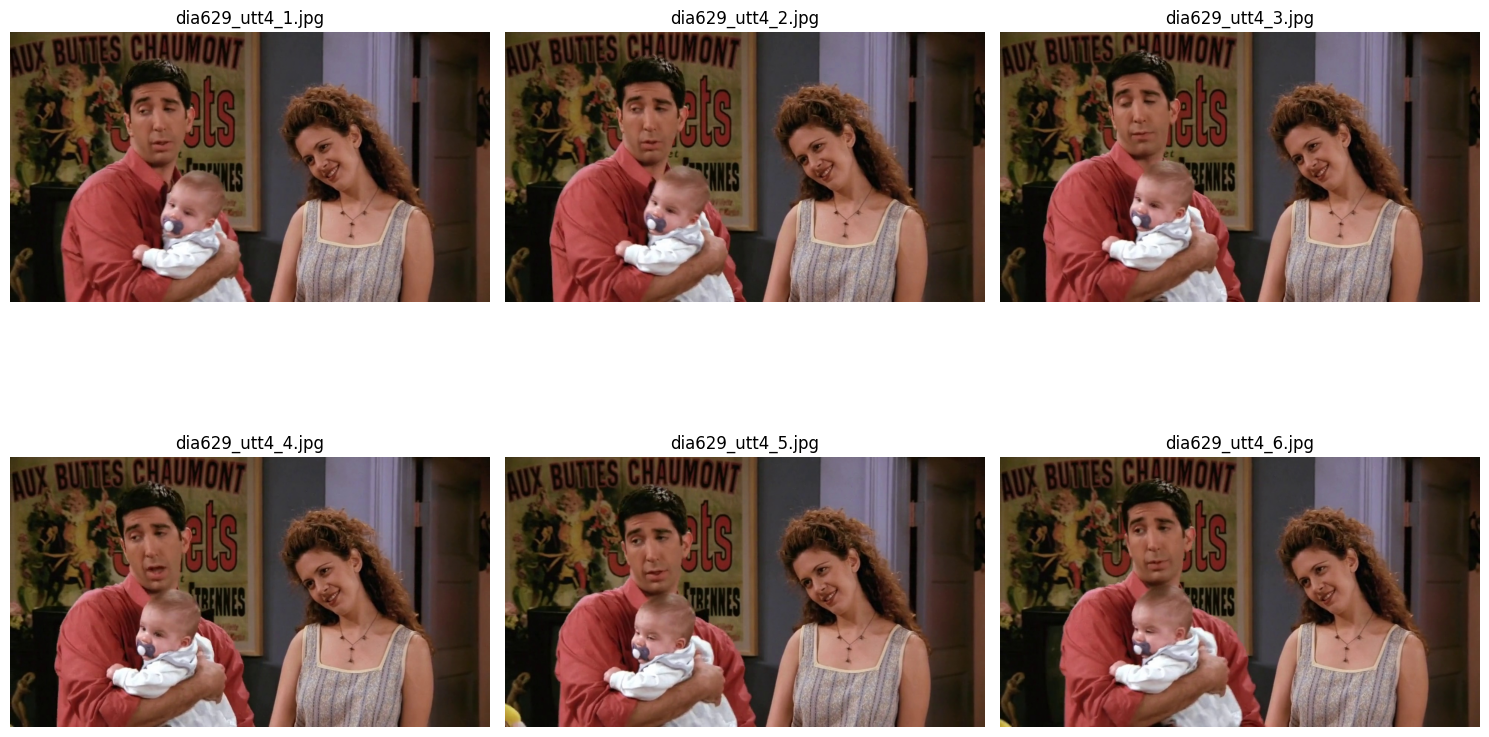

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the source video folder and the target frame save folder paths
source_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos_test"
frames_folder = os.path.join(source_folder, "frames")

# Create the frames folder if it doesn't exist
if not os.path.exists(frames_folder):
    try:
        os.makedirs(frames_folder)
        print(f"Successfully created the {frames_folder} folder")
    except Exception as e:
        print(f"Error occurred while creating the {frames_folder} folder: {e}")
else:
    print(f"The {frames_folder} folder already exists")

# Name of the specific video
specific_video_name = "dia629_utt4"
# Assume the video extension is .mp4, you can adjust it according to the actual situation
video_extensions = ['.mp4', '.avi', '.mov']
for ext in video_extensions:
    video_filename = specific_video_name + ext
    video_path = os.path.join(source_folder, video_filename)
    if os.path.exists(video_path):
        break
else:
    print(f"Video file {specific_video_name} not found in the specified folder.")
    exit()

video_name = specific_video_name

# Create a sub - folder named after the video if it doesn't exist
video_subfolder = os.path.join(frames_folder, video_name)
if not os.path.exists(video_subfolder):
    try:
        os.makedirs(video_subfolder)
        print(f"Successfully created the {video_subfolder} sub - folder")
    except Exception as e:
        print(f"Error occurred while creating the {video_subfolder} sub - folder: {e}")
else:
    print(f"The {video_subfolder} sub - folder already exists")

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the middle frame position
middle_frame = frame_count // 2

# Calculate the starting frame position for sampling
start_frame = max(0, middle_frame - 3 * 3)

# Initialize the sampled frame counter
sampled_frame_count = 0
frame_index = 0
saved_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        if start_frame <= frame_index and sampled_frame_count < 6:
            if (frame_index - start_frame) % 3 == 0:
                # Generate the frame file name
                frame_name = f"{video_name}_{sampled_frame_count + 1}.jpg"
                frame_path = os.path.join(video_subfolder, frame_name)
                # Save the frame to the specified path
                try:
                    cv2.imwrite(frame_path, frame)
                    saved_frames.append(frame_path)
                    print(f"Successfully saved the frame {frame_path}")
                except Exception as e:
                    print(f"Error occurred while saving the frame {frame_path}: {e}")
                sampled_frame_count += 1
        frame_index += 1
    else:
        break

# Release the video capture object
cap.release()

# Display all the saved frames
if saved_frames:
    print("The following are the 6 saved frames:")
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    for i, frame_path in enumerate(saved_frames):
        img = cv2.imread(frame_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        axes[i].imshow(img)
        axes[i].set_title(os.path.basename(frame_path))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No frames were successfully saved.")


## 1-4. Extract frames from data set (train_videos， dev_videos & test_videos)

Back to the extraction of frames:
*/content/drive/MyDrive CS5344 Project/Data and Codes/train_videos* under all the video files from the center portion of the video sampling interval 3 frames a frame, a total of 6 frames, Stored in the*/content/drive/MyDrive CS5344 Project/Data and Codes/train_frames6*, 6 of each video frame, save to a subfolder (a total of 9991 subfolders) each child folders with video name, The 6 frames extracted from each subfolder are named with the video name + serial number.
Instead of printing all the names in colab, just print the progress bar
**1 hour 28 minutes to complete **

In [ ]:
import cv2
import os
from tqdm import tqdm

# Input video folder path
input_video_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_videos"
# Output frame folder path
output_frame_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6"

# Create the output folder if it doesn't exist
if not os.path.exists(output_frame_folder):
    os.makedirs(output_frame_folder)

# Get all video files
video_extensions = ['.mp4', '.avi', '.mov']
video_files = [os.path.join(input_video_folder, f) for f in os.listdir(input_video_folder)
               if any(f.lower().endswith(ext) for ext in video_extensions)]

# Iterate through each video file
for video_file in tqdm(video_files, desc="Processing videos"):
    # Get the video file name without the extension
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    # Create a sub - folder for this video
    video_output_folder = os.path.join(output_frame_folder, video_name)
    if not os.path.exists(video_output_folder):
        os.makedirs(video_output_folder)

    # Open the video file
    cap = cv2.VideoCapture(video_file)
    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the starting frame index, starting from the middle of the video
    start_frame = total_frames // 2
    # Sampling frame counter
    frame_count = 0
    # Current frame index
    current_frame = start_frame

    # Set the current frame position of the video
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    while cap.isOpened() and frame_count < 6:
        ret, frame = cap.read()
        if ret:
            # Save the current frame
            frame_filename = f"{video_name}_{frame_count + 1}.jpg"
            frame_path = os.path.join(video_output_folder, frame_filename)
            cv2.imwrite(frame_path, frame)
            frame_count += 1
            # Skip 3 frames
            current_frame += 4
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        else:
            break

    # Release the video capture object
    cap.release()


Processing videos: 100%|██████████| 9991/9991 [1:28:04<00:00,  1.89it/s]


Steps to extract frames:
*/content/drive/MyDrive CS5344 Project/Data and Codes/dev_videos* under all the video files from the center portion of the video sampling interval 3 frames a frame, a total of 6 frames, Stored in the */content/drive/MyDrive CS5344 Project/Data and Codes/dev_frames6*, 6 of each video frame, save to a subfolder (a total of 1112 subfolders) each child folders with video name, The 6 frames extracted from each subfolder are named with the video name + serial number.
Instead of printing all the names in colab, just print the progress bar

In [ ]:
import cv2
import os
from tqdm import tqdm

# Input video folder path
input_video_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/dev_videos"
# Output frame folder path
output_frame_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames6"

# Ensure the output folder exists
if not os.path.exists(output_frame_folder):
    os.makedirs(output_frame_folder)

# Get all video files
video_files = [f for f in os.listdir(input_video_folder) if f.endswith(('.mp4', '.avi', '.mkv'))]

# Iterate through each video file
for video_file in tqdm(video_files, desc="Processing Videos"):
    video_path = os.path.join(input_video_folder, video_file)
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the start frame of the middle part
    start_frame = total_frames // 4  # Start from one - quarter of the video
    end_frame = start_frame * 3  # End at three - quarters of the video

    # Calculate the sampled frames
    sampled_frames = []
    current_frame = start_frame
    count = 0
    while current_frame < end_frame and count < 6:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()
        if ret:
            sampled_frames.append(frame)
            count += 1
        current_frame += 3

    cap.release()

    # Create a subfolder
    subfolder_path = os.path.join(output_frame_folder, video_file.split('.')[0])
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    # Save the sampled frames
    for i, frame in enumerate(sampled_frames):
        frame_name = f"{video_file.split('.')[0]}_{i+1}.jpg"
        frame_path = os.path.join(subfolder_path, frame_name)
        cv2.imwrite(frame_path, frame)

Processing Videos: 100%|██████████| 1112/1112 [05:58<00:00,  3.10it/s]


Steps to extract frames:
*/content/drive/MyDrive CS5344 Project/Data and Codes/test_videos* under all the video files from the center portion of the video sampling interval 3 frames a frame, a total of 6 frames, Stored in the */content/drive/MyDrive CS5344 Project/Data and Codes/test_frames6*, 6 of each video frame, save to a subfolder (a total of 4807 subfolders) each child folders with video name, The 6 frames extracted from each subfolder are named with the video name + serial number.
Instead of printing all the names in colab, just print the progress bar

In [ ]:
import cv2
import os
from tqdm import tqdm

# Input video folder path
input_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/test_videos"
# Root folder path to save the output frames
output_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/6test_frames"

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get all video files in the input folder
video_files = [f for f in os.listdir(input_folder) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

# Iterate through each video file
for video_file in tqdm(video_files, desc="Processing videos"):
    video_path = os.path.join(input_folder, video_file)
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the starting frame of the middle part
    start_frame = total_frames // 4
    # Start sampling from the middle part
    current_frame = start_frame
    frame_count = 0

    # Create a subfolder named after the video
    video_name = os.path.splitext(video_file)[0]
    video_subfolder = os.path.join(output_folder, video_name)
    if not os.path.exists(video_subfolder):
        os.makedirs(video_subfolder)

    while frame_count < 6 and current_frame < total_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()
        if ret:
            frame_name = f"{video_name}_{frame_count + 1}.jpg"
            frame_path = os.path.join(video_subfolder, frame_name)
            cv2.imwrite(frame_path, frame)
            frame_count = frame_count + 1
        current_frame = current_frame + 3

    cap.release()


Processing videos: 100%|██████████| 4807/4807 [14:03<00:00,  5.70it/s]


# 2. Use *Speaker Detection Algorithm Based on Mouth Motion Analysis* to detect the faces

## Algorithm with high precision

In [ ]:
import cv2
import dlib
import numpy as np
import os
import urllib.request
import bz2
import matplotlib.pyplot as plt
from collections import Counter


def download_predictor():
    """
    Download the shape_predictor_68_face_landmarks.dat file if it doesn't exist.
    """
    predictor_path = "shape_predictor_68_face_landmarks.dat"
    # Check if the predictor file exists
    if not os.path.exists(predictor_path):
        print("Downloading shape_predictor_68_face_landmarks.dat...")
        url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
        bz2_filename = "shape_predictor_68_face_landmarks.dat.bz2"
        # Download the file from the given URL
        urllib.request.urlretrieve(url, bz2_filename)
        print("Extracting the downloaded file...")
        # Open the compressed file and extract its content
        with bz2.open(bz2_filename, 'rb') as f_in:
            with open(predictor_path, 'wb') as f_out:
                f_out.write(f_in.read())
        # Remove the compressed file after extraction
        os.remove(bz2_filename)
        print("Download and extraction completed.")
    return predictor_path


def mouth_aspect_ratio(mouth):
    """
    Calculate the mouth aspect ratio (MAR).
    """
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    C = np.linalg.norm(mouth[0] - mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar


def detect_speaker_and_display_faces(frame_paths):
    """
    Detect the speaker and display their face images based on the given list of frame image paths.
    """
    # Download the predictor file
    predictor_path = download_predictor()

    # Load the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # Store the MAR values of each face in each frame
    all_mar_per_face = {}
    # Record the face index corresponding to each frame (if there are multiple faces)
    face_index_per_frame = {}
    # Store the face image of the speaker in the first frame
    first_frame_speaker_face = None
    # Store the face images to be displayed
    displayed_faces = []

    # Iterate through the frame images
    for i, frame_path in enumerate(frame_paths):
        img = cv2.imread(frame_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for j, face in enumerate(faces):
            landmarks = predictor(gray, face)
            mouth = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])
            mar = mouth_aspect_ratio(mouth)

            if j not in all_mar_per_face:
                all_mar_per_face[j] = []
            all_mar_per_face[j].append(mar)

            if i not in face_index_per_frame:
                face_index_per_frame[i] = {}
            face_index_per_frame[i][j] = True

            # Record the face information of the speaker in the first frame
            if i == 0:
                if j not in all_mar_per_face:
                    all_mar_per_face[j] = []
                all_mar_per_face[j].append(mar)
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                first_frame_speaker_face = img[y:y + h, x:x + w]

    # Calculate the variance of MAR values for each face
    variances = {}
    for face_index, mar_values in all_mar_per_face.items():
        if len(mar_values) > 1:
            variances[face_index] = np.var(mar_values)
        else:
            variances[face_index] = 0

    # Find the face with the maximum variance, which is the speaker
    if variances:
        speaker_index = max(variances, key=variances.get)

        # Find the frame index corresponding to the face with the maximum variance
        max_var_frame_index = None
        max_var = -1
        for frame_index, face_dict in face_index_per_frame.items():
            if speaker_index in face_dict:
                current_var = variances[speaker_index]
                if current_var > max_var:
                    max_var = current_var
                    max_var_frame_index = frame_index

        # Display the face changes in 6 frames
        plt.figure(figsize=(15, 10))
        for i, frame_path in enumerate(frame_paths):
            img = cv2.imread(frame_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)
            if len(faces) > speaker_index:
                face = faces[speaker_index]
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = img[y:y + h, x:x + w]
                displayed_faces.append(face_img)  # Record the face images to be displayed

                plt.subplot(2, 3, i + 1)
                rgb_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                plt.imshow(rgb_face_img)
                plt.title(f"Frame {i + 1}")
                plt.axis('off')
        plt.tight_layout()
        plt.show()

        if max_var_frame_index is not None:
            frame_path = frame_paths[max_var_frame_index]
            img = cv2.imread(frame_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)
            if len(faces) > speaker_index:
                face = faces[speaker_index]
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = img[y:y + h, x:x + w]
                output_path = "speaker_face.jpg"
                # Check if the current path is writable, if not, try to use the temporary path
                if not os.access(os.getcwd(), os.W_OK):
                    output_path = os.path.join('/tmp', 'speaker_face.jpg')
                cv2.imwrite(output_path, face_img)
                print(f"Speaker's face saved as {output_path}")

        # Count the most frequent face image
        if displayed_faces:
            # Convert the images into hashable form (e.g., convert image data into tuples)
            face_tuples = [tuple(face.flatten()) for face in displayed_faces]
            counter = Counter(face_tuples)
            most_common_face_tuple = counter.most_common(1)[0][0]
            most_common_face = np.array(most_common_face_tuple).reshape(displayed_faces[0].shape)

            plt.figure(figsize=(5, 5))
            rgb_face_img = cv2.cvtColor(most_common_face, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb_face_img)
            plt.title("Most Frequent Speaker Face")
            plt.axis('off')
            plt.show()
    else:
        print("No valid face detected in the frames.")

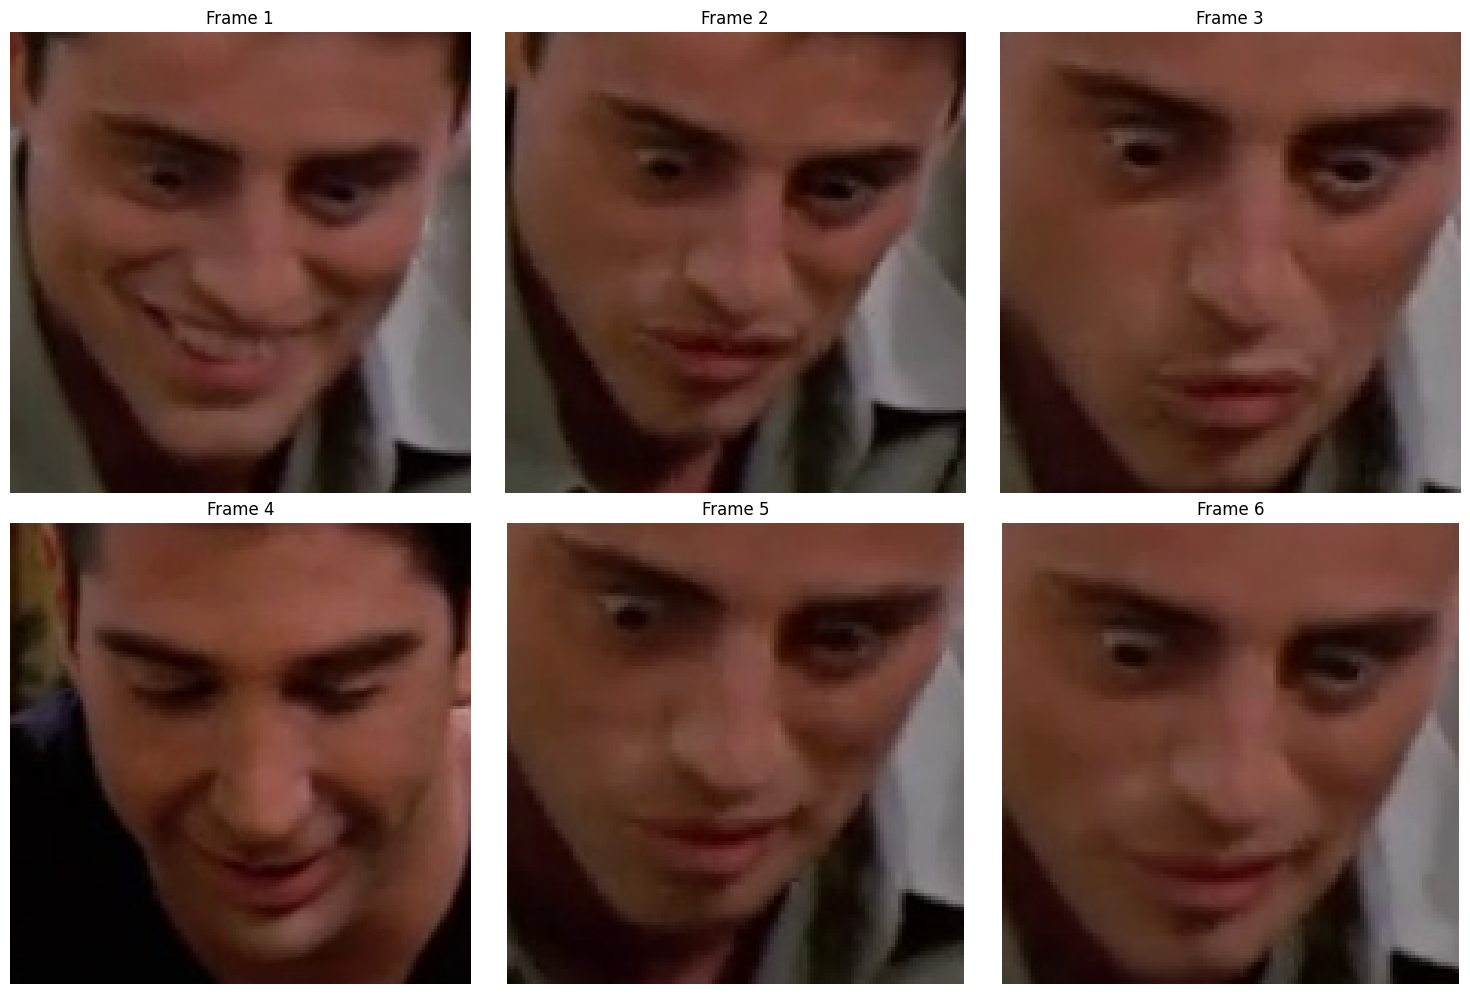

Speaker's face saved as speaker_face.jpg


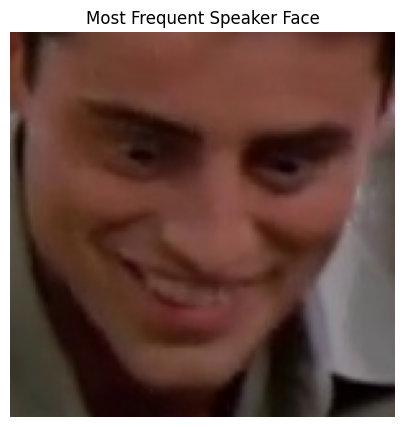

In [ ]:
# The actual directory
directory = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt17"

# Supported image extensions
image_extensions = ['.jpg', '.jpeg', '.png']

# Get the paths of all images in the directory
frame_paths = [os.path.join(directory, f) for f in os.listdir(directory)
               if any(f.lower().endswith(ext) for ext in image_extensions)]

# Call the function to detect the speaker and display faces
detect_speaker_and_display_faces(frame_paths)

In [ ]:
# folder_paths
folder_paths = [
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt17",
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt16",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt15",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt14",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt13",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt12",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt11",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt10",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt9",  # Sample path, needs to be replaced
    "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6/dia1038_utt8"   # Sample path, needs to be replaced
]

# Supported image extensions
image_extensions = ['.jpg', '.jpeg', '.png']

for folder_path in folder_paths:
    # Get the paths of all images in the directory
    frame_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                   if any(f.lower().endswith(ext) for ext in image_extensions)]

    # Call the function to detect the speaker and display faces
    detect_speaker_and_display_faces(frame_paths)

Output hidden; open in https://colab.research.google.com to view.

## (Official) Export all speaker avatars of the train

In [ ]:
import cv2
import dlib
import numpy as np
import os
import urllib.request
import bz2
from collections import Counter
from tqdm import tqdm


def download_predictor():
    """
    Download the shape_predictor_68_face_landmarks.dat file if it doesn't exist.
    """
    predictor_path = "shape_predictor_68_face_landmarks.dat"
    if not os.path.exists(predictor_path):
        print("Downloading shape_predictor_68_face_landmarks.dat...")
        url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
        bz2_filename = "shape_predictor_68_face_landmarks.dat.bz2"
        urllib.request.urlretrieve(url, bz2_filename)
        print("Extracting the downloaded file...")
        with bz2.open(bz2_filename, 'rb') as f_in:
            with open(predictor_path, 'wb') as f_out:
                f_out.write(f_in.read())
        os.remove(bz2_filename)
        print("Download and extraction completed.")
    return predictor_path


def mouth_aspect_ratio(mouth):
    """
    Calculate the mouth aspect ratio (MAR).
    """
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    C = np.linalg.norm(mouth[0] - mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar


def detect_speaker_and_save_faces(frame_paths, output_folder, subfolder_name):
    """
    Detect the speaker and save their face images based on the given list of frame image paths.
    """
    # Download the predictor file
    predictor_path = download_predictor()

    # Load the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # Store the MAR values of each face in each frame
    all_mar_per_face = {}
    # Record the face index corresponding to each frame (if there are multiple faces)
    face_index_per_frame = {}
    # Store the face images to be displayed
    displayed_faces = []

    # Iterate through the frame images
    for i, frame_path in enumerate(frame_paths):
        img = cv2.imread(frame_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for j, face in enumerate(faces):
            landmarks = predictor(gray, face)
            mouth = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])
            mar = mouth_aspect_ratio(mouth)

            if j not in all_mar_per_face:
                all_mar_per_face[j] = []
            all_mar_per_face[j].append(mar)

            if i not in face_index_per_frame:
                face_index_per_frame[i] = {}
            face_index_per_frame[i][j] = True

    # Calculate the variance of MAR values for each face
    variances = {}
    for face_index, mar_values in all_mar_per_face.items():
        if len(mar_values) > 1:
            variances[face_index] = np.var(mar_values)
        else:
            variances[face_index] = 0

    # Find the face with the maximum variance, which is the speaker
    if variances:
        speaker_index = max(variances, key=variances.get)

        # Find the frame index corresponding to the face with the maximum variance
        max_var_frame_index = None
        max_var = -1
        for frame_index, face_dict in face_index_per_frame.items():
            if speaker_index in face_dict:
                current_var = variances[speaker_index]
                if current_var > max_var:
                    max_var = current_var
                    max_var_frame_index = frame_index

        if max_var_frame_index is not None:
            frame_path = frame_paths[max_var_frame_index]
            img = cv2.imread(frame_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)
            if len(faces) > speaker_index:
                face = faces[speaker_index]
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = img[y:y + h, x:x + w]
                output_path = os.path.join(output_folder, f"{subfolder_name}_speaker_face.jpg")
                # Check if the current path is writable, if not, try to use the temporary path
                if not os.access(output_folder, os.W_OK):
                    output_path = os.path.join('/tmp', f"{subfolder_name}_speaker_face.jpg")
                cv2.imwrite(output_path, face_img)
                print(f"Speaker's face saved as {output_path}")

        # Count the most frequent face image
        if displayed_faces:
            # Convert the images into hashable form (e.g., convert image data into tuples)
            face_tuples = [tuple(face.flatten()) for face in displayed_faces]
            counter = Counter(face_tuples)
            most_common_face_tuple = counter.most_common(1)[0][0]
            most_common_face = np.array(most_common_face_tuple).reshape(displayed_faces[0].shape)

            output_path = os.path.join(output_folder, f"{subfolder_name}_most_frequent_speaker_face.jpg")
            # Check if the current path is writable, if not, try to use the temporary path
            if not os.access(output_folder, os.W_OK):
                output_path = os.path.join('/tmp', f"{subfolder_name}_most_frequent_speaker_face.jpg")
            cv2.imwrite(output_path, most_common_face)
            print(f"Most frequent speaker face saved as {output_path}")
    else:
        print("No valid face detected in the frames.")


if __name__ == "__main__":
    # Input folder path
    input_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6"
    # Output root folder path
    output_root = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames_speaker0411"
    if not os.path.exists(output_root):
        os.makedirs(output_root)

    # Get all subfolders
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    with tqdm(total=len(subfolders), desc="Total Progress") as pbar:
        for subfolder in subfolders:
            try:
                subfolder_name = os.path.basename(subfolder)

                # Supported image extensions
                image_extensions = ['.jpg', '.jpeg', '.png']
                frame_paths = [os.path.join(subfolder, f) for f in os.listdir(subfolder)
                               if any(f.lower().endswith(ext) for ext in image_extensions)]

                detect_speaker_and_save_faces(frame_paths, output_root, subfolder_name)
            except Exception as e:
                print(f"Error processing subfolder {subfolder_name}: {e}")
            pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

## (Official) Export all speaker avatars of the dev

In [ ]:
import cv2
import dlib
import numpy as np
import os
import urllib.request
import bz2
from collections import Counter
from tqdm import tqdm


def download_predictor():
    """
    Download the shape_predictor_68_face_landmarks.dat file if it doesn't exist.
    """
    predictor_path = "shape_predictor_68_face_landmarks.dat"
    if not os.path.exists(predictor_path):
        print("Downloading shape_predictor_68_face_landmarks.dat...")
        url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
        bz2_filename = "shape_predictor_68_face_landmarks.dat.bz2"
        urllib.request.urlretrieve(url, bz2_filename)
        print("Extracting the downloaded file...")
        with bz2.open(bz2_filename, 'rb') as f_in:
            with open(predictor_path, 'wb') as f_out:
                f_out.write(f_in.read())
        os.remove(bz2_filename)
        print("Download and extraction completed.")
    return predictor_path


def mouth_aspect_ratio(mouth):
    """
    Calculate the mouth aspect ratio (MAR).
    """
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    C = np.linalg.norm(mouth[0] - mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar


def detect_speaker_and_save_faces(frame_paths, output_folder, subfolder_name):
    """
    Detect the speaker and save their face images based on the given list of frame image paths.
    """
    # Download the predictor file
    predictor_path = download_predictor()

    # Load the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # Store the MAR values of each face in each frame
    all_mar_per_face = {}
    # Record the face index corresponding to each frame (if there are multiple faces)
    face_index_per_frame = {}
    # Store the face images to be displayed
    displayed_faces = []

    # Iterate through the frame images
    for i, frame_path in enumerate(frame_paths):
        img = cv2.imread(frame_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for j, face in enumerate(faces):
            landmarks = predictor(gray, face)
            mouth = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])
            mar = mouth_aspect_ratio(mouth)

            if j not in all_mar_per_face:
                all_mar_per_face[j] = []
            all_mar_per_face[j].append(mar)

            if i not in face_index_per_frame:
                face_index_per_frame[i] = {}
            face_index_per_frame[i][j] = True

    # Calculate the variance of MAR values for each face
    variances = {}
    for face_index, mar_values in all_mar_per_face.items():
        if len(mar_values) > 1:
            variances[face_index] = np.var(mar_values)
        else:
            variances[face_index] = 0

    # Find the face with the maximum variance, which is the speaker
    if variances:
        speaker_index = max(variances, key=variances.get)

        # Find the frame index corresponding to the face with the maximum variance
        max_var_frame_index = None
        max_var = -1
        for frame_index, face_dict in face_index_per_frame.items():
            if speaker_index in face_dict:
                current_var = variances[speaker_index]
                if current_var > max_var:
                    max_var = current_var
                    max_var_frame_index = frame_index

        if max_var_frame_index is not None:
            frame_path = frame_paths[max_var_frame_index]
            img = cv2.imread(frame_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)
            if len(faces) > speaker_index:
                face = faces[speaker_index]
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = img[y:y + h, x:x + w]
                output_path = os.path.join(output_folder, f"{subfolder_name}_speaker_face.jpg")
                # Check if the current path is writable, if not, try to use the temporary path
                if not os.access(output_folder, os.W_OK):
                    output_path = os.path.join('/tmp', f"{subfolder_name}_speaker_face.jpg")
                cv2.imwrite(output_path, face_img)
                print(f"Speaker's face saved as {output_path}")

        # Count the most frequent face image
        if displayed_faces:
            # Convert the images into hashable form (e.g., convert image data into tuples)
            face_tuples = [tuple(face.flatten()) for face in displayed_faces]
            counter = Counter(face_tuples)
            most_common_face_tuple = counter.most_common(1)[0][0]
            most_common_face = np.array(most_common_face_tuple).reshape(displayed_faces[0].shape)

            output_path = os.path.join(output_folder, f"{subfolder_name}_most_frequent_speaker_face.jpg")
            # Check if the current path is writable, if not, try to use the temporary path
            if not os.access(output_folder, os.W_OK):
                output_path = os.path.join('/tmp', f"{subfolder_name}_most_frequent_speaker_face.jpg")
            cv2.imwrite(output_path, most_common_face)
            print(f"Most frequent speaker face saved as {output_path}")
    else:
        print("No valid face detected in the frames.")


if __name__ == "__main__":
    # Input folder path
    input_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames6"
    # Output root folder path
    output_root = "/content/drive/MyDrive/CS5344 Project/Data and Codes/train_frames_speaker0411"
    if not os.path.exists(output_root):
        os.makedirs(output_root)

    # Get all subfolders
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    with tqdm(total=len(subfolders), desc="Total Progress") as pbar:
        for subfolder in subfolders:
            try:
                subfolder_name = os.path.basename(subfolder)

                # Supported image extensions
                image_extensions = ['.jpg', '.jpeg', '.png']
                frame_paths = [os.path.join(subfolder, f) for f in os.listdir(subfolder)
                               if any(f.lower().endswith(ext) for ext in image_extensions)]

                detect_speaker_and_save_faces(frame_paths, output_root, subfolder_name)
            except Exception as e:
                print(f"Error processing subfolder {subfolder_name}: {e}")
            pbar.update(1)


Total Progress:   0%|          | 0/1112 [00:00<?, ?it/s]

Extracting the downloaded file...
Download and extraction completed.


Total Progress:   0%|          | 1/1112 [00:11<3:25:27, 11.10s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 2/1112 [00:12<1:43:49,  5.61s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 3/1112 [00:14<1:12:33,  3.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt0_speaker_face.jpg


Total Progress:   0%|          | 4/1112 [00:16<57:46,  3.13s/it]  

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt1_speaker_face.jpg


Total Progress:   0%|          | 5/1112 [00:18<49:31,  2.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt2_speaker_face.jpg


Total Progress:   1%|          | 6/1112 [00:20<44:30,  2.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt3_speaker_face.jpg


Total Progress:   1%|          | 7/1112 [00:22<41:07,  2.23s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt4_speaker_face.jpg


Total Progress:   1%|          | 8/1112 [00:24<38:30,  2.09s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt5_speaker_face.jpg


Total Progress:   1%|          | 9/1112 [00:26<37:24,  2.04s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt6_speaker_face.jpg


Total Progress:   1%|          | 10/1112 [00:27<36:34,  1.99s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt7_speaker_face.jpg


Total Progress:   1%|          | 11/1112 [00:29<36:07,  1.97s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt10_speaker_face.jpg


Total Progress:   1%|          | 12/1112 [00:31<35:41,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt11_speaker_face.jpg


Total Progress:   1%|          | 13/1112 [00:33<35:21,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt12_speaker_face.jpg


Total Progress:   1%|▏         | 14/1112 [00:35<35:16,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt13_speaker_face.jpg


Total Progress:   1%|▏         | 15/1112 [00:37<35:12,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt14_speaker_face.jpg


Total Progress:   1%|▏         | 16/1112 [00:39<34:59,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt15_speaker_face.jpg


Total Progress:   2%|▏         | 17/1112 [00:41<34:50,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt16_speaker_face.jpg


Total Progress:   2%|▏         | 18/1112 [00:43<34:49,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt17_speaker_face.jpg


Total Progress:   2%|▏         | 19/1112 [00:45<34:51,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt18_speaker_face.jpg


Total Progress:   2%|▏         | 20/1112 [00:46<34:30,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia17_utt0_speaker_face.jpg


Total Progress:   2%|▏         | 21/1112 [00:48<34:28,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia17_utt1_speaker_face.jpg


Total Progress:   2%|▏         | 22/1112 [00:50<34:31,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia17_utt4_speaker_face.jpg


Total Progress:   2%|▏         | 23/1112 [00:52<34:37,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt4_speaker_face.jpg


Total Progress:   2%|▏         | 24/1112 [00:54<34:14,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt7_speaker_face.jpg


Total Progress:   2%|▏         | 25/1112 [00:56<34:08,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt8_speaker_face.jpg


Total Progress:   2%|▏         | 26/1112 [00:58<33:59,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt11_speaker_face.jpg


Total Progress:   2%|▏         | 27/1112 [01:00<33:23,  1.85s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 28/1112 [01:01<33:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt3_speaker_face.jpg


Total Progress:   3%|▎         | 29/1112 [01:03<33:30,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt4_speaker_face.jpg


Total Progress:   3%|▎         | 30/1112 [01:05<33:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt5_speaker_face.jpg


Total Progress:   3%|▎         | 31/1112 [01:07<33:37,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt8_speaker_face.jpg


Total Progress:   3%|▎         | 32/1112 [01:09<33:41,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt9_speaker_face.jpg


Total Progress:   3%|▎         | 33/1112 [01:11<33:46,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt14_speaker_face.jpg


Total Progress:   3%|▎         | 34/1112 [01:13<33:40,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt15_speaker_face.jpg


Total Progress:   3%|▎         | 35/1112 [01:15<33:48,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt16_speaker_face.jpg


Total Progress:   3%|▎         | 36/1112 [01:16<33:36,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt17_speaker_face.jpg


Total Progress:   3%|▎         | 37/1112 [01:18<33:34,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt18_speaker_face.jpg


Total Progress:   3%|▎         | 38/1112 [01:20<33:21,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt19_speaker_face.jpg


Total Progress:   4%|▎         | 39/1112 [01:22<33:16,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt20_speaker_face.jpg


Total Progress:   4%|▎         | 40/1112 [01:24<33:19,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt21_speaker_face.jpg


Total Progress:   4%|▎         | 41/1112 [01:26<33:13,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt22_speaker_face.jpg


Total Progress:   4%|▍         | 42/1112 [01:28<33:19,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt0_speaker_face.jpg


Total Progress:   4%|▍         | 43/1112 [01:30<33:31,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt1_speaker_face.jpg


Total Progress:   4%|▍         | 44/1112 [01:31<33:25,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt2_speaker_face.jpg


Total Progress:   4%|▍         | 45/1112 [01:33<33:29,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt3_speaker_face.jpg


Total Progress:   4%|▍         | 46/1112 [01:35<33:28,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt6_speaker_face.jpg


Total Progress:   4%|▍         | 47/1112 [01:37<33:21,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt7_speaker_face.jpg


Total Progress:   4%|▍         | 48/1112 [01:39<32:45,  1.85s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 49/1112 [01:41<33:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia21_utt1_speaker_face.jpg


Total Progress:   4%|▍         | 50/1112 [01:43<33:16,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia21_utt2_speaker_face.jpg


Total Progress:   5%|▍         | 51/1112 [01:45<33:11,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia21_utt3_speaker_face.jpg


Total Progress:   5%|▍         | 52/1112 [01:46<32:34,  1.84s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 53/1112 [01:48<31:22,  1.78s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 54/1112 [01:50<31:45,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia21_utt6_speaker_face.jpg


Total Progress:   5%|▍         | 55/1112 [01:52<32:07,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt5_speaker_face.jpg


Total Progress:   5%|▌         | 56/1112 [01:53<32:14,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt6_speaker_face.jpg


Total Progress:   5%|▌         | 57/1112 [01:55<31:10,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt7_speaker_face.jpg


Total Progress:   5%|▌         | 58/1112 [01:57<31:37,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt8_speaker_face.jpg


Total Progress:   5%|▌         | 59/1112 [01:59<31:18,  1.78s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 60/1112 [02:01<31:43,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt10_speaker_face.jpg


Total Progress:   5%|▌         | 61/1112 [02:02<31:59,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt11_speaker_face.jpg


Total Progress:   6%|▌         | 62/1112 [02:04<32:12,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt12_speaker_face.jpg


Total Progress:   6%|▌         | 63/1112 [02:06<32:27,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt13_speaker_face.jpg


Total Progress:   6%|▌         | 64/1112 [02:08<32:35,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt0_speaker_face.jpg


Total Progress:   6%|▌         | 65/1112 [02:10<32:02,  1.84s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 66/1112 [02:12<32:14,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt2_speaker_face.jpg


Total Progress:   6%|▌         | 67/1112 [02:14<31:47,  1.83s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 68/1112 [02:15<31:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt4_speaker_face.jpg


Total Progress:   6%|▌         | 69/1112 [02:17<31:20,  1.80s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 70/1112 [02:19<30:20,  1.75s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 71/1112 [02:21<30:52,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt7_speaker_face.jpg


Total Progress:   6%|▋         | 72/1112 [02:22<31:11,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt8_speaker_face.jpg


Total Progress:   7%|▋         | 73/1112 [02:24<31:41,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt9_speaker_face.jpg


Total Progress:   7%|▋         | 74/1112 [02:26<30:41,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt10_speaker_face.jpg


Total Progress:   7%|▋         | 75/1112 [02:28<30:30,  1.77s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 76/1112 [02:29<30:18,  1.75s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 77/1112 [02:31<30:49,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia23_utt13_speaker_face.jpg


Total Progress:   7%|▋         | 78/1112 [02:33<31:12,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 79/1112 [02:35<31:24,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 80/1112 [02:37<31:38,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 81/1112 [02:39<31:51,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 82/1112 [02:41<31:55,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt4_speaker_face.jpg


Total Progress:   7%|▋         | 83/1112 [02:43<31:48,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt5_speaker_face.jpg


Total Progress:   8%|▊         | 84/1112 [02:44<31:47,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 85/1112 [02:46<31:49,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt4_speaker_face.jpg


Total Progress:   8%|▊         | 86/1112 [02:48<31:51,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt5_speaker_face.jpg


Total Progress:   8%|▊         | 87/1112 [02:50<31:48,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt6_speaker_face.jpg


Total Progress:   8%|▊         | 88/1112 [02:52<31:56,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt7_speaker_face.jpg


Total Progress:   8%|▊         | 89/1112 [02:54<31:49,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 90/1112 [02:56<31:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 91/1112 [02:57<31:40,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt12_speaker_face.jpg


Total Progress:   8%|▊         | 92/1112 [02:59<31:02,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt13_speaker_face.jpg


Total Progress:   8%|▊         | 93/1112 [03:01<31:24,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt14_speaker_face.jpg


Total Progress:   8%|▊         | 94/1112 [03:03<31:28,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt15_speaker_face.jpg


Total Progress:   9%|▊         | 95/1112 [03:05<31:40,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt16_speaker_face.jpg


Total Progress:   9%|▊         | 96/1112 [03:07<31:51,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt0_speaker_face.jpg


Total Progress:   9%|▊         | 97/1112 [03:09<31:49,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt1_speaker_face.jpg


Total Progress:   9%|▉         | 98/1112 [03:11<31:38,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 99/1112 [03:12<31:36,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt5_speaker_face.jpg


Total Progress:   9%|▉         | 100/1112 [03:14<31:45,  1.88s/it]

Error processing subfolder dia27_utt6: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:   9%|▉         | 101/1112 [03:16<31:39,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt7_speaker_face.jpg


Total Progress:   9%|▉         | 102/1112 [03:18<31:47,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt8_speaker_face.jpg


Total Progress:   9%|▉         | 103/1112 [03:20<31:35,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt9_speaker_face.jpg


Total Progress:   9%|▉         | 104/1112 [03:22<31:26,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt0_speaker_face.jpg


Total Progress:   9%|▉         | 105/1112 [03:24<31:31,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt1_speaker_face.jpg


Total Progress:  10%|▉         | 106/1112 [03:26<31:28,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt2_speaker_face.jpg


Total Progress:  10%|▉         | 107/1112 [03:27<31:44,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt3_speaker_face.jpg


Total Progress:  10%|▉         | 108/1112 [03:29<31:28,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt4_speaker_face.jpg


Total Progress:  10%|▉         | 109/1112 [03:31<31:30,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt7_speaker_face.jpg


Total Progress:  10%|▉         | 110/1112 [03:33<31:24,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt8_speaker_face.jpg


Total Progress:  10%|▉         | 111/1112 [03:35<30:47,  1.85s/it]

No valid face detected in the frames.


Total Progress:  10%|█         | 112/1112 [03:37<30:47,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt1_speaker_face.jpg


Total Progress:  10%|█         | 113/1112 [03:39<31:08,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt2_speaker_face.jpg


Total Progress:  10%|█         | 114/1112 [03:41<31:19,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt3_speaker_face.jpg


Total Progress:  10%|█         | 115/1112 [03:42<30:19,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt6_speaker_face.jpg


Total Progress:  10%|█         | 116/1112 [03:44<30:35,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt7_speaker_face.jpg


Total Progress:  11%|█         | 117/1112 [03:46<30:44,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt8_speaker_face.jpg


Total Progress:  11%|█         | 118/1112 [03:48<30:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt9_speaker_face.jpg


Total Progress:  11%|█         | 119/1112 [03:50<30:18,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt10_speaker_face.jpg


Total Progress:  11%|█         | 120/1112 [03:51<30:02,  1.82s/it]

No valid face detected in the frames.


Total Progress:  11%|█         | 121/1112 [03:53<30:21,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt1_speaker_face.jpg


Total Progress:  11%|█         | 122/1112 [03:55<30:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt2_speaker_face.jpg


Total Progress:  11%|█         | 123/1112 [03:57<30:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt3_speaker_face.jpg


Total Progress:  11%|█         | 124/1112 [03:59<30:45,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt8_speaker_face.jpg


Total Progress:  11%|█         | 125/1112 [04:01<30:46,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt9_speaker_face.jpg


Total Progress:  11%|█▏        | 126/1112 [04:03<30:53,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt10_speaker_face.jpg


Total Progress:  11%|█▏        | 127/1112 [04:05<30:46,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt11_speaker_face.jpg


Total Progress:  12%|█▏        | 128/1112 [04:06<30:39,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt12_speaker_face.jpg


Total Progress:  12%|█▏        | 129/1112 [04:08<30:37,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt15_speaker_face.jpg


Total Progress:  12%|█▏        | 130/1112 [04:10<30:40,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt16_speaker_face.jpg


Total Progress:  12%|█▏        | 131/1112 [04:12<30:29,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt0_speaker_face.jpg


Total Progress:  12%|█▏        | 132/1112 [04:14<30:26,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt1_speaker_face.jpg


Total Progress:  12%|█▏        | 133/1112 [04:16<30:45,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt2_speaker_face.jpg


Total Progress:  12%|█▏        | 134/1112 [04:18<30:36,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt3_speaker_face.jpg


Total Progress:  12%|█▏        | 135/1112 [04:20<30:43,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt4_speaker_face.jpg


Total Progress:  12%|█▏        | 136/1112 [04:21<30:29,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt5_speaker_face.jpg


Total Progress:  12%|█▏        | 137/1112 [04:23<30:20,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 138/1112 [04:25<30:14,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt7_speaker_face.jpg


Total Progress:  12%|█▎        | 139/1112 [04:27<30:18,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt8_speaker_face.jpg


Total Progress:  13%|█▎        | 140/1112 [04:29<30:30,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt9_speaker_face.jpg


Total Progress:  13%|█▎        | 141/1112 [04:31<30:22,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt10_speaker_face.jpg


Total Progress:  13%|█▎        | 142/1112 [04:33<30:12,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt11_speaker_face.jpg


Total Progress:  13%|█▎        | 143/1112 [04:35<30:03,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia31_utt12_speaker_face.jpg


Total Progress:  13%|█▎        | 144/1112 [04:36<30:08,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt4_speaker_face.jpg


Total Progress:  13%|█▎        | 145/1112 [04:38<30:07,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt5_speaker_face.jpg


Total Progress:  13%|█▎        | 146/1112 [04:40<30:06,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt8_speaker_face.jpg


Total Progress:  13%|█▎        | 147/1112 [04:42<29:59,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt9_speaker_face.jpg


Total Progress:  13%|█▎        | 148/1112 [04:44<29:59,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt10_speaker_face.jpg


Total Progress:  13%|█▎        | 149/1112 [04:45<28:16,  1.76s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 150/1112 [04:47<28:40,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia33_utt0_speaker_face.jpg


Total Progress:  14%|█▎        | 151/1112 [04:49<28:56,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia33_utt1_speaker_face.jpg


Total Progress:  14%|█▎        | 152/1112 [04:51<29:12,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt0_speaker_face.jpg


Total Progress:  14%|█▍        | 153/1112 [04:53<29:28,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt1_speaker_face.jpg


Total Progress:  14%|█▍        | 154/1112 [04:55<29:40,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt2_speaker_face.jpg


Total Progress:  14%|█▍        | 155/1112 [04:57<29:47,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 156/1112 [04:58<29:43,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt4_speaker_face.jpg


Total Progress:  14%|█▍        | 157/1112 [05:00<29:40,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt5_speaker_face.jpg


Total Progress:  14%|█▍        | 158/1112 [05:02<29:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt6_speaker_face.jpg


Total Progress:  14%|█▍        | 159/1112 [05:04<29:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt9_speaker_face.jpg


Total Progress:  14%|█▍        | 160/1112 [05:06<29:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt10_speaker_face.jpg


Total Progress:  14%|█▍        | 161/1112 [05:08<29:34,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia35_utt0_speaker_face.jpg


Total Progress:  15%|█▍        | 162/1112 [05:10<29:27,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt0_speaker_face.jpg


Total Progress:  15%|█▍        | 163/1112 [05:12<29:33,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt4_speaker_face.jpg


Total Progress:  15%|█▍        | 164/1112 [05:13<29:32,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt5_speaker_face.jpg


Total Progress:  15%|█▍        | 165/1112 [05:15<29:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt6_speaker_face.jpg


Total Progress:  15%|█▍        | 166/1112 [05:17<28:45,  1.82s/it]

No valid face detected in the frames.


Total Progress:  15%|█▌        | 167/1112 [05:19<27:59,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt10_speaker_face.jpg


Total Progress:  15%|█▌        | 168/1112 [05:21<28:19,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt11_speaker_face.jpg


Total Progress:  15%|█▌        | 169/1112 [05:22<28:45,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt0_speaker_face.jpg


Total Progress:  15%|█▌        | 170/1112 [05:24<29:05,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt1_speaker_face.jpg


Total Progress:  15%|█▌        | 171/1112 [05:26<28:43,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt2_speaker_face.jpg


Total Progress:  15%|█▌        | 172/1112 [05:28<28:58,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt3_speaker_face.jpg


Total Progress:  16%|█▌        | 173/1112 [05:30<29:23,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt6_speaker_face.jpg


Total Progress:  16%|█▌        | 174/1112 [05:32<28:52,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt7_speaker_face.jpg


Total Progress:  16%|█▌        | 175/1112 [05:34<28:55,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt8_speaker_face.jpg


Total Progress:  16%|█▌        | 176/1112 [05:35<27:52,  1.79s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 177/1112 [05:37<28:27,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt10_speaker_face.jpg


Total Progress:  16%|█▌        | 178/1112 [05:39<28:42,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia38_utt0_speaker_face.jpg


Total Progress:  16%|█▌        | 179/1112 [05:41<28:40,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia39_utt0_speaker_face.jpg


Total Progress:  16%|█▌        | 180/1112 [05:43<28:44,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia39_utt1_speaker_face.jpg


Total Progress:  16%|█▋        | 181/1112 [05:45<28:45,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia39_utt2_speaker_face.jpg


Total Progress:  16%|█▋        | 182/1112 [05:46<28:43,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt0_speaker_face.jpg


Total Progress:  16%|█▋        | 183/1112 [05:48<28:40,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 184/1112 [05:50<28:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 185/1112 [05:52<28:42,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt5_speaker_face.jpg


Total Progress:  17%|█▋        | 186/1112 [05:54<28:05,  1.82s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 187/1112 [05:56<28:12,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt7_speaker_face.jpg


Total Progress:  17%|█▋        | 188/1112 [05:57<28:19,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt10_speaker_face.jpg


Total Progress:  17%|█▋        | 189/1112 [05:59<28:32,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia41_utt0_speaker_face.jpg


Total Progress:  17%|█▋        | 190/1112 [06:01<28:29,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia41_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 191/1112 [06:03<28:27,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia41_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 192/1112 [06:05<28:27,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia42_utt0_speaker_face.jpg


Total Progress:  17%|█▋        | 193/1112 [06:07<28:29,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia42_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 194/1112 [06:09<28:28,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia42_utt2_speaker_face.jpg


Total Progress:  18%|█▊        | 195/1112 [06:11<28:36,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia42_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 196/1112 [06:12<28:33,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia42_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 197/1112 [06:14<28:24,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia43_utt0_speaker_face.jpg


Total Progress:  18%|█▊        | 198/1112 [06:16<27:32,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia43_utt1_speaker_face.jpg


Total Progress:  18%|█▊        | 199/1112 [06:18<27:53,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt0_speaker_face.jpg


Total Progress:  18%|█▊        | 200/1112 [06:20<27:31,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt1_speaker_face.jpg


Total Progress:  18%|█▊        | 201/1112 [06:21<27:46,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt2_speaker_face.jpg


Total Progress:  18%|█▊        | 202/1112 [06:23<28:05,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 203/1112 [06:25<28:15,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 204/1112 [06:27<28:20,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 205/1112 [06:29<27:27,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt6_speaker_face.jpg


Total Progress:  19%|█▊        | 206/1112 [06:31<27:43,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt7_speaker_face.jpg


Total Progress:  19%|█▊        | 207/1112 [06:33<27:52,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt8_speaker_face.jpg


Total Progress:  19%|█▊        | 208/1112 [06:34<27:58,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt11_speaker_face.jpg


Total Progress:  19%|█▉        | 209/1112 [06:36<27:51,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt0_speaker_face.jpg


Total Progress:  19%|█▉        | 210/1112 [06:38<27:49,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt1_speaker_face.jpg


Total Progress:  19%|█▉        | 211/1112 [06:40<27:55,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt6_speaker_face.jpg


Total Progress:  19%|█▉        | 212/1112 [06:42<28:08,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt7_speaker_face.jpg


Total Progress:  19%|█▉        | 213/1112 [06:44<27:58,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt8_speaker_face.jpg


Total Progress:  19%|█▉        | 214/1112 [06:46<28:03,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt9_speaker_face.jpg


Total Progress:  19%|█▉        | 215/1112 [06:47<27:08,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt0_speaker_face.jpg


Total Progress:  19%|█▉        | 216/1112 [06:49<27:22,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt1_speaker_face.jpg


Total Progress:  20%|█▉        | 217/1112 [06:51<27:29,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt2_speaker_face.jpg


Total Progress:  20%|█▉        | 218/1112 [06:53<27:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt3_speaker_face.jpg


Total Progress:  20%|█▉        | 219/1112 [06:55<27:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt4_speaker_face.jpg


Total Progress:  20%|█▉        | 220/1112 [06:57<27:52,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt5_speaker_face.jpg


Total Progress:  20%|█▉        | 221/1112 [06:59<27:43,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt6_speaker_face.jpg


Total Progress:  20%|█▉        | 222/1112 [07:00<27:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt7_speaker_face.jpg


Total Progress:  20%|██        | 223/1112 [07:02<27:41,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt8_speaker_face.jpg


Total Progress:  20%|██        | 224/1112 [07:04<27:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia46_utt9_speaker_face.jpg


Total Progress:  20%|██        | 225/1112 [07:06<27:09,  1.84s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 226/1112 [07:08<27:16,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt1_speaker_face.jpg


Total Progress:  20%|██        | 227/1112 [07:10<27:20,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt2_speaker_face.jpg


Total Progress:  21%|██        | 228/1112 [07:11<26:38,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt3_speaker_face.jpg


Total Progress:  21%|██        | 229/1112 [07:13<25:47,  1.75s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 230/1112 [07:15<25:38,  1.74s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 231/1112 [07:17<26:12,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt6_speaker_face.jpg


Total Progress:  21%|██        | 232/1112 [07:19<26:28,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt7_speaker_face.jpg


Total Progress:  21%|██        | 233/1112 [07:20<26:42,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt8_speaker_face.jpg


Total Progress:  21%|██        | 234/1112 [07:22<26:56,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia47_utt9_speaker_face.jpg


Total Progress:  21%|██        | 235/1112 [07:24<26:25,  1.81s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 236/1112 [07:26<26:33,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt0_speaker_face.jpg


Total Progress:  21%|██▏       | 237/1112 [07:28<26:47,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt1_speaker_face.jpg


Total Progress:  21%|██▏       | 238/1112 [07:30<26:51,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt2_speaker_face.jpg


Total Progress:  21%|██▏       | 239/1112 [07:31<26:54,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 240/1112 [07:33<27:00,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt4_speaker_face.jpg


Total Progress:  22%|██▏       | 241/1112 [07:35<26:05,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt5_speaker_face.jpg


Total Progress:  22%|██▏       | 242/1112 [07:37<25:58,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt6_speaker_face.jpg


Total Progress:  22%|██▏       | 243/1112 [07:39<26:10,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia48_utt7_speaker_face.jpg


Total Progress:  22%|██▏       | 244/1112 [07:40<25:59,  1.80s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 245/1112 [07:42<26:25,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 246/1112 [07:44<26:29,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt4_speaker_face.jpg


Total Progress:  22%|██▏       | 247/1112 [07:46<26:35,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt6_speaker_face.jpg


Total Progress:  22%|██▏       | 248/1112 [07:48<26:43,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt7_speaker_face.jpg


Total Progress:  22%|██▏       | 249/1112 [07:50<25:55,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt8_speaker_face.jpg


Total Progress:  22%|██▏       | 250/1112 [07:51<26:04,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt9_speaker_face.jpg


Total Progress:  23%|██▎       | 251/1112 [07:53<26:26,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt10_speaker_face.jpg


Total Progress:  23%|██▎       | 252/1112 [07:55<26:30,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt11_speaker_face.jpg


Total Progress:  23%|██▎       | 253/1112 [07:57<26:39,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt12_speaker_face.jpg


Total Progress:  23%|██▎       | 254/1112 [07:59<26:36,  1.86s/it]

Error processing subfolder dia49_utt13: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  23%|██▎       | 255/1112 [08:01<26:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt14_speaker_face.jpg


Total Progress:  23%|██▎       | 256/1112 [08:03<26:04,  1.83s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 257/1112 [08:04<26:10,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia50_utt3_speaker_face.jpg


Total Progress:  23%|██▎       | 258/1112 [08:06<26:18,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt0_speaker_face.jpg


Total Progress:  23%|██▎       | 259/1112 [08:08<26:24,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt1_speaker_face.jpg


Total Progress:  23%|██▎       | 260/1112 [08:10<26:27,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt2_speaker_face.jpg


Total Progress:  23%|██▎       | 261/1112 [08:12<26:42,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt3_speaker_face.jpg


Total Progress:  24%|██▎       | 262/1112 [08:14<26:34,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt4_speaker_face.jpg


Total Progress:  24%|██▎       | 263/1112 [08:16<26:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt5_speaker_face.jpg


Total Progress:  24%|██▎       | 264/1112 [08:18<26:24,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia51_utt6_speaker_face.jpg


Total Progress:  24%|██▍       | 265/1112 [08:19<26:19,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia52_utt0_speaker_face.jpg


Total Progress:  24%|██▍       | 266/1112 [08:21<26:12,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia52_utt1_speaker_face.jpg


Total Progress:  24%|██▍       | 267/1112 [08:23<26:08,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia52_utt2_speaker_face.jpg


Total Progress:  24%|██▍       | 268/1112 [08:25<26:07,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt0_speaker_face.jpg


Total Progress:  24%|██▍       | 269/1112 [08:27<25:13,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt1_speaker_face.jpg


Total Progress:  24%|██▍       | 270/1112 [08:29<25:35,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt2_speaker_face.jpg


Total Progress:  24%|██▍       | 271/1112 [08:30<25:47,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt3_speaker_face.jpg


Total Progress:  24%|██▍       | 272/1112 [08:32<25:53,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt4_speaker_face.jpg


Total Progress:  25%|██▍       | 273/1112 [08:34<25:31,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt5_speaker_face.jpg


Total Progress:  25%|██▍       | 274/1112 [08:36<25:47,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt6_speaker_face.jpg


Total Progress:  25%|██▍       | 275/1112 [08:38<25:46,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt7_speaker_face.jpg


Total Progress:  25%|██▍       | 276/1112 [08:40<25:45,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia53_utt8_speaker_face.jpg


Total Progress:  25%|██▍       | 277/1112 [08:42<25:59,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt2_speaker_face.jpg


Total Progress:  25%|██▌       | 278/1112 [08:43<25:54,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt3_speaker_face.jpg


Total Progress:  25%|██▌       | 279/1112 [08:45<25:49,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt4_speaker_face.jpg


Total Progress:  25%|██▌       | 280/1112 [08:47<25:51,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt5_speaker_face.jpg


Total Progress:  25%|██▌       | 281/1112 [08:49<25:23,  1.83s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 282/1112 [08:51<25:25,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt7_speaker_face.jpg


Total Progress:  25%|██▌       | 283/1112 [08:53<25:28,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt8_speaker_face.jpg


Total Progress:  26%|██▌       | 284/1112 [08:54<25:31,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt9_speaker_face.jpg


Total Progress:  26%|██▌       | 285/1112 [08:56<25:38,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt10_speaker_face.jpg


Total Progress:  26%|██▌       | 286/1112 [08:58<25:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt11_speaker_face.jpg


Total Progress:  26%|██▌       | 287/1112 [09:00<25:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia54_utt12_speaker_face.jpg


Total Progress:  26%|██▌       | 288/1112 [09:02<25:30,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia55_utt0_speaker_face.jpg


Total Progress:  26%|██▌       | 289/1112 [09:04<25:36,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt0_speaker_face.jpg


Total Progress:  26%|██▌       | 290/1112 [09:06<25:35,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt1_speaker_face.jpg


Total Progress:  26%|██▌       | 291/1112 [09:08<25:35,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt2_speaker_face.jpg


Total Progress:  26%|██▋       | 292/1112 [09:09<25:31,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt3_speaker_face.jpg


Total Progress:  26%|██▋       | 293/1112 [09:11<25:39,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt4_speaker_face.jpg


Total Progress:  26%|██▋       | 294/1112 [09:13<25:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt5_speaker_face.jpg


Total Progress:  27%|██▋       | 295/1112 [09:15<25:22,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt6_speaker_face.jpg


Total Progress:  27%|██▋       | 296/1112 [09:17<24:57,  1.84s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 297/1112 [09:19<25:07,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt8_speaker_face.jpg


Total Progress:  27%|██▋       | 298/1112 [09:21<25:15,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt9_speaker_face.jpg


Total Progress:  27%|██▋       | 299/1112 [09:22<25:10,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt10_speaker_face.jpg


Total Progress:  27%|██▋       | 300/1112 [09:24<25:16,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt11_speaker_face.jpg


Total Progress:  27%|██▋       | 301/1112 [09:26<25:10,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt12_speaker_face.jpg


Total Progress:  27%|██▋       | 302/1112 [09:28<25:01,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt13_speaker_face.jpg


Total Progress:  27%|██▋       | 303/1112 [09:30<24:58,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia56_utt14_speaker_face.jpg


Total Progress:  27%|██▋       | 304/1112 [09:32<24:26,  1.82s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 305/1112 [09:33<24:03,  1.79s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 306/1112 [09:35<24:16,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt0_speaker_face.jpg


Total Progress:  28%|██▊       | 307/1112 [09:37<24:24,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt1_speaker_face.jpg


Total Progress:  28%|██▊       | 308/1112 [09:39<24:31,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt2_speaker_face.jpg


Total Progress:  28%|██▊       | 309/1112 [09:41<24:12,  1.81s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 310/1112 [09:42<24:29,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt6_speaker_face.jpg


Total Progress:  28%|██▊       | 311/1112 [09:44<24:32,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt7_speaker_face.jpg


Total Progress:  28%|██▊       | 312/1112 [09:46<24:35,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt8_speaker_face.jpg


Total Progress:  28%|██▊       | 313/1112 [09:48<24:07,  1.81s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 314/1112 [09:50<24:19,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt10_speaker_face.jpg


Total Progress:  28%|██▊       | 315/1112 [09:52<24:28,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt11_speaker_face.jpg


Total Progress:  28%|██▊       | 316/1112 [09:54<24:42,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia57_utt12_speaker_face.jpg


Total Progress:  29%|██▊       | 317/1112 [09:55<24:11,  1.83s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 318/1112 [09:57<24:19,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt1_speaker_face.jpg


Total Progress:  29%|██▊       | 319/1112 [09:59<23:04,  1.75s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 320/1112 [10:01<23:27,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt5_speaker_face.jpg


Total Progress:  29%|██▉       | 321/1112 [10:02<23:43,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt6_speaker_face.jpg


Total Progress:  29%|██▉       | 322/1112 [10:04<23:36,  1.79s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 323/1112 [10:06<23:35,  1.79s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 324/1112 [10:08<23:21,  1.78s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 325/1112 [10:10<23:41,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt10_speaker_face.jpg


Total Progress:  29%|██▉       | 326/1112 [10:11<22:56,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt11_speaker_face.jpg


Total Progress:  29%|██▉       | 327/1112 [10:13<23:16,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia59_utt0_speaker_face.jpg


Total Progress:  29%|██▉       | 328/1112 [10:15<23:35,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia59_utt1_speaker_face.jpg


Total Progress:  30%|██▉       | 329/1112 [10:17<23:47,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia59_utt2_speaker_face.jpg


Total Progress:  30%|██▉       | 330/1112 [10:19<23:54,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia59_utt3_speaker_face.jpg


Total Progress:  30%|██▉       | 331/1112 [10:20<23:04,  1.77s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 332/1112 [10:22<23:19,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt0_speaker_face.jpg


Total Progress:  30%|██▉       | 333/1112 [10:24<22:59,  1.77s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 334/1112 [10:26<23:13,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt2_speaker_face.jpg


Total Progress:  30%|███       | 335/1112 [10:28<23:20,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt3_speaker_face.jpg


Total Progress:  30%|███       | 336/1112 [10:29<23:33,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt4_speaker_face.jpg


Total Progress:  30%|███       | 337/1112 [10:31<23:43,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt5_speaker_face.jpg


Total Progress:  30%|███       | 338/1112 [10:33<23:41,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia60_utt6_speaker_face.jpg


Total Progress:  30%|███       | 339/1112 [10:35<23:41,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia61_utt2_speaker_face.jpg


Total Progress:  31%|███       | 340/1112 [10:37<22:52,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia61_utt3_speaker_face.jpg


Total Progress:  31%|███       | 341/1112 [10:38<23:12,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia61_utt4_speaker_face.jpg


Total Progress:  31%|███       | 342/1112 [10:40<23:24,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia61_utt5_speaker_face.jpg


Total Progress:  31%|███       | 343/1112 [10:42<23:30,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt0_speaker_face.jpg


Total Progress:  31%|███       | 344/1112 [10:44<23:35,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt1_speaker_face.jpg


Total Progress:  31%|███       | 345/1112 [10:46<23:37,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt2_speaker_face.jpg


Total Progress:  31%|███       | 346/1112 [10:48<23:39,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt3_speaker_face.jpg


Total Progress:  31%|███       | 347/1112 [10:50<23:37,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt4_speaker_face.jpg


Total Progress:  31%|███▏      | 348/1112 [10:51<23:38,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia62_utt5_speaker_face.jpg


Total Progress:  31%|███▏      | 349/1112 [10:53<23:10,  1.82s/it]

No valid face detected in the frames.


Total Progress:  31%|███▏      | 350/1112 [10:55<23:18,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt1_speaker_face.jpg


Total Progress:  32%|███▏      | 351/1112 [10:57<23:29,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt2_speaker_face.jpg


Total Progress:  32%|███▏      | 352/1112 [10:59<23:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt3_speaker_face.jpg


Total Progress:  32%|███▏      | 353/1112 [11:01<23:33,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt4_speaker_face.jpg


Total Progress:  32%|███▏      | 354/1112 [11:03<23:30,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt13_speaker_face.jpg


Total Progress:  32%|███▏      | 355/1112 [11:04<23:31,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt14_speaker_face.jpg


Total Progress:  32%|███▏      | 356/1112 [11:06<23:33,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt15_speaker_face.jpg


Total Progress:  32%|███▏      | 357/1112 [11:08<23:26,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt16_speaker_face.jpg


Total Progress:  32%|███▏      | 358/1112 [11:10<22:05,  1.76s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 359/1112 [11:12<22:25,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt18_speaker_face.jpg


Total Progress:  32%|███▏      | 360/1112 [11:13<22:51,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia64_utt0_speaker_face.jpg


Total Progress:  32%|███▏      | 361/1112 [11:15<22:57,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia64_utt1_speaker_face.jpg


Total Progress:  33%|███▎      | 362/1112 [11:17<22:12,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia64_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 363/1112 [11:19<22:29,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia64_utt3_speaker_face.jpg


Total Progress:  33%|███▎      | 364/1112 [11:21<22:47,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia64_utt4_speaker_face.jpg


Total Progress:  33%|███▎      | 365/1112 [11:23<22:51,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt0_speaker_face.jpg


Total Progress:  33%|███▎      | 366/1112 [11:24<22:50,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt1_speaker_face.jpg


Total Progress:  33%|███▎      | 367/1112 [11:26<22:59,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 368/1112 [11:28<23:01,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt3_speaker_face.jpg


Total Progress:  33%|███▎      | 369/1112 [11:30<23:07,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt6_speaker_face.jpg


Total Progress:  33%|███▎      | 370/1112 [11:32<22:58,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt7_speaker_face.jpg


Total Progress:  33%|███▎      | 371/1112 [11:34<22:55,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt8_speaker_face.jpg


Total Progress:  33%|███▎      | 372/1112 [11:35<22:24,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt9_speaker_face.jpg


Total Progress:  34%|███▎      | 373/1112 [11:37<22:42,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt10_speaker_face.jpg


Total Progress:  34%|███▎      | 374/1112 [11:39<22:47,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt0_speaker_face.jpg


Total Progress:  34%|███▎      | 375/1112 [11:41<22:50,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt1_speaker_face.jpg


Total Progress:  34%|███▍      | 376/1112 [11:43<22:54,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt2_speaker_face.jpg


Total Progress:  34%|███▍      | 377/1112 [11:45<22:57,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt3_speaker_face.jpg


Total Progress:  34%|███▍      | 378/1112 [11:47<22:56,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt4_speaker_face.jpg


Total Progress:  34%|███▍      | 379/1112 [11:49<22:52,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt5_speaker_face.jpg


Total Progress:  34%|███▍      | 380/1112 [11:51<22:52,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt6_speaker_face.jpg


Total Progress:  34%|███▍      | 381/1112 [11:52<22:45,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt9_speaker_face.jpg


Total Progress:  34%|███▍      | 382/1112 [11:54<22:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt10_speaker_face.jpg


Total Progress:  34%|███▍      | 383/1112 [11:56<22:36,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt11_speaker_face.jpg


Total Progress:  35%|███▍      | 384/1112 [11:58<22:16,  1.84s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 385/1112 [12:00<22:24,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt3_speaker_face.jpg


Total Progress:  35%|███▍      | 386/1112 [12:02<22:28,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt4_speaker_face.jpg


Total Progress:  35%|███▍      | 387/1112 [12:03<21:58,  1.82s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 388/1112 [12:05<21:25,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt6_speaker_face.jpg


Total Progress:  35%|███▍      | 389/1112 [12:07<21:44,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt7_speaker_face.jpg


Total Progress:  35%|███▌      | 390/1112 [12:09<22:01,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt8_speaker_face.jpg


Total Progress:  35%|███▌      | 391/1112 [12:11<22:05,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt9_speaker_face.jpg


Total Progress:  35%|███▌      | 392/1112 [12:13<22:18,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt10_speaker_face.jpg


Total Progress:  35%|███▌      | 393/1112 [12:14<21:34,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt0_speaker_face.jpg


Total Progress:  35%|███▌      | 394/1112 [12:16<21:48,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt1_speaker_face.jpg


Total Progress:  36%|███▌      | 395/1112 [12:18<21:58,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt2_speaker_face.jpg


Total Progress:  36%|███▌      | 396/1112 [12:20<22:08,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt5_speaker_face.jpg


Total Progress:  36%|███▌      | 397/1112 [12:22<22:09,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt6_speaker_face.jpg


Total Progress:  36%|███▌      | 398/1112 [12:24<22:03,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt7_speaker_face.jpg


Total Progress:  36%|███▌      | 399/1112 [12:25<22:03,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt8_speaker_face.jpg


Total Progress:  36%|███▌      | 400/1112 [12:27<22:15,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt9_speaker_face.jpg


Total Progress:  36%|███▌      | 401/1112 [12:29<22:20,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt10_speaker_face.jpg


Total Progress:  36%|███▌      | 402/1112 [12:31<22:22,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt11_speaker_face.jpg


Total Progress:  36%|███▌      | 403/1112 [12:33<22:14,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt0_speaker_face.jpg


Total Progress:  36%|███▋      | 404/1112 [12:35<22:02,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt1_speaker_face.jpg


Total Progress:  36%|███▋      | 405/1112 [12:37<21:32,  1.83s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 406/1112 [12:38<21:38,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt5_speaker_face.jpg


Total Progress:  37%|███▋      | 407/1112 [12:40<21:39,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt6_speaker_face.jpg


Total Progress:  37%|███▋      | 408/1112 [12:42<21:45,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt9_speaker_face.jpg


Total Progress:  37%|███▋      | 409/1112 [12:44<21:49,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt10_speaker_face.jpg


Total Progress:  37%|███▋      | 410/1112 [12:46<21:42,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt11_speaker_face.jpg


Total Progress:  37%|███▋      | 411/1112 [12:48<21:44,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt14_speaker_face.jpg


Total Progress:  37%|███▋      | 412/1112 [12:50<21:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt15_speaker_face.jpg


Total Progress:  37%|███▋      | 413/1112 [12:52<21:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt16_speaker_face.jpg


Total Progress:  37%|███▋      | 414/1112 [12:53<21:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt17_speaker_face.jpg


Total Progress:  37%|███▋      | 415/1112 [12:55<21:09,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt18_speaker_face.jpg


Total Progress:  37%|███▋      | 416/1112 [12:57<21:13,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt19_speaker_face.jpg


Total Progress:  38%|███▊      | 417/1112 [12:59<21:59,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia70_utt0_speaker_face.jpg


Total Progress:  38%|███▊      | 418/1112 [13:01<22:06,  1.91s/it]

Error processing subfolder dia70_utt1: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  38%|███▊      | 419/1112 [13:03<21:51,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia70_utt2_speaker_face.jpg


Total Progress:  38%|███▊      | 420/1112 [13:05<22:01,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia70_utt5_speaker_face.jpg


Total Progress:  38%|███▊      | 421/1112 [13:07<21:49,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt0_speaker_face.jpg


Total Progress:  38%|███▊      | 422/1112 [13:08<21:46,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt1_speaker_face.jpg


Total Progress:  38%|███▊      | 423/1112 [13:10<21:45,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt2_speaker_face.jpg


Total Progress:  38%|███▊      | 424/1112 [13:12<21:38,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt3_speaker_face.jpg


Total Progress:  38%|███▊      | 425/1112 [13:14<21:29,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt4_speaker_face.jpg


Total Progress:  38%|███▊      | 426/1112 [13:16<21:30,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia71_utt5_speaker_face.jpg


Total Progress:  38%|███▊      | 427/1112 [13:18<21:27,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt0_speaker_face.jpg


Total Progress:  38%|███▊      | 428/1112 [13:20<21:24,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt5_speaker_face.jpg


Total Progress:  39%|███▊      | 429/1112 [13:22<21:24,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt6_speaker_face.jpg


Total Progress:  39%|███▊      | 430/1112 [13:23<21:17,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt7_speaker_face.jpg


Total Progress:  39%|███▉      | 431/1112 [13:25<21:18,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt8_speaker_face.jpg


Total Progress:  39%|███▉      | 432/1112 [13:27<21:12,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt9_speaker_face.jpg


Total Progress:  39%|███▉      | 433/1112 [13:29<21:08,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt10_speaker_face.jpg


Total Progress:  39%|███▉      | 434/1112 [13:31<21:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt11_speaker_face.jpg


Total Progress:  39%|███▉      | 435/1112 [13:33<21:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt12_speaker_face.jpg


Total Progress:  39%|███▉      | 436/1112 [13:35<20:59,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt15_speaker_face.jpg


Total Progress:  39%|███▉      | 437/1112 [13:37<20:55,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt16_speaker_face.jpg


Total Progress:  39%|███▉      | 438/1112 [13:38<20:49,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt17_speaker_face.jpg


Total Progress:  39%|███▉      | 439/1112 [13:40<20:47,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt18_speaker_face.jpg


Total Progress:  40%|███▉      | 440/1112 [13:42<20:50,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia73_utt0_speaker_face.jpg


Total Progress:  40%|███▉      | 441/1112 [13:44<20:07,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia73_utt1_speaker_face.jpg


Total Progress:  40%|███▉      | 442/1112 [13:46<20:16,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia73_utt2_speaker_face.jpg


Total Progress:  40%|███▉      | 443/1112 [13:48<20:30,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt2_speaker_face.jpg


Total Progress:  40%|███▉      | 444/1112 [13:49<20:30,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt3_speaker_face.jpg


Total Progress:  40%|████      | 445/1112 [13:51<19:45,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt4_speaker_face.jpg


Total Progress:  40%|████      | 446/1112 [13:53<19:58,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt5_speaker_face.jpg


Total Progress:  40%|████      | 447/1112 [13:55<20:12,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt6_speaker_face.jpg


Total Progress:  40%|████      | 448/1112 [13:57<20:13,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt7_speaker_face.jpg


Total Progress:  40%|████      | 449/1112 [13:58<19:54,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt8_speaker_face.jpg


Total Progress:  40%|████      | 450/1112 [14:00<19:37,  1.78s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 451/1112 [14:02<19:53,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt10_speaker_face.jpg


Total Progress:  41%|████      | 452/1112 [14:04<19:57,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt14_speaker_face.jpg


Total Progress:  41%|████      | 453/1112 [14:06<20:05,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt19_speaker_face.jpg


Total Progress:  41%|████      | 454/1112 [14:08<20:19,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia75_utt0_speaker_face.jpg


Total Progress:  41%|████      | 455/1112 [14:09<20:26,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt0_speaker_face.jpg


Total Progress:  41%|████      | 456/1112 [14:11<20:23,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt1_speaker_face.jpg


Total Progress:  41%|████      | 457/1112 [14:13<20:20,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt4_speaker_face.jpg


Total Progress:  41%|████      | 458/1112 [14:15<19:35,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt5_speaker_face.jpg


Total Progress:  41%|████▏     | 459/1112 [14:17<19:58,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt6_speaker_face.jpg


Total Progress:  41%|████▏     | 460/1112 [14:19<20:04,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt7_speaker_face.jpg


Total Progress:  41%|████▏     | 461/1112 [14:20<20:04,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt8_speaker_face.jpg


Total Progress:  42%|████▏     | 462/1112 [14:22<20:01,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt9_speaker_face.jpg


Total Progress:  42%|████▏     | 463/1112 [14:24<20:03,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt10_speaker_face.jpg


Total Progress:  42%|████▏     | 464/1112 [14:26<19:59,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt11_speaker_face.jpg


Total Progress:  42%|████▏     | 465/1112 [14:28<19:56,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt12_speaker_face.jpg


Total Progress:  42%|████▏     | 466/1112 [14:30<19:56,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt13_speaker_face.jpg


Total Progress:  42%|████▏     | 467/1112 [14:32<19:59,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt14_speaker_face.jpg


Total Progress:  42%|████▏     | 468/1112 [14:33<18:50,  1.76s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 469/1112 [14:35<18:50,  1.76s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 470/1112 [14:37<18:45,  1.75s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 471/1112 [14:38<18:40,  1.75s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 472/1112 [14:40<19:04,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt4_speaker_face.jpg


Total Progress:  43%|████▎     | 473/1112 [14:42<19:20,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt7_speaker_face.jpg


Total Progress:  43%|████▎     | 474/1112 [14:44<19:26,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt8_speaker_face.jpg


Total Progress:  43%|████▎     | 475/1112 [14:46<19:36,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt9_speaker_face.jpg


Total Progress:  43%|████▎     | 476/1112 [14:48<19:36,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt12_speaker_face.jpg


Total Progress:  43%|████▎     | 477/1112 [14:50<19:33,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt13_speaker_face.jpg


Total Progress:  43%|████▎     | 478/1112 [14:51<19:34,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt14_speaker_face.jpg


Total Progress:  43%|████▎     | 479/1112 [14:53<19:33,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt15_speaker_face.jpg


Total Progress:  43%|████▎     | 480/1112 [14:55<19:43,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt16_speaker_face.jpg


Total Progress:  43%|████▎     | 481/1112 [14:57<19:40,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt17_speaker_face.jpg


Total Progress:  43%|████▎     | 482/1112 [14:59<19:34,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt18_speaker_face.jpg


Total Progress:  43%|████▎     | 483/1112 [15:01<19:31,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt19_speaker_face.jpg


Total Progress:  44%|████▎     | 484/1112 [15:03<19:39,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt0_speaker_face.jpg


Total Progress:  44%|████▎     | 485/1112 [15:05<19:38,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt1_speaker_face.jpg


Total Progress:  44%|████▎     | 486/1112 [15:06<19:28,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt2_speaker_face.jpg


Total Progress:  44%|████▍     | 487/1112 [15:08<19:31,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt3_speaker_face.jpg


Total Progress:  44%|████▍     | 488/1112 [15:10<19:31,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt4_speaker_face.jpg


Total Progress:  44%|████▍     | 489/1112 [15:12<19:34,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt5_speaker_face.jpg


Total Progress:  44%|████▍     | 490/1112 [15:14<19:30,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt6_speaker_face.jpg


Total Progress:  44%|████▍     | 491/1112 [15:16<19:21,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia78_utt7_speaker_face.jpg


Total Progress:  44%|████▍     | 492/1112 [15:17<18:52,  1.83s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 493/1112 [15:19<18:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt0_speaker_face.jpg


Total Progress:  44%|████▍     | 494/1112 [15:21<18:34,  1.80s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 495/1112 [15:23<18:42,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt4_speaker_face.jpg


Total Progress:  45%|████▍     | 496/1112 [15:25<18:47,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt5_speaker_face.jpg


Total Progress:  45%|████▍     | 497/1112 [15:27<18:50,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt6_speaker_face.jpg


Total Progress:  45%|████▍     | 498/1112 [15:28<18:51,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt7_speaker_face.jpg


Total Progress:  45%|████▍     | 499/1112 [15:30<18:55,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt8_speaker_face.jpg


Total Progress:  45%|████▍     | 500/1112 [15:32<18:57,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt9_speaker_face.jpg


Total Progress:  45%|████▌     | 501/1112 [15:34<19:00,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt10_speaker_face.jpg


Total Progress:  45%|████▌     | 502/1112 [15:36<18:56,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt0_speaker_face.jpg


Total Progress:  45%|████▌     | 503/1112 [15:38<18:53,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt1_speaker_face.jpg


Total Progress:  45%|████▌     | 504/1112 [15:40<18:44,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt2_speaker_face.jpg


Total Progress:  45%|████▌     | 505/1112 [15:42<18:46,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt3_speaker_face.jpg


Total Progress:  46%|████▌     | 506/1112 [15:43<18:55,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt6_speaker_face.jpg


Total Progress:  46%|████▌     | 507/1112 [15:45<18:50,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt7_speaker_face.jpg


Total Progress:  46%|████▌     | 508/1112 [15:47<18:31,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt8_speaker_face.jpg


Total Progress:  46%|████▌     | 509/1112 [15:49<18:36,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt9_speaker_face.jpg


Total Progress:  46%|████▌     | 510/1112 [15:51<17:59,  1.79s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 511/1112 [15:52<18:07,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt0_speaker_face.jpg


Total Progress:  46%|████▌     | 512/1112 [15:54<18:16,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt1_speaker_face.jpg


Total Progress:  46%|████▌     | 513/1112 [15:56<18:21,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt2_speaker_face.jpg


Total Progress:  46%|████▌     | 514/1112 [15:58<18:28,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt5_speaker_face.jpg


Total Progress:  46%|████▋     | 515/1112 [16:00<17:52,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt6_speaker_face.jpg


Total Progress:  46%|████▋     | 516/1112 [16:02<18:10,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt7_speaker_face.jpg


Total Progress:  46%|████▋     | 517/1112 [16:03<18:10,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt10_speaker_face.jpg


Total Progress:  47%|████▋     | 518/1112 [16:05<18:10,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt11_speaker_face.jpg


Total Progress:  47%|████▋     | 519/1112 [16:07<18:24,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt12_speaker_face.jpg


Total Progress:  47%|████▋     | 520/1112 [16:09<18:24,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt13_speaker_face.jpg


Total Progress:  47%|████▋     | 521/1112 [16:11<18:28,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt16_speaker_face.jpg


Total Progress:  47%|████▋     | 522/1112 [16:13<18:24,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt17_speaker_face.jpg


Total Progress:  47%|████▋     | 523/1112 [16:15<18:19,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt18_speaker_face.jpg


Total Progress:  47%|████▋     | 524/1112 [16:17<18:15,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt0_speaker_face.jpg


Total Progress:  47%|████▋     | 525/1112 [16:19<18:21,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt1_speaker_face.jpg


Total Progress:  47%|████▋     | 526/1112 [16:20<18:17,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt2_speaker_face.jpg


Total Progress:  47%|████▋     | 527/1112 [16:22<17:40,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt3_speaker_face.jpg


Total Progress:  47%|████▋     | 528/1112 [16:24<17:48,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt4_speaker_face.jpg


Total Progress:  48%|████▊     | 529/1112 [16:26<17:50,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt5_speaker_face.jpg


Total Progress:  48%|████▊     | 530/1112 [16:27<17:14,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt6_speaker_face.jpg


Total Progress:  48%|████▊     | 531/1112 [16:29<17:23,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia83_utt7_speaker_face.jpg


Total Progress:  48%|████▊     | 532/1112 [16:31<17:35,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt0_speaker_face.jpg


Total Progress:  48%|████▊     | 533/1112 [16:33<17:38,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt1_speaker_face.jpg


Total Progress:  48%|████▊     | 534/1112 [16:35<17:40,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt2_speaker_face.jpg


Total Progress:  48%|████▊     | 535/1112 [16:37<17:11,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt3_speaker_face.jpg


Total Progress:  48%|████▊     | 536/1112 [16:38<17:20,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt4_speaker_face.jpg


Total Progress:  48%|████▊     | 537/1112 [16:40<17:26,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt5_speaker_face.jpg


Total Progress:  48%|████▊     | 538/1112 [16:42<17:36,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt6_speaker_face.jpg


Total Progress:  48%|████▊     | 539/1112 [16:44<17:42,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia84_utt7_speaker_face.jpg


Total Progress:  49%|████▊     | 540/1112 [16:46<17:43,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt0_speaker_face.jpg


Total Progress:  49%|████▊     | 541/1112 [16:48<17:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt1_speaker_face.jpg


Total Progress:  49%|████▊     | 542/1112 [16:50<17:41,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt2_speaker_face.jpg


Total Progress:  49%|████▉     | 543/1112 [16:51<17:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt3_speaker_face.jpg


Total Progress:  49%|████▉     | 544/1112 [16:53<17:39,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt4_speaker_face.jpg


Total Progress:  49%|████▉     | 545/1112 [16:55<17:50,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt5_speaker_face.jpg


Total Progress:  49%|████▉     | 546/1112 [16:57<17:45,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt10_speaker_face.jpg


Total Progress:  49%|████▉     | 547/1112 [16:59<17:41,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt13_speaker_face.jpg


Total Progress:  49%|████▉     | 548/1112 [17:01<17:36,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt14_speaker_face.jpg


Total Progress:  49%|████▉     | 549/1112 [17:03<17:32,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt15_speaker_face.jpg


Total Progress:  49%|████▉     | 550/1112 [17:05<17:31,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt16_speaker_face.jpg


Total Progress:  50%|████▉     | 551/1112 [17:06<17:25,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia86_utt0_speaker_face.jpg


Total Progress:  50%|████▉     | 552/1112 [17:08<17:22,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia86_utt1_speaker_face.jpg


Total Progress:  50%|████▉     | 553/1112 [17:10<17:20,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia86_utt2_speaker_face.jpg


Total Progress:  50%|████▉     | 554/1112 [17:12<17:23,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia86_utt3_speaker_face.jpg


Total Progress:  50%|████▉     | 555/1112 [17:14<17:21,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia87_utt3_speaker_face.jpg


Total Progress:  50%|█████     | 556/1112 [17:16<17:15,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia87_utt4_speaker_face.jpg


Total Progress:  50%|█████     | 557/1112 [17:17<15:49,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia88_utt0_speaker_face.jpg


Total Progress:  50%|█████     | 558/1112 [17:18<14:47,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia88_utt3_speaker_face.jpg


Total Progress:  50%|█████     | 559/1112 [17:20<13:59,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia88_utt4_speaker_face.jpg


Total Progress:  50%|█████     | 560/1112 [17:21<13:16,  1.44s/it]

No valid face detected in the frames.


Total Progress:  50%|█████     | 561/1112 [17:23<13:26,  1.46s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 562/1112 [17:24<14:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt1_speaker_face.jpg


Total Progress:  51%|█████     | 563/1112 [17:26<14:50,  1.62s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 564/1112 [17:28<15:27,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt3_speaker_face.jpg


Total Progress:  51%|█████     | 565/1112 [17:30<15:56,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt4_speaker_face.jpg


Total Progress:  51%|█████     | 566/1112 [17:32<16:14,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt8_speaker_face.jpg


Total Progress:  51%|█████     | 567/1112 [17:34<16:25,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt9_speaker_face.jpg


Total Progress:  51%|█████     | 568/1112 [17:35<16:32,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt10_speaker_face.jpg


Total Progress:  51%|█████     | 569/1112 [17:37<16:41,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt0_speaker_face.jpg


Total Progress:  51%|█████▏    | 570/1112 [17:39<16:47,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt1_speaker_face.jpg


Total Progress:  51%|█████▏    | 571/1112 [17:41<16:46,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt2_speaker_face.jpg


Total Progress:  51%|█████▏    | 572/1112 [17:43<16:47,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt3_speaker_face.jpg


Total Progress:  52%|█████▏    | 573/1112 [17:45<16:29,  1.84s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 574/1112 [17:47<16:37,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt5_speaker_face.jpg


Total Progress:  52%|█████▏    | 575/1112 [17:49<16:39,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia90_utt6_speaker_face.jpg


Total Progress:  52%|█████▏    | 576/1112 [17:50<16:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt0_speaker_face.jpg


Total Progress:  52%|█████▏    | 577/1112 [17:52<16:33,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt1_speaker_face.jpg


Total Progress:  52%|█████▏    | 578/1112 [17:54<16:16,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt2_speaker_face.jpg


Total Progress:  52%|█████▏    | 579/1112 [17:56<16:10,  1.82s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 580/1112 [17:58<16:16,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt4_speaker_face.jpg


Total Progress:  52%|█████▏    | 581/1112 [18:00<16:17,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt5_speaker_face.jpg


Total Progress:  52%|█████▏    | 582/1112 [18:01<16:17,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt6_speaker_face.jpg


Total Progress:  52%|█████▏    | 583/1112 [18:03<16:19,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt9_speaker_face.jpg


Total Progress:  53%|█████▎    | 584/1112 [18:05<16:18,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt10_speaker_face.jpg


Total Progress:  53%|█████▎    | 585/1112 [18:07<16:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt0_speaker_face.jpg


Total Progress:  53%|█████▎    | 586/1112 [18:09<16:33,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt1_speaker_face.jpg


Total Progress:  53%|█████▎    | 587/1112 [18:11<16:27,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt2_speaker_face.jpg


Total Progress:  53%|█████▎    | 588/1112 [18:12<15:29,  1.77s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 589/1112 [18:14<15:40,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt4_speaker_face.jpg


Total Progress:  53%|█████▎    | 590/1112 [18:16<15:45,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt7_speaker_face.jpg


Total Progress:  53%|█████▎    | 591/1112 [18:18<15:48,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt8_speaker_face.jpg


Total Progress:  53%|█████▎    | 592/1112 [18:20<15:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt9_speaker_face.jpg


Total Progress:  53%|█████▎    | 593/1112 [18:21<15:38,  1.81s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 594/1112 [18:23<15:41,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia92_utt11_speaker_face.jpg


Total Progress:  54%|█████▎    | 595/1112 [18:25<15:25,  1.79s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 596/1112 [18:27<15:17,  1.78s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 597/1112 [18:29<15:27,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt2_speaker_face.jpg


Total Progress:  54%|█████▍    | 598/1112 [18:31<15:36,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt3_speaker_face.jpg


Total Progress:  54%|█████▍    | 599/1112 [18:32<15:40,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt4_speaker_face.jpg


Total Progress:  54%|█████▍    | 600/1112 [18:34<15:09,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt5_speaker_face.jpg


Total Progress:  54%|█████▍    | 601/1112 [18:36<15:21,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt6_speaker_face.jpg


Total Progress:  54%|█████▍    | 602/1112 [18:38<15:31,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia93_utt7_speaker_face.jpg


Total Progress:  54%|█████▍    | 603/1112 [18:40<15:39,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt0_speaker_face.jpg


Total Progress:  54%|█████▍    | 604/1112 [18:42<15:46,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt1_speaker_face.jpg


Total Progress:  54%|█████▍    | 605/1112 [18:43<15:47,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt2_speaker_face.jpg


Total Progress:  54%|█████▍    | 606/1112 [18:45<15:45,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt3_speaker_face.jpg


Total Progress:  55%|█████▍    | 607/1112 [18:47<15:40,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt4_speaker_face.jpg


Total Progress:  55%|█████▍    | 608/1112 [18:49<15:40,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt5_speaker_face.jpg


Total Progress:  55%|█████▍    | 609/1112 [18:51<15:18,  1.83s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 610/1112 [18:53<15:20,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt7_speaker_face.jpg


Total Progress:  55%|█████▍    | 611/1112 [18:54<15:07,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt8_speaker_face.jpg


Total Progress:  55%|█████▌    | 612/1112 [18:56<15:18,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt9_speaker_face.jpg


Total Progress:  55%|█████▌    | 613/1112 [18:58<15:18,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt10_speaker_face.jpg


Total Progress:  55%|█████▌    | 614/1112 [19:00<15:17,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia94_utt11_speaker_face.jpg


Total Progress:  55%|█████▌    | 615/1112 [19:02<14:58,  1.81s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 616/1112 [19:04<15:03,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt1_speaker_face.jpg


Total Progress:  55%|█████▌    | 617/1112 [19:05<15:10,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt2_speaker_face.jpg


Total Progress:  56%|█████▌    | 618/1112 [19:07<15:17,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt3_speaker_face.jpg


Total Progress:  56%|█████▌    | 619/1112 [19:09<15:20,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt4_speaker_face.jpg


Total Progress:  56%|█████▌    | 620/1112 [19:11<15:18,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt5_speaker_face.jpg


Total Progress:  56%|█████▌    | 621/1112 [19:13<15:14,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt6_speaker_face.jpg


Total Progress:  56%|█████▌    | 622/1112 [19:15<15:11,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt7_speaker_face.jpg


Total Progress:  56%|█████▌    | 623/1112 [19:17<14:51,  1.82s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 624/1112 [19:18<14:55,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia96_utt0_speaker_face.jpg


Total Progress:  56%|█████▌    | 625/1112 [19:20<14:58,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia96_utt1_speaker_face.jpg


Total Progress:  56%|█████▋    | 626/1112 [19:22<15:02,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia96_utt2_speaker_face.jpg


Total Progress:  56%|█████▋    | 627/1112 [19:24<14:58,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia96_utt3_speaker_face.jpg


Total Progress:  56%|█████▋    | 628/1112 [19:26<15:00,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt0_speaker_face.jpg


Total Progress:  57%|█████▋    | 629/1112 [19:28<14:57,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt3_speaker_face.jpg


Total Progress:  57%|█████▋    | 630/1112 [19:29<14:37,  1.82s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 631/1112 [19:31<14:24,  1.80s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 632/1112 [19:33<14:04,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt8_speaker_face.jpg


Total Progress:  57%|█████▋    | 633/1112 [19:35<14:25,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt9_speaker_face.jpg


Total Progress:  57%|█████▋    | 634/1112 [19:37<14:33,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt10_speaker_face.jpg


Total Progress:  57%|█████▋    | 635/1112 [19:39<14:39,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt11_speaker_face.jpg


Total Progress:  57%|█████▋    | 636/1112 [19:40<14:41,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt12_speaker_face.jpg


Total Progress:  57%|█████▋    | 637/1112 [19:42<14:47,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt13_speaker_face.jpg


Total Progress:  57%|█████▋    | 638/1112 [19:44<14:54,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt14_speaker_face.jpg


Total Progress:  57%|█████▋    | 639/1112 [19:46<14:52,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt15_speaker_face.jpg


Total Progress:  58%|█████▊    | 640/1112 [19:48<14:49,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt16_speaker_face.jpg


Total Progress:  58%|█████▊    | 641/1112 [19:50<14:44,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt17_speaker_face.jpg


Total Progress:  58%|█████▊    | 642/1112 [19:52<14:41,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia98_utt0_speaker_face.jpg


Total Progress:  58%|█████▊    | 643/1112 [19:54<14:37,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia98_utt1_speaker_face.jpg


Total Progress:  58%|█████▊    | 644/1112 [19:55<14:15,  1.83s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 645/1112 [19:57<13:54,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt1_speaker_face.jpg


Total Progress:  58%|█████▊    | 646/1112 [19:59<13:15,  1.71s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 647/1112 [20:00<13:32,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt5_speaker_face.jpg


Total Progress:  58%|█████▊    | 648/1112 [20:02<13:43,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt6_speaker_face.jpg


Total Progress:  58%|█████▊    | 649/1112 [20:04<13:55,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt7_speaker_face.jpg


Total Progress:  58%|█████▊    | 650/1112 [20:06<14:01,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt8_speaker_face.jpg


Total Progress:  59%|█████▊    | 651/1112 [20:08<14:06,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia100_utt0_speaker_face.jpg


Total Progress:  59%|█████▊    | 652/1112 [20:10<14:08,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia101_utt0_speaker_face.jpg


Total Progress:  59%|█████▊    | 653/1112 [20:12<14:06,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia103_utt0_speaker_face.jpg


Total Progress:  59%|█████▉    | 654/1112 [20:13<14:10,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia103_utt1_speaker_face.jpg


Total Progress:  59%|█████▉    | 655/1112 [20:15<14:11,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia103_utt2_speaker_face.jpg


Total Progress:  59%|█████▉    | 656/1112 [20:17<13:51,  1.82s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 657/1112 [20:19<13:26,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt1_speaker_face.jpg


Total Progress:  59%|█████▉    | 658/1112 [20:20<13:24,  1.77s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 659/1112 [20:22<13:33,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt5_speaker_face.jpg


Total Progress:  59%|█████▉    | 660/1112 [20:24<13:21,  1.77s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 661/1112 [20:26<13:27,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt7_speaker_face.jpg


Total Progress:  60%|█████▉    | 662/1112 [20:28<13:32,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt8_speaker_face.jpg


Total Progress:  60%|█████▉    | 663/1112 [20:30<13:37,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt9_speaker_face.jpg


Total Progress:  60%|█████▉    | 664/1112 [20:31<13:25,  1.80s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 665/1112 [20:33<13:03,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt11_speaker_face.jpg


Total Progress:  60%|█████▉    | 666/1112 [20:35<13:03,  1.76s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 667/1112 [20:37<13:19,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt15_speaker_face.jpg


Total Progress:  60%|██████    | 668/1112 [20:38<13:09,  1.78s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 669/1112 [20:40<13:17,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt3_speaker_face.jpg


Total Progress:  60%|██████    | 670/1112 [20:42<13:21,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt4_speaker_face.jpg


Total Progress:  60%|██████    | 671/1112 [20:44<13:26,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt5_speaker_face.jpg


Total Progress:  60%|██████    | 672/1112 [20:46<13:31,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt6_speaker_face.jpg


Total Progress:  61%|██████    | 673/1112 [20:48<13:30,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt7_speaker_face.jpg


Total Progress:  61%|██████    | 674/1112 [20:50<13:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt10_speaker_face.jpg


Total Progress:  61%|██████    | 675/1112 [20:51<13:20,  1.83s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 676/1112 [20:53<13:23,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia106_utt0_speaker_face.jpg


Total Progress:  61%|██████    | 677/1112 [20:55<13:25,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia106_utt1_speaker_face.jpg


Total Progress:  61%|██████    | 678/1112 [20:57<13:22,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia106_utt2_speaker_face.jpg


Total Progress:  61%|██████    | 679/1112 [20:59<13:20,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia106_utt3_speaker_face.jpg


Total Progress:  61%|██████    | 680/1112 [21:00<13:05,  1.82s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 681/1112 [21:02<13:08,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia106_utt5_speaker_face.jpg


Total Progress:  61%|██████▏   | 682/1112 [21:04<13:11,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia107_utt0_speaker_face.jpg


Total Progress:  61%|██████▏   | 683/1112 [21:06<13:13,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia107_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 684/1112 [21:08<13:16,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt0_speaker_face.jpg


Total Progress:  62%|██████▏   | 685/1112 [21:10<12:56,  1.82s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 686/1112 [21:12<13:01,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt2_speaker_face.jpg


Total Progress:  62%|██████▏   | 687/1112 [21:13<12:37,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt3_speaker_face.jpg


Total Progress:  62%|██████▏   | 688/1112 [21:15<12:46,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt7_speaker_face.jpg


Total Progress:  62%|██████▏   | 689/1112 [21:17<12:53,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt8_speaker_face.jpg


Total Progress:  62%|██████▏   | 690/1112 [21:19<12:56,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt9_speaker_face.jpg


Total Progress:  62%|██████▏   | 691/1112 [21:21<12:43,  1.81s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 692/1112 [21:22<12:20,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt11_speaker_face.jpg


Total Progress:  62%|██████▏   | 693/1112 [21:24<12:32,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt12_speaker_face.jpg


Total Progress:  62%|██████▏   | 694/1112 [21:26<12:38,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt13_speaker_face.jpg


Total Progress:  62%|██████▎   | 695/1112 [21:28<12:41,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt14_speaker_face.jpg


Total Progress:  63%|██████▎   | 696/1112 [21:30<12:42,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt0_speaker_face.jpg


Total Progress:  63%|██████▎   | 697/1112 [21:32<12:46,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt1_speaker_face.jpg


Total Progress:  63%|██████▎   | 698/1112 [21:33<12:52,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt2_speaker_face.jpg


Total Progress:  63%|██████▎   | 699/1112 [21:35<12:46,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt3_speaker_face.jpg


Total Progress:  63%|██████▎   | 700/1112 [21:37<12:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt4_speaker_face.jpg


Total Progress:  63%|██████▎   | 701/1112 [21:39<12:43,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt5_speaker_face.jpg


Total Progress:  63%|██████▎   | 702/1112 [21:41<12:40,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt6_speaker_face.jpg


Total Progress:  63%|██████▎   | 703/1112 [21:43<12:39,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia109_utt7_speaker_face.jpg


Total Progress:  63%|██████▎   | 704/1112 [21:45<12:32,  1.84s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 705/1112 [21:46<12:36,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt3_speaker_face.jpg


Total Progress:  63%|██████▎   | 706/1112 [21:48<12:33,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt4_speaker_face.jpg


Total Progress:  64%|██████▎   | 707/1112 [21:50<12:29,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt5_speaker_face.jpg


Total Progress:  64%|██████▎   | 708/1112 [21:52<12:31,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt6_speaker_face.jpg


Total Progress:  64%|██████▍   | 709/1112 [21:54<12:30,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt8_speaker_face.jpg


Total Progress:  64%|██████▍   | 710/1112 [21:56<12:34,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt9_speaker_face.jpg


Total Progress:  64%|██████▍   | 711/1112 [21:58<12:32,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia111_utt0_speaker_face.jpg


Total Progress:  64%|██████▍   | 712/1112 [21:59<12:02,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia111_utt1_speaker_face.jpg


Total Progress:  64%|██████▍   | 713/1112 [22:01<12:04,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia111_utt2_speaker_face.jpg


Total Progress:  64%|██████▍   | 714/1112 [22:03<12:05,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia112_utt0_speaker_face.jpg


Total Progress:  64%|██████▍   | 715/1112 [22:05<12:07,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia112_utt1_speaker_face.jpg


Total Progress:  64%|██████▍   | 716/1112 [22:07<12:09,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia112_utt2_speaker_face.jpg


Total Progress:  64%|██████▍   | 717/1112 [22:09<12:18,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia112_utt3_speaker_face.jpg


Total Progress:  65%|██████▍   | 718/1112 [22:10<12:13,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia112_utt4_speaker_face.jpg


Total Progress:  65%|██████▍   | 719/1112 [22:12<12:10,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt0_speaker_face.jpg


Total Progress:  65%|██████▍   | 720/1112 [22:14<12:09,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt4_speaker_face.jpg


Total Progress:  65%|██████▍   | 721/1112 [22:16<12:05,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt5_speaker_face.jpg


Total Progress:  65%|██████▍   | 722/1112 [22:18<12:06,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt6_speaker_face.jpg


Total Progress:  65%|██████▌   | 723/1112 [22:20<12:04,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt7_speaker_face.jpg


Total Progress:  65%|██████▌   | 724/1112 [22:22<12:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt8_speaker_face.jpg


Total Progress:  65%|██████▌   | 725/1112 [22:23<11:42,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt9_speaker_face.jpg


Total Progress:  65%|██████▌   | 726/1112 [22:25<11:43,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt10_speaker_face.jpg


Total Progress:  65%|██████▌   | 727/1112 [22:27<11:30,  1.79s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 728/1112 [22:29<11:37,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt12_speaker_face.jpg


Total Progress:  66%|██████▌   | 729/1112 [22:31<11:38,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt13_speaker_face.jpg


Total Progress:  66%|██████▌   | 730/1112 [22:32<11:19,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt5_speaker_face.jpg


Total Progress:  66%|██████▌   | 731/1112 [22:34<11:02,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt4_speaker_face.jpg


Total Progress:  66%|██████▌   | 732/1112 [22:36<11:19,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt7_speaker_face.jpg


Total Progress:  66%|██████▌   | 733/1112 [22:37<10:49,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt8_speaker_face.jpg


Total Progress:  66%|██████▌   | 734/1112 [22:39<10:40,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt14_speaker_face.jpg


Total Progress:  66%|██████▌   | 735/1112 [22:41<10:32,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt15_speaker_face.jpg


Total Progress:  66%|██████▌   | 736/1112 [22:42<10:27,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia2_utt3_speaker_face.jpg


Total Progress:  66%|██████▋   | 737/1112 [22:44<10:41,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia2_utt4_speaker_face.jpg


Total Progress:  66%|██████▋   | 738/1112 [22:46<10:59,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia3_utt0_speaker_face.jpg


Total Progress:  66%|██████▋   | 739/1112 [22:48<11:11,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia3_utt1_speaker_face.jpg


Total Progress:  67%|██████▋   | 740/1112 [22:50<11:02,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt4_speaker_face.jpg


Total Progress:  67%|██████▋   | 741/1112 [22:52<11:09,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt5_speaker_face.jpg


Total Progress:  67%|██████▋   | 742/1112 [22:53<09:49,  1.59s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 743/1112 [22:54<10:14,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt8_speaker_face.jpg


Total Progress:  67%|██████▋   | 744/1112 [22:56<09:57,  1.62s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 745/1112 [22:57<09:34,  1.57s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 746/1112 [22:59<10:04,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt2_speaker_face.jpg


Total Progress:  67%|██████▋   | 747/1112 [23:01<10:30,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt3_speaker_face.jpg


Total Progress:  67%|██████▋   | 748/1112 [23:03<10:31,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt4_speaker_face.jpg


Total Progress:  67%|██████▋   | 749/1112 [23:05<10:42,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt5_speaker_face.jpg


Total Progress:  67%|██████▋   | 750/1112 [23:07<10:50,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt6_speaker_face.jpg


Total Progress:  68%|██████▊   | 751/1112 [23:08<09:34,  1.59s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 752/1112 [23:10<10:04,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt7_speaker_face.jpg


Total Progress:  68%|██████▊   | 753/1112 [23:11<09:24,  1.57s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 754/1112 [23:13<09:52,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt8_speaker_face.jpg


Total Progress:  68%|██████▊   | 755/1112 [23:15<10:10,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt2_speaker_face.jpg


Total Progress:  68%|██████▊   | 756/1112 [23:16<10:23,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt3_speaker_face.jpg


Total Progress:  68%|██████▊   | 757/1112 [23:18<10:09,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt8_speaker_face.jpg


Total Progress:  68%|██████▊   | 758/1112 [23:20<10:27,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt10_speaker_face.jpg


Total Progress:  68%|██████▊   | 759/1112 [23:22<10:37,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt9_speaker_face.jpg


Total Progress:  68%|██████▊   | 760/1112 [23:23<09:21,  1.60s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 761/1112 [23:25<09:46,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt4_speaker_face.jpg


Total Progress:  69%|██████▊   | 762/1112 [23:27<10:05,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt6_speaker_face.jpg


Total Progress:  69%|██████▊   | 763/1112 [23:29<10:18,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt7_speaker_face.jpg


Total Progress:  69%|██████▊   | 764/1112 [23:30<09:05,  1.57s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 765/1112 [23:31<09:23,  1.63s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 766/1112 [23:33<09:35,  1.66s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 767/1112 [23:34<08:34,  1.49s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 768/1112 [23:36<08:27,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt11_speaker_face.jpg


Total Progress:  69%|██████▉   | 769/1112 [23:38<09:06,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt12_speaker_face.jpg


Total Progress:  69%|██████▉   | 770/1112 [23:39<09:33,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia12_utt0_speaker_face.jpg


Total Progress:  69%|██████▉   | 771/1112 [23:41<09:55,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia12_utt1_speaker_face.jpg


Total Progress:  69%|██████▉   | 772/1112 [23:43<10:08,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia12_utt2_speaker_face.jpg


Total Progress:  70%|██████▉   | 773/1112 [23:45<09:42,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia12_utt3_speaker_face.jpg


Total Progress:  70%|██████▉   | 774/1112 [23:47<09:55,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt4_speaker_face.jpg


Total Progress:  70%|██████▉   | 775/1112 [23:48<09:34,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt5_speaker_face.jpg


Total Progress:  70%|██████▉   | 776/1112 [23:50<09:04,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt0_speaker_face.jpg


Total Progress:  70%|██████▉   | 777/1112 [23:51<09:18,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt1_speaker_face.jpg


Total Progress:  70%|██████▉   | 778/1112 [23:53<09:24,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt6_speaker_face.jpg


Total Progress:  70%|███████   | 779/1112 [23:55<08:54,  1.61s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 780/1112 [23:56<09:06,  1.65s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 781/1112 [23:57<08:11,  1.49s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 782/1112 [23:59<08:43,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia15_utt8_speaker_face.jpg


Total Progress:  70%|███████   | 783/1112 [24:01<08:28,  1.55s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 784/1112 [24:03<08:51,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt8_speaker_face.jpg


Total Progress:  71%|███████   | 785/1112 [24:04<09:11,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia16_utt9_speaker_face.jpg


Total Progress:  71%|███████   | 786/1112 [24:06<09:25,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia17_utt2_speaker_face.jpg


Total Progress:  71%|███████   | 787/1112 [24:08<09:34,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia17_utt3_speaker_face.jpg


Total Progress:  71%|███████   | 788/1112 [24:10<09:12,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt0_speaker_face.jpg


Total Progress:  71%|███████   | 789/1112 [24:11<08:33,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt1_speaker_face.jpg


Total Progress:  71%|███████   | 790/1112 [24:12<08:26,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt3_speaker_face.jpg


Total Progress:  71%|███████   | 791/1112 [24:14<08:32,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt2_speaker_face.jpg


Total Progress:  71%|███████   | 792/1112 [24:16<08:14,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt5_speaker_face.jpg


Total Progress:  71%|███████▏  | 793/1112 [24:17<08:44,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt6_speaker_face.jpg


Total Progress:  71%|███████▏  | 794/1112 [24:19<08:46,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt9_speaker_face.jpg


Total Progress:  71%|███████▏  | 795/1112 [24:21<09:11,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt10_speaker_face.jpg


Total Progress:  72%|███████▏  | 796/1112 [24:23<09:09,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt12_speaker_face.jpg


Total Progress:  72%|███████▏  | 797/1112 [24:24<08:59,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia18_utt13_speaker_face.jpg


Total Progress:  72%|███████▏  | 798/1112 [24:26<08:59,  1.72s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 799/1112 [24:28<08:49,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt2_speaker_face.jpg


Total Progress:  72%|███████▏  | 800/1112 [24:30<08:57,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt6_speaker_face.jpg


Total Progress:  72%|███████▏  | 801/1112 [24:31<09:09,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt7_speaker_face.jpg


Total Progress:  72%|███████▏  | 802/1112 [24:33<08:48,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt10_speaker_face.jpg


Total Progress:  72%|███████▏  | 803/1112 [24:35<08:58,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt11_speaker_face.jpg


Total Progress:  72%|███████▏  | 804/1112 [24:36<08:47,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt12_speaker_face.jpg


Total Progress:  72%|███████▏  | 805/1112 [24:38<08:59,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia19_utt13_speaker_face.jpg


Total Progress:  72%|███████▏  | 806/1112 [24:40<09:11,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt4_speaker_face.jpg


Total Progress:  73%|███████▎  | 807/1112 [24:42<08:37,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia20_utt5_speaker_face.jpg


Total Progress:  73%|███████▎  | 808/1112 [24:43<08:22,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 809/1112 [24:45<08:00,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 810/1112 [24:46<07:43,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt2_speaker_face.jpg


Total Progress:  73%|███████▎  | 811/1112 [24:48<07:32,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt4_speaker_face.jpg


Total Progress:  73%|███████▎  | 812/1112 [24:49<07:36,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia22_utt3_speaker_face.jpg


Total Progress:  73%|███████▎  | 813/1112 [24:51<08:04,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 814/1112 [24:52<07:34,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 815/1112 [24:54<07:53,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt4_speaker_face.jpg


Total Progress:  73%|███████▎  | 816/1112 [24:56<07:48,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt5_speaker_face.jpg


Total Progress:  73%|███████▎  | 817/1112 [24:57<07:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt6_speaker_face.jpg


Total Progress:  74%|███████▎  | 818/1112 [24:59<07:40,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt8_speaker_face.jpg


Total Progress:  74%|███████▎  | 819/1112 [25:01<08:02,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia24_utt7_speaker_face.jpg


Total Progress:  74%|███████▎  | 820/1112 [25:02<08:19,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 821/1112 [25:04<08:29,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia25_utt1_speaker_face.jpg


Total Progress:  74%|███████▍  | 822/1112 [25:06<07:59,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 823/1112 [25:07<07:37,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt1_speaker_face.jpg


Total Progress:  74%|███████▍  | 824/1112 [25:09<08:00,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt2_speaker_face.jpg


Total Progress:  74%|███████▍  | 825/1112 [25:11<08:04,  1.69s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 826/1112 [25:12<08:09,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia26_utt11_speaker_face.jpg


Total Progress:  74%|███████▍  | 827/1112 [25:14<08:02,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt2_speaker_face.jpg


Total Progress:  74%|███████▍  | 828/1112 [25:16<07:48,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia27_utt3_speaker_face.jpg


Total Progress:  75%|███████▍  | 829/1112 [25:18<08:06,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt5_speaker_face.jpg


Total Progress:  75%|███████▍  | 830/1112 [25:19<08:00,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt6_speaker_face.jpg


Total Progress:  75%|███████▍  | 831/1112 [25:21<07:48,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt9_speaker_face.jpg


Total Progress:  75%|███████▍  | 832/1112 [25:22<07:36,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia28_utt10_speaker_face.jpg


Total Progress:  75%|███████▍  | 833/1112 [25:24<07:34,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia29_utt4_speaker_face.jpg


Total Progress:  75%|███████▌  | 834/1112 [25:25<07:09,  1.54s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 835/1112 [25:27<07:37,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt4_speaker_face.jpg


Total Progress:  75%|███████▌  | 836/1112 [25:29<07:43,  1.68s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 837/1112 [25:30<07:21,  1.60s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 838/1112 [25:32<07:39,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt7_speaker_face.jpg


Total Progress:  75%|███████▌  | 839/1112 [25:34<07:25,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt13_speaker_face.jpg


Total Progress:  76%|███████▌  | 840/1112 [25:36<07:43,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt14_speaker_face.jpg


Total Progress:  76%|███████▌  | 841/1112 [25:37<07:54,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia30_utt17_speaker_face.jpg


Total Progress:  76%|███████▌  | 842/1112 [25:39<06:59,  1.55s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 843/1112 [25:40<07:22,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt0_speaker_face.jpg


Total Progress:  76%|███████▌  | 844/1112 [25:42<07:20,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt1_speaker_face.jpg


Total Progress:  76%|███████▌  | 845/1112 [25:44<07:38,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt2_speaker_face.jpg


Total Progress:  76%|███████▌  | 846/1112 [25:45<07:05,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt3_speaker_face.jpg


Total Progress:  76%|███████▌  | 847/1112 [25:47<07:28,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt6_speaker_face.jpg


Total Progress:  76%|███████▋  | 848/1112 [25:49<07:39,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt7_speaker_face.jpg


Total Progress:  76%|███████▋  | 849/1112 [25:51<07:36,  1.74s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 850/1112 [25:53<07:44,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia32_utt12_speaker_face.jpg


Total Progress:  77%|███████▋  | 851/1112 [25:55<07:52,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt7_speaker_face.jpg


Total Progress:  77%|███████▋  | 852/1112 [25:56<07:38,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia34_utt8_speaker_face.jpg


Total Progress:  77%|███████▋  | 853/1112 [25:58<07:20,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt1_speaker_face.jpg


Total Progress:  77%|███████▋  | 854/1112 [25:59<06:56,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt2_speaker_face.jpg


Total Progress:  77%|███████▋  | 855/1112 [26:01<06:48,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt3_speaker_face.jpg


Total Progress:  77%|███████▋  | 856/1112 [26:02<06:50,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt7_speaker_face.jpg


Total Progress:  77%|███████▋  | 857/1112 [26:04<06:27,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia36_utt8_speaker_face.jpg


Total Progress:  77%|███████▋  | 858/1112 [26:05<06:23,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt5_speaker_face.jpg


Total Progress:  77%|███████▋  | 859/1112 [26:07<06:49,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia37_utt4_speaker_face.jpg


Total Progress:  77%|███████▋  | 860/1112 [26:09<07:06,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt3_speaker_face.jpg


Total Progress:  77%|███████▋  | 861/1112 [26:10<06:37,  1.58s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 862/1112 [26:12<06:56,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt8_speaker_face.jpg


Total Progress:  78%|███████▊  | 863/1112 [26:14<07:08,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia40_utt9_speaker_face.jpg


Total Progress:  78%|███████▊  | 864/1112 [26:16<07:00,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt9_speaker_face.jpg


Total Progress:  78%|███████▊  | 865/1112 [26:17<06:53,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia44_utt10_speaker_face.jpg


Total Progress:  78%|███████▊  | 866/1112 [26:19<06:35,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt2_speaker_face.jpg


Total Progress:  78%|███████▊  | 867/1112 [26:20<06:46,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt3_speaker_face.jpg


Total Progress:  78%|███████▊  | 868/1112 [26:22<06:35,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia45_utt4_speaker_face.jpg


Total Progress:  78%|███████▊  | 869/1112 [26:24<06:33,  1.62s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 870/1112 [26:25<06:16,  1.56s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 871/1112 [26:27<06:28,  1.61s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 872/1112 [26:29<06:44,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt0_speaker_face.jpg


Total Progress:  79%|███████▊  | 873/1112 [26:30<06:55,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia49_utt5_speaker_face.jpg


Total Progress:  79%|███████▊  | 874/1112 [26:32<06:09,  1.55s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 875/1112 [26:33<06:32,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia50_utt1_speaker_face.jpg


Total Progress:  79%|███████▉  | 876/1112 [26:35<06:29,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia50_utt2_speaker_face.jpg


Total Progress:  79%|███████▉  | 877/1112 [26:37<06:19,  1.61s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 878/1112 [26:38<06:12,  1.59s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 879/1112 [26:40<05:59,  1.54s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 880/1112 [26:41<05:56,  1.54s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 881/1112 [26:43<06:16,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt2_speaker_face.jpg


Total Progress:  79%|███████▉  | 882/1112 [26:44<06:07,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia58_utt3_speaker_face.jpg


Total Progress:  79%|███████▉  | 883/1112 [26:46<05:48,  1.52s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 884/1112 [26:48<06:01,  1.59s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 885/1112 [26:49<06:19,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt5_speaker_face.jpg


Total Progress:  80%|███████▉  | 886/1112 [26:51<06:09,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt6_speaker_face.jpg


Total Progress:  80%|███████▉  | 887/1112 [26:53<06:21,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt7_speaker_face.jpg


Total Progress:  80%|███████▉  | 888/1112 [26:55<06:29,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt8_speaker_face.jpg


Total Progress:  80%|███████▉  | 889/1112 [26:56<06:17,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt9_speaker_face.jpg


Total Progress:  80%|████████  | 890/1112 [26:58<06:29,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt10_speaker_face.jpg


Total Progress:  80%|████████  | 891/1112 [27:00<06:33,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt11_speaker_face.jpg


Total Progress:  80%|████████  | 892/1112 [27:02<06:36,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt12_speaker_face.jpg


Total Progress:  80%|████████  | 893/1112 [27:03<06:23,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia63_utt19_speaker_face.jpg


Total Progress:  80%|████████  | 894/1112 [27:05<06:20,  1.75s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 895/1112 [27:07<06:11,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt4_speaker_face.jpg


Total Progress:  81%|████████  | 896/1112 [27:09<06:18,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia65_utt5_speaker_face.jpg


Total Progress:  81%|████████  | 897/1112 [27:10<05:56,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt7_speaker_face.jpg


Total Progress:  81%|████████  | 898/1112 [27:12<06:07,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia66_utt8_speaker_face.jpg


Total Progress:  81%|████████  | 899/1112 [27:14<06:10,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia67_utt0_speaker_face.jpg


Total Progress:  81%|████████  | 900/1112 [27:15<05:28,  1.55s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 901/1112 [27:16<05:14,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt3_speaker_face.jpg


Total Progress:  81%|████████  | 902/1112 [27:18<05:35,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia68_utt4_speaker_face.jpg


Total Progress:  81%|████████  | 903/1112 [27:20<05:50,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt2_speaker_face.jpg


Total Progress:  81%|████████▏ | 904/1112 [27:22<06:00,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt3_speaker_face.jpg


Total Progress:  81%|████████▏ | 905/1112 [27:23<05:46,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt7_speaker_face.jpg


Total Progress:  81%|████████▏ | 906/1112 [27:25<05:55,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt8_speaker_face.jpg


Total Progress:  82%|████████▏ | 907/1112 [27:27<05:41,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt12_speaker_face.jpg


Total Progress:  82%|████████▏ | 908/1112 [27:28<05:45,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia69_utt13_speaker_face.jpg


Total Progress:  82%|████████▏ | 909/1112 [27:30<05:20,  1.58s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 910/1112 [27:32<05:40,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia70_utt4_speaker_face.jpg


Total Progress:  82%|████████▏ | 911/1112 [27:34<05:49,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt1_speaker_face.jpg


Total Progress:  82%|████████▏ | 912/1112 [27:35<05:50,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt2_speaker_face.jpg


Total Progress:  82%|████████▏ | 913/1112 [27:37<05:36,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt3_speaker_face.jpg


Total Progress:  82%|████████▏ | 914/1112 [27:39<05:44,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt4_speaker_face.jpg


Total Progress:  82%|████████▏ | 915/1112 [27:40<05:30,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt13_speaker_face.jpg


Total Progress:  82%|████████▏ | 916/1112 [27:42<05:38,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia72_utt14_speaker_face.jpg


Total Progress:  82%|████████▏ | 917/1112 [27:44<05:18,  1.64s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 918/1112 [27:45<05:04,  1.57s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 919/1112 [27:47<05:07,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt11_speaker_face.jpg


Total Progress:  83%|████████▎ | 920/1112 [27:48<05:21,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt13_speaker_face.jpg


Total Progress:  83%|████████▎ | 921/1112 [27:50<05:18,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt12_speaker_face.jpg


Total Progress:  83%|████████▎ | 922/1112 [27:52<05:27,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt15_speaker_face.jpg


Total Progress:  83%|████████▎ | 923/1112 [27:54<05:33,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt16_speaker_face.jpg


Total Progress:  83%|████████▎ | 924/1112 [27:56<05:37,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt17_speaker_face.jpg


Total Progress:  83%|████████▎ | 925/1112 [27:58<05:39,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia74_utt18_speaker_face.jpg


Total Progress:  83%|████████▎ | 926/1112 [27:59<05:24,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt2_speaker_face.jpg


Total Progress:  83%|████████▎ | 927/1112 [28:00<04:59,  1.62s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 928/1112 [28:02<05:10,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt15_speaker_face.jpg


Total Progress:  84%|████████▎ | 929/1112 [28:04<05:17,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia76_utt16_speaker_face.jpg


Total Progress:  84%|████████▎ | 930/1112 [28:06<04:58,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt5_speaker_face.jpg


Total Progress:  84%|████████▎ | 931/1112 [28:07<05:09,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt6_speaker_face.jpg


Total Progress:  84%|████████▍ | 932/1112 [28:09<05:10,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt10_speaker_face.jpg


Total Progress:  84%|████████▍ | 933/1112 [28:11<05:15,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia77_utt11_speaker_face.jpg


Total Progress:  84%|████████▍ | 934/1112 [28:13<05:12,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt2_speaker_face.jpg


Total Progress:  84%|████████▍ | 935/1112 [28:15<05:15,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia79_utt3_speaker_face.jpg


Total Progress:  84%|████████▍ | 936/1112 [28:16<04:55,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt4_speaker_face.jpg


Total Progress:  84%|████████▍ | 937/1112 [28:18<05:03,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia80_utt5_speaker_face.jpg


Total Progress:  84%|████████▍ | 938/1112 [28:20<05:02,  1.74s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 939/1112 [28:21<05:01,  1.74s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 940/1112 [28:23<04:37,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt4_speaker_face.jpg


Total Progress:  85%|████████▍ | 941/1112 [28:25<04:48,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt3_speaker_face.jpg


Total Progress:  85%|████████▍ | 942/1112 [28:26<04:55,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt8_speaker_face.jpg


Total Progress:  85%|████████▍ | 943/1112 [28:28<04:42,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt9_speaker_face.jpg


Total Progress:  85%|████████▍ | 944/1112 [28:30<04:34,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt14_speaker_face.jpg


Total Progress:  85%|████████▍ | 945/1112 [28:31<04:43,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia82_utt15_speaker_face.jpg


Total Progress:  85%|████████▌ | 946/1112 [28:33<04:50,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt6_speaker_face.jpg


Total Progress:  85%|████████▌ | 947/1112 [28:35<04:49,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt7_speaker_face.jpg


Total Progress:  85%|████████▌ | 948/1112 [28:37<04:51,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt8_speaker_face.jpg


Total Progress:  85%|████████▌ | 949/1112 [28:39<04:54,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt9_speaker_face.jpg


Total Progress:  85%|████████▌ | 950/1112 [28:41<04:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia85_utt11_speaker_face.jpg


Total Progress:  86%|████████▌ | 951/1112 [28:42<04:48,  1.79s/it]

Error processing subfolder dia85_utt12: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  86%|████████▌ | 952/1112 [28:44<04:35,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia87_utt0_speaker_face.jpg


Total Progress:  86%|████████▌ | 953/1112 [28:46<04:40,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia87_utt1_speaker_face.jpg


Total Progress:  86%|████████▌ | 954/1112 [28:48<04:44,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia87_utt2_speaker_face.jpg


Total Progress:  86%|████████▌ | 955/1112 [28:49<04:17,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia88_utt2_speaker_face.jpg


Total Progress:  86%|████████▌ | 956/1112 [28:50<04:00,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia88_utt1_speaker_face.jpg


Total Progress:  86%|████████▌ | 957/1112 [28:52<04:13,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt5_speaker_face.jpg


Total Progress:  86%|████████▌ | 958/1112 [28:53<03:47,  1.47s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 959/1112 [28:55<03:43,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia89_utt6_speaker_face.jpg


Total Progress:  86%|████████▋ | 960/1112 [28:56<04:01,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt7_speaker_face.jpg


Total Progress:  86%|████████▋ | 961/1112 [28:58<04:02,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia91_utt8_speaker_face.jpg


Total Progress:  87%|████████▋ | 962/1112 [29:00<03:52,  1.55s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 963/1112 [29:01<03:59,  1.61s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 964/1112 [29:03<04:09,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt9_speaker_face.jpg


Total Progress:  87%|████████▋ | 965/1112 [29:05<04:06,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia95_utt10_speaker_face.jpg


Total Progress:  87%|████████▋ | 966/1112 [29:06<03:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt1_speaker_face.jpg


Total Progress:  87%|████████▋ | 967/1112 [29:08<04:09,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt2_speaker_face.jpg


Total Progress:  87%|████████▋ | 968/1112 [29:10<04:09,  1.73s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 969/1112 [29:12<03:59,  1.67s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 970/1112 [29:13<03:59,  1.69s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 971/1112 [29:15<03:42,  1.58s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 972/1112 [29:16<03:52,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt20_speaker_face.jpg


Total Progress:  88%|████████▊ | 973/1112 [29:18<03:58,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia97_utt21_speaker_face.jpg


Total Progress:  88%|████████▊ | 974/1112 [29:20<04:02,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia98_utt2_speaker_face.jpg


Total Progress:  88%|████████▊ | 975/1112 [29:22<04:06,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia98_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 976/1112 [29:23<03:45,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia98_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 977/1112 [29:24<03:20,  1.49s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 978/1112 [29:26<03:34,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia99_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 979/1112 [29:28<03:43,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia102_utt0_speaker_face.jpg


Total Progress:  88%|████████▊ | 980/1112 [29:30<03:51,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia102_utt1_speaker_face.jpg


Total Progress:  88%|████████▊ | 981/1112 [29:32<03:53,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia103_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 982/1112 [29:34<03:55,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia103_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 983/1112 [29:36<03:47,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 984/1112 [29:37<03:34,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt4_speaker_face.jpg


Total Progress:  89%|████████▊ | 985/1112 [29:39<03:40,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt12_speaker_face.jpg


Total Progress:  89%|████████▊ | 986/1112 [29:40<03:27,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia104_utt13_speaker_face.jpg


Total Progress:  89%|████████▉ | 987/1112 [29:42<03:33,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt0_speaker_face.jpg


Total Progress:  89%|████████▉ | 988/1112 [29:43<03:17,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt1_speaker_face.jpg


Total Progress:  89%|████████▉ | 989/1112 [29:45<03:18,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt8_speaker_face.jpg


Total Progress:  89%|████████▉ | 990/1112 [29:47<03:26,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia105_utt9_speaker_face.jpg


Total Progress:  89%|████████▉ | 991/1112 [29:49<03:20,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia107_utt2_speaker_face.jpg


Total Progress:  89%|████████▉ | 992/1112 [29:50<03:27,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia107_utt3_speaker_face.jpg


Total Progress:  89%|████████▉ | 993/1112 [29:52<03:15,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt4_speaker_face.jpg


Total Progress:  89%|████████▉ | 994/1112 [29:53<02:55,  1.49s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 995/1112 [29:55<03:07,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia108_utt6_speaker_face.jpg


Total Progress:  90%|████████▉ | 996/1112 [29:57<03:15,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia110_utt0_speaker_face.jpg


Total Progress:  90%|████████▉ | 997/1112 [29:58<03:11,  1.67s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 998/1112 [30:00<02:57,  1.56s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 999/1112 [30:02<03:05,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia113_utt2_speaker_face.jpg


Total Progress:  90%|████████▉ | 1000/1112 [30:03<02:49,  1.51s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 1001/1112 [30:05<03:00,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia0_utt0_speaker_face.jpg


Total Progress:  90%|█████████ | 1002/1112 [30:07<03:06,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia0_utt1_speaker_face.jpg


Total Progress:  90%|█████████ | 1003/1112 [30:08<03:09,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt0_speaker_face.jpg


Total Progress:  90%|█████████ | 1004/1112 [30:10<03:14,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt1_speaker_face.jpg


Total Progress:  90%|█████████ | 1005/1112 [30:12<03:15,  1.82s/it]

Error processing subfolder dia1_utt2: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  90%|█████████ | 1006/1112 [30:14<03:16,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt3_speaker_face.jpg


Total Progress:  91%|█████████ | 1007/1112 [30:16<03:16,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt6_speaker_face.jpg


Total Progress:  91%|█████████ | 1008/1112 [30:18<03:15,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt9_speaker_face.jpg


Total Progress:  91%|█████████ | 1009/1112 [30:20<03:14,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt10_speaker_face.jpg


Total Progress:  91%|█████████ | 1010/1112 [30:22<03:12,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt11_speaker_face.jpg


Total Progress:  91%|█████████ | 1011/1112 [30:24<03:11,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt12_speaker_face.jpg


Total Progress:  91%|█████████ | 1012/1112 [30:26<03:10,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia1_utt13_speaker_face.jpg


Total Progress:  91%|█████████ | 1013/1112 [30:27<03:04,  1.87s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 1014/1112 [30:29<03:03,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia2_utt1_speaker_face.jpg


Total Progress:  91%|█████████▏| 1015/1112 [30:31<03:02,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia2_utt2_speaker_face.jpg


Total Progress:  91%|█████████▏| 1016/1112 [30:33<03:01,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia2_utt5_speaker_face.jpg


Total Progress:  91%|█████████▏| 1017/1112 [30:35<03:01,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia3_utt2_speaker_face.jpg


Total Progress:  92%|█████████▏| 1018/1112 [30:37<02:55,  1.86s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 1019/1112 [30:39<02:54,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt1_speaker_face.jpg


Total Progress:  92%|█████████▏| 1020/1112 [30:41<02:52,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt2_speaker_face.jpg


Total Progress:  92%|█████████▏| 1021/1112 [30:42<02:52,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt3_speaker_face.jpg


Total Progress:  92%|█████████▏| 1022/1112 [30:44<02:49,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt4_speaker_face.jpg


Total Progress:  92%|█████████▏| 1023/1112 [30:46<02:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt5_speaker_face.jpg


Total Progress:  92%|█████████▏| 1024/1112 [30:48<02:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt6_speaker_face.jpg


Total Progress:  92%|█████████▏| 1025/1112 [30:50<02:43,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt7_speaker_face.jpg


Total Progress:  92%|█████████▏| 1026/1112 [30:52<02:42,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt8_speaker_face.jpg


Total Progress:  92%|█████████▏| 1027/1112 [30:54<02:40,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt9_speaker_face.jpg


Total Progress:  92%|█████████▏| 1028/1112 [30:56<02:38,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt10_speaker_face.jpg


Total Progress:  93%|█████████▎| 1029/1112 [30:58<02:37,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt11_speaker_face.jpg


Total Progress:  93%|█████████▎| 1030/1112 [30:59<02:35,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt12_speaker_face.jpg


Total Progress:  93%|█████████▎| 1031/1112 [31:01<02:33,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt13_speaker_face.jpg


Total Progress:  93%|█████████▎| 1032/1112 [31:03<02:32,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia4_utt14_speaker_face.jpg


Total Progress:  93%|█████████▎| 1033/1112 [31:05<02:30,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt0_speaker_face.jpg


Total Progress:  93%|█████████▎| 1034/1112 [31:07<02:27,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt1_speaker_face.jpg


Total Progress:  93%|█████████▎| 1035/1112 [31:09<02:25,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt2_speaker_face.jpg


Total Progress:  93%|█████████▎| 1036/1112 [31:11<02:21,  1.86s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 1037/1112 [31:13<02:20,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt6_speaker_face.jpg


Total Progress:  93%|█████████▎| 1038/1112 [31:14<02:18,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt7_speaker_face.jpg


Total Progress:  93%|█████████▎| 1039/1112 [31:16<02:16,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia5_utt10_speaker_face.jpg


Total Progress:  94%|█████████▎| 1040/1112 [31:18<02:15,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt0_speaker_face.jpg


Total Progress:  94%|█████████▎| 1041/1112 [31:20<02:14,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia6_utt1_speaker_face.jpg


Total Progress:  94%|█████████▎| 1042/1112 [31:22<02:10,  1.87s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 1043/1112 [31:24<02:07,  1.84s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 1044/1112 [31:26<02:06,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt1_speaker_face.jpg


Total Progress:  94%|█████████▍| 1045/1112 [31:28<02:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt2_speaker_face.jpg


Total Progress:  94%|█████████▍| 1046/1112 [31:29<02:04,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt3_speaker_face.jpg


Total Progress:  94%|█████████▍| 1047/1112 [31:31<02:02,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt4_speaker_face.jpg


Total Progress:  94%|█████████▍| 1048/1112 [31:33<02:01,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt5_speaker_face.jpg


Total Progress:  94%|█████████▍| 1049/1112 [31:35<02:00,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt6_speaker_face.jpg


Total Progress:  94%|█████████▍| 1050/1112 [31:37<01:59,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt7_speaker_face.jpg


Total Progress:  95%|█████████▍| 1051/1112 [31:39<01:57,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia7_utt10_speaker_face.jpg


Total Progress:  95%|█████████▍| 1052/1112 [31:41<01:55,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt0_speaker_face.jpg


Total Progress:  95%|█████████▍| 1053/1112 [31:43<01:52,  1.90s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 1054/1112 [31:45<01:50,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt4_speaker_face.jpg


Total Progress:  95%|█████████▍| 1055/1112 [31:47<01:51,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt5_speaker_face.jpg


Total Progress:  95%|█████████▍| 1056/1112 [31:49<01:48,  1.94s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt6_speaker_face.jpg


Total Progress:  95%|█████████▌| 1057/1112 [31:51<01:44,  1.90s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 1058/1112 [31:53<01:43,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt11_speaker_face.jpg


Total Progress:  95%|█████████▌| 1059/1112 [31:54<01:41,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt12_speaker_face.jpg


Total Progress:  95%|█████████▌| 1060/1112 [31:56<01:39,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt13_speaker_face.jpg


Total Progress:  95%|█████████▌| 1061/1112 [31:58<01:38,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia8_utt14_speaker_face.jpg


Total Progress:  96%|█████████▌| 1062/1112 [32:00<01:34,  1.88s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 1063/1112 [32:02<01:32,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt1_speaker_face.jpg


Total Progress:  96%|█████████▌| 1064/1112 [32:04<01:31,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt2_speaker_face.jpg


Total Progress:  96%|█████████▌| 1065/1112 [32:06<01:27,  1.86s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 1066/1112 [32:08<01:26,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt4_speaker_face.jpg


Total Progress:  96%|█████████▌| 1067/1112 [32:10<01:25,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt5_speaker_face.jpg


Total Progress:  96%|█████████▌| 1068/1112 [32:11<01:23,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt6_speaker_face.jpg


Total Progress:  96%|█████████▌| 1069/1112 [32:13<01:21,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia9_utt7_speaker_face.jpg


Total Progress:  96%|█████████▌| 1070/1112 [32:15<01:17,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt0_speaker_face.jpg


Total Progress:  96%|█████████▋| 1071/1112 [32:17<01:16,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt1_speaker_face.jpg


Total Progress:  96%|█████████▋| 1072/1112 [32:19<01:15,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt2_speaker_face.jpg


Total Progress:  96%|█████████▋| 1073/1112 [32:21<01:14,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt3_speaker_face.jpg


Total Progress:  97%|█████████▋| 1074/1112 [32:23<01:13,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt8_speaker_face.jpg


Total Progress:  97%|█████████▋| 1075/1112 [32:25<01:11,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia10_utt9_speaker_face.jpg


Total Progress:  97%|█████████▋| 1076/1112 [32:26<01:06,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt0_speaker_face.jpg


Total Progress:  97%|█████████▋| 1077/1112 [32:28<01:05,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt3_speaker_face.jpg


Total Progress:  97%|█████████▋| 1078/1112 [32:30<01:04,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt4_speaker_face.jpg


Total Progress:  97%|█████████▋| 1079/1112 [32:32<01:03,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt5_speaker_face.jpg


Total Progress:  97%|█████████▋| 1080/1112 [32:34<01:01,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt6_speaker_face.jpg


Total Progress:  97%|█████████▋| 1081/1112 [32:36<00:59,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia11_utt7_speaker_face.jpg


Total Progress:  97%|█████████▋| 1082/1112 [32:38<00:56,  1.89s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 1083/1112 [32:40<00:55,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia12_utt4_speaker_face.jpg


Total Progress:  97%|█████████▋| 1084/1112 [32:42<00:53,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt0_speaker_face.jpg


Total Progress:  98%|█████████▊| 1085/1112 [32:44<00:52,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt1_speaker_face.jpg


Total Progress:  98%|█████████▊| 1086/1112 [32:46<00:50,  1.94s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt2_speaker_face.jpg


Total Progress:  98%|█████████▊| 1087/1112 [32:48<00:48,  1.92s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 1088/1112 [32:50<00:46,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt6_speaker_face.jpg


Total Progress:  98%|█████████▊| 1089/1112 [32:52<00:44,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt7_speaker_face.jpg


Total Progress:  98%|█████████▊| 1090/1112 [32:54<00:42,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt8_speaker_face.jpg


Total Progress:  98%|█████████▊| 1091/1112 [32:55<00:40,  1.93s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt9_speaker_face.jpg


Total Progress:  98%|█████████▊| 1092/1112 [32:57<00:38,  1.94s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt10_speaker_face.jpg


Total Progress:  98%|█████████▊| 1093/1112 [32:59<00:36,  1.94s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt11_speaker_face.jpg


Total Progress:  98%|█████████▊| 1094/1112 [33:01<00:35,  1.96s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt12_speaker_face.jpg


Total Progress:  98%|█████████▊| 1095/1112 [33:03<00:33,  1.96s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt13_speaker_face.jpg


Total Progress:  99%|█████████▊| 1096/1112 [33:05<00:31,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt14_speaker_face.jpg


Total Progress:  99%|█████████▊| 1097/1112 [33:07<00:29,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt15_speaker_face.jpg


Total Progress:  99%|█████████▊| 1098/1112 [33:09<00:27,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt16_speaker_face.jpg


Total Progress:  99%|█████████▉| 1099/1112 [33:11<00:25,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt17_speaker_face.jpg


Total Progress:  99%|█████████▉| 1100/1112 [33:13<00:23,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt18_speaker_face.jpg


Total Progress:  99%|█████████▉| 1101/1112 [33:15<00:21,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt19_speaker_face.jpg


Total Progress:  99%|█████████▉| 1102/1112 [33:17<00:18,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt20_speaker_face.jpg


Total Progress:  99%|█████████▉| 1103/1112 [33:18<00:16,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia13_utt21_speaker_face.jpg


Total Progress:  99%|█████████▉| 1104/1112 [33:20<00:15,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt2_speaker_face.jpg


Total Progress:  99%|█████████▉| 1105/1112 [33:22<00:13,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt3_speaker_face.jpg


Total Progress:  99%|█████████▉| 1106/1112 [33:24<00:11,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia14_utt4_speaker_face.jpg


Total Progress: 100%|█████████▉| 1107/1112 [33:26<00:09,  1.88s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 1108/1112 [33:28<00:07,  1.86s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 1109/1112 [33:30<00:05,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia15_utt0_speaker_face.jpg


Total Progress: 100%|█████████▉| 1110/1112 [33:32<00:03,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia15_utt1_speaker_face.jpg


Total Progress: 100%|█████████▉| 1111/1112 [33:34<00:01,  1.88s/it]

No valid face detected in the frames.


Total Progress: 100%|██████████| 1112/1112 [33:36<00:00,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/dev_frames_speaker0411/dia15_utt3_speaker_face.jpg


## (Official) Export all speaker avatars of the test

In [ ]:
import cv2
import dlib
import numpy as np
import os
import urllib.request
import bz2
from collections import Counter
from tqdm import tqdm


def download_predictor():
    """
    Download the shape_predictor_68_face_landmarks.dat file if it doesn't exist.
    """
    predictor_path = "shape_predictor_68_face_landmarks.dat"
    if not os.path.exists(predictor_path):
        print("Downloading shape_predictor_68_face_landmarks.dat...")
        url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
        bz2_filename = "shape_predictor_68_face_landmarks.dat.bz2"
        urllib.request.urlretrieve(url, bz2_filename)
        print("Extracting the downloaded file...")
        with bz2.open(bz2_filename, 'rb') as f_in:
            with open(predictor_path, 'wb') as f_out:
                f_out.write(f_in.read())
        os.remove(bz2_filename)
        print("Download and extraction completed.")
    return predictor_path


def mouth_aspect_ratio(mouth):
    """
    Calculate the mouth aspect ratio (MAR).
    """
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    C = np.linalg.norm(mouth[0] - mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar


def detect_speaker_and_save_faces(frame_paths, output_folder, subfolder_name):
    """
    Detect the speaker and save their face images based on the given list of frame image paths.
    """
    # Download the predictor file
    predictor_path = download_predictor()

    # Load the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    # Store the MAR values of each face in each frame
    all_mar_per_face = {}
    # Record the face index corresponding to each frame (if there are multiple faces)
    face_index_per_frame = {}
    # Store the face images to be displayed
    displayed_faces = []

    # Iterate through the frame images
    for i, frame_path in enumerate(frame_paths):
        img = cv2.imread(frame_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for j, face in enumerate(faces):
            landmarks = predictor(gray, face)
            mouth = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48, 68)])
            mar = mouth_aspect_ratio(mouth)

            if j not in all_mar_per_face:
                all_mar_per_face[j] = []
            all_mar_per_face[j].append(mar)

            if i not in face_index_per_frame:
                face_index_per_frame[i] = {}
            face_index_per_frame[i][j] = True

    # Calculate the variance of MAR values for each face
    variances = {}
    for face_index, mar_values in all_mar_per_face.items():
        if len(mar_values) > 1:
            variances[face_index] = np.var(mar_values)
        else:
            variances[face_index] = 0

    # Find the face with the maximum variance, which is the speaker
    if variances:
        speaker_index = max(variances, key=variances.get)

        # Find the frame index corresponding to the face with the maximum variance
        max_var_frame_index = None
        max_var = -1
        for frame_index, face_dict in face_index_per_frame.items():
            if speaker_index in face_dict:
                current_var = variances[speaker_index]
                if current_var > max_var:
                    max_var = current_var
                    max_var_frame_index = frame_index

        if max_var_frame_index is not None:
            frame_path = frame_paths[max_var_frame_index]
            img = cv2.imread(frame_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)
            if len(faces) > speaker_index:
                face = faces[speaker_index]
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                face_img = img[y:y + h, x:x + w]
                output_path = os.path.join(output_folder, f"{subfolder_name}_speaker_face.jpg")
                # Check if the current path is writable, if not, try to use the temporary path
                if not os.access(output_folder, os.W_OK):
                    output_path = os.path.join('/tmp', f"{subfolder_name}_speaker_face.jpg")
                cv2.imwrite(output_path, face_img)
                print(f"Speaker's face saved as {output_path}")

        # Count the most frequent face image
        if displayed_faces:
            # Convert the images into hashable form (e.g., convert image data into tuples)
            face_tuples = [tuple(face.flatten()) for face in displayed_faces]
            counter = Counter(face_tuples)
            most_common_face_tuple = counter.most_common(1)[0][0]
            most_common_face = np.array(most_common_face_tuple).reshape(displayed_faces[0].shape)

            output_path = os.path.join(output_folder, f"{subfolder_name}_most_frequent_speaker_face.jpg")
            # Check if the current path is writable, if not, try to use the temporary path
            if not os.access(output_folder, os.W_OK):
                output_path = os.path.join('/tmp', f"{subfolder_name}_most_frequent_speaker_face.jpg")
            cv2.imwrite(output_path, most_common_face)
            print(f"Most frequent speaker face saved as {output_path}")
    else:
        print("No valid face detected in the frames.")


if __name__ == "__main__":
    # Input folder path
    input_folder = "/content/drive/MyDrive/CS5344 Project/Data and Codes/6test_frames"
    # Output root folder path
    output_root = "/content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411"
    if not os.path.exists(output_root):
        os.makedirs(output_root)

    # Get all subfolders
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    with tqdm(total=len(subfolders), desc="Total Progress") as pbar:
        for subfolder in subfolders:
            try:
                subfolder_name = os.path.basename(subfolder)

                # Supported image extensions
                image_extensions = ['.jpg', '.jpeg', '.png']
                frame_paths = [os.path.join(subfolder, f) for f in os.listdir(subfolder)
                               if any(f.lower().endswith(ext) for ext in image_extensions)]

                detect_speaker_and_save_faces(frame_paths, output_root, subfolder_name)
            except Exception as e:
                print(f"Error processing subfolder {subfolder_name}: {e}")
            pbar.update(1)

Total Progress:   0%|          | 1/4807 [00:01<2:24:05,  1.80s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 2/4807 [00:02<1:53:17,  1.41s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 3/4807 [00:04<1:44:03,  1.30s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 4/4807 [00:05<1:38:57,  1.24s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 5/4807 [00:06<1:36:23,  1.20s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 6/4807 [00:07<1:34:43,  1.18s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 7/4807 [00:08<1:34:22,  1.18s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 8/4807 [00:09<1:33:43,  1.17s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 9/4807 [00:11<1:33:51,  1.17s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 10/4807 [00:12<1:51:52,  1.40s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt14_speaker_face.jpg


Total Progress:   0%|          | 11/4807 [00:14<1:45:53,  1.32s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 12/4807 [00:15<1:41:08,  1.27s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 13/4807 [00:17<1:54:02,  1.43s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 14/4807 [00:18<2:02:49,  1.54s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 15/4807 [00:20<2:11:52,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt5_speaker_face.jpg


Total Progress:   0%|          | 16/4807 [00:22<2:19:31,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt7_speaker_face.jpg


Total Progress:   0%|          | 17/4807 [00:23<2:05:04,  1.57s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 18/4807 [00:25<1:55:00,  1.44s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 19/4807 [00:26<1:48:04,  1.35s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 20/4807 [00:27<1:43:17,  1.29s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 21/4807 [00:28<1:39:49,  1.25s/it]

No valid face detected in the frames.


Total Progress:   0%|          | 22/4807 [00:30<1:55:03,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt12_speaker_face.jpg


Total Progress:   0%|          | 23/4807 [00:32<2:06:48,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt13_speaker_face.jpg


Total Progress:   0%|          | 24/4807 [00:34<2:15:46,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt8_speaker_face.jpg


Total Progress:   1%|          | 25/4807 [00:35<2:02:23,  1.54s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 26/4807 [00:36<1:53:16,  1.42s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 27/4807 [00:37<1:46:40,  1.34s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 28/4807 [00:38<1:41:58,  1.28s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 29/4807 [00:40<1:58:14,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt4_speaker_face.jpg


Total Progress:   1%|          | 30/4807 [00:42<2:06:42,  1.59s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 31/4807 [00:43<1:56:04,  1.46s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 32/4807 [00:45<2:06:52,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt2_speaker_face.jpg


Total Progress:   1%|          | 33/4807 [00:46<1:55:59,  1.46s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 34/4807 [00:48<2:07:22,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt8_speaker_face.jpg


Total Progress:   1%|          | 35/4807 [00:50<2:14:45,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt3_speaker_face.jpg


Total Progress:   1%|          | 36/4807 [00:51<2:00:43,  1.52s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 37/4807 [00:53<2:09:00,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt9_speaker_face.jpg


Total Progress:   1%|          | 38/4807 [00:55<2:14:51,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt0_speaker_face.jpg


Total Progress:   1%|          | 39/4807 [00:56<2:00:29,  1.52s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 40/4807 [00:58<2:11:31,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt6_speaker_face.jpg


Total Progress:   1%|          | 41/4807 [01:00<2:18:46,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt1_speaker_face.jpg


Total Progress:   1%|          | 42/4807 [01:02<2:22:57,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt10_speaker_face.jpg


Total Progress:   1%|          | 43/4807 [01:03<2:07:08,  1.60s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 44/4807 [01:05<2:14:26,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt10_speaker_face.jpg


Total Progress:   1%|          | 45/4807 [01:07<2:20:00,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt7_speaker_face.jpg


Total Progress:   1%|          | 46/4807 [01:09<2:24:47,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt6_speaker_face.jpg


Total Progress:   1%|          | 47/4807 [01:10<2:07:44,  1.61s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 48/4807 [01:11<1:57:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 49/4807 [01:13<2:07:28,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt1_speaker_face.jpg


Total Progress:   1%|          | 50/4807 [01:15<2:13:33,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt8_speaker_face.jpg


Total Progress:   1%|          | 51/4807 [01:17<2:17:58,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt5_speaker_face.jpg


Total Progress:   1%|          | 52/4807 [01:19<2:21:33,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt16_speaker_face.jpg


Total Progress:   1%|          | 53/4807 [01:20<2:06:10,  1.59s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 54/4807 [01:22<2:14:36,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt6_speaker_face.jpg


Total Progress:   1%|          | 55/4807 [01:23<2:00:58,  1.53s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 56/4807 [01:25<2:10:21,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt15_speaker_face.jpg


Total Progress:   1%|          | 57/4807 [01:26<1:58:26,  1.50s/it]

No valid face detected in the frames.


Total Progress:   1%|          | 58/4807 [01:28<2:08:30,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia256_utt1_speaker_face.jpg


Total Progress:   1%|          | 59/4807 [01:30<2:15:35,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt11_speaker_face.jpg


Total Progress:   1%|          | 60/4807 [01:31<2:01:04,  1.53s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 61/4807 [01:32<1:52:33,  1.42s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 62/4807 [01:33<1:45:54,  1.34s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 63/4807 [01:35<1:59:37,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt6_speaker_face.jpg


Total Progress:   1%|▏         | 64/4807 [01:36<1:50:40,  1.40s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 65/4807 [01:38<1:45:11,  1.33s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 66/4807 [01:39<1:40:16,  1.27s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 67/4807 [01:40<1:37:09,  1.23s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 68/4807 [01:41<1:35:19,  1.21s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 69/4807 [01:42<1:33:51,  1.19s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 70/4807 [01:43<1:33:30,  1.18s/it]

No valid face detected in the frames.


Total Progress:   1%|▏         | 71/4807 [01:45<1:51:25,  1.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia257_utt2_speaker_face.jpg


Total Progress:   1%|▏         | 72/4807 [01:47<2:04:47,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt6_speaker_face.jpg


Total Progress:   2%|▏         | 73/4807 [01:48<1:54:30,  1.45s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 74/4807 [01:50<2:05:10,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt7_speaker_face.jpg


Total Progress:   2%|▏         | 75/4807 [01:52<2:13:50,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia257_utt1_speaker_face.jpg


Total Progress:   2%|▏         | 76/4807 [01:54<2:18:00,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt7_speaker_face.jpg


Total Progress:   2%|▏         | 77/4807 [01:55<2:03:47,  1.57s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 78/4807 [01:57<2:10:47,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt3_speaker_face.jpg


Total Progress:   2%|▏         | 79/4807 [01:59<2:17:37,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt4_speaker_face.jpg


Total Progress:   2%|▏         | 80/4807 [02:00<2:04:06,  1.58s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 81/4807 [02:02<2:12:21,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt10_speaker_face.jpg


Total Progress:   2%|▏         | 82/4807 [02:03<1:59:58,  1.52s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 83/4807 [02:04<1:51:38,  1.42s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 84/4807 [02:06<1:45:00,  1.33s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 85/4807 [02:08<1:59:22,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt7_speaker_face.jpg


Total Progress:   2%|▏         | 86/4807 [02:09<1:50:21,  1.40s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 87/4807 [02:11<2:02:38,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt4_speaker_face.jpg


Total Progress:   2%|▏         | 88/4807 [02:13<2:10:56,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt8_speaker_face.jpg


Total Progress:   2%|▏         | 89/4807 [02:14<2:16:19,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt2_speaker_face.jpg


Total Progress:   2%|▏         | 90/4807 [02:16<2:20:50,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt0_speaker_face.jpg


Total Progress:   2%|▏         | 91/4807 [02:18<2:23:06,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt3_speaker_face.jpg


Total Progress:   2%|▏         | 92/4807 [02:19<2:07:02,  1.62s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 93/4807 [02:21<1:55:49,  1.47s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 94/4807 [02:22<1:48:14,  1.38s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 95/4807 [02:23<1:43:08,  1.31s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 96/4807 [02:25<1:57:51,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt11_speaker_face.jpg


Total Progress:   2%|▏         | 97/4807 [02:26<1:49:17,  1.39s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 98/4807 [02:28<2:02:36,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia257_utt3_speaker_face.jpg


Total Progress:   2%|▏         | 99/4807 [02:29<1:52:39,  1.44s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 100/4807 [02:30<1:45:59,  1.35s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 101/4807 [02:32<1:59:35,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt0_speaker_face.jpg


Total Progress:   2%|▏         | 102/4807 [02:33<1:50:34,  1.41s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 103/4807 [02:35<2:02:51,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia257_utt0_speaker_face.jpg


Total Progress:   2%|▏         | 104/4807 [02:36<1:52:27,  1.43s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 105/4807 [02:38<2:04:00,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt5_speaker_face.jpg


Total Progress:   2%|▏         | 106/4807 [02:39<1:53:21,  1.45s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 107/4807 [02:41<1:46:43,  1.36s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 108/4807 [02:42<2:00:10,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt3_speaker_face.jpg


Total Progress:   2%|▏         | 109/4807 [02:44<1:50:47,  1.42s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 110/4807 [02:45<1:44:06,  1.33s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 111/4807 [02:46<1:40:15,  1.28s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 112/4807 [02:48<1:54:56,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt9_speaker_face.jpg


Total Progress:   2%|▏         | 113/4807 [02:50<2:04:58,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt16_speaker_face.jpg


Total Progress:   2%|▏         | 114/4807 [02:52<2:13:52,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt8_speaker_face.jpg


Total Progress:   2%|▏         | 115/4807 [02:53<2:00:43,  1.54s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 116/4807 [02:55<2:09:06,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt2_speaker_face.jpg


Total Progress:   2%|▏         | 117/4807 [02:56<1:57:10,  1.50s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 118/4807 [02:58<2:05:21,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt11_speaker_face.jpg


Total Progress:   2%|▏         | 119/4807 [02:59<1:53:41,  1.46s/it]

No valid face detected in the frames.


Total Progress:   2%|▏         | 120/4807 [03:01<2:05:04,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt0_speaker_face.jpg


Total Progress:   3%|▎         | 121/4807 [03:03<2:12:42,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt15_speaker_face.jpg


Total Progress:   3%|▎         | 122/4807 [03:05<2:17:33,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia265_utt0_speaker_face.jpg


Total Progress:   3%|▎         | 123/4807 [03:06<2:03:04,  1.58s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 124/4807 [03:08<2:11:11,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia264_utt0_speaker_face.jpg


Total Progress:   3%|▎         | 125/4807 [03:10<2:16:55,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt9_speaker_face.jpg


Total Progress:   3%|▎         | 126/4807 [03:12<2:21:13,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia264_utt3_speaker_face.jpg


Total Progress:   3%|▎         | 127/4807 [03:13<2:05:41,  1.61s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 128/4807 [03:14<1:54:29,  1.47s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 129/4807 [03:16<2:01:44,  1.56s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 130/4807 [03:17<2:09:37,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt14_speaker_face.jpg


Total Progress:   3%|▎         | 131/4807 [03:19<1:57:44,  1.51s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 132/4807 [03:21<2:06:50,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt12_speaker_face.jpg


Total Progress:   3%|▎         | 133/4807 [03:22<1:55:17,  1.48s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 134/4807 [03:23<1:47:23,  1.38s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 135/4807 [03:25<1:59:26,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt8_speaker_face.jpg


Total Progress:   3%|▎         | 136/4807 [03:26<1:49:47,  1.41s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 137/4807 [03:28<2:01:22,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt10_speaker_face.jpg


Total Progress:   3%|▎         | 138/4807 [03:29<1:51:44,  1.44s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 139/4807 [03:30<1:44:18,  1.34s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 140/4807 [03:31<1:38:52,  1.27s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 141/4807 [03:33<1:52:29,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt4_speaker_face.jpg


Total Progress:   3%|▎         | 142/4807 [03:34<1:44:58,  1.35s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 143/4807 [03:36<1:57:54,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt5_speaker_face.jpg


Total Progress:   3%|▎         | 144/4807 [03:38<2:05:59,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt6_speaker_face.jpg


Total Progress:   3%|▎         | 145/4807 [03:40<2:12:28,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt3_speaker_face.jpg


Total Progress:   3%|▎         | 146/4807 [03:41<1:59:11,  1.53s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 147/4807 [03:42<1:49:58,  1.42s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 148/4807 [03:44<2:01:09,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia265_utt1_speaker_face.jpg


Total Progress:   3%|▎         | 149/4807 [03:46<2:09:02,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt2_speaker_face.jpg


Total Progress:   3%|▎         | 150/4807 [03:48<2:14:35,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt13_speaker_face.jpg


Total Progress:   3%|▎         | 151/4807 [03:49<2:00:49,  1.56s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 152/4807 [03:51<2:09:32,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt4_speaker_face.jpg


Total Progress:   3%|▎         | 153/4807 [03:52<1:57:09,  1.51s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 154/4807 [03:53<1:49:01,  1.41s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 155/4807 [03:54<1:42:51,  1.33s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 156/4807 [03:56<1:56:17,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt7_speaker_face.jpg


Total Progress:   3%|▎         | 157/4807 [03:58<2:05:12,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt10_speaker_face.jpg


Total Progress:   3%|▎         | 158/4807 [04:00<2:11:42,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia266_utt1_speaker_face.jpg


Total Progress:   3%|▎         | 159/4807 [04:01<1:58:43,  1.53s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 160/4807 [04:02<1:50:09,  1.42s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 161/4807 [04:03<1:43:08,  1.33s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 162/4807 [04:05<1:39:19,  1.28s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 163/4807 [04:06<1:54:07,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt7_speaker_face.jpg


Total Progress:   3%|▎         | 164/4807 [04:08<1:46:27,  1.38s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 165/4807 [04:10<1:58:50,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia264_utt1_speaker_face.jpg


Total Progress:   3%|▎         | 166/4807 [04:11<1:49:50,  1.42s/it]

No valid face detected in the frames.


Total Progress:   3%|▎         | 167/4807 [04:13<2:01:24,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia273_utt3_speaker_face.jpg


Total Progress:   3%|▎         | 168/4807 [04:15<2:09:53,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia269_utt0_speaker_face.jpg


Total Progress:   4%|▎         | 169/4807 [04:16<1:57:27,  1.52s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 170/4807 [04:17<2:02:23,  1.58s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 171/4807 [04:19<2:06:42,  1.64s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 172/4807 [04:20<1:55:07,  1.49s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 173/4807 [04:22<2:04:51,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt6_speaker_face.jpg


Total Progress:   4%|▎         | 174/4807 [04:23<1:53:44,  1.47s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 175/4807 [04:25<1:46:26,  1.38s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 176/4807 [04:26<1:40:59,  1.31s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 177/4807 [04:27<1:36:48,  1.25s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 178/4807 [04:29<1:51:53,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt1_speaker_face.jpg


Total Progress:   4%|▎         | 179/4807 [04:30<1:44:31,  1.36s/it]

No valid face detected in the frames.


Total Progress:   4%|▎         | 180/4807 [04:32<1:57:13,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt11_speaker_face.jpg


Total Progress:   4%|▍         | 181/4807 [04:33<1:48:21,  1.41s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 182/4807 [04:35<2:00:03,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt10_speaker_face.jpg


Total Progress:   4%|▍         | 183/4807 [04:37<2:07:45,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia269_utt4_speaker_face.jpg


Total Progress:   4%|▍         | 184/4807 [04:38<2:09:58,  1.69s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 185/4807 [04:40<1:56:26,  1.51s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 186/4807 [04:41<2:06:10,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt7_speaker_face.jpg


Total Progress:   4%|▍         | 187/4807 [04:43<2:11:44,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt2_speaker_face.jpg


Total Progress:   4%|▍         | 188/4807 [04:44<1:57:57,  1.53s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 189/4807 [04:46<1:49:15,  1.42s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 190/4807 [04:47<1:42:03,  1.33s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 191/4807 [04:48<1:38:53,  1.29s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 192/4807 [04:50<1:54:06,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt13_speaker_face.jpg


Total Progress:   4%|▍         | 193/4807 [04:52<2:01:01,  1.57s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 194/4807 [04:54<2:09:01,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia277_utt0_speaker_face.jpg


Total Progress:   4%|▍         | 195/4807 [04:55<1:56:25,  1.51s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:   4%|▍         | 197/4807 [04:58<1:58:56,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt3_speaker_face.jpg


Total Progress:   4%|▍         | 198/4807 [05:00<2:07:25,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt14_speaker_face.jpg


Total Progress:   4%|▍         | 199/4807 [05:02<2:12:39,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt10_speaker_face.jpg


Total Progress:   4%|▍         | 200/4807 [05:03<2:16:09,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt9_speaker_face.jpg


Total Progress:   4%|▍         | 201/4807 [05:05<2:01:15,  1.58s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 202/4807 [05:06<2:09:08,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia272_utt5_speaker_face.jpg


Total Progress:   4%|▍         | 203/4807 [05:08<1:56:23,  1.52s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 204/4807 [05:09<1:47:51,  1.41s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 205/4807 [05:10<1:41:47,  1.33s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 206/4807 [05:12<1:55:13,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt14_speaker_face.jpg


Total Progress:   4%|▍         | 207/4807 [05:14<2:04:43,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt0_speaker_face.jpg


Total Progress:   4%|▍         | 208/4807 [05:15<2:07:50,  1.67s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 209/4807 [05:17<1:55:41,  1.51s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 210/4807 [05:18<1:46:41,  1.39s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 211/4807 [05:19<1:41:04,  1.32s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 212/4807 [05:20<1:36:15,  1.26s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 213/4807 [05:21<1:33:33,  1.22s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 214/4807 [05:23<1:48:29,  1.42s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt12_speaker_face.jpg


Total Progress:   4%|▍         | 215/4807 [05:24<1:41:22,  1.32s/it]

No valid face detected in the frames.


Total Progress:   4%|▍         | 216/4807 [05:25<1:37:48,  1.28s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 217/4807 [05:27<1:51:59,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt12_speaker_face.jpg


Total Progress:   5%|▍         | 218/4807 [05:29<1:59:14,  1.56s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 219/4807 [05:31<2:08:06,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia276_utt0_speaker_face.jpg


Total Progress:   5%|▍         | 220/4807 [05:33<2:10:45,  1.71s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 221/4807 [05:34<1:57:17,  1.53s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 222/4807 [05:36<2:05:44,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt7_speaker_face.jpg


Total Progress:   5%|▍         | 223/4807 [05:37<1:54:11,  1.49s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 224/4807 [05:39<2:03:30,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt3_speaker_face.jpg


Total Progress:   5%|▍         | 225/4807 [05:41<2:09:48,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia269_utt2_speaker_face.jpg


Total Progress:   5%|▍         | 226/4807 [05:42<1:56:15,  1.52s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 227/4807 [05:44<2:04:14,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt8_speaker_face.jpg


Total Progress:   5%|▍         | 228/4807 [05:45<1:52:39,  1.48s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 229/4807 [05:47<2:02:48,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt5_speaker_face.jpg


Total Progress:   5%|▍         | 230/4807 [05:48<1:52:16,  1.47s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 231/4807 [05:50<2:02:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt1_speaker_face.jpg


Total Progress:   5%|▍         | 232/4807 [05:52<2:09:39,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia273_utt2_speaker_face.jpg


Total Progress:   5%|▍         | 233/4807 [05:53<1:56:24,  1.53s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 234/4807 [05:55<2:05:53,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia274_utt1_speaker_face.jpg


Total Progress:   5%|▍         | 235/4807 [05:57<2:11:12,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt6_speaker_face.jpg


Total Progress:   5%|▍         | 236/4807 [05:58<1:56:57,  1.54s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 237/4807 [05:59<1:48:07,  1.42s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 238/4807 [06:01<1:59:15,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt6_speaker_face.jpg


Total Progress:   5%|▍         | 239/4807 [06:02<1:49:44,  1.44s/it]

No valid face detected in the frames.


Total Progress:   5%|▍         | 240/4807 [06:03<1:43:03,  1.35s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 241/4807 [06:04<1:38:11,  1.29s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 242/4807 [06:06<1:52:19,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt12_speaker_face.jpg


Total Progress:   5%|▌         | 243/4807 [06:07<1:44:29,  1.37s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 244/4807 [06:09<1:56:48,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt9_speaker_face.jpg


Total Progress:   5%|▌         | 245/4807 [06:11<2:04:50,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia269_utt1_speaker_face.jpg


Total Progress:   5%|▌         | 246/4807 [06:12<1:52:55,  1.49s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 247/4807 [06:14<2:02:34,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt13_speaker_face.jpg


Total Progress:   5%|▌         | 248/4807 [06:15<1:50:58,  1.46s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 249/4807 [06:17<1:58:30,  1.56s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 250/4807 [06:18<1:48:43,  1.43s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 251/4807 [06:19<1:42:25,  1.35s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 252/4807 [06:21<1:55:31,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia271_utt0_speaker_face.jpg


Total Progress:   5%|▌         | 253/4807 [06:23<2:04:12,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia272_utt4_speaker_face.jpg


Total Progress:   5%|▌         | 254/4807 [06:25<2:11:20,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia274_utt2_speaker_face.jpg


Total Progress:   5%|▌         | 255/4807 [06:26<1:57:50,  1.55s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 256/4807 [06:27<1:48:44,  1.43s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 257/4807 [06:29<1:59:53,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt7_speaker_face.jpg


Total Progress:   5%|▌         | 258/4807 [06:31<2:04:31,  1.64s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 259/4807 [06:32<1:52:22,  1.48s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 260/4807 [06:34<2:01:24,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia274_utt0_speaker_face.jpg


Total Progress:   5%|▌         | 261/4807 [06:36<2:07:44,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia271_utt4_speaker_face.jpg


Total Progress:   5%|▌         | 262/4807 [06:37<1:54:32,  1.51s/it]

No valid face detected in the frames.


Total Progress:   5%|▌         | 263/4807 [06:39<2:03:55,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt4_speaker_face.jpg


Total Progress:   5%|▌         | 264/4807 [06:41<2:09:53,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt5_speaker_face.jpg


Total Progress:   6%|▌         | 265/4807 [06:42<1:56:39,  1.54s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 266/4807 [06:44<2:01:59,  1.61s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 267/4807 [06:46<2:08:27,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt2_speaker_face.jpg


Total Progress:   6%|▌         | 268/4807 [06:47<1:56:04,  1.53s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 269/4807 [06:48<1:47:19,  1.42s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 270/4807 [06:49<1:41:09,  1.34s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 271/4807 [06:50<1:37:12,  1.29s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 272/4807 [06:52<1:51:32,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt13_speaker_face.jpg


Total Progress:   6%|▌         | 273/4807 [06:53<1:43:50,  1.37s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 274/4807 [06:55<1:38:29,  1.30s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 275/4807 [06:56<1:49:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 276/4807 [06:58<1:55:59,  1.54s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 277/4807 [06:59<1:46:07,  1.41s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 278/4807 [07:00<1:39:31,  1.32s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 279/4807 [07:01<1:34:55,  1.26s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 280/4807 [07:02<1:31:39,  1.21s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 281/4807 [07:04<1:46:34,  1.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia270_utt4_speaker_face.jpg


Total Progress:   6%|▌         | 282/4807 [07:05<1:39:42,  1.32s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 283/4807 [07:07<1:53:20,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia269_utt3_speaker_face.jpg


Total Progress:   6%|▌         | 284/4807 [07:09<1:44:25,  1.39s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 285/4807 [07:10<1:53:24,  1.50s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 286/4807 [07:12<1:59:28,  1.59s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 287/4807 [07:14<2:07:11,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia272_utt3_speaker_face.jpg


Total Progress:   6%|▌         | 288/4807 [07:15<1:54:37,  1.52s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 289/4807 [07:16<1:45:59,  1.41s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 290/4807 [07:17<1:39:51,  1.33s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 291/4807 [07:19<1:53:16,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt14_speaker_face.jpg


Total Progress:   6%|▌         | 292/4807 [07:20<1:44:57,  1.39s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 293/4807 [07:22<1:39:51,  1.33s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 294/4807 [07:24<1:52:36,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt7_speaker_face.jpg


Total Progress:   6%|▌         | 295/4807 [07:25<1:44:52,  1.39s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 296/4807 [07:26<1:53:38,  1.51s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 297/4807 [07:28<2:02:31,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt13_speaker_face.jpg


Total Progress:   6%|▌         | 298/4807 [07:30<1:51:15,  1.48s/it]

No valid face detected in the frames.


Total Progress:   6%|▌         | 299/4807 [07:31<2:01:02,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt5_speaker_face.jpg


Total Progress:   6%|▌         | 300/4807 [07:33<1:50:30,  1.47s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 301/4807 [07:34<2:00:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt11_speaker_face.jpg


Total Progress:   6%|▋         | 302/4807 [07:36<1:49:53,  1.46s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 303/4807 [07:38<2:00:30,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt4_speaker_face.jpg


Total Progress:   6%|▋         | 304/4807 [07:39<2:07:22,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt12_speaker_face.jpg


Total Progress:   6%|▋         | 305/4807 [07:41<1:54:46,  1.53s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 306/4807 [07:42<1:45:36,  1.41s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 307/4807 [07:44<1:56:59,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt15_speaker_face.jpg


Total Progress:   6%|▋         | 308/4807 [07:45<1:47:57,  1.44s/it]

No valid face detected in the frames.


Total Progress:   6%|▋         | 309/4807 [07:47<1:59:08,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt10_speaker_face.jpg


Total Progress:   6%|▋         | 310/4807 [07:49<2:06:16,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt6_speaker_face.jpg


Total Progress:   6%|▋         | 311/4807 [07:51<2:10:37,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt8_speaker_face.jpg


Total Progress:   6%|▋         | 312/4807 [07:52<1:56:56,  1.56s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 313/4807 [07:53<1:47:29,  1.44s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 314/4807 [07:55<1:58:39,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia1_utt0_speaker_face.jpg


Total Progress:   7%|▋         | 315/4807 [07:56<1:59:52,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 316/4807 [07:58<1:58:16,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia1_utt6_speaker_face.jpg


Total Progress:   7%|▋         | 317/4807 [08:00<2:04:50,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt7_speaker_face.jpg


Total Progress:   7%|▋         | 318/4807 [08:02<2:09:46,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia2_utt6_speaker_face.jpg


Total Progress:   7%|▋         | 319/4807 [08:03<2:08:54,  1.72s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 320/4807 [08:05<2:09:53,  1.74s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 321/4807 [08:07<2:10:23,  1.74s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 322/4807 [08:08<2:05:52,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia4_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 323/4807 [08:10<2:10:17,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 324/4807 [08:12<2:11:56,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia5_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 325/4807 [08:14<2:15:23,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 326/4807 [08:16<2:14:43,  1.80s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 327/4807 [08:17<2:06:08,  1.69s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 328/4807 [08:19<2:01:21,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 329/4807 [08:21<2:06:58,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia8_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 330/4807 [08:22<2:01:05,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt4_speaker_face.jpg


Total Progress:   7%|▋         | 331/4807 [08:24<2:04:42,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia9_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 332/4807 [08:26<2:06:14,  1.69s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 333/4807 [08:28<2:11:47,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia11_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 334/4807 [08:29<2:14:25,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia12_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 335/4807 [08:31<2:15:30,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt4_speaker_face.jpg


Total Progress:   7%|▋         | 336/4807 [08:33<2:17:33,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia12_utt11_speaker_face.jpg


Total Progress:   7%|▋         | 337/4807 [08:35<2:18:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt12_speaker_face.jpg


Total Progress:   7%|▋         | 338/4807 [08:37<2:14:02,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia12_utt13_speaker_face.jpg


Total Progress:   7%|▋         | 339/4807 [08:39<2:16:19,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt14_speaker_face.jpg


Total Progress:   7%|▋         | 340/4807 [08:41<2:17:04,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia14_utt0_speaker_face.jpg


Total Progress:   7%|▋         | 341/4807 [08:42<2:13:34,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia14_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 342/4807 [08:44<2:08:49,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia14_utt2_speaker_face.jpg


Total Progress:   7%|▋         | 343/4807 [08:45<2:03:00,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 344/4807 [08:47<2:05:24,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia14_utt6_speaker_face.jpg


Total Progress:   7%|▋         | 345/4807 [08:49<2:10:15,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt7_speaker_face.jpg


Total Progress:   7%|▋         | 346/4807 [08:51<2:09:42,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia15_utt3_speaker_face.jpg


Total Progress:   7%|▋         | 347/4807 [08:53<2:12:22,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia15_utt4_speaker_face.jpg


Total Progress:   7%|▋         | 348/4807 [08:54<2:15:10,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia17_utt20_speaker_face.jpg


Total Progress:   7%|▋         | 349/4807 [08:56<2:16:09,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt21_speaker_face.jpg


Total Progress:   7%|▋         | 350/4807 [08:58<2:09:06,  1.74s/it]

No valid face detected in the frames.


Total Progress:   7%|▋         | 351/4807 [09:00<2:11:35,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 352/4807 [09:02<2:13:19,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia22_utt13_speaker_face.jpg


Total Progress:   7%|▋         | 353/4807 [09:03<2:15:22,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt14_speaker_face.jpg


Total Progress:   7%|▋         | 354/4807 [09:05<2:16:57,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia22_utt15_speaker_face.jpg


Total Progress:   7%|▋         | 355/4807 [09:07<2:17:51,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt16_speaker_face.jpg


Total Progress:   7%|▋         | 356/4807 [09:09<2:18:50,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt21_speaker_face.jpg


Total Progress:   7%|▋         | 357/4807 [09:11<2:19:24,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia22_utt20_speaker_face.jpg


Total Progress:   7%|▋         | 358/4807 [09:13<2:20:17,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia24_utt0_speaker_face.jpg


Total Progress:   7%|▋         | 359/4807 [09:14<2:12:55,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia24_utt1_speaker_face.jpg


Total Progress:   7%|▋         | 360/4807 [09:16<2:14:38,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia25_utt2_speaker_face.jpg


Total Progress:   8%|▊         | 361/4807 [09:18<2:01:59,  1.65s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 362/4807 [09:19<1:59:25,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia25_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 363/4807 [09:20<1:52:49,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt15_speaker_face.jpg


Total Progress:   8%|▊         | 364/4807 [09:22<2:01:16,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia25_utt14_speaker_face.jpg


Total Progress:   8%|▊         | 365/4807 [09:24<1:56:34,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia27_utt0_speaker_face.jpg


Total Progress:   8%|▊         | 366/4807 [09:26<2:00:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia27_utt1_speaker_face.jpg


Total Progress:   8%|▊         | 367/4807 [09:27<2:06:34,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia28_utt0_speaker_face.jpg


Total Progress:   8%|▊         | 368/4807 [09:29<2:10:15,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt1_speaker_face.jpg


Total Progress:   8%|▊         | 369/4807 [09:31<2:09:51,  1.76s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 370/4807 [09:33<2:12:18,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt4_speaker_face.jpg


Total Progress:   8%|▊         | 371/4807 [09:35<2:14:00,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia28_utt5_speaker_face.jpg


Total Progress:   8%|▊         | 372/4807 [09:37<2:15:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt6_speaker_face.jpg


Total Progress:   8%|▊         | 373/4807 [09:38<2:15:06,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia28_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 374/4807 [09:40<2:17:12,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 375/4807 [09:42<2:17:30,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia29_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 376/4807 [09:44<2:19:23,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt4_speaker_face.jpg


Total Progress:   8%|▊         | 377/4807 [09:46<2:20:27,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia29_utt6_speaker_face.jpg


Total Progress:   8%|▊         | 378/4807 [09:48<2:20:53,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt7_speaker_face.jpg


Total Progress:   8%|▊         | 379/4807 [09:50<2:20:51,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia29_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 380/4807 [09:52<2:21:14,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 381/4807 [09:54<2:17:56,  1.87s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 382/4807 [09:55<2:04:15,  1.68s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 383/4807 [09:57<2:08:46,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia32_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 384/4807 [09:59<2:12:27,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 385/4807 [10:01<2:14:50,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia33_utt7_speaker_face.jpg


Total Progress:   8%|▊         | 386/4807 [10:03<2:16:02,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 387/4807 [10:04<2:13:43,  1.82s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 388/4807 [10:06<2:01:21,  1.65s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 389/4807 [10:07<2:06:54,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia41_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 390/4807 [10:09<2:10:57,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt4_speaker_face.jpg


Total Progress:   8%|▊         | 391/4807 [10:11<2:12:39,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt6_speaker_face.jpg


Total Progress:   8%|▊         | 392/4807 [10:13<2:14:22,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia41_utt5_speaker_face.jpg


Total Progress:   8%|▊         | 393/4807 [10:15<2:15:23,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt10_speaker_face.jpg


Total Progress:   8%|▊         | 394/4807 [10:17<2:16:00,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia41_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 395/4807 [10:18<2:10:11,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia42_utt5_speaker_face.jpg


Total Progress:   8%|▊         | 396/4807 [10:20<2:12:49,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt6_speaker_face.jpg


Total Progress:   8%|▊         | 397/4807 [10:22<2:11:50,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia44_utt0_speaker_face.jpg


Total Progress:   8%|▊         | 398/4807 [10:24<2:14:44,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia44_utt1_speaker_face.jpg


Total Progress:   8%|▊         | 399/4807 [10:26<2:13:54,  1.82s/it]

No valid face detected in the frames.


Total Progress:   8%|▊         | 400/4807 [10:28<2:16:55,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt1_speaker_face.jpg


Total Progress:   8%|▊         | 401/4807 [10:30<2:17:25,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia46_utt2_speaker_face.jpg


Total Progress:   8%|▊         | 402/4807 [10:32<2:18:47,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 403/4807 [10:33<2:18:43,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia47_utt3_speaker_face.jpg


Total Progress:   8%|▊         | 404/4807 [10:35<2:18:46,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt4_speaker_face.jpg


Total Progress:   8%|▊         | 405/4807 [10:37<2:11:35,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia47_utt8_speaker_face.jpg


Total Progress:   8%|▊         | 406/4807 [10:39<2:09:23,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt10_speaker_face.jpg


Total Progress:   8%|▊         | 407/4807 [10:40<2:04:39,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia47_utt9_speaker_face.jpg


Total Progress:   8%|▊         | 408/4807 [10:42<1:59:19,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia48_utt4_speaker_face.jpg


Total Progress:   9%|▊         | 409/4807 [10:44<2:05:30,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia48_utt3_speaker_face.jpg


Total Progress:   9%|▊         | 410/4807 [10:45<2:07:07,  1.73s/it]

No valid face detected in the frames.


Total Progress:   9%|▊         | 411/4807 [10:47<1:56:33,  1.59s/it]

No valid face detected in the frames.


Total Progress:   9%|▊         | 412/4807 [10:48<2:03:29,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia49_utt0_speaker_face.jpg


Total Progress:   9%|▊         | 413/4807 [10:50<2:08:24,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt1_speaker_face.jpg


Total Progress:   9%|▊         | 414/4807 [10:52<2:09:40,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia49_utt8_speaker_face.jpg


Total Progress:   9%|▊         | 415/4807 [10:54<2:07:44,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia49_utt9_speaker_face.jpg


Total Progress:   9%|▊         | 416/4807 [10:56<2:11:23,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt10_speaker_face.jpg


Total Progress:   9%|▊         | 417/4807 [10:58<2:10:38,  1.79s/it]

No valid face detected in the frames.


Total Progress:   9%|▊         | 418/4807 [10:59<2:01:02,  1.65s/it]

No valid face detected in the frames.


Total Progress:   9%|▊         | 419/4807 [11:01<2:06:30,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia52_utt3_speaker_face.jpg


Total Progress:   9%|▊         | 420/4807 [11:03<2:10:45,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 421/4807 [11:05<2:13:14,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia52_utt5_speaker_face.jpg


Total Progress:   9%|▉         | 422/4807 [11:07<2:14:47,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt6_speaker_face.jpg


Total Progress:   9%|▉         | 423/4807 [11:08<2:15:57,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia54_utt5_speaker_face.jpg


Total Progress:   9%|▉         | 424/4807 [11:10<2:04:56,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt6_speaker_face.jpg


Total Progress:   9%|▉         | 425/4807 [11:12<2:09:12,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia54_utt10_speaker_face.jpg


Total Progress:   9%|▉         | 426/4807 [11:14<2:12:18,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt11_speaker_face.jpg


Total Progress:   9%|▉         | 427/4807 [11:16<2:14:56,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia56_utt3_speaker_face.jpg


Total Progress:   9%|▉         | 428/4807 [11:17<2:15:45,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 429/4807 [11:19<2:16:53,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia56_utt10_speaker_face.jpg


Total Progress:   9%|▉         | 430/4807 [11:21<2:10:35,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt11_speaker_face.jpg


Total Progress:   9%|▉         | 431/4807 [11:22<2:03:36,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia58_utt0_speaker_face.jpg


Total Progress:   9%|▉         | 432/4807 [11:24<2:08:10,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt1_speaker_face.jpg


Total Progress:   9%|▉         | 433/4807 [11:26<2:06:48,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia58_utt6_speaker_face.jpg


Total Progress:   9%|▉         | 434/4807 [11:28<2:10:35,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt7_speaker_face.jpg


Total Progress:   9%|▉         | 435/4807 [11:30<2:12:45,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia58_utt11_speaker_face.jpg


Total Progress:   9%|▉         | 436/4807 [11:32<2:14:12,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt12_speaker_face.jpg


Total Progress:   9%|▉         | 437/4807 [11:34<2:15:44,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia60_utt2_speaker_face.jpg


Total Progress:   9%|▉         | 438/4807 [11:36<2:16:52,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt3_speaker_face.jpg


Total Progress:   9%|▉         | 439/4807 [11:37<2:17:29,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia63_utt0_speaker_face.jpg


Total Progress:   9%|▉         | 440/4807 [11:39<2:18:58,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia63_utt1_speaker_face.jpg


Total Progress:   9%|▉         | 441/4807 [11:41<2:14:21,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia64_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 442/4807 [11:43<2:14:37,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt5_speaker_face.jpg


Total Progress:   9%|▉         | 443/4807 [11:44<2:06:25,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt5_speaker_face.jpg


Total Progress:   9%|▉         | 444/4807 [11:46<2:10:00,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia65_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 445/4807 [11:48<2:12:39,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt8_speaker_face.jpg


Total Progress:   9%|▉         | 446/4807 [11:50<2:13:49,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia65_utt7_speaker_face.jpg


Total Progress:   9%|▉         | 447/4807 [11:52<2:15:18,  1.86s/it]

Error processing subfolder final_videos_testdia66_utt3: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:   9%|▉         | 448/4807 [11:54<2:16:04,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia66_utt4_speaker_face.jpg


Total Progress:   9%|▉         | 449/4807 [11:56<2:17:23,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia68_utt12_speaker_face.jpg


Total Progress:   9%|▉         | 450/4807 [11:58<2:13:04,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt13_speaker_face.jpg


Total Progress:   9%|▉         | 451/4807 [11:59<2:14:15,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia69_utt1_speaker_face.jpg


Total Progress:   9%|▉         | 452/4807 [12:01<2:15:22,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt2_speaker_face.jpg


Total Progress:   9%|▉         | 453/4807 [12:03<2:16:26,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia70_utt1_speaker_face.jpg


Total Progress:   9%|▉         | 454/4807 [12:05<2:16:47,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt2_speaker_face.jpg


Total Progress:   9%|▉         | 455/4807 [12:07<2:17:03,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia70_utt3_speaker_face.jpg


Total Progress:   9%|▉         | 456/4807 [12:09<2:16:33,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt4_speaker_face.jpg


Total Progress:  10%|▉         | 457/4807 [12:11<2:16:08,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt7_speaker_face.jpg


Total Progress:  10%|▉         | 458/4807 [12:13<2:15:52,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia70_utt6_speaker_face.jpg


Total Progress:  10%|▉         | 459/4807 [12:14<2:04:05,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt13_speaker_face.jpg


Total Progress:  10%|▉         | 460/4807 [12:16<2:08:27,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia70_utt12_speaker_face.jpg


Total Progress:  10%|▉         | 461/4807 [12:18<2:06:34,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia71_utt1_speaker_face.jpg


Total Progress:  10%|▉         | 462/4807 [12:19<2:09:04,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt2_speaker_face.jpg


Total Progress:  10%|▉         | 463/4807 [12:21<2:11:36,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia71_utt4_speaker_face.jpg


Total Progress:  10%|▉         | 464/4807 [12:23<2:03:18,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia71_utt5_speaker_face.jpg


Total Progress:  10%|▉         | 465/4807 [12:24<2:01:42,  1.68s/it]

No valid face detected in the frames.


Total Progress:  10%|▉         | 466/4807 [12:26<2:05:29,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt7_speaker_face.jpg


Total Progress:  10%|▉         | 467/4807 [12:28<2:05:46,  1.74s/it]

No valid face detected in the frames.


Total Progress:  10%|▉         | 468/4807 [12:30<2:01:50,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt1_speaker_face.jpg


Total Progress:  10%|▉         | 469/4807 [12:31<1:58:58,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt2_speaker_face.jpg


Total Progress:  10%|▉         | 470/4807 [12:33<1:54:40,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt4_speaker_face.jpg


Total Progress:  10%|▉         | 471/4807 [12:34<1:58:48,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt3_speaker_face.jpg


Total Progress:  10%|▉         | 472/4807 [12:36<2:03:32,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt6_speaker_face.jpg


Total Progress:  10%|▉         | 473/4807 [12:38<2:04:27,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt8_speaker_face.jpg


Total Progress:  10%|▉         | 474/4807 [12:40<2:08:02,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt7_speaker_face.jpg


Total Progress:  10%|▉         | 475/4807 [12:42<2:10:07,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt10_speaker_face.jpg


Total Progress:  10%|▉         | 476/4807 [12:44<2:11:42,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt11_speaker_face.jpg


Total Progress:  10%|▉         | 477/4807 [12:45<2:10:28,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia72_utt12_speaker_face.jpg


Total Progress:  10%|▉         | 478/4807 [12:47<2:12:04,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt13_speaker_face.jpg


Total Progress:  10%|▉         | 479/4807 [12:49<2:05:40,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia73_utt4_speaker_face.jpg


Total Progress:  10%|▉         | 480/4807 [12:51<2:05:50,  1.74s/it]

No valid face detected in the frames.


Total Progress:  10%|█         | 481/4807 [12:52<2:06:17,  1.75s/it]

No valid face detected in the frames.


Total Progress:  10%|█         | 482/4807 [12:54<2:05:48,  1.75s/it]

No valid face detected in the frames.


Total Progress:  10%|█         | 483/4807 [12:56<2:08:10,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia76_utt5_speaker_face.jpg


Total Progress:  10%|█         | 484/4807 [12:58<2:09:49,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt6_speaker_face.jpg


Total Progress:  10%|█         | 485/4807 [13:00<2:09:01,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia78_utt4_speaker_face.jpg


Total Progress:  10%|█         | 486/4807 [13:01<2:08:41,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt5_speaker_face.jpg


Total Progress:  10%|█         | 487/4807 [13:03<2:10:43,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia79_utt0_speaker_face.jpg


Total Progress:  10%|█         | 488/4807 [13:05<2:07:10,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia79_utt1_speaker_face.jpg


Total Progress:  10%|█         | 489/4807 [13:06<1:57:46,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt1_speaker_face.jpg


Total Progress:  10%|█         | 490/4807 [13:08<2:04:03,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia80_utt0_speaker_face.jpg


Total Progress:  10%|█         | 491/4807 [13:10<2:07:43,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia80_utt7_speaker_face.jpg


Total Progress:  10%|█         | 492/4807 [13:12<2:07:47,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt8_speaker_face.jpg


Total Progress:  10%|█         | 493/4807 [13:13<1:58:55,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt3_speaker_face.jpg


Total Progress:  10%|█         | 494/4807 [13:15<2:03:36,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia83_utt2_speaker_face.jpg


Total Progress:  10%|█         | 495/4807 [13:17<2:07:51,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia86_utt0_speaker_face.jpg


Total Progress:  10%|█         | 496/4807 [13:19<2:07:49,  1.78s/it]

No valid face detected in the frames.


Total Progress:  10%|█         | 497/4807 [13:21<2:11:08,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia88_utt2_speaker_face.jpg


Total Progress:  10%|█         | 498/4807 [13:23<2:12:34,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt3_speaker_face.jpg


Total Progress:  10%|█         | 499/4807 [13:24<2:12:57,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia88_utt4_speaker_face.jpg


Total Progress:  10%|█         | 500/4807 [13:26<2:13:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt5_speaker_face.jpg


Total Progress:  10%|█         | 501/4807 [13:28<2:15:07,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt9_speaker_face.jpg


Total Progress:  10%|█         | 502/4807 [13:30<2:15:30,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia88_utt8_speaker_face.jpg


Total Progress:  10%|█         | 503/4807 [13:32<2:05:42,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt12_speaker_face.jpg


Total Progress:  10%|█         | 504/4807 [13:33<2:07:56,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia88_utt11_speaker_face.jpg


Total Progress:  11%|█         | 505/4807 [13:35<2:10:15,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia93_utt4_speaker_face.jpg


Total Progress:  11%|█         | 506/4807 [13:37<2:06:55,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia93_utt6_speaker_face.jpg


Total Progress:  11%|█         | 507/4807 [13:38<1:57:26,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt7_speaker_face.jpg


Total Progress:  11%|█         | 508/4807 [13:40<2:02:35,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia93_utt8_speaker_face.jpg


Total Progress:  11%|█         | 509/4807 [13:42<2:03:50,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia93_utt9_speaker_face.jpg


Total Progress:  11%|█         | 510/4807 [13:44<2:02:02,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt10_speaker_face.jpg


Total Progress:  11%|█         | 511/4807 [13:46<2:05:39,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt14_speaker_face.jpg


Total Progress:  11%|█         | 512/4807 [13:47<2:08:15,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia93_utt13_speaker_face.jpg


Total Progress:  11%|█         | 513/4807 [13:49<2:10:41,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia95_utt1_speaker_face.jpg


Total Progress:  11%|█         | 514/4807 [13:51<1:59:55,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt2_speaker_face.jpg


Total Progress:  11%|█         | 515/4807 [13:52<1:52:27,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt6_speaker_face.jpg


Total Progress:  11%|█         | 516/4807 [13:54<1:59:15,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia95_utt5_speaker_face.jpg


Total Progress:  11%|█         | 517/4807 [13:56<2:03:19,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia95_utt10_speaker_face.jpg


Total Progress:  11%|█         | 518/4807 [13:58<2:06:42,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia95_utt11_speaker_face.jpg


Total Progress:  11%|█         | 519/4807 [13:59<1:57:16,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt12_speaker_face.jpg


Total Progress:  11%|█         | 520/4807 [14:01<1:57:26,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia95_utt14_speaker_face.jpg


Total Progress:  11%|█         | 521/4807 [14:02<2:02:42,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt15_speaker_face.jpg


Total Progress:  11%|█         | 522/4807 [14:04<2:07:14,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia96_utt0_speaker_face.jpg


Total Progress:  11%|█         | 523/4807 [14:06<2:09:13,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt1_speaker_face.jpg


Total Progress:  11%|█         | 524/4807 [14:08<2:10:21,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia96_utt5_speaker_face.jpg


Total Progress:  11%|█         | 525/4807 [14:09<1:59:46,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt6_speaker_face.jpg


Total Progress:  11%|█         | 526/4807 [14:11<2:03:51,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia97_utt4_speaker_face.jpg


Total Progress:  11%|█         | 527/4807 [14:13<2:07:39,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt5_speaker_face.jpg


Total Progress:  11%|█         | 528/4807 [14:15<2:05:31,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia97_utt8_speaker_face.jpg


Total Progress:  11%|█         | 529/4807 [14:17<2:08:18,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt9_speaker_face.jpg


Total Progress:  11%|█         | 530/4807 [14:19<2:10:15,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia98_utt3_speaker_face.jpg


Total Progress:  11%|█         | 531/4807 [14:21<2:10:56,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt4_speaker_face.jpg


Total Progress:  11%|█         | 532/4807 [14:22<2:12:12,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia98_utt6_speaker_face.jpg


Total Progress:  11%|█         | 533/4807 [14:24<2:12:26,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt7_speaker_face.jpg


Total Progress:  11%|█         | 534/4807 [14:26<2:13:13,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia98_utt8_speaker_face.jpg


Total Progress:  11%|█         | 535/4807 [14:28<2:09:41,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt9_speaker_face.jpg


Total Progress:  11%|█         | 536/4807 [14:30<2:11:38,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia100_utt1_speaker_face.jpg


Total Progress:  11%|█         | 537/4807 [14:32<2:12:37,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt2_speaker_face.jpg


Total Progress:  11%|█         | 538/4807 [14:34<2:13:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia100_utt5_speaker_face.jpg


Total Progress:  11%|█         | 539/4807 [14:36<2:12:56,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia100_utt6_speaker_face.jpg


Total Progress:  11%|█         | 540/4807 [14:37<2:01:18,  1.71s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 541/4807 [14:39<2:04:39,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia100_utt7_speaker_face.jpg


Total Progress:  11%|█▏        | 542/4807 [14:40<2:02:46,  1.73s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 543/4807 [14:42<2:01:56,  1.72s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 544/4807 [14:44<2:05:08,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt12_speaker_face.jpg


Total Progress:  11%|█▏        | 545/4807 [14:46<2:05:32,  1.77s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 546/4807 [14:47<1:57:02,  1.65s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 547/4807 [14:49<1:59:11,  1.68s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 548/4807 [14:50<1:55:47,  1.63s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 549/4807 [14:52<1:59:32,  1.68s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 550/4807 [14:54<2:01:38,  1.71s/it]

No valid face detected in the frames.


Total Progress:  11%|█▏        | 551/4807 [14:56<2:05:36,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia101_utt3_speaker_face.jpg


Total Progress:  11%|█▏        | 552/4807 [14:58<2:07:19,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt8_speaker_face.jpg


Total Progress:  12%|█▏        | 553/4807 [15:00<2:08:48,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia102_utt7_speaker_face.jpg


Total Progress:  12%|█▏        | 554/4807 [15:01<2:10:07,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia103_utt0_speaker_face.jpg


Total Progress:  12%|█▏        | 555/4807 [15:03<2:10:59,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia103_utt1_speaker_face.jpg


Total Progress:  12%|█▏        | 556/4807 [15:05<2:13:09,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/final_videos_testdia104_utt1_speaker_face.jpg


Total Progress:  12%|█▏        | 557/4807 [15:07<2:13:32,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia104_utt2_speaker_face.jpg


Total Progress:  12%|█▏        | 558/4807 [15:09<2:10:36,  1.84s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 559/4807 [15:11<2:11:31,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt2_speaker_face.jpg


Total Progress:  12%|█▏        | 560/4807 [15:13<2:07:42,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt3_speaker_face.jpg


Total Progress:  12%|█▏        | 561/4807 [15:14<2:07:20,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt5_speaker_face.jpg


Total Progress:  12%|█▏        | 562/4807 [15:16<2:09:40,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 563/4807 [15:18<2:06:17,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt4_speaker_face.jpg


Total Progress:  12%|█▏        | 564/4807 [15:20<2:07:33,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt5_speaker_face.jpg


Total Progress:  12%|█▏        | 565/4807 [15:21<2:05:54,  1.78s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 566/4807 [15:23<2:05:30,  1.78s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 567/4807 [15:25<2:06:05,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt3_speaker_face.jpg


Total Progress:  12%|█▏        | 568/4807 [15:27<2:08:34,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt4_speaker_face.jpg


Total Progress:  12%|█▏        | 569/4807 [15:29<2:10:34,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt3_speaker_face.jpg


Total Progress:  12%|█▏        | 570/4807 [15:30<2:02:59,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt4_speaker_face.jpg


Total Progress:  12%|█▏        | 571/4807 [15:32<2:06:26,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt7_speaker_face.jpg


Total Progress:  12%|█▏        | 572/4807 [15:34<1:58:53,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt8_speaker_face.jpg


Total Progress:  12%|█▏        | 573/4807 [15:35<1:56:08,  1.65s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 574/4807 [15:37<2:01:22,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt10_speaker_face.jpg


Total Progress:  12%|█▏        | 575/4807 [15:39<1:56:24,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt11_speaker_face.jpg


Total Progress:  12%|█▏        | 576/4807 [15:41<2:02:28,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt1_speaker_face.jpg


Total Progress:  12%|█▏        | 577/4807 [15:42<2:05:59,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt2_speaker_face.jpg


Total Progress:  12%|█▏        | 578/4807 [15:44<2:07:35,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 579/4807 [15:46<2:09:47,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt7_speaker_face.jpg


Total Progress:  12%|█▏        | 580/4807 [15:48<2:11:08,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt5_speaker_face.jpg


Total Progress:  12%|█▏        | 581/4807 [15:50<2:11:12,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 582/4807 [15:52<2:11:13,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia122_utt1_speaker_face.jpg


Total Progress:  12%|█▏        | 583/4807 [15:53<2:02:41,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia122_utt2_speaker_face.jpg


Total Progress:  12%|█▏        | 584/4807 [15:55<2:06:01,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt3_speaker_face.jpg


Total Progress:  12%|█▏        | 585/4807 [15:57<2:07:51,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt4_speaker_face.jpg


Total Progress:  12%|█▏        | 586/4807 [15:59<2:09:59,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt5_speaker_face.jpg


Total Progress:  12%|█▏        | 587/4807 [16:00<1:56:33,  1.66s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 588/4807 [16:02<2:00:58,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 589/4807 [16:04<2:00:02,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt6_speaker_face.jpg


Total Progress:  12%|█▏        | 590/4807 [16:05<1:54:21,  1.63s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 591/4807 [16:06<1:46:14,  1.51s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 592/4807 [16:08<1:46:28,  1.52s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 593/4807 [16:10<1:53:27,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt11_speaker_face.jpg


Total Progress:  12%|█▏        | 594/4807 [16:12<1:58:27,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt10_speaker_face.jpg


Total Progress:  12%|█▏        | 595/4807 [16:13<1:59:30,  1.70s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 596/4807 [16:15<1:51:25,  1.59s/it]

No valid face detected in the frames.


Total Progress:  12%|█▏        | 597/4807 [16:17<1:58:04,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt8_speaker_face.jpg


Total Progress:  12%|█▏        | 598/4807 [16:19<2:02:04,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt7_speaker_face.jpg


Total Progress:  12%|█▏        | 599/4807 [16:20<2:04:18,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt11_speaker_face.jpg


Total Progress:  12%|█▏        | 600/4807 [16:22<2:05:53,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt12_speaker_face.jpg


Total Progress:  13%|█▎        | 601/4807 [16:24<2:05:30,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt15_speaker_face.jpg


Total Progress:  13%|█▎        | 602/4807 [16:26<2:07:32,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt14_speaker_face.jpg


Total Progress:  13%|█▎        | 603/4807 [16:27<2:00:18,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt21_speaker_face.jpg


Total Progress:  13%|█▎        | 604/4807 [16:29<2:04:14,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt20_speaker_face.jpg


Total Progress:  13%|█▎        | 605/4807 [16:31<2:04:15,  1.77s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 606/4807 [16:33<2:03:32,  1.76s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 607/4807 [16:35<2:02:59,  1.76s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 608/4807 [16:36<1:56:12,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt11_speaker_face.jpg


Total Progress:  13%|█▎        | 609/4807 [16:37<1:49:49,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt15_speaker_face.jpg


Total Progress:  13%|█▎        | 610/4807 [16:39<1:54:20,  1.63s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 611/4807 [16:41<1:59:43,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt3_speaker_face.jpg


Total Progress:  13%|█▎        | 612/4807 [16:43<1:58:26,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt4_speaker_face.jpg


Total Progress:  13%|█▎        | 613/4807 [16:45<2:02:48,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt6_speaker_face.jpg


Total Progress:  13%|█▎        | 614/4807 [16:46<2:05:57,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt7_speaker_face.jpg


Total Progress:  13%|█▎        | 615/4807 [16:48<2:04:42,  1.78s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 616/4807 [16:50<2:06:33,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt4_speaker_face.jpg


Total Progress:  13%|█▎        | 617/4807 [16:52<2:07:35,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt4_speaker_face.jpg


Total Progress:  13%|█▎        | 618/4807 [16:54<2:01:38,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt5_speaker_face.jpg


Total Progress:  13%|█▎        | 619/4807 [16:55<1:59:40,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt8_speaker_face.jpg


Total Progress:  13%|█▎        | 620/4807 [16:57<2:03:05,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt9_speaker_face.jpg


Total Progress:  13%|█▎        | 621/4807 [16:59<2:01:02,  1.73s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 622/4807 [17:00<1:56:43,  1.67s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 623/4807 [17:02<1:54:14,  1.64s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 624/4807 [17:04<1:58:57,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt1_speaker_face.jpg


Total Progress:  13%|█▎        | 625/4807 [17:06<2:03:45,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt2_speaker_face.jpg


Total Progress:  13%|█▎        | 626/4807 [17:08<2:06:39,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt3_speaker_face.jpg


Total Progress:  13%|█▎        | 627/4807 [17:09<2:01:31,  1.74s/it]

Error processing subfolder dia131_utt4: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  13%|█▎        | 628/4807 [17:11<2:05:02,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt5_speaker_face.jpg


Total Progress:  13%|█▎        | 629/4807 [17:13<2:07:07,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt3_speaker_face.jpg


Total Progress:  13%|█▎        | 630/4807 [17:15<2:09:13,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt4_speaker_face.jpg


Total Progress:  13%|█▎        | 631/4807 [17:17<2:10:30,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt6_speaker_face.jpg


Total Progress:  13%|█▎        | 632/4807 [17:19<2:11:15,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt7_speaker_face.jpg


Total Progress:  13%|█▎        | 633/4807 [17:20<2:09:10,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt11_speaker_face.jpg


Total Progress:  13%|█▎        | 634/4807 [17:22<2:10:33,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt12_speaker_face.jpg


Total Progress:  13%|█▎        | 635/4807 [17:24<2:11:09,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt15_speaker_face.jpg


Total Progress:  13%|█▎        | 636/4807 [17:26<2:11:32,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt16_speaker_face.jpg


Total Progress:  13%|█▎        | 637/4807 [17:27<1:58:08,  1.70s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 638/4807 [17:29<2:02:57,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt18_speaker_face.jpg


Total Progress:  13%|█▎        | 639/4807 [17:31<2:05:42,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt19_speaker_face.jpg


Total Progress:  13%|█▎        | 640/4807 [17:33<2:06:48,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt5_speaker_face.jpg


Total Progress:  13%|█▎        | 641/4807 [17:35<2:04:55,  1.80s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 642/4807 [17:37<2:03:37,  1.78s/it]

No valid face detected in the frames.


Total Progress:  13%|█▎        | 643/4807 [17:38<2:05:24,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt6_speaker_face.jpg


Total Progress:  13%|█▎        | 644/4807 [17:40<2:07:11,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt10_speaker_face.jpg


Total Progress:  13%|█▎        | 645/4807 [17:42<2:08:42,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt11_speaker_face.jpg


Total Progress:  13%|█▎        | 646/4807 [17:44<2:02:01,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt14_speaker_face.jpg


Total Progress:  13%|█▎        | 647/4807 [17:46<2:04:30,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt15_speaker_face.jpg


Total Progress:  13%|█▎        | 648/4807 [17:47<2:04:14,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia135_utt1_speaker_face.jpg


Total Progress:  14%|█▎        | 649/4807 [17:49<2:05:54,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia135_utt2_speaker_face.jpg


Total Progress:  14%|█▎        | 650/4807 [17:51<2:07:15,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia135_utt3_speaker_face.jpg


Total Progress:  14%|█▎        | 651/4807 [17:53<2:02:27,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia135_utt4_speaker_face.jpg


Total Progress:  14%|█▎        | 652/4807 [17:55<2:02:39,  1.77s/it]

No valid face detected in the frames.


Total Progress:  14%|█▎        | 653/4807 [17:56<2:03:23,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt1_speaker_face.jpg


Total Progress:  14%|█▎        | 654/4807 [17:58<1:59:08,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt3_speaker_face.jpg


Total Progress:  14%|█▎        | 655/4807 [18:00<2:00:35,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt2_speaker_face.jpg


Total Progress:  14%|█▎        | 656/4807 [18:02<2:04:12,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt5_speaker_face.jpg


Total Progress:  14%|█▎        | 657/4807 [18:03<2:03:54,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt6_speaker_face.jpg


Total Progress:  14%|█▎        | 658/4807 [18:05<2:06:36,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt10_speaker_face.jpg


Total Progress:  14%|█▎        | 659/4807 [18:07<2:08:38,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt11_speaker_face.jpg


Total Progress:  14%|█▎        | 660/4807 [18:09<2:09:35,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 661/4807 [18:11<1:59:01,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt5_speaker_face.jpg


Total Progress:  14%|█▍        | 662/4807 [18:12<1:53:14,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt4_speaker_face.jpg


Total Progress:  14%|█▍        | 663/4807 [18:14<1:58:28,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt5_speaker_face.jpg


Total Progress:  14%|█▍        | 664/4807 [18:16<1:54:52,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt6_speaker_face.jpg


Total Progress:  14%|█▍        | 665/4807 [18:17<1:59:01,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt7_speaker_face.jpg


Total Progress:  14%|█▍        | 666/4807 [18:19<2:02:10,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt9_speaker_face.jpg


Total Progress:  14%|█▍        | 667/4807 [18:21<2:04:40,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt10_speaker_face.jpg


Total Progress:  14%|█▍        | 668/4807 [18:23<2:07:06,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt8_speaker_face.jpg


Total Progress:  14%|█▍        | 669/4807 [18:25<2:01:58,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt9_speaker_face.jpg


Total Progress:  14%|█▍        | 670/4807 [18:27<2:04:02,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt2_speaker_face.jpg


Total Progress:  14%|█▍        | 671/4807 [18:28<1:59:19,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 672/4807 [18:30<2:02:18,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt6_speaker_face.jpg


Total Progress:  14%|█▍        | 673/4807 [18:32<2:05:45,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt7_speaker_face.jpg


Total Progress:  14%|█▍        | 674/4807 [18:34<2:07:34,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt12_speaker_face.jpg


Total Progress:  14%|█▍        | 675/4807 [18:36<2:08:17,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt11_speaker_face.jpg


Total Progress:  14%|█▍        | 676/4807 [18:37<1:58:07,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 677/4807 [18:39<2:02:32,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt2_speaker_face.jpg


Total Progress:  14%|█▍        | 678/4807 [18:41<2:00:24,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt6_speaker_face.jpg


Total Progress:  14%|█▍        | 679/4807 [18:43<2:03:10,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt5_speaker_face.jpg


Total Progress:  14%|█▍        | 680/4807 [18:45<2:05:47,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt10_speaker_face.jpg


Total Progress:  14%|█▍        | 681/4807 [18:46<2:02:46,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt9_speaker_face.jpg


Total Progress:  14%|█▍        | 682/4807 [18:48<2:05:14,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia151_utt2_speaker_face.jpg


Total Progress:  14%|█▍        | 683/4807 [18:49<1:55:45,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia151_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 684/4807 [18:51<2:00:29,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt9_speaker_face.jpg


Total Progress:  14%|█▍        | 685/4807 [18:53<2:03:39,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt10_speaker_face.jpg


Total Progress:  14%|█▍        | 686/4807 [18:55<2:06:45,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt11_speaker_face.jpg


Total Progress:  14%|█▍        | 687/4807 [18:57<2:08:17,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt18_speaker_face.jpg


Total Progress:  14%|█▍        | 688/4807 [18:59<2:02:19,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt19_speaker_face.jpg


Total Progress:  14%|█▍        | 689/4807 [19:01<2:04:35,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 690/4807 [19:02<1:55:33,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt4_speaker_face.jpg


Total Progress:  14%|█▍        | 691/4807 [19:04<1:55:26,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt0_speaker_face.jpg


Total Progress:  14%|█▍        | 692/4807 [19:06<1:59:41,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt1_speaker_face.jpg


Total Progress:  14%|█▍        | 693/4807 [19:07<1:58:31,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt4_speaker_face.jpg


Total Progress:  14%|█▍        | 694/4807 [19:09<2:02:41,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt3_speaker_face.jpg


Total Progress:  14%|█▍        | 695/4807 [19:11<2:04:32,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt5_speaker_face.jpg


Total Progress:  14%|█▍        | 696/4807 [19:13<2:05:34,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt6_speaker_face.jpg


Total Progress:  14%|█▍        | 697/4807 [19:15<2:02:30,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt8_speaker_face.jpg


Total Progress:  15%|█▍        | 698/4807 [19:17<2:04:34,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt9_speaker_face.jpg


Total Progress:  15%|█▍        | 699/4807 [19:18<2:06:04,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt10_speaker_face.jpg


Total Progress:  15%|█▍        | 700/4807 [19:20<1:56:36,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt11_speaker_face.jpg


Total Progress:  15%|█▍        | 701/4807 [19:22<2:00:28,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt0_speaker_face.jpg


Total Progress:  15%|█▍        | 702/4807 [19:24<2:03:39,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt1_speaker_face.jpg


Total Progress:  15%|█▍        | 703/4807 [19:26<2:05:37,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt5_speaker_face.jpg


Total Progress:  15%|█▍        | 704/4807 [19:27<2:04:15,  1.82s/it]

No valid face detected in the frames.


Total Progress:  15%|█▍        | 705/4807 [19:29<2:05:52,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt7_speaker_face.jpg


Total Progress:  15%|█▍        | 706/4807 [19:31<2:07:09,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt8_speaker_face.jpg


Total Progress:  15%|█▍        | 707/4807 [19:33<2:08:06,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt2_speaker_face.jpg


Total Progress:  15%|█▍        | 708/4807 [19:35<2:04:21,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt1_speaker_face.jpg


Total Progress:  15%|█▍        | 709/4807 [19:36<1:57:26,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt3_speaker_face.jpg


Total Progress:  15%|█▍        | 710/4807 [19:38<1:58:59,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt4_speaker_face.jpg


Total Progress:  15%|█▍        | 711/4807 [19:40<2:02:36,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt1_speaker_face.jpg


Total Progress:  15%|█▍        | 712/4807 [19:42<2:05:05,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt2_speaker_face.jpg


Total Progress:  15%|█▍        | 713/4807 [19:44<2:04:23,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt7_speaker_face.jpg


Total Progress:  15%|█▍        | 714/4807 [19:45<1:57:08,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt8_speaker_face.jpg


Total Progress:  15%|█▍        | 715/4807 [19:47<1:58:44,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt12_speaker_face.jpg


Total Progress:  15%|█▍        | 716/4807 [19:49<2:02:23,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt13_speaker_face.jpg


Total Progress:  15%|█▍        | 717/4807 [19:51<2:04:23,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt12_speaker_face.jpg


Total Progress:  15%|█▍        | 718/4807 [19:53<2:05:47,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt13_speaker_face.jpg


Total Progress:  15%|█▍        | 719/4807 [19:55<2:07:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt14_speaker_face.jpg


Total Progress:  15%|█▍        | 720/4807 [19:56<2:06:16,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt15_speaker_face.jpg


Total Progress:  15%|█▍        | 721/4807 [19:58<2:07:05,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt2_speaker_face.jpg


Total Progress:  15%|█▌        | 722/4807 [20:00<2:07:41,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt3_speaker_face.jpg


Total Progress:  15%|█▌        | 723/4807 [20:02<2:06:52,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt4_speaker_face.jpg


Total Progress:  15%|█▌        | 724/4807 [20:04<2:08:12,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt5_speaker_face.jpg


Total Progress:  15%|█▌        | 725/4807 [20:06<2:09:13,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt8_speaker_face.jpg


Total Progress:  15%|█▌        | 726/4807 [20:08<2:09:29,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt9_speaker_face.jpg


Total Progress:  15%|█▌        | 727/4807 [20:10<2:10:15,  1.92s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt14_speaker_face.jpg


Total Progress:  15%|█▌        | 728/4807 [20:11<2:01:29,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt15_speaker_face.jpg


Total Progress:  15%|█▌        | 729/4807 [20:13<2:03:41,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt17_speaker_face.jpg


Total Progress:  15%|█▌        | 730/4807 [20:15<2:00:51,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt16_speaker_face.jpg


Total Progress:  15%|█▌        | 731/4807 [20:17<2:03:01,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt1_speaker_face.jpg


Total Progress:  15%|█▌        | 732/4807 [20:18<1:53:54,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt2_speaker_face.jpg


Total Progress:  15%|█▌        | 733/4807 [20:20<1:58:36,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt4_speaker_face.jpg


Total Progress:  15%|█▌        | 734/4807 [20:21<1:50:16,  1.62s/it]

No valid face detected in the frames.


Total Progress:  15%|█▌        | 735/4807 [20:23<1:52:21,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt5_speaker_face.jpg


Total Progress:  15%|█▌        | 736/4807 [20:24<1:46:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt8_speaker_face.jpg


Total Progress:  15%|█▌        | 737/4807 [20:26<1:52:20,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt7_speaker_face.jpg


Total Progress:  15%|█▌        | 738/4807 [20:28<1:56:04,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt10_speaker_face.jpg


Total Progress:  15%|█▌        | 739/4807 [20:30<1:55:40,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt12_speaker_face.jpg


Total Progress:  15%|█▌        | 740/4807 [20:31<1:56:36,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt11_speaker_face.jpg


Total Progress:  15%|█▌        | 741/4807 [20:33<1:57:31,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt16_speaker_face.jpg


Total Progress:  15%|█▌        | 742/4807 [20:35<2:00:57,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt15_speaker_face.jpg


Total Progress:  15%|█▌        | 743/4807 [20:37<2:03:23,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt4_speaker_face.jpg


Total Progress:  15%|█▌        | 744/4807 [20:39<2:00:38,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt3_speaker_face.jpg


Total Progress:  15%|█▌        | 745/4807 [20:41<2:00:17,  1.78s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 746/4807 [20:42<2:02:49,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt12_speaker_face.jpg


Total Progress:  16%|█▌        | 747/4807 [20:44<1:53:39,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt9_speaker_face.jpg


Total Progress:  16%|█▌        | 748/4807 [20:45<1:48:37,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt11_speaker_face.jpg


Total Progress:  16%|█▌        | 749/4807 [20:47<1:55:05,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt10_speaker_face.jpg


Total Progress:  16%|█▌        | 750/4807 [20:49<1:59:15,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia177_utt0_speaker_face.jpg


Total Progress:  16%|█▌        | 751/4807 [20:51<2:00:03,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia177_utt1_speaker_face.jpg


Total Progress:  16%|█▌        | 752/4807 [20:53<2:02:21,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt3_speaker_face.jpg


Total Progress:  16%|█▌        | 753/4807 [20:55<2:05:18,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt4_speaker_face.jpg


Total Progress:  16%|█▌        | 754/4807 [20:57<2:07:16,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia179_utt2_speaker_face.jpg


Total Progress:  16%|█▌        | 755/4807 [20:58<1:56:10,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia179_utt3_speaker_face.jpg


Total Progress:  16%|█▌        | 756/4807 [20:59<1:48:43,  1.61s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 757/4807 [21:01<1:54:35,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt5_speaker_face.jpg


Total Progress:  16%|█▌        | 758/4807 [21:03<1:55:39,  1.71s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 759/4807 [21:04<1:48:07,  1.60s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 760/4807 [21:06<1:50:57,  1.65s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 761/4807 [21:08<1:50:44,  1.64s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 762/4807 [21:09<1:42:05,  1.51s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 763/4807 [21:11<1:49:12,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt9_speaker_face.jpg


Total Progress:  16%|█▌        | 764/4807 [21:13<1:51:39,  1.66s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 765/4807 [21:14<1:56:15,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt2_speaker_face.jpg


Total Progress:  16%|█▌        | 766/4807 [21:16<1:59:51,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt3_speaker_face.jpg


Total Progress:  16%|█▌        | 767/4807 [21:18<1:57:59,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt5_speaker_face.jpg


Total Progress:  16%|█▌        | 768/4807 [21:20<2:01:12,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt6_speaker_face.jpg


Total Progress:  16%|█▌        | 769/4807 [21:21<1:52:06,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt12_speaker_face.jpg


Total Progress:  16%|█▌        | 770/4807 [21:23<1:45:30,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt11_speaker_face.jpg


Total Progress:  16%|█▌        | 771/4807 [21:24<1:49:29,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt6_speaker_face.jpg


Total Progress:  16%|█▌        | 772/4807 [21:26<1:54:02,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt7_speaker_face.jpg


Total Progress:  16%|█▌        | 773/4807 [21:28<1:52:54,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt0_speaker_face.jpg


Total Progress:  16%|█▌        | 774/4807 [21:30<1:58:08,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt1_speaker_face.jpg


Total Progress:  16%|█▌        | 775/4807 [21:32<1:59:54,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt7_speaker_face.jpg


Total Progress:  16%|█▌        | 776/4807 [21:34<2:02:31,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt8_speaker_face.jpg


Total Progress:  16%|█▌        | 777/4807 [21:35<2:03:18,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia190_utt1_speaker_face.jpg


Total Progress:  16%|█▌        | 778/4807 [21:37<2:03:30,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia190_utt2_speaker_face.jpg


Total Progress:  16%|█▌        | 779/4807 [21:39<2:02:50,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt1_speaker_face.jpg


Total Progress:  16%|█▌        | 780/4807 [21:41<2:02:05,  1.82s/it]

No valid face detected in the frames.


Total Progress:  16%|█▌        | 781/4807 [21:43<2:00:11,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt3_speaker_face.jpg


Total Progress:  16%|█▋        | 782/4807 [21:45<2:02:49,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt4_speaker_face.jpg


Total Progress:  16%|█▋        | 783/4807 [21:46<2:04:03,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt1_speaker_face.jpg


Total Progress:  16%|█▋        | 784/4807 [21:48<2:05:27,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt2_speaker_face.jpg


Total Progress:  16%|█▋        | 785/4807 [21:50<2:05:58,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt3_speaker_face.jpg


Total Progress:  16%|█▋        | 786/4807 [21:52<2:06:46,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt4_speaker_face.jpg


Total Progress:  16%|█▋        | 787/4807 [21:54<2:07:16,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt7_speaker_face.jpg


Total Progress:  16%|█▋        | 788/4807 [21:56<2:07:50,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt8_speaker_face.jpg


Total Progress:  16%|█▋        | 789/4807 [21:58<2:07:56,  1.91s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia193_utt0_speaker_face.jpg


Total Progress:  16%|█▋        | 790/4807 [22:00<2:07:12,  1.90s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia193_utt1_speaker_face.jpg


Total Progress:  16%|█▋        | 791/4807 [22:02<2:06:26,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt6_speaker_face.jpg


Total Progress:  16%|█▋        | 792/4807 [22:04<2:06:34,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt7_speaker_face.jpg


Total Progress:  16%|█▋        | 793/4807 [22:05<2:06:08,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt15_speaker_face.jpg


Total Progress:  17%|█▋        | 794/4807 [22:07<1:58:03,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt16_speaker_face.jpg


Total Progress:  17%|█▋        | 795/4807 [22:09<1:57:45,  1.76s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 796/4807 [22:10<1:53:30,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia197_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 797/4807 [22:12<1:56:33,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia197_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 798/4807 [22:14<1:57:31,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia197_utt3_speaker_face.jpg


Total Progress:  17%|█▋        | 799/4807 [22:16<2:00:20,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt11_speaker_face.jpg


Total Progress:  17%|█▋        | 800/4807 [22:18<2:02:27,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt10_speaker_face.jpg


Total Progress:  17%|█▋        | 801/4807 [22:20<2:01:24,  1.82s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 802/4807 [22:21<2:00:25,  1.80s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 803/4807 [22:23<2:00:27,  1.81s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 804/4807 [22:25<1:56:03,  1.74s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 805/4807 [22:26<1:56:50,  1.75s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 806/4807 [22:28<1:56:44,  1.75s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 807/4807 [22:30<1:55:31,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 808/4807 [22:32<1:59:07,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt3_speaker_face.jpg


Total Progress:  17%|█▋        | 809/4807 [22:34<2:01:23,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt3_speaker_face.jpg


Total Progress:  17%|█▋        | 810/4807 [22:35<2:00:44,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt4_speaker_face.jpg


Total Progress:  17%|█▋        | 811/4807 [22:37<1:51:12,  1.67s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 812/4807 [22:39<1:55:06,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt3_speaker_face.jpg


Total Progress:  17%|█▋        | 813/4807 [22:40<1:54:20,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt5_speaker_face.jpg


Total Progress:  17%|█▋        | 814/4807 [22:42<1:58:53,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt6_speaker_face.jpg


Total Progress:  17%|█▋        | 815/4807 [22:44<2:01:50,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt8_speaker_face.jpg


Total Progress:  17%|█▋        | 816/4807 [22:46<2:02:30,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt9_speaker_face.jpg


Total Progress:  17%|█▋        | 817/4807 [22:48<2:03:05,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt11_speaker_face.jpg


Total Progress:  17%|█▋        | 818/4807 [22:50<2:03:32,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt12_speaker_face.jpg


Total Progress:  17%|█▋        | 819/4807 [22:52<2:03:27,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 820/4807 [22:54<2:03:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 821/4807 [22:56<2:04:53,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 822/4807 [22:57<2:00:21,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt3_speaker_face.jpg


Total Progress:  17%|█▋        | 823/4807 [22:59<2:01:19,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt5_speaker_face.jpg


Total Progress:  17%|█▋        | 824/4807 [23:01<2:02:11,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt6_speaker_face.jpg


Total Progress:  17%|█▋        | 825/4807 [23:03<2:03:14,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 826/4807 [23:05<2:03:19,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 827/4807 [23:07<2:03:36,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt5_speaker_face.jpg


Total Progress:  17%|█▋        | 828/4807 [23:08<2:04:22,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt6_speaker_face.jpg


Total Progress:  17%|█▋        | 829/4807 [23:10<2:05:02,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt8_speaker_face.jpg


Total Progress:  17%|█▋        | 830/4807 [23:12<2:04:56,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt7_speaker_face.jpg


Total Progress:  17%|█▋        | 831/4807 [23:14<2:04:52,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 832/4807 [23:16<2:04:22,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 833/4807 [23:18<2:01:47,  1.84s/it]

No valid face detected in the frames.


Total Progress:  17%|█▋        | 834/4807 [23:20<2:01:13,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt6_speaker_face.jpg


Total Progress:  17%|█▋        | 835/4807 [23:21<2:02:23,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt1_speaker_face.jpg


Total Progress:  17%|█▋        | 836/4807 [23:23<2:02:38,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt2_speaker_face.jpg


Total Progress:  17%|█▋        | 837/4807 [23:25<1:58:57,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt6_speaker_face.jpg


Total Progress:  17%|█▋        | 838/4807 [23:27<1:53:52,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt7_speaker_face.jpg


Total Progress:  17%|█▋        | 839/4807 [23:28<1:50:21,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt10_speaker_face.jpg


Total Progress:  17%|█▋        | 840/4807 [23:30<1:52:10,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt9_speaker_face.jpg


Total Progress:  17%|█▋        | 841/4807 [23:32<1:53:36,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 842/4807 [23:33<1:53:16,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt7_speaker_face.jpg


Total Progress:  18%|█▊        | 843/4807 [23:35<1:56:36,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt7_speaker_face.jpg


Total Progress:  18%|█▊        | 844/4807 [23:37<1:57:25,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt8_speaker_face.jpg


Total Progress:  18%|█▊        | 845/4807 [23:39<1:59:24,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia216_utt1_speaker_face.jpg


Total Progress:  18%|█▊        | 846/4807 [23:41<2:00:44,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia216_utt2_speaker_face.jpg


Total Progress:  18%|█▊        | 847/4807 [23:42<1:55:50,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 848/4807 [23:44<1:56:23,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 849/4807 [23:46<1:58:13,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia221_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 850/4807 [23:47<1:51:42,  1.69s/it]

No valid face detected in the frames.


Total Progress:  18%|█▊        | 851/4807 [23:49<1:51:05,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt2_speaker_face.jpg


Total Progress:  18%|█▊        | 852/4807 [23:51<1:54:37,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 853/4807 [23:53<1:57:05,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 854/4807 [23:55<1:59:01,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 855/4807 [23:56<1:58:34,  1.80s/it]

No valid face detected in the frames.


Total Progress:  18%|█▊        | 856/4807 [23:58<1:59:35,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt7_speaker_face.jpg


Total Progress:  18%|█▊        | 857/4807 [24:00<1:53:52,  1.73s/it]

No valid face detected in the frames.


Total Progress:  18%|█▊        | 858/4807 [24:01<1:50:08,  1.67s/it]

No valid face detected in the frames.


Total Progress:  18%|█▊        | 859/4807 [24:03<1:51:24,  1.69s/it]

No valid face detected in the frames.


Total Progress:  18%|█▊        | 860/4807 [24:05<1:55:46,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 861/4807 [24:07<1:52:06,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 862/4807 [24:09<1:55:44,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt7_speaker_face.jpg


Total Progress:  18%|█▊        | 863/4807 [24:10<1:57:57,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt8_speaker_face.jpg


Total Progress:  18%|█▊        | 864/4807 [24:12<1:59:11,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 865/4807 [24:14<2:01:12,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 866/4807 [24:16<2:01:59,  1.86s/it]

Error processing subfolder dia228_utt9: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  18%|█▊        | 867/4807 [24:18<2:02:17,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt10_speaker_face.jpg


Total Progress:  18%|█▊        | 868/4807 [24:20<2:02:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 869/4807 [24:22<2:03:30,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 870/4807 [24:24<2:03:00,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 871/4807 [24:25<2:02:37,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 872/4807 [24:27<2:02:50,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 873/4807 [24:29<2:03:32,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt7_speaker_face.jpg


Total Progress:  18%|█▊        | 874/4807 [24:31<2:03:27,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt9_speaker_face.jpg


Total Progress:  18%|█▊        | 875/4807 [24:33<2:04:01,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt10_speaker_face.jpg


Total Progress:  18%|█▊        | 876/4807 [24:35<2:03:51,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt2_speaker_face.jpg


Total Progress:  18%|█▊        | 877/4807 [24:37<2:03:13,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt3_speaker_face.jpg


Total Progress:  18%|█▊        | 878/4807 [24:38<1:58:30,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 879/4807 [24:40<1:59:32,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt4_speaker_face.jpg


Total Progress:  18%|█▊        | 880/4807 [24:42<2:02:04,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 881/4807 [24:44<2:02:18,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 882/4807 [24:46<2:02:17,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt5_speaker_face.jpg


Total Progress:  18%|█▊        | 883/4807 [24:48<2:02:09,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt6_speaker_face.jpg


Total Progress:  18%|█▊        | 884/4807 [24:50<2:02:26,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt9_speaker_face.jpg


Total Progress:  18%|█▊        | 885/4807 [24:52<2:02:20,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt10_speaker_face.jpg


Total Progress:  18%|█▊        | 886/4807 [24:53<2:01:55,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt15_speaker_face.jpg


Total Progress:  18%|█▊        | 887/4807 [24:55<2:02:41,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt16_speaker_face.jpg


Total Progress:  18%|█▊        | 888/4807 [24:57<2:00:33,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt0_speaker_face.jpg


Total Progress:  18%|█▊        | 889/4807 [24:59<1:56:34,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt1_speaker_face.jpg


Total Progress:  19%|█▊        | 890/4807 [25:01<1:58:10,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt2_speaker_face.jpg


Total Progress:  19%|█▊        | 891/4807 [25:02<1:57:06,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt4_speaker_face.jpg


Total Progress:  19%|█▊        | 892/4807 [25:04<1:58:46,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt5_speaker_face.jpg


Total Progress:  19%|█▊        | 893/4807 [25:06<1:54:00,  1.75s/it]

No valid face detected in the frames.


Total Progress:  19%|█▊        | 894/4807 [25:08<1:57:16,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt10_speaker_face.jpg


Total Progress:  19%|█▊        | 895/4807 [25:10<1:58:39,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt11_speaker_face.jpg


Total Progress:  19%|█▊        | 896/4807 [25:11<1:51:24,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt12_speaker_face.jpg


Total Progress:  19%|█▊        | 897/4807 [25:13<1:51:55,  1.72s/it]

No valid face detected in the frames.


Total Progress:  19%|█▊        | 898/4807 [25:14<1:45:02,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt14_speaker_face.jpg


Total Progress:  19%|█▊        | 899/4807 [25:16<1:50:42,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt0_speaker_face.jpg


Total Progress:  19%|█▊        | 900/4807 [25:17<1:43:19,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt1_speaker_face.jpg


Total Progress:  19%|█▊        | 901/4807 [25:19<1:49:45,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt2_speaker_face.jpg


Total Progress:  19%|█▉        | 902/4807 [25:21<1:54:05,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt3_speaker_face.jpg


Total Progress:  19%|█▉        | 903/4807 [25:23<1:50:29,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt2_speaker_face.jpg


Total Progress:  19%|█▉        | 904/4807 [25:25<1:54:14,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt3_speaker_face.jpg


Total Progress:  19%|█▉        | 905/4807 [25:27<1:54:32,  1.76s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 906/4807 [25:28<1:57:17,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt8_speaker_face.jpg


Total Progress:  19%|█▉        | 907/4807 [25:30<1:53:18,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt11_speaker_face.jpg


Total Progress:  19%|█▉        | 908/4807 [25:32<1:56:51,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt10_speaker_face.jpg


Total Progress:  19%|█▉        | 909/4807 [25:34<1:59:03,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt18_speaker_face.jpg


Total Progress:  19%|█▉        | 910/4807 [25:36<2:01:32,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt19_speaker_face.jpg


Total Progress:  19%|█▉        | 911/4807 [25:38<1:59:56,  1.85s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 912/4807 [25:39<1:58:43,  1.83s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 913/4807 [25:41<1:49:35,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt5_speaker_face.jpg


Total Progress:  19%|█▉        | 914/4807 [25:43<1:54:12,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt4_speaker_face.jpg


Total Progress:  19%|█▉        | 915/4807 [25:45<1:58:25,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt6_speaker_face.jpg


Total Progress:  19%|█▉        | 916/4807 [25:47<1:59:46,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt7_speaker_face.jpg


Total Progress:  19%|█▉        | 917/4807 [25:48<1:54:42,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt9_speaker_face.jpg


Total Progress:  19%|█▉        | 918/4807 [25:50<1:56:48,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt8_speaker_face.jpg


Total Progress:  19%|█▉        | 919/4807 [25:52<1:55:48,  1.79s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 920/4807 [25:53<1:48:58,  1.68s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 921/4807 [25:55<1:44:02,  1.61s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 922/4807 [25:57<1:49:38,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt1_speaker_face.jpg


Total Progress:  19%|█▉        | 923/4807 [25:58<1:51:42,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt4_speaker_face.jpg


Total Progress:  19%|█▉        | 924/4807 [26:00<1:55:06,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt5_speaker_face.jpg


Total Progress:  19%|█▉        | 925/4807 [26:02<1:57:51,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt6_speaker_face.jpg


Total Progress:  19%|█▉        | 926/4807 [26:04<1:56:47,  1.81s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 927/4807 [26:06<1:52:14,  1.74s/it]

No valid face detected in the frames.


Total Progress:  19%|█▉        | 928/4807 [26:07<1:55:42,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia251_utt4_speaker_face.jpg


Total Progress:  19%|█▉        | 929/4807 [26:09<1:48:34,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt2_speaker_face.jpg


Total Progress:  19%|█▉        | 930/4807 [26:11<1:52:44,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt1_speaker_face.jpg


Total Progress:  19%|█▉        | 931/4807 [26:13<1:55:53,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt6_speaker_face.jpg


Total Progress:  19%|█▉        | 932/4807 [26:15<1:57:02,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt5_speaker_face.jpg


Total Progress:  19%|█▉        | 933/4807 [26:16<1:57:51,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt10_speaker_face.jpg


Total Progress:  19%|█▉        | 934/4807 [26:18<1:59:00,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt11_speaker_face.jpg


Total Progress:  19%|█▉        | 935/4807 [26:20<1:59:47,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt1_speaker_face.jpg


Total Progress:  19%|█▉        | 936/4807 [26:22<2:00:44,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt2_speaker_face.jpg


Total Progress:  19%|█▉        | 937/4807 [26:24<2:00:43,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt5_speaker_face.jpg


Total Progress:  20%|█▉        | 938/4807 [26:26<2:01:09,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt6_speaker_face.jpg


Total Progress:  20%|█▉        | 939/4807 [26:28<1:59:17,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt7_speaker_face.jpg


Total Progress:  20%|█▉        | 940/4807 [26:29<1:59:50,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt8_speaker_face.jpg


Total Progress:  20%|█▉        | 941/4807 [26:31<1:56:24,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt10_speaker_face.jpg


Total Progress:  20%|█▉        | 942/4807 [26:33<1:59:04,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt9_speaker_face.jpg


Total Progress:  20%|█▉        | 943/4807 [26:35<1:59:32,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt16_speaker_face.jpg


Total Progress:  20%|█▉        | 944/4807 [26:37<1:57:31,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt17_speaker_face.jpg


Total Progress:  20%|█▉        | 945/4807 [26:39<1:59:12,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt3_speaker_face.jpg


Total Progress:  20%|█▉        | 946/4807 [26:41<2:01:01,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt4_speaker_face.jpg


Total Progress:  20%|█▉        | 947/4807 [26:42<2:00:46,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt11_speaker_face.jpg


Total Progress:  20%|█▉        | 948/4807 [26:44<2:00:41,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt12_speaker_face.jpg


Total Progress:  20%|█▉        | 949/4807 [26:46<2:01:16,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt1_speaker_face.jpg


Total Progress:  20%|█▉        | 950/4807 [26:48<2:01:05,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt2_speaker_face.jpg


Total Progress:  20%|█▉        | 951/4807 [26:50<1:59:49,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt14_speaker_face.jpg


Total Progress:  20%|█▉        | 952/4807 [26:52<2:00:45,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt15_speaker_face.jpg


Total Progress:  20%|█▉        | 953/4807 [26:54<2:01:15,  1.89s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt5_speaker_face.jpg


Total Progress:  20%|█▉        | 954/4807 [26:56<2:00:54,  1.88s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt6_speaker_face.jpg


Total Progress:  20%|█▉        | 955/4807 [26:57<1:55:50,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt9_speaker_face.jpg


Total Progress:  20%|█▉        | 956/4807 [26:59<1:57:51,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia260_utt10_speaker_face.jpg


Total Progress:  20%|█▉        | 957/4807 [27:01<1:59:35,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt0_speaker_face.jpg


Total Progress:  20%|█▉        | 958/4807 [27:03<1:55:41,  1.80s/it]

No valid face detected in the frames.


Total Progress:  20%|█▉        | 959/4807 [27:04<1:46:55,  1.67s/it]

No valid face detected in the frames.


Total Progress:  20%|█▉        | 960/4807 [27:06<1:49:03,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt4_speaker_face.jpg


Total Progress:  20%|█▉        | 961/4807 [27:08<1:52:51,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt5_speaker_face.jpg


Total Progress:  20%|██        | 962/4807 [27:10<1:55:57,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia261_utt6_speaker_face.jpg


Total Progress:  20%|██        | 963/4807 [27:11<1:53:07,  1.77s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 964/4807 [27:13<1:47:15,  1.67s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 965/4807 [27:15<1:51:30,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt1_speaker_face.jpg


Total Progress:  20%|██        | 966/4807 [27:17<1:54:23,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt4_speaker_face.jpg


Total Progress:  20%|██        | 967/4807 [27:19<1:56:32,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt5_speaker_face.jpg


Total Progress:  20%|██        | 968/4807 [27:20<1:57:29,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt8_speaker_face.jpg


Total Progress:  20%|██        | 969/4807 [27:22<1:58:15,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia262_utt9_speaker_face.jpg


Total Progress:  20%|██        | 970/4807 [27:24<1:56:20,  1.82s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 971/4807 [27:25<1:47:04,  1.67s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 972/4807 [27:27<1:51:02,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia263_utt2_speaker_face.jpg


Total Progress:  20%|██        | 973/4807 [27:28<1:41:11,  1.58s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 974/4807 [27:30<1:44:34,  1.64s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 975/4807 [27:32<1:49:01,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia267_utt0_speaker_face.jpg


Total Progress:  20%|██        | 976/4807 [27:34<1:47:55,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt3_speaker_face.jpg


Total Progress:  20%|██        | 977/4807 [27:35<1:39:38,  1.56s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 978/4807 [27:37<1:39:42,  1.56s/it]

No valid face detected in the frames.


Total Progress:  20%|██        | 979/4807 [27:38<1:45:31,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt8_speaker_face.jpg


Total Progress:  20%|██        | 980/4807 [27:40<1:49:21,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia268_utt9_speaker_face.jpg


Total Progress:  20%|██        | 981/4807 [27:42<1:52:20,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia273_utt0_speaker_face.jpg


Total Progress:  20%|██        | 982/4807 [27:44<1:54:31,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia273_utt1_speaker_face.jpg


Total Progress:  20%|██        | 983/4807 [27:46<1:47:56,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia274_utt4_speaker_face.jpg


Total Progress:  20%|██        | 984/4807 [27:47<1:52:08,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia274_utt3_speaker_face.jpg


Total Progress:  20%|██        | 985/4807 [27:49<1:53:06,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia275_utt0_speaker_face.jpg


Total Progress:  21%|██        | 986/4807 [27:51<1:55:07,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia275_utt1_speaker_face.jpg


Total Progress:  21%|██        | 987/4807 [27:53<1:55:32,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia275_utt2_speaker_face.jpg


Total Progress:  21%|██        | 988/4807 [27:55<1:56:57,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia275_utt3_speaker_face.jpg


Total Progress:  21%|██        | 989/4807 [27:57<1:58:00,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt0_speaker_face.jpg


Total Progress:  21%|██        | 990/4807 [27:58<1:48:42,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt1_speaker_face.jpg


Total Progress:  21%|██        | 991/4807 [28:00<1:52:26,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt10_speaker_face.jpg


Total Progress:  21%|██        | 992/4807 [28:02<1:55:17,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt11_speaker_face.jpg


Total Progress:  21%|██        | 993/4807 [28:04<1:56:04,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt15_speaker_face.jpg


Total Progress:  21%|██        | 994/4807 [28:06<1:56:51,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia278_utt16_speaker_face.jpg


Total Progress:  21%|██        | 995/4807 [28:07<1:49:45,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt1_speaker_face.jpg


Total Progress:  21%|██        | 996/4807 [28:09<1:51:06,  1.75s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 997/4807 [28:11<1:54:06,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt3_speaker_face.jpg


Total Progress:  21%|██        | 998/4807 [28:13<1:55:59,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt2_speaker_face.jpg


Total Progress:  21%|██        | 999/4807 [28:14<1:53:23,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt8_speaker_face.jpg


Total Progress:  21%|██        | 1000/4807 [28:16<1:56:00,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia279_utt9_speaker_face.jpg


Total Progress:  21%|██        | 1001/4807 [28:18<1:56:36,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt3_speaker_face.jpg


Total Progress:  21%|██        | 1002/4807 [28:19<1:42:34,  1.62s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1003/4807 [28:21<1:48:45,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt6_speaker_face.jpg


Total Progress:  21%|██        | 1004/4807 [28:22<1:37:59,  1.55s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1005/4807 [28:24<1:41:44,  1.61s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1006/4807 [28:25<1:32:13,  1.46s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1007/4807 [28:27<1:40:58,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt8_speaker_face.jpg


Total Progress:  21%|██        | 1008/4807 [28:28<1:32:07,  1.46s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1009/4807 [28:30<1:40:43,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt9_speaker_face.jpg


Total Progress:  21%|██        | 1010/4807 [28:31<1:32:09,  1.46s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1011/4807 [28:33<1:41:41,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia181_utt0_speaker_face.jpg


Total Progress:  21%|██        | 1012/4807 [28:34<1:32:51,  1.47s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1013/4807 [28:36<1:41:21,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia181_utt1_speaker_face.jpg


Total Progress:  21%|██        | 1014/4807 [28:38<1:45:14,  1.66s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1015/4807 [28:39<1:35:46,  1.52s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1016/4807 [28:41<1:43:07,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia181_utt5_speaker_face.jpg


Total Progress:  21%|██        | 1017/4807 [28:42<1:33:44,  1.48s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1018/4807 [28:44<1:41:42,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt0_speaker_face.jpg


Total Progress:  21%|██        | 1019/4807 [28:45<1:32:43,  1.47s/it]

No valid face detected in the frames.


Total Progress:  21%|██        | 1020/4807 [28:47<1:41:43,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt1_speaker_face.jpg


Total Progress:  21%|██        | 1021/4807 [28:49<1:32:43,  1.47s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1022/4807 [28:50<1:26:36,  1.37s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1023/4807 [28:52<1:37:02,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt2_speaker_face.jpg


Total Progress:  21%|██▏       | 1024/4807 [28:53<1:29:10,  1.41s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1025/4807 [28:55<1:37:56,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt3_speaker_face.jpg


Total Progress:  21%|██▏       | 1026/4807 [28:56<1:43:51,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia182_utt7_speaker_face.jpg


Total Progress:  21%|██▏       | 1027/4807 [28:58<1:34:00,  1.49s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1028/4807 [28:59<1:26:38,  1.38s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1029/4807 [29:00<1:34:23,  1.50s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1030/4807 [29:02<1:28:00,  1.40s/it]

No valid face detected in the frames.


Total Progress:  21%|██▏       | 1031/4807 [29:04<1:37:48,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt1_speaker_face.jpg


Total Progress:  21%|██▏       | 1032/4807 [29:05<1:44:50,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia186_utt0_speaker_face.jpg


Total Progress:  21%|██▏       | 1033/4807 [29:07<1:35:04,  1.51s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1034/4807 [29:08<1:28:00,  1.40s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1035/4807 [29:09<1:23:31,  1.33s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1036/4807 [29:10<1:20:10,  1.28s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1037/4807 [29:11<1:17:48,  1.24s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1038/4807 [29:12<1:15:44,  1.21s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1039/4807 [29:14<1:28:48,  1.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt11_speaker_face.jpg


Total Progress:  22%|██▏       | 1040/4807 [29:15<1:23:35,  1.33s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1041/4807 [29:17<1:20:12,  1.28s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1042/4807 [29:18<1:17:42,  1.24s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1043/4807 [29:20<1:30:11,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt5_speaker_face.jpg


Total Progress:  22%|██▏       | 1044/4807 [29:21<1:24:35,  1.35s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  22%|██▏       | 1046/4807 [29:23<1:18:06,  1.25s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1047/4807 [29:24<1:16:24,  1.22s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1048/4807 [29:25<1:14:43,  1.19s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1049/4807 [29:27<1:14:18,  1.19s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1050/4807 [29:28<1:28:25,  1.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt5_speaker_face.jpg


Total Progress:  22%|██▏       | 1051/4807 [29:30<1:37:49,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt5_speaker_face.jpg


Total Progress:  22%|██▏       | 1052/4807 [29:32<1:29:59,  1.44s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1053/4807 [29:33<1:39:53,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia194_utt1_speaker_face.jpg


Total Progress:  22%|██▏       | 1054/4807 [29:35<1:46:06,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt4_speaker_face.jpg


Total Progress:  22%|██▏       | 1055/4807 [29:37<1:49:45,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 1056/4807 [29:38<1:37:40,  1.56s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1057/4807 [29:40<1:29:46,  1.44s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1058/4807 [29:41<1:37:31,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt13_speaker_face.jpg


Total Progress:  22%|██▏       | 1059/4807 [29:43<1:32:46,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt6_speaker_face.jpg


Total Progress:  22%|██▏       | 1060/4807 [29:45<1:40:46,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt1_speaker_face.jpg


Total Progress:  22%|██▏       | 1061/4807 [29:46<1:32:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1062/4807 [29:47<1:26:13,  1.38s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1063/4807 [29:49<1:35:58,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt7_speaker_face.jpg


Total Progress:  22%|██▏       | 1064/4807 [29:50<1:28:29,  1.42s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1065/4807 [29:51<1:23:27,  1.34s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1066/4807 [29:52<1:19:35,  1.28s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1067/4807 [29:54<1:31:26,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 1068/4807 [29:56<1:39:45,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia190_utt0_speaker_face.jpg


Total Progress:  22%|██▏       | 1069/4807 [29:58<1:45:09,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 1070/4807 [30:00<1:49:46,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt2_speaker_face.jpg


Total Progress:  22%|██▏       | 1071/4807 [30:01<1:38:05,  1.58s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1072/4807 [30:02<1:29:51,  1.44s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1073/4807 [30:04<1:36:06,  1.54s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1074/4807 [30:05<1:28:32,  1.42s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1075/4807 [30:06<1:24:00,  1.35s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1076/4807 [30:08<1:31:51,  1.48s/it]

No valid face detected in the frames.


Total Progress:  22%|██▏       | 1077/4807 [30:10<1:40:09,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt4_speaker_face.jpg


Total Progress:  22%|██▏       | 1078/4807 [30:11<1:35:19,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt9_speaker_face.jpg


Total Progress:  22%|██▏       | 1079/4807 [30:13<1:42:06,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt3_speaker_face.jpg


Total Progress:  22%|██▏       | 1080/4807 [30:15<1:47:11,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt8_speaker_face.jpg


Total Progress:  22%|██▏       | 1081/4807 [30:17<1:48:08,  1.74s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1082/4807 [30:18<1:40:21,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt8_speaker_face.jpg


Total Progress:  23%|██▎       | 1083/4807 [30:20<1:34:53,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt7_speaker_face.jpg


Total Progress:  23%|██▎       | 1084/4807 [30:21<1:41:40,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt6_speaker_face.jpg


Total Progress:  23%|██▎       | 1085/4807 [30:23<1:32:09,  1.49s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1086/4807 [30:24<1:25:12,  1.37s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1087/4807 [30:26<1:34:38,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt6_speaker_face.jpg


Total Progress:  23%|██▎       | 1088/4807 [30:28<1:41:38,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia186_utt2_speaker_face.jpg


Total Progress:  23%|██▎       | 1089/4807 [30:29<1:46:58,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia186_utt3_speaker_face.jpg


Total Progress:  23%|██▎       | 1090/4807 [30:31<1:36:02,  1.55s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1091/4807 [30:33<1:43:23,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt7_speaker_face.jpg


Total Progress:  23%|██▎       | 1092/4807 [30:34<1:48:25,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt0_speaker_face.jpg


Total Progress:  23%|██▎       | 1093/4807 [30:36<1:36:38,  1.56s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1094/4807 [30:37<1:28:12,  1.43s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1095/4807 [30:38<1:22:26,  1.33s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1096/4807 [30:40<1:30:23,  1.46s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1097/4807 [30:41<1:37:50,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt4_speaker_face.jpg


Total Progress:  23%|██▎       | 1098/4807 [30:43<1:29:30,  1.45s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1099/4807 [30:44<1:35:04,  1.54s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1100/4807 [30:46<1:41:54,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt4_speaker_face.jpg


Total Progress:  23%|██▎       | 1101/4807 [30:47<1:32:10,  1.49s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1102/4807 [30:49<1:37:30,  1.58s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1103/4807 [30:50<1:28:57,  1.44s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1104/4807 [30:51<1:23:54,  1.36s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1105/4807 [30:53<1:34:00,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt5_speaker_face.jpg


Total Progress:  23%|██▎       | 1106/4807 [30:55<1:41:25,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia186_utt1_speaker_face.jpg


Total Progress:  23%|██▎       | 1107/4807 [30:56<1:32:39,  1.50s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1108/4807 [30:58<1:26:31,  1.40s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1109/4807 [30:59<1:21:51,  1.33s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1110/4807 [31:00<1:18:49,  1.28s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1111/4807 [31:02<1:30:41,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt2_speaker_face.jpg


Total Progress:  23%|██▎       | 1112/4807 [31:03<1:24:27,  1.37s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1113/4807 [31:04<1:20:25,  1.31s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1114/4807 [31:06<1:31:51,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt10_speaker_face.jpg


Total Progress:  23%|██▎       | 1115/4807 [31:08<1:39:38,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt9_speaker_face.jpg


Total Progress:  23%|██▎       | 1116/4807 [31:10<1:46:00,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt0_speaker_face.jpg


Total Progress:  23%|██▎       | 1117/4807 [31:12<1:49:32,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt1_speaker_face.jpg


Total Progress:  23%|██▎       | 1118/4807 [31:14<1:51:51,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt17_speaker_face.jpg


Total Progress:  23%|██▎       | 1119/4807 [31:15<1:42:23,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt14_speaker_face.jpg


Total Progress:  23%|██▎       | 1120/4807 [31:17<1:46:37,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt9_speaker_face.jpg


Total Progress:  23%|██▎       | 1121/4807 [31:19<1:49:47,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt4_speaker_face.jpg


Total Progress:  23%|██▎       | 1122/4807 [31:21<1:51:59,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt5_speaker_face.jpg


Total Progress:  23%|██▎       | 1123/4807 [31:23<1:53:40,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt2_speaker_face.jpg


Total Progress:  23%|██▎       | 1124/4807 [31:25<1:54:08,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt2_speaker_face.jpg


Total Progress:  23%|██▎       | 1125/4807 [31:26<1:52:05,  1.83s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1126/4807 [31:27<1:39:11,  1.62s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1127/4807 [31:29<1:30:37,  1.48s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1128/4807 [31:30<1:23:52,  1.37s/it]

No valid face detected in the frames.


Total Progress:  23%|██▎       | 1129/4807 [31:31<1:19:36,  1.30s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1130/4807 [31:32<1:16:54,  1.26s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1131/4807 [31:34<1:26:59,  1.42s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1132/4807 [31:35<1:22:15,  1.34s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1133/4807 [31:36<1:18:50,  1.29s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1134/4807 [31:38<1:30:15,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt3_speaker_face.jpg


Total Progress:  24%|██▎       | 1135/4807 [31:40<1:38:13,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt4_speaker_face.jpg


Total Progress:  24%|██▎       | 1136/4807 [31:41<1:32:56,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt2_speaker_face.jpg


Total Progress:  24%|██▎       | 1137/4807 [31:43<1:39:31,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt5_speaker_face.jpg


Total Progress:  24%|██▎       | 1138/4807 [31:45<1:44:04,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia190_utt3_speaker_face.jpg


Total Progress:  24%|██▎       | 1139/4807 [31:46<1:34:14,  1.54s/it]

No valid face detected in the frames.


Total Progress:  24%|██▎       | 1140/4807 [31:48<1:40:09,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt7_speaker_face.jpg


Total Progress:  24%|██▎       | 1141/4807 [31:50<1:44:25,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt2_speaker_face.jpg


Total Progress:  24%|██▍       | 1142/4807 [31:52<1:47:20,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt6_speaker_face.jpg


Total Progress:  24%|██▍       | 1143/4807 [31:53<1:35:10,  1.56s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1144/4807 [31:54<1:27:34,  1.43s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1145/4807 [31:56<1:36:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt9_speaker_face.jpg


Total Progress:  24%|██▍       | 1146/4807 [31:57<1:28:34,  1.45s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1147/4807 [31:58<1:26:14,  1.41s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1148/4807 [32:00<1:21:24,  1.34s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1149/4807 [32:01<1:17:51,  1.28s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1150/4807 [32:03<1:29:07,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia189_utt2_speaker_face.jpg


Total Progress:  24%|██▍       | 1151/4807 [32:04<1:23:15,  1.37s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1152/4807 [32:05<1:18:37,  1.29s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1153/4807 [32:07<1:27:29,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt1_speaker_face.jpg


Total Progress:  24%|██▍       | 1154/4807 [32:08<1:25:59,  1.41s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt0_speaker_face.jpg


Total Progress:  24%|██▍       | 1155/4807 [32:09<1:25:16,  1.40s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt1_speaker_face.jpg


Total Progress:  24%|██▍       | 1156/4807 [32:11<1:24:30,  1.39s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt3_speaker_face.jpg


Total Progress:  24%|██▍       | 1157/4807 [32:12<1:20:01,  1.32s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1158/4807 [32:13<1:17:23,  1.27s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1159/4807 [32:15<1:29:28,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt11_speaker_face.jpg


Total Progress:  24%|██▍       | 1160/4807 [32:16<1:23:31,  1.37s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1161/4807 [32:17<1:19:32,  1.31s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1162/4807 [32:18<1:16:20,  1.26s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1163/4807 [32:20<1:17:53,  1.28s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt13_speaker_face.jpg


Total Progress:  24%|██▍       | 1164/4807 [32:22<1:29:28,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt10_speaker_face.jpg


Total Progress:  24%|██▍       | 1165/4807 [32:24<1:38:36,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia191_utt6_speaker_face.jpg


Total Progress:  24%|██▍       | 1166/4807 [32:25<1:33:42,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia184_utt10_speaker_face.jpg


Total Progress:  24%|██▍       | 1167/4807 [32:26<1:28:42,  1.46s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1168/4807 [32:27<1:23:06,  1.37s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1169/4807 [32:29<1:32:48,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia194_utt0_speaker_face.jpg


Total Progress:  24%|██▍       | 1170/4807 [32:31<1:25:39,  1.41s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1171/4807 [32:32<1:21:04,  1.34s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1172/4807 [32:33<1:29:14,  1.47s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1173/4807 [32:35<1:23:28,  1.38s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1174/4807 [32:37<1:33:31,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt6_speaker_face.jpg


Total Progress:  24%|██▍       | 1175/4807 [32:38<1:26:06,  1.42s/it]

No valid face detected in the frames.


Total Progress:  24%|██▍       | 1176/4807 [32:40<1:35:10,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia194_utt3_speaker_face.jpg


Total Progress:  24%|██▍       | 1177/4807 [32:41<1:27:25,  1.44s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1178/4807 [32:42<1:22:17,  1.36s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1179/4807 [32:44<1:31:52,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt8_speaker_face.jpg


Total Progress:  25%|██▍       | 1180/4807 [32:46<1:36:35,  1.60s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1181/4807 [32:47<1:28:49,  1.47s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1182/4807 [32:49<1:37:09,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt7_speaker_face.jpg


Total Progress:  25%|██▍       | 1183/4807 [32:50<1:28:49,  1.47s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1184/4807 [32:52<1:34:48,  1.57s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1185/4807 [32:54<1:40:42,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt8_speaker_face.jpg


Total Progress:  25%|██▍       | 1186/4807 [32:55<1:30:58,  1.51s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1187/4807 [32:57<1:38:25,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt5_speaker_face.jpg


Total Progress:  25%|██▍       | 1188/4807 [32:58<1:29:28,  1.48s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1189/4807 [32:59<1:23:44,  1.39s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1190/4807 [33:00<1:19:14,  1.31s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1191/4807 [33:02<1:29:55,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia185_utt2_speaker_face.jpg


Total Progress:  25%|██▍       | 1192/4807 [33:03<1:23:17,  1.38s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1193/4807 [33:05<1:33:10,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia194_utt2_speaker_face.jpg


Total Progress:  25%|██▍       | 1194/4807 [33:07<1:39:01,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia194_utt4_speaker_face.jpg


Total Progress:  25%|██▍       | 1195/4807 [33:09<1:43:29,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia193_utt3_speaker_face.jpg


Total Progress:  25%|██▍       | 1196/4807 [33:10<1:33:05,  1.55s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1197/4807 [33:11<1:26:24,  1.44s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1198/4807 [33:12<1:20:59,  1.35s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1199/4807 [33:13<1:17:48,  1.29s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1200/4807 [33:15<1:15:10,  1.25s/it]

No valid face detected in the frames.


Total Progress:  25%|██▍       | 1201/4807 [33:17<1:28:03,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt1_speaker_face.jpg


Total Progress:  25%|██▌       | 1202/4807 [33:18<1:21:53,  1.36s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1203/4807 [33:19<1:18:19,  1.30s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1204/4807 [33:20<1:15:32,  1.26s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1205/4807 [33:21<1:13:57,  1.23s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1206/4807 [33:23<1:26:29,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia192_utt10_speaker_face.jpg


Total Progress:  25%|██▌       | 1207/4807 [33:25<1:35:22,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt14_speaker_face.jpg


Total Progress:  25%|██▌       | 1208/4807 [33:26<1:27:21,  1.46s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1209/4807 [33:28<1:35:43,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia187_utt6_speaker_face.jpg


Total Progress:  25%|██▌       | 1210/4807 [33:29<1:27:32,  1.46s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1211/4807 [33:30<1:21:49,  1.37s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1212/4807 [33:32<1:31:53,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia188_utt7_speaker_face.jpg


Total Progress:  25%|██▌       | 1213/4807 [33:33<1:25:05,  1.42s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1214/4807 [33:35<1:33:21,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia183_utt8_speaker_face.jpg


Total Progress:  25%|██▌       | 1215/4807 [33:36<1:25:58,  1.44s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1216/4807 [33:38<1:21:08,  1.36s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1217/4807 [33:39<1:17:34,  1.30s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1218/4807 [33:40<1:14:27,  1.24s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1219/4807 [33:42<1:26:12,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia193_utt2_speaker_face.jpg


Total Progress:  25%|██▌       | 1220/4807 [33:44<1:34:29,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt12_speaker_face.jpg


Total Progress:  25%|██▌       | 1221/4807 [33:45<1:26:01,  1.44s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1222/4807 [33:46<1:21:18,  1.36s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1223/4807 [33:48<1:31:39,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia190_utt4_speaker_face.jpg


Total Progress:  25%|██▌       | 1224/4807 [33:49<1:24:33,  1.42s/it]

No valid face detected in the frames.


Total Progress:  25%|██▌       | 1225/4807 [33:51<1:33:39,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia195_utt9_speaker_face.jpg


Total Progress:  26%|██▌       | 1226/4807 [33:52<1:26:06,  1.44s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1227/4807 [33:54<1:34:35,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt0_speaker_face.jpg


Total Progress:  26%|██▌       | 1228/4807 [33:55<1:26:32,  1.45s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1229/4807 [33:57<1:34:50,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt9_speaker_face.jpg


Total Progress:  26%|██▌       | 1230/4807 [33:59<1:42:02,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt5_speaker_face.jpg


Total Progress:  26%|██▌       | 1231/4807 [34:00<1:31:39,  1.54s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1232/4807 [34:02<1:38:36,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt8_speaker_face.jpg


Total Progress:  26%|██▌       | 1233/4807 [34:04<1:42:57,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt1_speaker_face.jpg


Total Progress:  26%|██▌       | 1234/4807 [34:06<1:43:12,  1.73s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1235/4807 [34:07<1:32:11,  1.55s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1236/4807 [34:09<1:38:29,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt7_speaker_face.jpg


Total Progress:  26%|██▌       | 1237/4807 [34:11<1:43:36,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt4_speaker_face.jpg


Total Progress:  26%|██▌       | 1238/4807 [34:13<1:48:10,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt6_speaker_face.jpg


Total Progress:  26%|██▌       | 1239/4807 [34:14<1:36:06,  1.62s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1240/4807 [34:16<1:41:49,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt2_speaker_face.jpg


Total Progress:  26%|██▌       | 1241/4807 [34:18<1:45:27,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt6_speaker_face.jpg


Total Progress:  26%|██▌       | 1242/4807 [34:20<1:47:30,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt6_speaker_face.jpg


Total Progress:  26%|██▌       | 1243/4807 [34:21<1:35:37,  1.61s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1244/4807 [34:23<1:41:18,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt0_speaker_face.jpg


Total Progress:  26%|██▌       | 1245/4807 [34:24<1:31:30,  1.54s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1246/4807 [34:26<1:38:28,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt3_speaker_face.jpg


Total Progress:  26%|██▌       | 1247/4807 [34:27<1:29:15,  1.50s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1248/4807 [34:28<1:22:18,  1.39s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1249/4807 [34:29<1:17:13,  1.30s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1250/4807 [34:30<1:14:36,  1.26s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1251/4807 [34:32<1:26:02,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt5_speaker_face.jpg


Total Progress:  26%|██▌       | 1252/4807 [34:33<1:20:43,  1.36s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1253/4807 [34:35<1:30:51,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt8_speaker_face.jpg


Total Progress:  26%|██▌       | 1254/4807 [34:37<1:24:00,  1.42s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1255/4807 [34:38<1:32:34,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt7_speaker_face.jpg


Total Progress:  26%|██▌       | 1256/4807 [34:40<1:38:54,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt8_speaker_face.jpg


Total Progress:  26%|██▌       | 1257/4807 [34:42<1:29:43,  1.52s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1258/4807 [34:43<1:23:05,  1.40s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1259/4807 [34:44<1:18:07,  1.32s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1260/4807 [34:46<1:25:47,  1.45s/it]

No valid face detected in the frames.


Total Progress:  26%|██▌       | 1261/4807 [34:47<1:20:36,  1.36s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1262/4807 [34:49<1:30:27,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt15_speaker_face.jpg


Total Progress:  26%|██▋       | 1263/4807 [34:51<1:37:05,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt4_speaker_face.jpg


Total Progress:  26%|██▋       | 1264/4807 [34:52<1:41:47,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt13_speaker_face.jpg


Total Progress:  26%|██▋       | 1265/4807 [34:54<1:31:20,  1.55s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1266/4807 [34:55<1:24:21,  1.43s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1267/4807 [34:57<1:32:49,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt0_speaker_face.jpg


Total Progress:  26%|██▋       | 1268/4807 [34:58<1:25:21,  1.45s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1269/4807 [35:00<1:34:47,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt9_speaker_face.jpg


Total Progress:  26%|██▋       | 1270/4807 [35:02<1:39:15,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt0_speaker_face.jpg


Total Progress:  26%|██▋       | 1271/4807 [35:03<1:28:44,  1.51s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1272/4807 [35:04<1:22:32,  1.40s/it]

No valid face detected in the frames.


Total Progress:  26%|██▋       | 1273/4807 [35:05<1:17:59,  1.32s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1274/4807 [35:07<1:28:12,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt1_speaker_face.jpg


Total Progress:  27%|██▋       | 1275/4807 [35:08<1:21:56,  1.39s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1276/4807 [35:10<1:30:40,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt14_speaker_face.jpg


Total Progress:  27%|██▋       | 1277/4807 [35:11<1:24:00,  1.43s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1278/4807 [35:12<1:19:29,  1.35s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1279/4807 [35:14<1:29:12,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt5_speaker_face.jpg


Total Progress:  27%|██▋       | 1280/4807 [35:15<1:22:36,  1.41s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1281/4807 [35:17<1:31:43,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt1_speaker_face.jpg


Total Progress:  27%|██▋       | 1282/4807 [35:19<1:37:49,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt9_speaker_face.jpg


Total Progress:  27%|██▋       | 1283/4807 [35:20<1:28:32,  1.51s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1284/4807 [35:22<1:35:43,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt9_speaker_face.jpg


Total Progress:  27%|██▋       | 1285/4807 [35:23<1:27:21,  1.49s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1286/4807 [35:25<1:20:56,  1.38s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1287/4807 [35:26<1:30:52,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt4_speaker_face.jpg


Total Progress:  27%|██▋       | 1288/4807 [35:28<1:34:30,  1.61s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1289/4807 [35:30<1:39:19,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt3_speaker_face.jpg


Total Progress:  27%|██▋       | 1290/4807 [35:31<1:29:33,  1.53s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1291/4807 [35:32<1:22:59,  1.42s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1292/4807 [35:34<1:31:47,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia210_utt9_speaker_face.jpg


Total Progress:  27%|██▋       | 1293/4807 [35:36<1:25:05,  1.45s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1294/4807 [35:37<1:32:56,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt3_speaker_face.jpg


Total Progress:  27%|██▋       | 1295/4807 [35:39<1:39:04,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt7_speaker_face.jpg


Total Progress:  27%|██▋       | 1296/4807 [35:41<1:42:44,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt7_speaker_face.jpg


Total Progress:  27%|██▋       | 1297/4807 [35:43<1:45:14,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia209_utt0_speaker_face.jpg


Total Progress:  27%|██▋       | 1298/4807 [35:44<1:33:20,  1.60s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1299/4807 [35:45<1:24:40,  1.45s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1300/4807 [35:47<1:18:59,  1.35s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1301/4807 [35:48<1:15:51,  1.30s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1302/4807 [35:50<1:26:37,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia206_utt0_speaker_face.jpg


Total Progress:  27%|██▋       | 1303/4807 [35:52<1:34:33,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt4_speaker_face.jpg


Total Progress:  27%|██▋       | 1304/4807 [35:53<1:26:33,  1.48s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1305/4807 [35:54<1:20:45,  1.38s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1306/4807 [35:55<1:16:46,  1.32s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1307/4807 [35:57<1:27:11,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia197_utt4_speaker_face.jpg


Total Progress:  27%|██▋       | 1308/4807 [35:58<1:20:25,  1.38s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1309/4807 [35:59<1:16:46,  1.32s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1310/4807 [36:01<1:27:37,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt5_speaker_face.jpg


Total Progress:  27%|██▋       | 1311/4807 [36:03<1:34:42,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt10_speaker_face.jpg


Total Progress:  27%|██▋       | 1312/4807 [36:05<1:40:09,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt1_speaker_face.jpg


Total Progress:  27%|██▋       | 1313/4807 [36:07<1:43:25,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia206_utt4_speaker_face.jpg


Total Progress:  27%|██▋       | 1314/4807 [36:09<1:43:45,  1.78s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1315/4807 [36:10<1:32:24,  1.59s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1316/4807 [36:11<1:24:53,  1.46s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1317/4807 [36:12<1:19:24,  1.37s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1318/4807 [36:14<1:28:39,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt4_speaker_face.jpg


Total Progress:  27%|██▋       | 1319/4807 [36:15<1:21:49,  1.41s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1320/4807 [36:16<1:17:25,  1.33s/it]

No valid face detected in the frames.


Total Progress:  27%|██▋       | 1321/4807 [36:18<1:27:41,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt0_speaker_face.jpg


Total Progress:  28%|██▊       | 1322/4807 [36:19<1:21:33,  1.40s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  28%|██▊       | 1324/4807 [36:22<1:24:01,  1.45s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1325/4807 [36:23<1:19:04,  1.36s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1326/4807 [36:25<1:26:39,  1.49s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1327/4807 [36:27<1:32:13,  1.59s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1328/4807 [36:29<1:37:41,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt8_speaker_face.jpg


Total Progress:  28%|██▊       | 1329/4807 [36:31<1:41:57,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt11_speaker_face.jpg


Total Progress:  28%|██▊       | 1330/4807 [36:33<1:43:38,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt0_speaker_face.jpg


Total Progress:  28%|██▊       | 1331/4807 [36:34<1:32:21,  1.59s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1332/4807 [36:36<1:38:37,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt3_speaker_face.jpg


Total Progress:  28%|██▊       | 1333/4807 [36:37<1:28:48,  1.53s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1334/4807 [36:39<1:35:26,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt7_speaker_face.jpg


Total Progress:  28%|██▊       | 1335/4807 [36:41<1:40:08,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt6_speaker_face.jpg


Total Progress:  28%|██▊       | 1336/4807 [36:43<1:42:34,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt5_speaker_face.jpg


Total Progress:  28%|██▊       | 1337/4807 [36:44<1:31:25,  1.58s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1338/4807 [36:45<1:23:59,  1.45s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1339/4807 [36:46<1:18:29,  1.36s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1340/4807 [36:48<1:28:09,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt0_speaker_face.jpg


Total Progress:  28%|██▊       | 1341/4807 [36:49<1:21:26,  1.41s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1342/4807 [36:50<1:17:02,  1.33s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1343/4807 [36:51<1:13:44,  1.28s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1344/4807 [36:53<1:24:56,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt8_speaker_face.jpg


Total Progress:  28%|██▊       | 1345/4807 [36:55<1:19:18,  1.37s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1346/4807 [36:56<1:15:10,  1.30s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1347/4807 [36:57<1:12:45,  1.26s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1348/4807 [36:58<1:10:30,  1.22s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1349/4807 [36:59<1:09:14,  1.20s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1350/4807 [37:00<1:08:16,  1.19s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1351/4807 [37:01<1:07:50,  1.18s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1352/4807 [37:03<1:07:08,  1.17s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1353/4807 [37:04<1:07:01,  1.16s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1354/4807 [37:06<1:19:49,  1.39s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt12_speaker_face.jpg


Total Progress:  28%|██▊       | 1355/4807 [37:07<1:15:17,  1.31s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1356/4807 [37:09<1:25:22,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt3_speaker_face.jpg


Total Progress:  28%|██▊       | 1357/4807 [37:10<1:19:13,  1.38s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1358/4807 [37:12<1:29:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt7_speaker_face.jpg


Total Progress:  28%|██▊       | 1359/4807 [37:13<1:22:06,  1.43s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1360/4807 [37:15<1:31:02,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt1_speaker_face.jpg


Total Progress:  28%|██▊       | 1361/4807 [37:16<1:23:16,  1.45s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1362/4807 [37:18<1:31:06,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt6_speaker_face.jpg


Total Progress:  28%|██▊       | 1363/4807 [37:19<1:23:08,  1.45s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1364/4807 [37:21<1:31:15,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt5_speaker_face.jpg


Total Progress:  28%|██▊       | 1365/4807 [37:23<1:36:59,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt13_speaker_face.jpg


Total Progress:  28%|██▊       | 1366/4807 [37:25<1:41:17,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia196_utt9_speaker_face.jpg


Total Progress:  28%|██▊       | 1367/4807 [37:26<1:30:32,  1.58s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1368/4807 [37:27<1:23:18,  1.45s/it]

No valid face detected in the frames.


Total Progress:  28%|██▊       | 1369/4807 [37:28<1:18:20,  1.37s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1370/4807 [37:30<1:28:18,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia206_utt1_speaker_face.jpg


Total Progress:  29%|██▊       | 1371/4807 [37:32<1:32:29,  1.62s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1372/4807 [37:33<1:24:24,  1.47s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1373/4807 [37:34<1:17:54,  1.36s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1374/4807 [37:35<1:14:27,  1.30s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1375/4807 [37:37<1:11:30,  1.25s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1376/4807 [37:38<1:22:34,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt0_speaker_face.jpg


Total Progress:  29%|██▊       | 1377/4807 [37:40<1:17:27,  1.35s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1378/4807 [37:41<1:14:18,  1.30s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1379/4807 [37:43<1:22:47,  1.45s/it]

No valid face detected in the frames.


Total Progress:  29%|██▊       | 1380/4807 [37:44<1:30:31,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt9_speaker_face.jpg


Total Progress:  29%|██▊       | 1381/4807 [37:46<1:37:16,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt5_speaker_face.jpg


Total Progress:  29%|██▊       | 1382/4807 [37:48<1:27:28,  1.53s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1383/4807 [37:49<1:20:36,  1.41s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1384/4807 [37:50<1:16:36,  1.34s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1385/4807 [37:52<1:26:39,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia204_utt6_speaker_face.jpg


Total Progress:  29%|██▉       | 1386/4807 [37:53<1:20:10,  1.41s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1387/4807 [37:55<1:29:31,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia201_utt4_speaker_face.jpg


Total Progress:  29%|██▉       | 1388/4807 [37:57<1:34:59,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt1_speaker_face.jpg


Total Progress:  29%|██▉       | 1389/4807 [37:59<1:38:58,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia209_utt1_speaker_face.jpg


Total Progress:  29%|██▉       | 1390/4807 [38:01<1:40:07,  1.76s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1391/4807 [38:02<1:42:46,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia211_utt4_speaker_face.jpg


Total Progress:  29%|██▉       | 1392/4807 [38:04<1:30:42,  1.59s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1393/4807 [38:05<1:23:14,  1.46s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1394/4807 [38:06<1:17:40,  1.37s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1395/4807 [38:08<1:24:41,  1.49s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1396/4807 [38:09<1:19:00,  1.39s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1397/4807 [38:10<1:14:31,  1.31s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1398/4807 [38:12<1:25:20,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia206_utt2_speaker_face.jpg


Total Progress:  29%|██▉       | 1399/4807 [38:14<1:32:18,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt4_speaker_face.jpg


Total Progress:  29%|██▉       | 1400/4807 [38:16<1:37:38,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia206_utt3_speaker_face.jpg


Total Progress:  29%|██▉       | 1401/4807 [38:18<1:40:41,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia203_utt7_speaker_face.jpg


Total Progress:  29%|██▉       | 1402/4807 [38:19<1:29:44,  1.58s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1403/4807 [38:21<1:35:51,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt10_speaker_face.jpg


Total Progress:  29%|██▉       | 1404/4807 [38:23<1:39:13,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt12_speaker_face.jpg


Total Progress:  29%|██▉       | 1405/4807 [38:24<1:42:29,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia199_utt8_speaker_face.jpg


Total Progress:  29%|██▉       | 1406/4807 [38:26<1:44:15,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt2_speaker_face.jpg


Total Progress:  29%|██▉       | 1407/4807 [38:28<1:31:54,  1.62s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1408/4807 [38:29<1:22:56,  1.46s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1409/4807 [38:30<1:17:47,  1.37s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1410/4807 [38:32<1:26:50,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia205_utt0_speaker_face.jpg


Total Progress:  29%|██▉       | 1411/4807 [38:34<1:33:00,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt0_speaker_face.jpg


Total Progress:  29%|██▉       | 1412/4807 [38:35<1:24:35,  1.49s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1413/4807 [38:37<1:32:35,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia202_utt2_speaker_face.jpg


Total Progress:  29%|██▉       | 1414/4807 [38:38<1:24:12,  1.49s/it]

No valid face detected in the frames.


Total Progress:  29%|██▉       | 1415/4807 [38:40<1:31:39,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia198_utt4_speaker_face.jpg


Total Progress:  29%|██▉       | 1416/4807 [38:42<1:36:34,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt11_speaker_face.jpg


Total Progress:  29%|██▉       | 1417/4807 [38:44<1:39:50,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia208_utt12_speaker_face.jpg


Total Progress:  29%|██▉       | 1418/4807 [38:45<1:28:30,  1.57s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1419/4807 [38:46<1:21:02,  1.44s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1420/4807 [38:47<1:16:01,  1.35s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1421/4807 [38:48<1:13:01,  1.29s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1422/4807 [38:49<1:10:58,  1.26s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1423/4807 [38:51<1:22:17,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia216_utt3_speaker_face.jpg


Total Progress:  30%|██▉       | 1424/4807 [38:52<1:16:53,  1.36s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1425/4807 [38:54<1:13:28,  1.30s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1426/4807 [38:55<1:10:58,  1.26s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1427/4807 [38:56<1:09:08,  1.23s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1428/4807 [38:58<1:20:24,  1.43s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia221_utt2_speaker_face.jpg


Total Progress:  30%|██▉       | 1429/4807 [39:00<1:28:49,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt3_speaker_face.jpg


Total Progress:  30%|██▉       | 1430/4807 [39:02<1:34:19,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt8_speaker_face.jpg


Total Progress:  30%|██▉       | 1431/4807 [39:03<1:38:06,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt9_speaker_face.jpg


Total Progress:  30%|██▉       | 1432/4807 [39:05<1:28:06,  1.57s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1433/4807 [39:07<1:33:49,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt0_speaker_face.jpg


Total Progress:  30%|██▉       | 1434/4807 [39:08<1:38:16,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt5_speaker_face.jpg


Total Progress:  30%|██▉       | 1435/4807 [39:10<1:27:18,  1.55s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1436/4807 [39:12<1:33:54,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt11_speaker_face.jpg


Total Progress:  30%|██▉       | 1437/4807 [39:13<1:37:38,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia221_utt1_speaker_face.jpg


Total Progress:  30%|██▉       | 1438/4807 [39:15<1:27:02,  1.55s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1439/4807 [39:16<1:19:27,  1.42s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1440/4807 [39:18<1:28:02,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt3_speaker_face.jpg


Total Progress:  30%|██▉       | 1441/4807 [39:19<1:21:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:  30%|██▉       | 1442/4807 [39:20<1:15:35,  1.35s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1443/4807 [39:21<1:11:32,  1.28s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1444/4807 [39:22<1:09:28,  1.24s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1445/4807 [39:23<1:07:17,  1.20s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1446/4807 [39:25<1:19:24,  1.42s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia218_utt0_speaker_face.jpg


Total Progress:  30%|███       | 1447/4807 [39:27<1:27:44,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt0_speaker_face.jpg


Total Progress:  30%|███       | 1448/4807 [39:29<1:32:46,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt2_speaker_face.jpg


Total Progress:  30%|███       | 1449/4807 [39:31<1:36:17,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt2_speaker_face.jpg


Total Progress:  30%|███       | 1450/4807 [39:33<1:39:11,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt2_speaker_face.jpg


Total Progress:  30%|███       | 1451/4807 [39:34<1:28:12,  1.58s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1452/4807 [39:36<1:34:11,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia221_utt0_speaker_face.jpg


Total Progress:  30%|███       | 1453/4807 [39:37<1:25:09,  1.52s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1454/4807 [39:38<1:18:57,  1.41s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1455/4807 [39:39<1:14:17,  1.33s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1456/4807 [39:41<1:23:53,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt6_speaker_face.jpg


Total Progress:  30%|███       | 1457/4807 [39:42<1:17:38,  1.39s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1458/4807 [39:44<1:26:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt1_speaker_face.jpg


Total Progress:  30%|███       | 1459/4807 [39:46<1:32:48,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia219_utt0_speaker_face.jpg


Total Progress:  30%|███       | 1460/4807 [39:48<1:36:42,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt1_speaker_face.jpg


Total Progress:  30%|███       | 1461/4807 [39:50<1:40:22,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt4_speaker_face.jpg


Total Progress:  30%|███       | 1462/4807 [39:52<1:39:52,  1.79s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1463/4807 [39:54<1:41:54,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia220_utt1_speaker_face.jpg


Total Progress:  30%|███       | 1464/4807 [39:55<1:29:44,  1.61s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1465/4807 [39:56<1:22:13,  1.48s/it]

No valid face detected in the frames.


Total Progress:  30%|███       | 1466/4807 [39:57<1:16:24,  1.37s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1467/4807 [39:59<1:25:23,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt10_speaker_face.jpg


Total Progress:  31%|███       | 1468/4807 [40:01<1:29:53,  1.62s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1469/4807 [40:03<1:34:06,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt6_speaker_face.jpg


Total Progress:  31%|███       | 1470/4807 [40:04<1:25:04,  1.53s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1471/4807 [40:05<1:18:02,  1.40s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1472/4807 [40:07<1:25:42,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt1_speaker_face.jpg


Total Progress:  31%|███       | 1473/4807 [40:08<1:18:08,  1.41s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1474/4807 [40:09<1:14:00,  1.33s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1475/4807 [40:10<1:10:51,  1.28s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1476/4807 [40:11<1:08:50,  1.24s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1477/4807 [40:12<1:07:28,  1.22s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1478/4807 [40:14<1:16:45,  1.38s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1479/4807 [40:16<1:25:27,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt1_speaker_face.jpg


Total Progress:  31%|███       | 1480/4807 [40:17<1:18:44,  1.42s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1481/4807 [40:18<1:14:23,  1.34s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1482/4807 [40:20<1:23:29,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt8_speaker_face.jpg


Total Progress:  31%|███       | 1483/4807 [40:21<1:17:10,  1.39s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1484/4807 [40:23<1:25:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt4_speaker_face.jpg


Total Progress:  31%|███       | 1485/4807 [40:25<1:32:03,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia219_utt1_speaker_face.jpg


Total Progress:  31%|███       | 1486/4807 [40:27<1:33:13,  1.68s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1487/4807 [40:28<1:23:48,  1.51s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1488/4807 [40:30<1:29:41,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt7_speaker_face.jpg


Total Progress:  31%|███       | 1489/4807 [40:31<1:20:50,  1.46s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1490/4807 [40:33<1:28:16,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia217_utt6_speaker_face.jpg


Total Progress:  31%|███       | 1491/4807 [40:35<1:33:15,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt10_speaker_face.jpg


Total Progress:  31%|███       | 1492/4807 [40:37<1:36:30,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt9_speaker_face.jpg


Total Progress:  31%|███       | 1493/4807 [40:39<1:38:48,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt1_speaker_face.jpg


Total Progress:  31%|███       | 1494/4807 [40:40<1:27:23,  1.58s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1495/4807 [40:42<1:30:55,  1.65s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1496/4807 [40:43<1:22:36,  1.50s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1497/4807 [40:44<1:27:31,  1.59s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1498/4807 [40:46<1:20:27,  1.46s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1499/4807 [40:47<1:15:07,  1.36s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1500/4807 [40:48<1:11:43,  1.30s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1501/4807 [40:49<1:09:08,  1.25s/it]

No valid face detected in the frames.


Total Progress:  31%|███       | 1502/4807 [40:51<1:19:37,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia213_utt2_speaker_face.jpg


Total Progress:  31%|███▏      | 1503/4807 [40:52<1:14:25,  1.35s/it]

No valid face detected in the frames.


Total Progress:  31%|███▏      | 1504/4807 [40:54<1:23:34,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt0_speaker_face.jpg


Total Progress:  31%|███▏      | 1505/4807 [40:56<1:29:42,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia214_utt3_speaker_face.jpg


Total Progress:  31%|███▏      | 1506/4807 [40:57<1:21:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  31%|███▏      | 1507/4807 [40:59<1:29:04,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia220_utt0_speaker_face.jpg


Total Progress:  31%|███▏      | 1508/4807 [41:01<1:34:01,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia216_utt0_speaker_face.jpg


Total Progress:  31%|███▏      | 1509/4807 [41:02<1:24:28,  1.54s/it]

No valid face detected in the frames.


Total Progress:  31%|███▏      | 1510/4807 [41:04<1:30:26,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt3_speaker_face.jpg


Total Progress:  31%|███▏      | 1511/4807 [41:06<1:34:39,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia212_utt5_speaker_face.jpg


Total Progress:  31%|███▏      | 1512/4807 [41:08<1:37:18,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt5_speaker_face.jpg


Total Progress:  31%|███▏      | 1513/4807 [41:10<1:39:33,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia218_utt2_speaker_face.jpg


Total Progress:  31%|███▏      | 1514/4807 [41:11<1:28:10,  1.61s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1515/4807 [41:12<1:20:47,  1.47s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1516/4807 [41:14<1:27:56,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia215_utt4_speaker_face.jpg


Total Progress:  32%|███▏      | 1517/4807 [41:15<1:20:24,  1.47s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1518/4807 [41:16<1:15:00,  1.37s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1519/4807 [41:17<1:10:55,  1.29s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1520/4807 [41:19<1:21:19,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt8_speaker_face.jpg


Total Progress:  32%|███▏      | 1521/4807 [41:21<1:28:10,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt3_speaker_face.jpg


Total Progress:  32%|███▏      | 1522/4807 [41:23<1:32:54,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt10_speaker_face.jpg


Total Progress:  32%|███▏      | 1523/4807 [41:24<1:24:01,  1.54s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1524/4807 [41:26<1:30:31,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt7_speaker_face.jpg


Total Progress:  32%|███▏      | 1525/4807 [41:28<1:34:35,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt5_speaker_face.jpg


Total Progress:  32%|███▏      | 1526/4807 [41:29<1:24:56,  1.55s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1527/4807 [41:31<1:30:44,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt4_speaker_face.jpg


Total Progress:  32%|███▏      | 1528/4807 [41:32<1:22:10,  1.50s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1529/4807 [41:33<1:16:25,  1.40s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1530/4807 [41:35<1:24:52,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt11_speaker_face.jpg


Total Progress:  32%|███▏      | 1531/4807 [41:36<1:18:27,  1.44s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1532/4807 [41:38<1:24:18,  1.54s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1533/4807 [41:39<1:18:05,  1.43s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1534/4807 [41:41<1:25:47,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt4_speaker_face.jpg


Total Progress:  32%|███▏      | 1535/4807 [41:43<1:31:12,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt0_speaker_face.jpg


Total Progress:  32%|███▏      | 1536/4807 [41:45<1:34:55,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia227_utt0_speaker_face.jpg


Total Progress:  32%|███▏      | 1537/4807 [41:47<1:37:40,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt3_speaker_face.jpg


Total Progress:  32%|███▏      | 1538/4807 [41:49<1:37:51,  1.80s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1539/4807 [41:50<1:27:12,  1.60s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1540/4807 [41:52<1:32:41,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt5_speaker_face.jpg


Total Progress:  32%|███▏      | 1541/4807 [41:54<1:36:06,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia223_utt2_speaker_face.jpg


Total Progress:  32%|███▏      | 1542/4807 [41:55<1:25:19,  1.57s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1543/4807 [41:56<1:18:36,  1.44s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1544/4807 [41:57<1:13:35,  1.35s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1545/4807 [41:58<1:10:33,  1.30s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1546/4807 [42:00<1:21:08,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia227_utt1_speaker_face.jpg


Total Progress:  32%|███▏      | 1547/4807 [42:02<1:28:10,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt3_speaker_face.jpg


Total Progress:  32%|███▏      | 1548/4807 [42:04<1:33:04,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt0_speaker_face.jpg


Total Progress:  32%|███▏      | 1549/4807 [42:05<1:23:30,  1.54s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1550/4807 [42:06<1:17:29,  1.43s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1551/4807 [42:08<1:12:50,  1.34s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1552/4807 [42:09<1:09:48,  1.29s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1553/4807 [42:10<1:07:16,  1.24s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1554/4807 [42:12<1:18:42,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt7_speaker_face.jpg


Total Progress:  32%|███▏      | 1555/4807 [42:13<1:14:01,  1.37s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1556/4807 [42:15<1:23:25,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt8_speaker_face.jpg


Total Progress:  32%|███▏      | 1557/4807 [42:17<1:29:38,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt1_speaker_face.jpg


Total Progress:  32%|███▏      | 1558/4807 [42:18<1:21:26,  1.50s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1559/4807 [42:19<1:15:50,  1.40s/it]

No valid face detected in the frames.


Total Progress:  32%|███▏      | 1560/4807 [42:21<1:24:09,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt3_speaker_face.jpg


Total Progress:  32%|███▏      | 1561/4807 [42:23<1:29:47,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt9_speaker_face.jpg


Total Progress:  32%|███▏      | 1562/4807 [42:24<1:20:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1563/4807 [42:25<1:15:11,  1.39s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1564/4807 [42:26<1:11:05,  1.32s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1565/4807 [42:28<1:08:31,  1.27s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1566/4807 [42:29<1:06:33,  1.23s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1567/4807 [42:31<1:17:41,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 1568/4807 [42:33<1:25:20,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt5_speaker_face.jpg


Total Progress:  33%|███▎      | 1569/4807 [42:34<1:30:32,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia227_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 1570/4807 [42:36<1:34:43,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt7_speaker_face.jpg


Total Progress:  33%|███▎      | 1571/4807 [42:38<1:36:46,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt1_speaker_face.jpg


Total Progress:  33%|███▎      | 1572/4807 [42:40<1:39:14,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt3_speaker_face.jpg


Total Progress:  33%|███▎      | 1573/4807 [42:42<1:38:16,  1.82s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1574/4807 [42:44<1:39:35,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt1_speaker_face.jpg


Total Progress:  33%|███▎      | 1575/4807 [42:46<1:40:11,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt3_speaker_face.jpg


Total Progress:  33%|███▎      | 1576/4807 [42:48<1:40:29,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt6_speaker_face.jpg


Total Progress:  33%|███▎      | 1577/4807 [42:49<1:39:10,  1.84s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1578/4807 [42:51<1:27:29,  1.63s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1579/4807 [42:52<1:19:11,  1.47s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1580/4807 [42:53<1:23:32,  1.55s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1581/4807 [42:55<1:16:35,  1.42s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1582/4807 [42:56<1:11:15,  1.33s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1583/4807 [42:57<1:08:28,  1.27s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1584/4807 [42:59<1:16:41,  1.43s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1585/4807 [43:00<1:22:30,  1.54s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1586/4807 [43:02<1:28:47,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt1_speaker_face.jpg


Total Progress:  33%|███▎      | 1587/4807 [43:04<1:32:59,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt4_speaker_face.jpg


Total Progress:  33%|███▎      | 1588/4807 [43:05<1:23:28,  1.56s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1589/4807 [43:07<1:17:12,  1.44s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1590/4807 [43:08<1:12:35,  1.35s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1591/4807 [43:10<1:21:28,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt12_speaker_face.jpg


Total Progress:  33%|███▎      | 1592/4807 [43:11<1:15:32,  1.41s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1593/4807 [43:12<1:11:52,  1.34s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1594/4807 [43:13<1:08:47,  1.28s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1595/4807 [43:15<1:18:51,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt12_speaker_face.jpg


Total Progress:  33%|███▎      | 1596/4807 [43:17<1:25:43,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt13_speaker_face.jpg


Total Progress:  33%|███▎      | 1597/4807 [43:19<1:30:10,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 1598/4807 [43:21<1:33:49,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia227_utt3_speaker_face.jpg


Total Progress:  33%|███▎      | 1599/4807 [43:23<1:35:29,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt12_speaker_face.jpg


Total Progress:  33%|███▎      | 1600/4807 [43:24<1:25:14,  1.59s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1601/4807 [43:25<1:17:35,  1.45s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1602/4807 [43:27<1:24:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt11_speaker_face.jpg


Total Progress:  33%|███▎      | 1603/4807 [43:29<1:29:41,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt10_speaker_face.jpg


Total Progress:  33%|███▎      | 1604/4807 [43:30<1:20:34,  1.51s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1605/4807 [43:31<1:15:00,  1.41s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1606/4807 [43:33<1:20:55,  1.52s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1607/4807 [43:34<1:25:04,  1.60s/it]

No valid face detected in the frames.


Total Progress:  33%|███▎      | 1608/4807 [43:36<1:30:32,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt10_speaker_face.jpg


Total Progress:  33%|███▎      | 1609/4807 [43:38<1:34:37,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt2_speaker_face.jpg


Total Progress:  33%|███▎      | 1610/4807 [43:40<1:37:09,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt8_speaker_face.jpg


Total Progress:  34%|███▎      | 1611/4807 [43:41<1:25:52,  1.61s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1612/4807 [43:43<1:30:47,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt12_speaker_face.jpg


Total Progress:  34%|███▎      | 1613/4807 [43:44<1:21:47,  1.54s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1614/4807 [43:46<1:15:53,  1.43s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1615/4807 [43:48<1:23:41,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt0_speaker_face.jpg


Total Progress:  34%|███▎      | 1616/4807 [43:49<1:17:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1617/4807 [43:51<1:24:31,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt0_speaker_face.jpg


Total Progress:  34%|███▎      | 1618/4807 [43:53<1:29:56,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt6_speaker_face.jpg


Total Progress:  34%|███▎      | 1619/4807 [43:54<1:21:22,  1.53s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1620/4807 [43:56<1:26:39,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt2_speaker_face.jpg


Total Progress:  34%|███▎      | 1621/4807 [43:57<1:18:59,  1.49s/it]

No valid face detected in the frames.


Total Progress:  34%|███▎      | 1622/4807 [43:59<1:25:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt8_speaker_face.jpg


Total Progress:  34%|███▍      | 1623/4807 [44:00<1:17:23,  1.46s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1624/4807 [44:02<1:25:00,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt8_speaker_face.jpg


Total Progress:  34%|███▍      | 1625/4807 [44:04<1:29:52,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt13_speaker_face.jpg


Total Progress:  34%|███▍      | 1626/4807 [44:05<1:21:04,  1.53s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1627/4807 [44:07<1:27:23,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt8_speaker_face.jpg


Total Progress:  34%|███▍      | 1628/4807 [44:08<1:19:08,  1.49s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1629/4807 [44:09<1:13:42,  1.39s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1630/4807 [44:11<1:22:00,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt1_speaker_face.jpg


Total Progress:  34%|███▍      | 1631/4807 [44:13<1:27:53,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt9_speaker_face.jpg


Total Progress:  34%|███▍      | 1632/4807 [44:15<1:31:56,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia226_utt4_speaker_face.jpg


Total Progress:  34%|███▍      | 1633/4807 [44:16<1:22:13,  1.55s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1634/4807 [44:18<1:27:52,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt0_speaker_face.jpg


Total Progress:  34%|███▍      | 1635/4807 [44:19<1:19:40,  1.51s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1636/4807 [44:20<1:13:20,  1.39s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1637/4807 [44:21<1:08:53,  1.30s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1638/4807 [44:23<1:18:49,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt11_speaker_face.jpg


Total Progress:  34%|███▍      | 1639/4807 [44:24<1:13:11,  1.39s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1640/4807 [44:26<1:21:44,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt8_speaker_face.jpg


Total Progress:  34%|███▍      | 1641/4807 [44:28<1:27:20,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt2_speaker_face.jpg


Total Progress:  34%|███▍      | 1642/4807 [44:30<1:30:25,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt11_speaker_face.jpg


Total Progress:  34%|███▍      | 1643/4807 [44:32<1:31:20,  1.73s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1644/4807 [44:34<1:34:28,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt4_speaker_face.jpg


Total Progress:  34%|███▍      | 1645/4807 [44:35<1:36:14,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia223_utt6_speaker_face.jpg


Total Progress:  34%|███▍      | 1646/4807 [44:37<1:37:41,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt1_speaker_face.jpg


Total Progress:  34%|███▍      | 1647/4807 [44:38<1:26:37,  1.64s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1648/4807 [44:40<1:30:36,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt13_speaker_face.jpg


Total Progress:  34%|███▍      | 1649/4807 [44:42<1:33:53,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt11_speaker_face.jpg


Total Progress:  34%|███▍      | 1650/4807 [44:43<1:23:01,  1.58s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1651/4807 [44:45<1:16:21,  1.45s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1652/4807 [44:46<1:11:31,  1.36s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1653/4807 [44:47<1:08:13,  1.30s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1654/4807 [44:48<1:05:42,  1.25s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1655/4807 [44:50<1:14:38,  1.42s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1656/4807 [44:52<1:22:35,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt0_speaker_face.jpg


Total Progress:  34%|███▍      | 1657/4807 [44:53<1:15:49,  1.44s/it]

No valid face detected in the frames.


Total Progress:  34%|███▍      | 1658/4807 [44:55<1:23:06,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt7_speaker_face.jpg


Total Progress:  35%|███▍      | 1659/4807 [44:57<1:27:57,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt14_speaker_face.jpg


Total Progress:  35%|███▍      | 1660/4807 [44:58<1:19:35,  1.52s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1661/4807 [44:59<1:13:48,  1.41s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1662/4807 [45:01<1:22:31,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt4_speaker_face.jpg


Total Progress:  35%|███▍      | 1663/4807 [45:03<1:27:58,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt3_speaker_face.jpg


Total Progress:  35%|███▍      | 1664/4807 [45:04<1:19:19,  1.51s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1665/4807 [45:06<1:25:14,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt1_speaker_face.jpg


Total Progress:  35%|███▍      | 1666/4807 [45:07<1:17:35,  1.48s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1667/4807 [45:08<1:12:27,  1.38s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1668/4807 [45:10<1:20:36,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt1_speaker_face.jpg


Total Progress:  35%|███▍      | 1669/4807 [45:11<1:13:59,  1.41s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1670/4807 [45:12<1:10:01,  1.34s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1671/4807 [45:14<1:07:01,  1.28s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1672/4807 [45:15<1:05:13,  1.25s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1673/4807 [45:17<1:15:28,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt2_speaker_face.jpg


Total Progress:  35%|███▍      | 1674/4807 [45:18<1:10:44,  1.35s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  35%|███▍      | 1676/4807 [45:20<1:03:58,  1.23s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1677/4807 [45:21<1:02:55,  1.21s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1678/4807 [45:23<1:14:27,  1.43s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt6_speaker_face.jpg


Total Progress:  35%|███▍      | 1679/4807 [45:25<1:22:21,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt13_speaker_face.jpg


Total Progress:  35%|███▍      | 1680/4807 [45:27<1:27:54,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt7_speaker_face.jpg


Total Progress:  35%|███▍      | 1681/4807 [45:28<1:18:39,  1.51s/it]

No valid face detected in the frames.


Total Progress:  35%|███▍      | 1682/4807 [45:30<1:25:01,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt10_speaker_face.jpg


Total Progress:  35%|███▌      | 1683/4807 [45:32<1:27:11,  1.67s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1684/4807 [45:34<1:30:25,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia222_utt9_speaker_face.jpg


Total Progress:  35%|███▌      | 1685/4807 [45:35<1:20:23,  1.54s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1686/4807 [45:36<1:14:11,  1.43s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1687/4807 [45:37<1:09:52,  1.34s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1688/4807 [45:39<1:16:47,  1.48s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1689/4807 [45:40<1:11:31,  1.38s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1690/4807 [45:42<1:19:58,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt2_speaker_face.jpg


Total Progress:  35%|███▌      | 1691/4807 [45:43<1:13:38,  1.42s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1692/4807 [45:44<1:09:41,  1.34s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1693/4807 [45:45<1:06:30,  1.28s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1694/4807 [45:46<1:04:39,  1.25s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1695/4807 [45:48<1:02:50,  1.21s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1696/4807 [45:49<1:11:56,  1.39s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1697/4807 [45:51<1:07:59,  1.31s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1698/4807 [45:52<1:15:36,  1.46s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1699/4807 [45:53<1:10:35,  1.36s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1700/4807 [45:55<1:19:02,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt6_speaker_face.jpg


Total Progress:  35%|███▌      | 1701/4807 [45:57<1:13:04,  1.41s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1702/4807 [45:58<1:08:25,  1.32s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1703/4807 [45:59<1:05:13,  1.26s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1704/4807 [46:00<1:03:32,  1.23s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1705/4807 [46:01<1:02:22,  1.21s/it]

No valid face detected in the frames.


Total Progress:  35%|███▌      | 1706/4807 [46:03<1:13:47,  1.43s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt8_speaker_face.jpg


Total Progress:  36%|███▌      | 1707/4807 [46:04<1:09:28,  1.34s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1708/4807 [46:05<1:06:14,  1.28s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1709/4807 [46:07<1:16:15,  1.48s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt4_speaker_face.jpg


Total Progress:  36%|███▌      | 1710/4807 [46:08<1:11:02,  1.38s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1711/4807 [46:10<1:17:28,  1.50s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1712/4807 [46:11<1:11:55,  1.39s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1713/4807 [46:12<1:07:49,  1.32s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1714/4807 [46:14<1:15:49,  1.47s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1715/4807 [46:16<1:22:24,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt3_speaker_face.jpg


Total Progress:  36%|███▌      | 1716/4807 [46:17<1:15:14,  1.46s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1717/4807 [46:18<1:10:42,  1.37s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1718/4807 [46:20<1:19:05,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia233_utt5_speaker_face.jpg


Total Progress:  36%|███▌      | 1719/4807 [46:22<1:13:07,  1.42s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1720/4807 [46:23<1:20:41,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia236_utt0_speaker_face.jpg


Total Progress:  36%|███▌      | 1721/4807 [46:25<1:14:02,  1.44s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1722/4807 [46:27<1:21:29,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia223_utt3_speaker_face.jpg


Total Progress:  36%|███▌      | 1723/4807 [46:28<1:26:20,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia225_utt5_speaker_face.jpg


Total Progress:  36%|███▌      | 1724/4807 [46:30<1:17:45,  1.51s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1725/4807 [46:31<1:12:20,  1.41s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1726/4807 [46:32<1:08:03,  1.33s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1727/4807 [46:34<1:17:29,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia232_utt9_speaker_face.jpg


Total Progress:  36%|███▌      | 1728/4807 [46:36<1:23:52,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia229_utt0_speaker_face.jpg


Total Progress:  36%|███▌      | 1729/4807 [46:38<1:28:22,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia228_utt0_speaker_face.jpg


Total Progress:  36%|███▌      | 1730/4807 [46:39<1:18:54,  1.54s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1731/4807 [46:41<1:24:25,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia231_utt9_speaker_face.jpg


Total Progress:  36%|███▌      | 1732/4807 [46:42<1:16:43,  1.50s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1733/4807 [46:44<1:23:10,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia234_utt6_speaker_face.jpg


Total Progress:  36%|███▌      | 1734/4807 [46:46<1:27:06,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia230_utt2_speaker_face.jpg


Total Progress:  36%|███▌      | 1735/4807 [46:47<1:17:54,  1.52s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1736/4807 [46:49<1:24:15,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia235_utt0_speaker_face.jpg


Total Progress:  36%|███▌      | 1737/4807 [46:50<1:16:37,  1.50s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1738/4807 [46:51<1:11:09,  1.39s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1739/4807 [46:52<1:07:18,  1.32s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1740/4807 [46:53<1:04:53,  1.27s/it]

No valid face detected in the frames.


Total Progress:  36%|███▌      | 1741/4807 [46:55<1:14:25,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt2_speaker_face.jpg


Total Progress:  36%|███▌      | 1742/4807 [46:57<1:21:47,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt7_speaker_face.jpg


Total Progress:  36%|███▋      | 1743/4807 [46:59<1:26:41,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia238_utt2_speaker_face.jpg


Total Progress:  36%|███▋      | 1744/4807 [47:01<1:27:49,  1.72s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1745/4807 [47:03<1:30:42,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt9_speaker_face.jpg


Total Progress:  36%|███▋      | 1746/4807 [47:04<1:20:58,  1.59s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1747/4807 [47:05<1:14:36,  1.46s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1748/4807 [47:06<1:09:34,  1.36s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1749/4807 [47:08<1:18:04,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt9_speaker_face.jpg


Total Progress:  36%|███▋      | 1750/4807 [47:09<1:12:22,  1.42s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1751/4807 [47:11<1:19:12,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt6_speaker_face.jpg


Total Progress:  36%|███▋      | 1752/4807 [47:12<1:12:15,  1.42s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1753/4807 [47:13<1:08:14,  1.34s/it]

No valid face detected in the frames.


Total Progress:  36%|███▋      | 1754/4807 [47:15<1:17:10,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt11_speaker_face.jpg


Total Progress:  37%|███▋      | 1755/4807 [47:17<1:23:25,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt7_speaker_face.jpg


Total Progress:  37%|███▋      | 1756/4807 [47:19<1:27:10,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt1_speaker_face.jpg


Total Progress:  37%|███▋      | 1757/4807 [47:20<1:17:43,  1.53s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1758/4807 [47:22<1:23:28,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia238_utt3_speaker_face.jpg


Total Progress:  37%|███▋      | 1759/4807 [47:23<1:15:48,  1.49s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1760/4807 [47:25<1:22:11,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt3_speaker_face.jpg


Total Progress:  37%|███▋      | 1761/4807 [47:27<1:24:30,  1.66s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  37%|███▋      | 1763/4807 [47:30<1:21:14,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia238_utt1_speaker_face.jpg


Total Progress:  37%|███▋      | 1764/4807 [47:32<1:25:13,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt0_speaker_face.jpg


Total Progress:  37%|███▋      | 1765/4807 [47:34<1:28:25,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt8_speaker_face.jpg


Total Progress:  37%|███▋      | 1766/4807 [47:35<1:18:35,  1.55s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1767/4807 [47:36<1:12:23,  1.43s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1768/4807 [47:37<1:08:04,  1.34s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1769/4807 [47:38<1:05:15,  1.29s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1770/4807 [47:39<1:03:17,  1.25s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1771/4807 [47:41<1:11:30,  1.41s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1772/4807 [47:43<1:19:00,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt3_speaker_face.jpg


Total Progress:  37%|███▋      | 1773/4807 [47:44<1:12:22,  1.43s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1774/4807 [47:45<1:08:08,  1.35s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1775/4807 [47:46<1:05:04,  1.29s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1776/4807 [47:48<1:02:48,  1.24s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1777/4807 [47:50<1:12:53,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt5_speaker_face.jpg


Total Progress:  37%|███▋      | 1778/4807 [47:51<1:08:34,  1.36s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1779/4807 [47:52<1:05:25,  1.30s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1780/4807 [47:53<1:03:03,  1.25s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1781/4807 [47:55<1:13:12,  1.45s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt2_speaker_face.jpg


Total Progress:  37%|███▋      | 1782/4807 [47:57<1:19:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt12_speaker_face.jpg


Total Progress:  37%|███▋      | 1783/4807 [47:59<1:24:12,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt8_speaker_face.jpg


Total Progress:  37%|███▋      | 1784/4807 [48:01<1:27:06,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt4_speaker_face.jpg


Total Progress:  37%|███▋      | 1785/4807 [48:02<1:18:27,  1.56s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1786/4807 [48:04<1:23:42,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt7_speaker_face.jpg


Total Progress:  37%|███▋      | 1787/4807 [48:05<1:15:43,  1.50s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1788/4807 [48:07<1:22:02,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt2_speaker_face.jpg


Total Progress:  37%|███▋      | 1789/4807 [48:08<1:14:31,  1.48s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1790/4807 [48:09<1:09:44,  1.39s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1791/4807 [48:10<1:05:54,  1.31s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1792/4807 [48:11<1:03:44,  1.27s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1793/4807 [48:13<1:11:26,  1.42s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1794/4807 [48:14<1:07:27,  1.34s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1795/4807 [48:15<1:04:25,  1.28s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1796/4807 [48:17<1:13:31,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt4_speaker_face.jpg


Total Progress:  37%|███▋      | 1797/4807 [48:19<1:20:20,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia238_utt0_speaker_face.jpg


Total Progress:  37%|███▋      | 1798/4807 [48:21<1:25:03,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt3_speaker_face.jpg


Total Progress:  37%|███▋      | 1799/4807 [48:23<1:26:12,  1.72s/it]

No valid face detected in the frames.


Total Progress:  37%|███▋      | 1800/4807 [48:25<1:28:59,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt8_speaker_face.jpg


Total Progress:  37%|███▋      | 1801/4807 [48:27<1:31:09,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt7_speaker_face.jpg


Total Progress:  37%|███▋      | 1802/4807 [48:29<1:32:04,  1.84s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt1_speaker_face.jpg


Total Progress:  38%|███▊      | 1803/4807 [48:30<1:21:15,  1.62s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1804/4807 [48:31<1:13:35,  1.47s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1805/4807 [48:32<1:08:14,  1.36s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1806/4807 [48:33<1:04:18,  1.29s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1807/4807 [48:35<1:13:40,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia239_utt4_speaker_face.jpg


Total Progress:  38%|███▊      | 1808/4807 [48:36<1:08:56,  1.38s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1809/4807 [48:38<1:16:55,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia240_utt13_speaker_face.jpg


Total Progress:  38%|███▊      | 1810/4807 [48:39<1:10:55,  1.42s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1811/4807 [48:41<1:18:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia241_utt9_speaker_face.jpg


Total Progress:  38%|███▊      | 1812/4807 [48:43<1:22:43,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia237_utt8_speaker_face.jpg


Total Progress:  38%|███▊      | 1813/4807 [48:44<1:14:23,  1.49s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1814/4807 [48:45<1:09:28,  1.39s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1815/4807 [48:46<1:05:39,  1.32s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1816/4807 [48:48<1:14:46,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt9_speaker_face.jpg


Total Progress:  38%|███▊      | 1817/4807 [48:49<1:09:05,  1.39s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  38%|███▊      | 1819/4807 [48:52<1:03:17,  1.27s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1820/4807 [48:54<1:13:03,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt4_speaker_face.jpg


Total Progress:  38%|███▊      | 1821/4807 [48:55<1:07:48,  1.36s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1822/4807 [48:57<1:15:15,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt13_speaker_face.jpg


Total Progress:  38%|███▊      | 1823/4807 [48:58<1:08:54,  1.39s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1824/4807 [48:59<1:05:33,  1.32s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1825/4807 [49:00<1:02:51,  1.26s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1826/4807 [49:02<1:10:49,  1.43s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1827/4807 [49:04<1:18:24,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt3_speaker_face.jpg


Total Progress:  38%|███▊      | 1828/4807 [49:06<1:23:10,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia245_utt4_speaker_face.jpg


Total Progress:  38%|███▊      | 1829/4807 [49:07<1:26:21,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt6_speaker_face.jpg


Total Progress:  38%|███▊      | 1830/4807 [49:09<1:29:01,  1.79s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt3_speaker_face.jpg


Total Progress:  38%|███▊      | 1831/4807 [49:11<1:19:02,  1.59s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1832/4807 [49:12<1:23:39,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt14_speaker_face.jpg


Total Progress:  38%|███▊      | 1833/4807 [49:14<1:27:27,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt0_speaker_face.jpg


Total Progress:  38%|███▊      | 1834/4807 [49:16<1:29:29,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt4_speaker_face.jpg


Total Progress:  38%|███▊      | 1835/4807 [49:17<1:18:57,  1.59s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1836/4807 [49:19<1:24:04,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt12_speaker_face.jpg


Total Progress:  38%|███▊      | 1837/4807 [49:21<1:25:08,  1.72s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1838/4807 [49:22<1:16:29,  1.55s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1839/4807 [49:23<1:09:39,  1.41s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1840/4807 [49:24<1:05:48,  1.33s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1841/4807 [49:26<1:14:52,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt8_speaker_face.jpg


Total Progress:  38%|███▊      | 1842/4807 [49:28<1:09:25,  1.40s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1843/4807 [49:29<1:05:34,  1.33s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1844/4807 [49:30<1:02:50,  1.27s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1845/4807 [49:31<1:00:53,  1.23s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1846/4807 [49:33<1:10:49,  1.44s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt3_speaker_face.jpg


Total Progress:  38%|███▊      | 1847/4807 [49:35<1:17:46,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt0_speaker_face.jpg


Total Progress:  38%|███▊      | 1848/4807 [49:37<1:22:46,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt1_speaker_face.jpg


Total Progress:  38%|███▊      | 1849/4807 [49:38<1:23:56,  1.70s/it]

No valid face detected in the frames.


Total Progress:  38%|███▊      | 1850/4807 [49:40<1:27:20,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia245_utt3_speaker_face.jpg


Total Progress:  39%|███▊      | 1851/4807 [49:42<1:28:55,  1.81s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia251_utt0_speaker_face.jpg


Total Progress:  39%|███▊      | 1852/4807 [49:43<1:19:11,  1.61s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1853/4807 [49:45<1:23:31,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia247_utt4_speaker_face.jpg


Total Progress:  39%|███▊      | 1854/4807 [49:47<1:15:22,  1.53s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1855/4807 [49:48<1:09:34,  1.41s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1856/4807 [49:49<1:05:48,  1.34s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1857/4807 [49:51<1:12:32,  1.48s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1858/4807 [49:53<1:19:08,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia243_utt3_speaker_face.jpg


Total Progress:  39%|███▊      | 1859/4807 [49:54<1:23:28,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt12_speaker_face.jpg


Total Progress:  39%|███▊      | 1860/4807 [49:56<1:14:42,  1.52s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1861/4807 [49:57<1:08:57,  1.40s/it]

No valid face detected in the frames.


Total Progress:  39%|███▊      | 1862/4807 [49:59<1:15:51,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt11_speaker_face.jpg


Total Progress:  39%|███▉      | 1863/4807 [50:00<1:21:21,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt12_speaker_face.jpg


Total Progress:  39%|███▉      | 1864/4807 [50:02<1:25:01,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt7_speaker_face.jpg


Total Progress:  39%|███▉      | 1865/4807 [50:04<1:16:13,  1.55s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1866/4807 [50:05<1:09:51,  1.43s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1867/4807 [50:06<1:05:15,  1.33s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1868/4807 [50:07<1:01:59,  1.27s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1869/4807 [50:08<59:30,  1.22s/it]  

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1870/4807 [50:10<1:09:18,  1.42s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt0_speaker_face.jpg


Total Progress:  39%|███▉      | 1871/4807 [50:11<1:04:44,  1.32s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1872/4807 [50:13<1:12:40,  1.49s/it]

Error processing subfolder dia253_utt4: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  39%|███▉      | 1873/4807 [50:15<1:18:46,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt6_speaker_face.jpg


Total Progress:  39%|███▉      | 1874/4807 [50:16<1:11:36,  1.46s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1875/4807 [50:17<1:06:56,  1.37s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1876/4807 [50:19<1:14:41,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt11_speaker_face.jpg


Total Progress:  39%|███▉      | 1877/4807 [50:20<1:08:49,  1.41s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1878/4807 [50:21<1:05:11,  1.34s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1879/4807 [50:22<1:02:24,  1.28s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1880/4807 [50:24<1:11:51,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia247_utt3_speaker_face.jpg


Total Progress:  39%|███▉      | 1881/4807 [50:26<1:17:48,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt13_speaker_face.jpg


Total Progress:  39%|███▉      | 1882/4807 [50:27<1:11:01,  1.46s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1883/4807 [50:28<1:06:21,  1.36s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1884/4807 [50:30<1:02:36,  1.29s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1885/4807 [50:31<1:00:17,  1.24s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1886/4807 [50:33<1:09:40,  1.43s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt1_speaker_face.jpg


Total Progress:  39%|███▉      | 1887/4807 [50:34<1:05:05,  1.34s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1888/4807 [50:36<1:12:52,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt3_speaker_face.jpg


Total Progress:  39%|███▉      | 1889/4807 [50:37<1:18:23,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt15_speaker_face.jpg


Total Progress:  39%|███▉      | 1890/4807 [50:39<1:11:41,  1.47s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1891/4807 [50:40<1:07:09,  1.38s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1892/4807 [50:42<1:14:42,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt2_speaker_face.jpg


Total Progress:  39%|███▉      | 1893/4807 [50:43<1:08:54,  1.42s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1894/4807 [50:45<1:16:34,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt8_speaker_face.jpg


Total Progress:  39%|███▉      | 1895/4807 [50:46<1:10:15,  1.45s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1896/4807 [50:47<1:05:12,  1.34s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1897/4807 [50:48<1:01:52,  1.28s/it]

No valid face detected in the frames.


Total Progress:  39%|███▉      | 1898/4807 [50:50<1:10:32,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt7_speaker_face.jpg


Total Progress:  40%|███▉      | 1899/4807 [50:51<1:06:06,  1.36s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1900/4807 [50:53<1:14:26,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia249_utt2_speaker_face.jpg


Total Progress:  40%|███▉      | 1901/4807 [50:55<1:19:32,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt12_speaker_face.jpg


Total Progress:  40%|███▉      | 1902/4807 [50:56<1:11:40,  1.48s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1903/4807 [50:58<1:15:41,  1.56s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1904/4807 [50:59<1:09:11,  1.43s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1905/4807 [51:01<1:15:42,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt2_speaker_face.jpg


Total Progress:  40%|███▉      | 1906/4807 [51:02<1:09:22,  1.43s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1907/4807 [51:03<1:05:35,  1.36s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1908/4807 [51:04<1:02:22,  1.29s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1909/4807 [51:05<1:00:19,  1.25s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1910/4807 [51:06<58:30,  1.21s/it]  

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1911/4807 [51:08<1:08:46,  1.43s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt14_speaker_face.jpg


Total Progress:  40%|███▉      | 1912/4807 [51:10<1:15:43,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt15_speaker_face.jpg


Total Progress:  40%|███▉      | 1913/4807 [51:12<1:20:20,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt0_speaker_face.jpg


Total Progress:  40%|███▉      | 1914/4807 [51:13<1:12:05,  1.50s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1915/4807 [51:15<1:18:23,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt9_speaker_face.jpg


Total Progress:  40%|███▉      | 1916/4807 [51:17<1:22:53,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt0_speaker_face.jpg


Total Progress:  40%|███▉      | 1917/4807 [51:19<1:25:33,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt17_speaker_face.jpg


Total Progress:  40%|███▉      | 1918/4807 [51:20<1:15:40,  1.57s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1919/4807 [51:21<1:09:34,  1.45s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1920/4807 [51:23<1:16:19,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt2_speaker_face.jpg


Total Progress:  40%|███▉      | 1921/4807 [51:24<1:09:54,  1.45s/it]

No valid face detected in the frames.


Total Progress:  40%|███▉      | 1922/4807 [51:26<1:05:27,  1.36s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1923/4807 [51:27<1:02:32,  1.30s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1924/4807 [51:28<1:00:28,  1.26s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1925/4807 [51:30<1:07:51,  1.41s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1926/4807 [51:32<1:14:51,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt11_speaker_face.jpg


Total Progress:  40%|████      | 1927/4807 [51:33<1:20:04,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt21_speaker_face.jpg


Total Progress:  40%|████      | 1928/4807 [51:35<1:23:48,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia243_utt0_speaker_face.jpg


Total Progress:  40%|████      | 1929/4807 [51:37<1:15:18,  1.57s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1930/4807 [51:38<1:18:26,  1.64s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1931/4807 [51:40<1:22:38,  1.72s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia243_utt5_speaker_face.jpg


Total Progress:  40%|████      | 1932/4807 [51:42<1:25:17,  1.78s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt10_speaker_face.jpg


Total Progress:  40%|████      | 1933/4807 [51:43<1:15:56,  1.59s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1934/4807 [51:44<1:09:59,  1.46s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1935/4807 [51:46<1:16:59,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt1_speaker_face.jpg


Total Progress:  40%|████      | 1936/4807 [51:48<1:21:08,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt4_speaker_face.jpg


Total Progress:  40%|████      | 1937/4807 [51:50<1:24:17,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt18_speaker_face.jpg


Total Progress:  40%|████      | 1938/4807 [51:51<1:15:38,  1.58s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1939/4807 [51:53<1:08:56,  1.44s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1940/4807 [51:54<1:15:15,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt7_speaker_face.jpg


Total Progress:  40%|████      | 1941/4807 [51:56<1:09:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1942/4807 [51:57<1:14:17,  1.56s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1943/4807 [51:59<1:18:54,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt3_speaker_face.jpg


Total Progress:  40%|████      | 1944/4807 [52:00<1:11:03,  1.49s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1945/4807 [52:02<1:06:26,  1.39s/it]

No valid face detected in the frames.


Total Progress:  40%|████      | 1946/4807 [52:03<1:14:32,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia243_utt2_speaker_face.jpg


Total Progress:  41%|████      | 1947/4807 [52:05<1:08:44,  1.44s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1948/4807 [52:07<1:15:33,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt16_speaker_face.jpg


Total Progress:  41%|████      | 1949/4807 [52:08<1:09:29,  1.46s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1950/4807 [52:10<1:16:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt3_speaker_face.jpg


Total Progress:  41%|████      | 1951/4807 [52:12<1:21:03,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt16_speaker_face.jpg


Total Progress:  41%|████      | 1952/4807 [52:13<1:12:32,  1.52s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1953/4807 [52:14<1:07:13,  1.41s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1954/4807 [52:15<1:03:29,  1.34s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1955/4807 [52:16<1:00:53,  1.28s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1956/4807 [52:18<1:09:41,  1.47s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt6_speaker_face.jpg


Total Progress:  41%|████      | 1957/4807 [52:20<1:16:08,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt8_speaker_face.jpg


Total Progress:  41%|████      | 1958/4807 [52:21<1:08:55,  1.45s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1959/4807 [52:23<1:15:32,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt14_speaker_face.jpg


Total Progress:  41%|████      | 1960/4807 [52:25<1:19:46,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt20_speaker_face.jpg


Total Progress:  41%|████      | 1961/4807 [52:27<1:22:24,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia247_utt2_speaker_face.jpg


Total Progress:  41%|████      | 1962/4807 [52:29<1:25:27,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt5_speaker_face.jpg


Total Progress:  41%|████      | 1963/4807 [52:31<1:26:30,  1.82s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia243_utt1_speaker_face.jpg


Total Progress:  41%|████      | 1964/4807 [52:33<1:27:28,  1.85s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia254_utt13_speaker_face.jpg


Total Progress:  41%|████      | 1965/4807 [52:34<1:26:47,  1.83s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1966/4807 [52:35<1:16:31,  1.62s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1967/4807 [52:37<1:19:59,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia245_utt2_speaker_face.jpg


Total Progress:  41%|████      | 1968/4807 [52:39<1:23:03,  1.76s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia244_utt12_speaker_face.jpg


Total Progress:  41%|████      | 1969/4807 [52:40<1:13:39,  1.56s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1970/4807 [52:41<1:07:18,  1.42s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1971/4807 [52:43<1:13:27,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt7_speaker_face.jpg


Total Progress:  41%|████      | 1972/4807 [52:45<1:17:56,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt1_speaker_face.jpg


Total Progress:  41%|████      | 1973/4807 [52:47<1:21:00,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt1_speaker_face.jpg


Total Progress:  41%|████      | 1974/4807 [52:48<1:12:11,  1.53s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1975/4807 [52:50<1:16:54,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia246_utt0_speaker_face.jpg


Total Progress:  41%|████      | 1976/4807 [52:52<1:20:09,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia242_utt5_speaker_face.jpg


Total Progress:  41%|████      | 1977/4807 [52:54<1:22:38,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt9_speaker_face.jpg


Total Progress:  41%|████      | 1978/4807 [52:55<1:13:28,  1.56s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1979/4807 [52:57<1:18:37,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt10_speaker_face.jpg


Total Progress:  41%|████      | 1980/4807 [52:58<1:10:39,  1.50s/it]

No valid face detected in the frames.


Total Progress:  41%|████      | 1981/4807 [53:00<1:16:22,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt2_speaker_face.jpg


Total Progress:  41%|████      | 1982/4807 [53:01<1:09:34,  1.48s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1983/4807 [53:03<1:15:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt17_speaker_face.jpg


Total Progress:  41%|████▏     | 1984/4807 [53:04<1:09:26,  1.48s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1985/4807 [53:05<1:04:26,  1.37s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1986/4807 [53:06<1:00:37,  1.29s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1987/4807 [53:07<58:51,  1.25s/it]  

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1988/4807 [53:09<1:08:37,  1.46s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia250_utt5_speaker_face.jpg


Total Progress:  41%|████▏     | 1989/4807 [53:11<1:15:03,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia253_utt0_speaker_face.jpg


Total Progress:  41%|████▏     | 1990/4807 [53:12<1:08:32,  1.46s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1991/4807 [53:14<1:04:16,  1.37s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1992/4807 [53:15<1:01:14,  1.31s/it]

No valid face detected in the frames.


Total Progress:  41%|████▏     | 1993/4807 [53:17<1:09:53,  1.49s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia252_utt13_speaker_face.jpg


Total Progress:  41%|████▏     | 1994/4807 [53:18<1:04:46,  1.38s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 1995/4807 [53:20<1:12:42,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt5_speaker_face.jpg


Total Progress:  42%|████▏     | 1996/4807 [53:21<1:15:50,  1.62s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 1997/4807 [53:23<1:19:29,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia256_utt0_speaker_face.jpg


Total Progress:  42%|████▏     | 1998/4807 [53:25<1:22:02,  1.75s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia258_utt0_speaker_face.jpg


Total Progress:  42%|████▏     | 1999/4807 [53:27<1:24:16,  1.80s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia259_utt4_speaker_face.jpg


Total Progress:  42%|████▏     | 2000/4807 [53:29<1:25:35,  1.83s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia255_utt8_speaker_face.jpg


Total Progress:  42%|████▏     | 2001/4807 [53:31<1:27:02,  1.86s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt11_speaker_face.jpg


Total Progress:  42%|████▏     | 2002/4807 [53:33<1:27:23,  1.87s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt12_speaker_face.jpg


Total Progress:  42%|████▏     | 2003/4807 [53:34<1:17:08,  1.65s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2004/4807 [53:36<1:20:37,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt13_speaker_face.jpg


Total Progress:  42%|████▏     | 2005/4807 [53:37<1:12:18,  1.55s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2006/4807 [53:39<1:17:34,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt14_speaker_face.jpg


Total Progress:  42%|████▏     | 2007/4807 [53:40<1:10:13,  1.50s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2008/4807 [53:41<1:05:28,  1.40s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2009/4807 [53:43<1:12:46,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt15_speaker_face.jpg


Total Progress:  42%|████▏     | 2010/4807 [53:45<1:17:38,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt16_speaker_face.jpg


Total Progress:  42%|████▏     | 2011/4807 [53:46<1:10:14,  1.51s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2012/4807 [53:47<1:05:32,  1.41s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2013/4807 [53:49<1:12:29,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt0_speaker_face.jpg


Total Progress:  42%|████▏     | 2014/4807 [53:51<1:17:17,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt1_speaker_face.jpg


Total Progress:  42%|████▏     | 2015/4807 [53:52<1:10:13,  1.51s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2016/4807 [53:54<1:16:07,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt2_speaker_face.jpg


Total Progress:  42%|████▏     | 2017/4807 [53:55<1:08:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2018/4807 [53:57<1:04:12,  1.38s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2019/4807 [53:58<1:11:41,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt3_speaker_face.jpg


Total Progress:  42%|████▏     | 2020/4807 [54:00<1:16:35,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt4_speaker_face.jpg


Total Progress:  42%|████▏     | 2021/4807 [54:01<1:09:22,  1.49s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2022/4807 [54:03<1:15:19,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia114_utt5_speaker_face.jpg


Total Progress:  42%|████▏     | 2023/4807 [54:05<1:08:43,  1.48s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2024/4807 [54:06<1:03:32,  1.37s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2025/4807 [54:08<1:10:29,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia115_utt0_speaker_face.jpg


Total Progress:  42%|████▏     | 2026/4807 [54:09<1:15:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia115_utt1_speaker_face.jpg


Total Progress:  42%|████▏     | 2027/4807 [54:11<1:08:10,  1.47s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2028/4807 [54:12<1:03:07,  1.36s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2029/4807 [54:14<1:10:12,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia115_utt2_speaker_face.jpg


Total Progress:  42%|████▏     | 2030/4807 [54:15<1:13:40,  1.59s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2031/4807 [54:16<1:06:57,  1.45s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2032/4807 [54:18<1:03:04,  1.36s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2033/4807 [54:19<1:10:49,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia115_utt4_speaker_face.jpg


Total Progress:  42%|████▏     | 2034/4807 [54:21<1:15:59,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia115_utt5_speaker_face.jpg


Total Progress:  42%|████▏     | 2035/4807 [54:23<1:08:56,  1.49s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2036/4807 [54:24<1:04:20,  1.39s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2037/4807 [54:26<1:11:25,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt0_speaker_face.jpg


Total Progress:  42%|████▏     | 2038/4807 [54:28<1:16:31,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt1_speaker_face.jpg


Total Progress:  42%|████▏     | 2039/4807 [54:29<1:10:12,  1.52s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2040/4807 [54:31<1:15:42,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt2_speaker_face.jpg


Total Progress:  42%|████▏     | 2041/4807 [54:32<1:08:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  42%|████▏     | 2042/4807 [54:33<1:03:58,  1.39s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2043/4807 [54:35<1:11:05,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt5_speaker_face.jpg


Total Progress:  43%|████▎     | 2044/4807 [54:36<1:05:28,  1.42s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2045/4807 [54:38<1:12:15,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia116_utt6_speaker_face.jpg


Total Progress:  43%|████▎     | 2046/4807 [54:40<1:15:19,  1.64s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2047/4807 [54:41<1:08:00,  1.48s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2048/4807 [54:42<1:03:35,  1.38s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2049/4807 [54:44<1:10:52,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt3_speaker_face.jpg


Total Progress:  43%|████▎     | 2050/4807 [54:45<1:05:25,  1.42s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2051/4807 [54:47<1:12:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt4_speaker_face.jpg


Total Progress:  43%|████▎     | 2052/4807 [54:48<1:06:11,  1.44s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2053/4807 [54:50<1:12:42,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt5_speaker_face.jpg


Total Progress:  43%|████▎     | 2054/4807 [54:52<1:17:02,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt6_speaker_face.jpg


Total Progress:  43%|████▎     | 2055/4807 [54:53<1:09:22,  1.51s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2056/4807 [54:54<1:04:24,  1.40s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2057/4807 [54:56<1:11:27,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt7_speaker_face.jpg


Total Progress:  43%|████▎     | 2058/4807 [54:57<1:05:49,  1.44s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2059/4807 [54:59<1:12:17,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia117_utt8_speaker_face.jpg


Total Progress:  43%|████▎     | 2060/4807 [55:01<1:16:34,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt0_speaker_face.jpg


Total Progress:  43%|████▎     | 2061/4807 [55:02<1:08:33,  1.50s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2062/4807 [55:03<1:04:06,  1.40s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2063/4807 [55:05<1:11:24,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt1_speaker_face.jpg


Total Progress:  43%|████▎     | 2064/4807 [55:06<1:05:24,  1.43s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2065/4807 [55:08<1:12:07,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt2_speaker_face.jpg


Total Progress:  43%|████▎     | 2066/4807 [55:10<1:16:26,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt3_speaker_face.jpg


Total Progress:  43%|████▎     | 2067/4807 [55:11<1:08:27,  1.50s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2068/4807 [55:12<1:03:35,  1.39s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2069/4807 [55:14<1:10:26,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt4_speaker_face.jpg


Total Progress:  43%|████▎     | 2070/4807 [55:16<1:13:49,  1.62s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2071/4807 [55:17<1:07:13,  1.47s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2072/4807 [55:19<1:13:12,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt8_speaker_face.jpg


Total Progress:  43%|████▎     | 2073/4807 [55:20<1:06:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2074/4807 [55:22<1:11:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt9_speaker_face.jpg


Total Progress:  43%|████▎     | 2075/4807 [55:23<1:05:33,  1.44s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2076/4807 [55:25<1:11:56,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt10_speaker_face.jpg


Total Progress:  43%|████▎     | 2077/4807 [55:26<1:05:47,  1.45s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2078/4807 [55:28<1:12:07,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia118_utt11_speaker_face.jpg


Total Progress:  43%|████▎     | 2079/4807 [55:29<1:06:05,  1.45s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2080/4807 [55:31<1:02:13,  1.37s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2081/4807 [55:32<1:07:59,  1.50s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2082/4807 [55:34<1:13:15,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt1_speaker_face.jpg


Total Progress:  43%|████▎     | 2083/4807 [55:35<1:06:46,  1.47s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2084/4807 [55:36<1:02:17,  1.37s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2085/4807 [55:38<1:09:19,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt2_speaker_face.jpg


Total Progress:  43%|████▎     | 2086/4807 [55:40<1:04:12,  1.42s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2087/4807 [55:41<1:11:21,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt3_speaker_face.jpg


Total Progress:  43%|████▎     | 2088/4807 [55:43<1:05:35,  1.45s/it]

No valid face detected in the frames.


Total Progress:  43%|████▎     | 2089/4807 [55:45<1:11:48,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt4_speaker_face.jpg


Total Progress:  43%|████▎     | 2090/4807 [55:46<1:15:58,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt5_speaker_face.jpg


Total Progress:  43%|████▎     | 2091/4807 [55:48<1:08:33,  1.51s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2092/4807 [55:49<1:03:41,  1.41s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2093/4807 [55:51<1:10:49,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia119_utt6_speaker_face.jpg


Total Progress:  44%|████▎     | 2094/4807 [55:53<1:15:54,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt0_speaker_face.jpg


Total Progress:  44%|████▎     | 2095/4807 [55:54<1:08:39,  1.52s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2096/4807 [55:55<1:03:50,  1.41s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2097/4807 [55:57<1:10:24,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt1_speaker_face.jpg


Total Progress:  44%|████▎     | 2098/4807 [55:59<1:15:17,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt2_speaker_face.jpg


Total Progress:  44%|████▎     | 2099/4807 [56:00<1:08:04,  1.51s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2100/4807 [56:02<1:13:19,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt3_speaker_face.jpg


Total Progress:  44%|████▎     | 2101/4807 [56:03<1:06:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  44%|████▎     | 2102/4807 [56:05<1:13:01,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt4_speaker_face.jpg


Total Progress:  44%|████▎     | 2103/4807 [56:06<1:06:44,  1.48s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2104/4807 [56:08<1:12:31,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt7_speaker_face.jpg


Total Progress:  44%|████▍     | 2105/4807 [56:09<1:06:01,  1.47s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2106/4807 [56:11<1:11:58,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt8_speaker_face.jpg


Total Progress:  44%|████▍     | 2107/4807 [56:12<1:05:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2108/4807 [56:14<1:11:49,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt9_speaker_face.jpg


Total Progress:  44%|████▍     | 2109/4807 [56:15<1:05:28,  1.46s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2110/4807 [56:16<1:01:30,  1.37s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2111/4807 [56:18<1:08:59,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt10_speaker_face.jpg


Total Progress:  44%|████▍     | 2112/4807 [56:19<1:03:43,  1.42s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2113/4807 [56:21<1:10:23,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt11_speaker_face.jpg


Total Progress:  44%|████▍     | 2114/4807 [56:22<1:04:31,  1.44s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2115/4807 [56:24<1:10:48,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt12_speaker_face.jpg


Total Progress:  44%|████▍     | 2116/4807 [56:26<1:15:06,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt13_speaker_face.jpg


Total Progress:  44%|████▍     | 2117/4807 [56:27<1:07:53,  1.51s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2118/4807 [56:29<1:03:11,  1.41s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2119/4807 [56:30<1:10:13,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt14_speaker_face.jpg


Total Progress:  44%|████▍     | 2120/4807 [56:32<1:14:47,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt15_speaker_face.jpg


Total Progress:  44%|████▍     | 2121/4807 [56:34<1:07:25,  1.51s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2122/4807 [56:35<1:12:57,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt16_speaker_face.jpg


Total Progress:  44%|████▍     | 2123/4807 [56:37<1:06:23,  1.48s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2124/4807 [56:38<1:02:07,  1.39s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2125/4807 [56:40<1:09:22,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt17_speaker_face.jpg


Total Progress:  44%|████▍     | 2126/4807 [56:42<1:14:27,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia120_utt18_speaker_face.jpg


Total Progress:  44%|████▍     | 2127/4807 [56:43<1:07:22,  1.51s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2128/4807 [56:45<1:12:42,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt0_speaker_face.jpg


Total Progress:  44%|████▍     | 2129/4807 [56:46<1:06:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2130/4807 [56:47<1:01:42,  1.38s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2131/4807 [56:49<1:08:44,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt1_speaker_face.jpg


Total Progress:  44%|████▍     | 2132/4807 [56:50<1:03:00,  1.41s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2133/4807 [56:52<1:09:56,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt2_speaker_face.jpg


Total Progress:  44%|████▍     | 2134/4807 [56:54<1:14:41,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt3_speaker_face.jpg


Total Progress:  44%|████▍     | 2135/4807 [56:55<1:07:33,  1.52s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2136/4807 [56:57<1:12:56,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt4_speaker_face.jpg


Total Progress:  44%|████▍     | 2137/4807 [56:58<1:06:01,  1.48s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2138/4807 [56:59<1:01:50,  1.39s/it]

No valid face detected in the frames.


Total Progress:  44%|████▍     | 2139/4807 [57:01<1:08:39,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia121_utt5_speaker_face.jpg


Total Progress:  45%|████▍     | 2140/4807 [57:03<1:13:35,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia122_utt0_speaker_face.jpg


Total Progress:  45%|████▍     | 2141/4807 [57:04<1:06:52,  1.50s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2142/4807 [57:06<1:12:45,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia122_utt3_speaker_face.jpg


Total Progress:  45%|████▍     | 2143/4807 [57:07<1:05:56,  1.49s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2144/4807 [57:09<1:11:55,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia122_utt4_speaker_face.jpg


Total Progress:  45%|████▍     | 2145/4807 [57:10<1:05:21,  1.47s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2146/4807 [57:12<1:09:35,  1.57s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2147/4807 [57:13<1:03:44,  1.44s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2148/4807 [57:14<1:00:06,  1.36s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2149/4807 [57:16<1:07:40,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt1_speaker_face.jpg


Total Progress:  45%|████▍     | 2150/4807 [57:17<1:02:46,  1.42s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2151/4807 [57:19<1:09:00,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt2_speaker_face.jpg


Total Progress:  45%|████▍     | 2152/4807 [57:21<1:03:35,  1.44s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2153/4807 [57:22<1:09:49,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt8_speaker_face.jpg


Total Progress:  45%|████▍     | 2154/4807 [57:24<1:04:04,  1.45s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2155/4807 [57:25<1:09:26,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt9_speaker_face.jpg


Total Progress:  45%|████▍     | 2156/4807 [57:27<1:03:12,  1.43s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2157/4807 [57:28<1:09:16,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt10_speaker_face.jpg


Total Progress:  45%|████▍     | 2158/4807 [57:30<1:13:27,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt11_speaker_face.jpg


Total Progress:  45%|████▍     | 2159/4807 [57:31<1:06:09,  1.50s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2160/4807 [57:33<1:01:34,  1.40s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2161/4807 [57:34<1:06:43,  1.51s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2162/4807 [57:36<1:01:56,  1.41s/it]

No valid face detected in the frames.


Total Progress:  45%|████▍     | 2163/4807 [57:37<1:08:35,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt13_speaker_face.jpg


Total Progress:  45%|████▌     | 2164/4807 [57:39<1:03:00,  1.43s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2165/4807 [57:40<1:09:31,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt14_speaker_face.jpg


Total Progress:  45%|████▌     | 2166/4807 [57:42<1:13:15,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia123_utt15_speaker_face.jpg


Total Progress:  45%|████▌     | 2167/4807 [57:43<1:06:20,  1.51s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2168/4807 [57:45<1:01:55,  1.41s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2169/4807 [57:47<1:08:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt0_speaker_face.jpg


Total Progress:  45%|████▌     | 2170/4807 [57:48<1:02:52,  1.43s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2171/4807 [57:50<1:09:21,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt1_speaker_face.jpg


Total Progress:  45%|████▌     | 2172/4807 [57:52<1:13:34,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt2_speaker_face.jpg


Total Progress:  45%|████▌     | 2173/4807 [57:53<1:06:47,  1.52s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2174/4807 [57:55<1:11:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt3_speaker_face.jpg


Total Progress:  45%|████▌     | 2175/4807 [57:56<1:04:26,  1.47s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2176/4807 [57:57<1:00:15,  1.37s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2177/4807 [57:59<1:07:20,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt4_speaker_face.jpg


Total Progress:  45%|████▌     | 2178/4807 [58:01<1:12:10,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt5_speaker_face.jpg


Total Progress:  45%|████▌     | 2179/4807 [58:02<1:05:03,  1.49s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2180/4807 [58:03<1:00:43,  1.39s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2181/4807 [58:05<1:07:40,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt12_speaker_face.jpg


Total Progress:  45%|████▌     | 2182/4807 [58:06<1:02:25,  1.43s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2183/4807 [58:08<1:09:02,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt13_speaker_face.jpg


Total Progress:  45%|████▌     | 2184/4807 [58:10<1:13:27,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia124_utt14_speaker_face.jpg


Total Progress:  45%|████▌     | 2185/4807 [58:11<1:06:28,  1.52s/it]

No valid face detected in the frames.


Total Progress:  45%|████▌     | 2186/4807 [58:13<1:11:51,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt2_speaker_face.jpg


Total Progress:  45%|████▌     | 2187/4807 [58:14<1:05:14,  1.49s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2188/4807 [58:16<1:10:41,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt3_speaker_face.jpg


Total Progress:  46%|████▌     | 2189/4807 [58:17<1:04:33,  1.48s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2190/4807 [58:18<1:00:11,  1.38s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2191/4807 [58:20<1:07:11,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt4_speaker_face.jpg


Total Progress:  46%|████▌     | 2192/4807 [58:21<1:01:56,  1.42s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2193/4807 [58:23<1:08:12,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt5_speaker_face.jpg


Total Progress:  46%|████▌     | 2194/4807 [58:24<1:02:38,  1.44s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2195/4807 [58:26<1:09:11,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt6_speaker_face.jpg


Total Progress:  46%|████▌     | 2196/4807 [58:27<1:03:07,  1.45s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2197/4807 [58:29<1:09:30,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt9_speaker_face.jpg


Total Progress:  46%|████▌     | 2198/4807 [58:31<1:13:37,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt10_speaker_face.jpg


Total Progress:  46%|████▌     | 2199/4807 [58:32<1:06:35,  1.53s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2200/4807 [58:34<1:01:31,  1.42s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2201/4807 [58:36<1:07:58,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt13_speaker_face.jpg


Total Progress:  46%|████▌     | 2202/4807 [58:37<1:02:19,  1.44s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2203/4807 [58:39<1:08:47,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt16_speaker_face.jpg


Total Progress:  46%|████▌     | 2204/4807 [58:40<1:13:01,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt17_speaker_face.jpg


Total Progress:  46%|████▌     | 2205/4807 [58:42<1:06:02,  1.52s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2206/4807 [58:43<1:00:54,  1.41s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2207/4807 [58:45<1:05:56,  1.52s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2208/4807 [58:46<1:09:18,  1.60s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2209/4807 [58:48<1:03:30,  1.47s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2210/4807 [58:49<59:28,  1.37s/it]  

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2211/4807 [58:51<1:06:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia125_utt22_speaker_face.jpg


Total Progress:  46%|████▌     | 2212/4807 [58:52<1:01:09,  1.41s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2213/4807 [58:54<1:06:23,  1.54s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2214/4807 [58:55<1:11:25,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt1_speaker_face.jpg


Total Progress:  46%|████▌     | 2215/4807 [58:57<1:04:49,  1.50s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2216/4807 [58:58<59:56,  1.39s/it]  

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2217/4807 [59:00<1:06:38,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt2_speaker_face.jpg


Total Progress:  46%|████▌     | 2218/4807 [59:01<1:01:34,  1.43s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2219/4807 [59:03<1:07:44,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt3_speaker_face.jpg


Total Progress:  46%|████▌     | 2220/4807 [59:05<1:12:13,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt4_speaker_face.jpg


Total Progress:  46%|████▌     | 2221/4807 [59:06<1:05:24,  1.52s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2222/4807 [59:07<1:00:38,  1.41s/it]

No valid face detected in the frames.


Total Progress:  46%|████▌     | 2223/4807 [59:09<1:06:47,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt5_speaker_face.jpg


Total Progress:  46%|████▋     | 2224/4807 [59:11<1:10:57,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt6_speaker_face.jpg


Total Progress:  46%|████▋     | 2225/4807 [59:12<1:03:56,  1.49s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2226/4807 [59:14<1:07:39,  1.57s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2227/4807 [59:15<1:01:52,  1.44s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2228/4807 [59:16<1:06:40,  1.55s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2229/4807 [59:18<1:01:23,  1.43s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2230/4807 [59:20<1:07:42,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia126_utt13_speaker_face.jpg


Total Progress:  46%|████▋     | 2231/4807 [59:21<1:02:05,  1.45s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2232/4807 [59:22<58:09,  1.36s/it]  

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2233/4807 [59:24<1:05:26,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt0_speaker_face.jpg


Total Progress:  46%|████▋     | 2234/4807 [59:25<1:00:38,  1.41s/it]

No valid face detected in the frames.


Total Progress:  46%|████▋     | 2235/4807 [59:27<1:06:59,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt1_speaker_face.jpg


Total Progress:  47%|████▋     | 2236/4807 [59:29<1:11:46,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt2_speaker_face.jpg


Total Progress:  47%|████▋     | 2237/4807 [59:30<1:04:25,  1.50s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2238/4807 [59:32<1:09:35,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt3_speaker_face.jpg


Total Progress:  47%|████▋     | 2239/4807 [59:33<1:03:16,  1.48s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2240/4807 [59:35<1:08:57,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt4_speaker_face.jpg


Total Progress:  47%|████▋     | 2241/4807 [59:36<1:03:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2242/4807 [59:37<58:20,  1.36s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2243/4807 [59:39<1:05:16,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia127_utt5_speaker_face.jpg


Total Progress:  47%|████▋     | 2244/4807 [59:41<1:09:03,  1.62s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2245/4807 [59:42<1:02:47,  1.47s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2246/4807 [59:44<1:06:55,  1.57s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2247/4807 [59:45<1:01:23,  1.44s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2248/4807 [59:47<1:07:21,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt2_speaker_face.jpg


Total Progress:  47%|████▋     | 2249/4807 [59:48<1:01:36,  1.45s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2250/4807 [59:49<57:49,  1.36s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2251/4807 [59:51<1:04:44,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt5_speaker_face.jpg


Total Progress:  47%|████▋     | 2252/4807 [59:52<59:58,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2253/4807 [59:54<1:06:38,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt8_speaker_face.jpg


Total Progress:  47%|████▋     | 2254/4807 [59:56<1:11:14,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia128_utt9_speaker_face.jpg


Total Progress:  47%|████▋     | 2255/4807 [59:57<1:04:17,  1.51s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2256/4807 [59:58<59:45,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2257/4807 [1:00:00<1:06:03,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt0_speaker_face.jpg


Total Progress:  47%|████▋     | 2258/4807 [1:00:01<1:00:39,  1.43s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2259/4807 [1:00:03<1:06:59,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt1_speaker_face.jpg


Total Progress:  47%|████▋     | 2260/4807 [1:00:04<1:01:20,  1.45s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2261/4807 [1:00:06<1:07:45,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt2_speaker_face.jpg


Total Progress:  47%|████▋     | 2262/4807 [1:00:08<1:11:59,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt5_speaker_face.jpg


Total Progress:  47%|████▋     | 2263/4807 [1:00:09<1:04:56,  1.53s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2264/4807 [1:00:11<1:09:59,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt6_speaker_face.jpg


Total Progress:  47%|████▋     | 2265/4807 [1:00:12<1:03:30,  1.50s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2266/4807 [1:00:14<1:08:47,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia129_utt7_speaker_face.jpg


Total Progress:  47%|████▋     | 2267/4807 [1:00:16<1:02:39,  1.48s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2268/4807 [1:00:17<58:29,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2269/4807 [1:00:18<1:03:29,  1.50s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2270/4807 [1:00:20<58:35,  1.39s/it]  

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2271/4807 [1:00:21<1:05:13,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt1_speaker_face.jpg


Total Progress:  47%|████▋     | 2272/4807 [1:00:23<1:00:06,  1.42s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2273/4807 [1:00:25<1:06:11,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt2_speaker_face.jpg


Total Progress:  47%|████▋     | 2274/4807 [1:00:26<1:00:47,  1.44s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2275/4807 [1:00:27<1:05:05,  1.54s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2276/4807 [1:00:29<1:00:29,  1.43s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2277/4807 [1:00:31<1:06:45,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt6_speaker_face.jpg


Total Progress:  47%|████▋     | 2278/4807 [1:00:32<1:00:53,  1.44s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2279/4807 [1:00:34<1:07:00,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt7_speaker_face.jpg


Total Progress:  47%|████▋     | 2280/4807 [1:00:36<1:10:52,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt10_speaker_face.jpg


Total Progress:  47%|████▋     | 2281/4807 [1:00:37<1:04:01,  1.52s/it]

No valid face detected in the frames.


Total Progress:  47%|████▋     | 2282/4807 [1:00:39<1:08:51,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt11_speaker_face.jpg


Total Progress:  47%|████▋     | 2283/4807 [1:00:40<1:02:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2284/4807 [1:00:41<58:45,  1.40s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2285/4807 [1:00:43<1:05:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt12_speaker_face.jpg


Total Progress:  48%|████▊     | 2286/4807 [1:00:44<1:00:04,  1.43s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2287/4807 [1:00:46<1:06:04,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt13_speaker_face.jpg


Total Progress:  48%|████▊     | 2288/4807 [1:00:47<1:00:33,  1.44s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2289/4807 [1:00:49<1:06:31,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt16_speaker_face.jpg


Total Progress:  48%|████▊     | 2290/4807 [1:00:50<1:00:46,  1.45s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2291/4807 [1:00:52<1:06:29,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia130_utt17_speaker_face.jpg


Total Progress:  48%|████▊     | 2292/4807 [1:00:54<1:10:49,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt6_speaker_face.jpg


Total Progress:  48%|████▊     | 2293/4807 [1:00:55<1:03:21,  1.51s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2294/4807 [1:00:56<58:50,  1.40s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2295/4807 [1:00:58<1:05:17,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt7_speaker_face.jpg


Total Progress:  48%|████▊     | 2296/4807 [1:01:00<1:09:44,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia131_utt8_speaker_face.jpg


Total Progress:  48%|████▊     | 2297/4807 [1:01:01<1:03:01,  1.51s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2298/4807 [1:01:02<58:46,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2299/4807 [1:01:04<1:04:55,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt0_speaker_face.jpg


Total Progress:  48%|████▊     | 2300/4807 [1:01:05<59:50,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2301/4807 [1:01:07<1:06:11,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt1_speaker_face.jpg


Total Progress:  48%|████▊     | 2302/4807 [1:01:09<1:10:27,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt2_speaker_face.jpg


Total Progress:  48%|████▊     | 2303/4807 [1:01:10<1:03:02,  1.51s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2304/4807 [1:01:12<1:08:10,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt5_speaker_face.jpg


Total Progress:  48%|████▊     | 2305/4807 [1:01:13<1:01:48,  1.48s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2306/4807 [1:01:15<57:37,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2307/4807 [1:01:16<1:04:25,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt8_speaker_face.jpg


Total Progress:  48%|████▊     | 2308/4807 [1:01:18<59:27,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2309/4807 [1:01:20<1:06:09,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt9_speaker_face.jpg


Total Progress:  48%|████▊     | 2310/4807 [1:01:21<1:00:34,  1.46s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2311/4807 [1:01:23<1:06:24,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt10_speaker_face.jpg


Total Progress:  48%|████▊     | 2312/4807 [1:01:24<1:00:45,  1.46s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2313/4807 [1:01:26<1:06:47,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt13_speaker_face.jpg


Total Progress:  48%|████▊     | 2314/4807 [1:01:28<1:10:34,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia132_utt14_speaker_face.jpg


Total Progress:  48%|████▊     | 2315/4807 [1:01:29<1:03:35,  1.53s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2316/4807 [1:01:31<1:08:57,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt0_speaker_face.jpg


Total Progress:  48%|████▊     | 2317/4807 [1:01:32<1:02:22,  1.50s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2318/4807 [1:01:33<58:06,  1.40s/it]  

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2319/4807 [1:01:35<1:04:16,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt1_speaker_face.jpg


Total Progress:  48%|████▊     | 2320/4807 [1:01:37<1:08:52,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt2_speaker_face.jpg


Total Progress:  48%|████▊     | 2321/4807 [1:01:38<1:02:26,  1.51s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2322/4807 [1:01:40<1:07:29,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt3_speaker_face.jpg


Total Progress:  48%|████▊     | 2323/4807 [1:01:41<1:01:26,  1.48s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2324/4807 [1:01:43<1:06:56,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt8_speaker_face.jpg


Total Progress:  48%|████▊     | 2325/4807 [1:01:44<1:01:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2326/4807 [1:01:46<1:06:24,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt9_speaker_face.jpg


Total Progress:  48%|████▊     | 2327/4807 [1:01:47<1:00:27,  1.46s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2328/4807 [1:01:49<1:05:55,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt12_speaker_face.jpg


Total Progress:  48%|████▊     | 2329/4807 [1:01:50<1:00:26,  1.46s/it]

No valid face detected in the frames.


Total Progress:  48%|████▊     | 2330/4807 [1:01:52<1:05:59,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia133_utt13_speaker_face.jpg


Total Progress:  48%|████▊     | 2331/4807 [1:01:53<1:00:25,  1.46s/it]

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2332/4807 [1:01:55<1:06:10,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia134_utt0_speaker_face.jpg


Total Progress:  49%|████▊     | 2333/4807 [1:01:56<1:00:26,  1.47s/it]

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2334/4807 [1:01:58<56:41,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2335/4807 [1:01:59<1:03:07,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia134_utt1_speaker_face.jpg


Total Progress:  49%|████▊     | 2336/4807 [1:02:01<58:21,  1.42s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2337/4807 [1:02:02<1:04:29,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia134_utt2_speaker_face.jpg


Total Progress:  49%|████▊     | 2338/4807 [1:02:04<58:49,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2339/4807 [1:02:05<1:04:35,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia134_utt3_speaker_face.jpg


Total Progress:  49%|████▊     | 2340/4807 [1:02:07<1:08:19,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia135_utt0_speaker_face.jpg


Total Progress:  49%|████▊     | 2341/4807 [1:02:08<1:01:32,  1.50s/it]

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2342/4807 [1:02:10<56:48,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▊     | 2343/4807 [1:02:11<1:02:55,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia136_utt0_speaker_face.jpg


Total Progress:  49%|████▉     | 2344/4807 [1:02:13<57:38,  1.40s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2345/4807 [1:02:14<1:03:21,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt0_speaker_face.jpg


Total Progress:  49%|████▉     | 2346/4807 [1:02:16<57:54,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2347/4807 [1:02:17<1:03:41,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt4_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  49%|████▉     | 2349/4807 [1:02:21<1:04:37,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt7_speaker_face.jpg


Total Progress:  49%|████▉     | 2350/4807 [1:02:22<1:08:44,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt8_speaker_face.jpg


Total Progress:  49%|████▉     | 2351/4807 [1:02:24<1:02:19,  1.52s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2352/4807 [1:02:26<1:07:16,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt9_speaker_face.jpg


Total Progress:  49%|████▉     | 2353/4807 [1:02:27<1:01:12,  1.50s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2354/4807 [1:02:29<1:06:32,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt12_speaker_face.jpg


Total Progress:  49%|████▉     | 2355/4807 [1:02:30<1:00:44,  1.49s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2356/4807 [1:02:31<57:24,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2357/4807 [1:02:33<1:03:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt13_speaker_face.jpg


Total Progress:  49%|████▉     | 2358/4807 [1:02:34<58:16,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2359/4807 [1:02:36<1:04:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia137_utt14_speaker_face.jpg


Total Progress:  49%|████▉     | 2360/4807 [1:02:38<1:08:34,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia138_utt0_speaker_face.jpg


Total Progress:  49%|████▉     | 2361/4807 [1:02:39<1:01:58,  1.52s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2362/4807 [1:02:40<57:44,  1.42s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2363/4807 [1:02:42<1:04:05,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia138_utt1_speaker_face.jpg


Total Progress:  49%|████▉     | 2364/4807 [1:02:44<1:08:10,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia138_utt2_speaker_face.jpg


Total Progress:  49%|████▉     | 2365/4807 [1:02:45<1:01:15,  1.51s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2366/4807 [1:02:47<1:06:22,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia138_utt3_speaker_face.jpg


Total Progress:  49%|████▉     | 2367/4807 [1:02:48<1:00:26,  1.49s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2368/4807 [1:02:49<56:17,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2369/4807 [1:02:51<1:02:57,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt0_speaker_face.jpg


Total Progress:  49%|████▉     | 2370/4807 [1:02:53<1:07:21,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt1_speaker_face.jpg


Total Progress:  49%|████▉     | 2371/4807 [1:02:54<1:01:11,  1.51s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2372/4807 [1:02:56<1:06:09,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt2_speaker_face.jpg


Total Progress:  49%|████▉     | 2373/4807 [1:02:57<1:00:17,  1.49s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2374/4807 [1:02:59<1:05:40,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt6_speaker_face.jpg


Total Progress:  49%|████▉     | 2375/4807 [1:03:00<59:18,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2376/4807 [1:03:02<55:41,  1.37s/it]

No valid face detected in the frames.


Total Progress:  49%|████▉     | 2377/4807 [1:03:04<1:02:23,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt7_speaker_face.jpg


Total Progress:  49%|████▉     | 2378/4807 [1:03:05<1:06:43,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt8_speaker_face.jpg


Total Progress:  49%|████▉     | 2379/4807 [1:03:07<59:58,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2380/4807 [1:03:08<55:56,  1.38s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2381/4807 [1:03:10<1:02:19,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia139_utt9_speaker_face.jpg


Total Progress:  50%|████▉     | 2382/4807 [1:03:11<57:27,  1.42s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2383/4807 [1:03:13<1:03:16,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt0_speaker_face.jpg


Total Progress:  50%|████▉     | 2384/4807 [1:03:14<1:06:01,  1.64s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2385/4807 [1:03:16<1:00:04,  1.49s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2386/4807 [1:03:17<55:45,  1.38s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2387/4807 [1:03:19<1:00:58,  1.51s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2388/4807 [1:03:20<56:22,  1.40s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2389/4807 [1:03:22<1:02:47,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt3_speaker_face.jpg


Total Progress:  50%|████▉     | 2390/4807 [1:03:23<57:56,  1.44s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2391/4807 [1:03:25<1:03:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt4_speaker_face.jpg


Total Progress:  50%|████▉     | 2392/4807 [1:03:27<1:07:35,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt8_speaker_face.jpg


Total Progress:  50%|████▉     | 2393/4807 [1:03:28<1:01:01,  1.52s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2394/4807 [1:03:29<56:38,  1.41s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2395/4807 [1:03:31<1:02:36,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt11_speaker_face.jpg


Total Progress:  50%|████▉     | 2396/4807 [1:03:33<1:06:51,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt12_speaker_face.jpg


Total Progress:  50%|████▉     | 2397/4807 [1:03:34<1:00:45,  1.51s/it]

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2398/4807 [1:03:36<1:04:52,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt13_speaker_face.jpg


Total Progress:  50%|████▉     | 2399/4807 [1:03:37<58:37,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2400/4807 [1:03:39<1:04:13,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt14_speaker_face.jpg


Total Progress:  50%|████▉     | 2401/4807 [1:03:40<58:16,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  50%|████▉     | 2402/4807 [1:03:42<1:04:09,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt15_speaker_face.jpg


Total Progress:  50%|████▉     | 2403/4807 [1:03:43<59:17,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2404/4807 [1:03:45<1:04:31,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia140_utt16_speaker_face.jpg


Total Progress:  50%|█████     | 2405/4807 [1:03:46<58:57,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2406/4807 [1:03:47<55:09,  1.38s/it]

No valid face detected in the frames.


Total Progress:  50%|█████     | 2407/4807 [1:03:49<1:01:36,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia141_utt0_speaker_face.jpg


Total Progress:  50%|█████     | 2408/4807 [1:03:51<1:05:53,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia141_utt1_speaker_face.jpg


Total Progress:  50%|█████     | 2409/4807 [1:03:52<59:23,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2410/4807 [1:03:54<1:03:58,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia141_utt2_speaker_face.jpg


Total Progress:  50%|█████     | 2411/4807 [1:03:55<58:29,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2412/4807 [1:03:57<1:03:59,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia141_utt3_speaker_face.jpg


Total Progress:  50%|█████     | 2413/4807 [1:03:58<58:30,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2414/4807 [1:04:00<1:03:56,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia141_utt4_speaker_face.jpg


Total Progress:  50%|█████     | 2415/4807 [1:04:01<58:18,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2416/4807 [1:04:02<54:30,  1.37s/it]

No valid face detected in the frames.


Total Progress:  50%|█████     | 2417/4807 [1:04:04<1:00:54,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia142_utt0_speaker_face.jpg


Total Progress:  50%|█████     | 2418/4807 [1:04:06<56:33,  1.42s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2419/4807 [1:04:07<1:02:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia142_utt1_speaker_face.jpg


Total Progress:  50%|█████     | 2420/4807 [1:04:09<57:30,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2421/4807 [1:04:10<1:02:43,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt0_speaker_face.jpg


Total Progress:  50%|█████     | 2422/4807 [1:04:12<57:07,  1.44s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2423/4807 [1:04:13<1:03:00,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt1_speaker_face.jpg


Total Progress:  50%|█████     | 2424/4807 [1:04:15<57:50,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2425/4807 [1:04:17<1:02:34,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt2_speaker_face.jpg


Total Progress:  50%|█████     | 2426/4807 [1:04:18<57:11,  1.44s/it]  

No valid face detected in the frames.


Total Progress:  50%|█████     | 2427/4807 [1:04:20<1:02:41,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt3_speaker_face.jpg


Total Progress:  51%|█████     | 2428/4807 [1:04:21<57:32,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2429/4807 [1:04:23<1:02:51,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt4_speaker_face.jpg


Total Progress:  51%|█████     | 2430/4807 [1:04:25<1:06:46,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt5_speaker_face.jpg


Total Progress:  51%|█████     | 2431/4807 [1:04:26<1:00:25,  1.53s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 2432/4807 [1:04:28<1:04:49,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt6_speaker_face.jpg


Total Progress:  51%|█████     | 2433/4807 [1:04:29<58:33,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2434/4807 [1:04:31<1:03:22,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt7_speaker_face.jpg


Total Progress:  51%|█████     | 2435/4807 [1:04:32<57:41,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2436/4807 [1:04:33<53:51,  1.36s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 2437/4807 [1:04:35<1:00:41,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia143_utt8_speaker_face.jpg


Total Progress:  51%|█████     | 2438/4807 [1:04:36<55:58,  1.42s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2439/4807 [1:04:38<1:01:53,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt0_speaker_face.jpg


Total Progress:  51%|█████     | 2440/4807 [1:04:40<1:06:10,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt1_speaker_face.jpg


Total Progress:  51%|█████     | 2441/4807 [1:04:41<59:42,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2442/4807 [1:04:43<1:04:47,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt2_speaker_face.jpg


Total Progress:  51%|█████     | 2443/4807 [1:04:44<58:40,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2444/4807 [1:04:45<54:36,  1.39s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 2445/4807 [1:04:47<1:01:00,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt3_speaker_face.jpg


Total Progress:  51%|█████     | 2446/4807 [1:04:48<56:15,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2447/4807 [1:04:50<1:01:41,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt4_speaker_face.jpg


Total Progress:  51%|█████     | 2448/4807 [1:04:52<1:05:17,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt5_speaker_face.jpg


Total Progress:  51%|█████     | 2449/4807 [1:04:53<59:01,  1.50s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2450/4807 [1:04:54<55:03,  1.40s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 2451/4807 [1:04:56<1:01:43,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt6_speaker_face.jpg


Total Progress:  51%|█████     | 2452/4807 [1:04:57<56:36,  1.44s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2453/4807 [1:04:59<1:02:32,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt7_speaker_face.jpg


Total Progress:  51%|█████     | 2454/4807 [1:05:01<1:06:08,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt10_speaker_face.jpg


Total Progress:  51%|█████     | 2455/4807 [1:05:02<59:09,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2456/4807 [1:05:03<55:10,  1.41s/it]

No valid face detected in the frames.


Total Progress:  51%|█████     | 2457/4807 [1:05:05<1:01:16,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt11_speaker_face.jpg


Total Progress:  51%|█████     | 2458/4807 [1:05:07<1:06:14,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt12_speaker_face.jpg


Total Progress:  51%|█████     | 2459/4807 [1:05:09<59:41,  1.53s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2460/4807 [1:05:10<1:04:27,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt13_speaker_face.jpg


Total Progress:  51%|█████     | 2461/4807 [1:05:12<58:37,  1.50s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████     | 2462/4807 [1:05:14<1:03:41,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia144_utt14_speaker_face.jpg


Total Progress:  51%|█████     | 2463/4807 [1:05:15<58:12,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2464/4807 [1:05:16<54:13,  1.39s/it]

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2465/4807 [1:05:18<1:00:14,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt0_speaker_face.jpg


Total Progress:  51%|█████▏    | 2466/4807 [1:05:20<1:03:34,  1.63s/it]

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2467/4807 [1:05:21<57:49,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2468/4807 [1:05:23<1:03:00,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt4_speaker_face.jpg


Total Progress:  51%|█████▏    | 2469/4807 [1:05:24<57:33,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2470/4807 [1:05:26<1:02:45,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt5_speaker_face.jpg


Total Progress:  51%|█████▏    | 2471/4807 [1:05:27<57:08,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2472/4807 [1:05:29<1:02:21,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt8_speaker_face.jpg


Total Progress:  51%|█████▏    | 2473/4807 [1:05:30<57:03,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2474/4807 [1:05:31<54:03,  1.39s/it]

No valid face detected in the frames.


Total Progress:  51%|█████▏    | 2475/4807 [1:05:33<1:00:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt9_speaker_face.jpg


Total Progress:  52%|█████▏    | 2476/4807 [1:05:34<55:36,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2477/4807 [1:05:36<1:01:10,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia145_utt10_speaker_face.jpg


Total Progress:  52%|█████▏    | 2478/4807 [1:05:37<56:05,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2479/4807 [1:05:39<1:00:18,  1.55s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2480/4807 [1:05:41<1:04:28,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt1_speaker_face.jpg


Total Progress:  52%|█████▏    | 2481/4807 [1:05:42<58:54,  1.52s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2482/4807 [1:05:43<54:45,  1.41s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2483/4807 [1:05:45<1:00:04,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt2_speaker_face.jpg


Total Progress:  52%|█████▏    | 2484/4807 [1:05:46<55:17,  1.43s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2485/4807 [1:05:48<1:00:56,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt3_speaker_face.jpg


Total Progress:  52%|█████▏    | 2486/4807 [1:05:49<55:59,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2487/4807 [1:05:51<1:01:13,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt4_speaker_face.jpg


Total Progress:  52%|█████▏    | 2488/4807 [1:05:53<1:04:36,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt5_speaker_face.jpg


Total Progress:  52%|█████▏    | 2489/4807 [1:05:54<58:22,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2490/4807 [1:05:56<54:21,  1.41s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2491/4807 [1:05:57<1:00:18,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia146_utt6_speaker_face.jpg


Total Progress:  52%|█████▏    | 2492/4807 [1:05:59<55:31,  1.44s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2493/4807 [1:06:01<1:01:00,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt0_speaker_face.jpg


Total Progress:  52%|█████▏    | 2494/4807 [1:06:02<1:04:47,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt1_speaker_face.jpg


Total Progress:  52%|█████▏    | 2495/4807 [1:06:04<58:20,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2496/4807 [1:06:05<54:07,  1.41s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2497/4807 [1:06:07<1:00:09,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt4_speaker_face.jpg


Total Progress:  52%|█████▏    | 2498/4807 [1:06:09<1:04:30,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia147_utt7_speaker_face.jpg


Total Progress:  52%|█████▏    | 2499/4807 [1:06:10<58:10,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2500/4807 [1:06:11<53:54,  1.40s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2501/4807 [1:06:13<58:07,  1.51s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2502/4807 [1:06:14<53:49,  1.40s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2503/4807 [1:06:16<59:41,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia148_utt0_speaker_face.jpg


Total Progress:  52%|█████▏    | 2504/4807 [1:06:17<54:35,  1.42s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2505/4807 [1:06:19<59:49,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia149_utt0_speaker_face.jpg


Total Progress:  52%|█████▏    | 2506/4807 [1:06:20<54:57,  1.43s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2507/4807 [1:06:22<1:00:15,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia149_utt1_speaker_face.jpg


Total Progress:  52%|█████▏    | 2508/4807 [1:06:23<55:24,  1.45s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2509/4807 [1:06:37<3:24:38,  5.34s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia149_utt2_speaker_face.jpg


Total Progress:  52%|█████▏    | 2510/4807 [1:06:39<2:47:03,  4.36s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia150_utt0_speaker_face.jpg


Total Progress:  52%|█████▏    | 2511/4807 [1:06:41<2:11:04,  3.43s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2512/4807 [1:06:42<1:46:41,  2.79s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2513/4807 [1:06:44<1:39:28,  2.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia150_utt1_speaker_face.jpg


Total Progress:  52%|█████▏    | 2514/4807 [1:06:46<1:32:17,  2.41s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2515/4807 [1:06:47<1:17:34,  2.03s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2516/4807 [1:06:49<1:16:10,  2.00s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia150_utt3_speaker_face.jpg


Total Progress:  52%|█████▏    | 2517/4807 [1:06:50<1:06:23,  1.74s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2519/4807 [1:06:53<1:03:35,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia150_utt4_speaker_face.jpg


Total Progress:  52%|█████▏    | 2520/4807 [1:06:55<1:06:25,  1.74s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia150_utt5_speaker_face.jpg


Total Progress:  52%|█████▏    | 2521/4807 [1:06:56<59:09,  1.55s/it]  

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2522/4807 [1:06:57<54:05,  1.42s/it]

No valid face detected in the frames.


Total Progress:  52%|█████▏    | 2523/4807 [1:06:59<57:49,  1.52s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2524/4807 [1:07:00<53:07,  1.40s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2525/4807 [1:07:02<58:25,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia151_utt1_speaker_face.jpg


Total Progress:  53%|█████▎    | 2526/4807 [1:07:03<53:24,  1.40s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2527/4807 [1:07:05<59:16,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia152_utt0_speaker_face.jpg


Total Progress:  53%|█████▎    | 2528/4807 [1:07:07<1:03:26,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia152_utt1_speaker_face.jpg


Total Progress:  53%|█████▎    | 2529/4807 [1:07:08<57:47,  1.52s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2530/4807 [1:07:10<1:02:16,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia152_utt2_speaker_face.jpg


Total Progress:  53%|█████▎    | 2531/4807 [1:07:11<56:26,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2532/4807 [1:07:13<1:01:34,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia152_utt3_speaker_face.jpg


Total Progress:  53%|█████▎    | 2533/4807 [1:07:14<55:56,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2534/4807 [1:07:16<1:00:51,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia152_utt4_speaker_face.jpg


Total Progress:  53%|█████▎    | 2535/4807 [1:07:17<55:32,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2536/4807 [1:07:19<1:00:42,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt0_speaker_face.jpg


Total Progress:  53%|█████▎    | 2537/4807 [1:07:21<55:31,  1.47s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2538/4807 [1:07:22<51:58,  1.37s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2539/4807 [1:07:24<58:03,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt1_speaker_face.jpg


Total Progress:  53%|█████▎    | 2540/4807 [1:07:25<53:35,  1.42s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2541/4807 [1:07:29<1:22:42,  2.19s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt2_speaker_face.jpg


Total Progress:  53%|█████▎    | 2542/4807 [1:07:30<1:11:38,  1.90s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2543/4807 [1:07:32<1:13:24,  1.95s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt3_speaker_face.jpg


Total Progress:  53%|█████▎    | 2544/4807 [1:07:33<1:04:04,  1.70s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2545/4807 [1:07:35<1:06:44,  1.77s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt4_speaker_face.jpg


Total Progress:  53%|█████▎    | 2546/4807 [1:07:36<59:39,  1.58s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2547/4807 [1:07:38<1:03:54,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt5_speaker_face.jpg


Total Progress:  53%|█████▎    | 2548/4807 [1:07:39<57:36,  1.53s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2549/4807 [1:07:41<1:02:02,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt6_speaker_face.jpg


Total Progress:  53%|█████▎    | 2550/4807 [1:07:43<1:04:58,  1.73s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt7_speaker_face.jpg


Total Progress:  53%|█████▎    | 2551/4807 [1:07:44<58:21,  1.55s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2552/4807 [1:07:46<1:02:38,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt8_speaker_face.jpg


Total Progress:  53%|█████▎    | 2553/4807 [1:07:47<56:40,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2554/4807 [1:07:49<52:34,  1.40s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2555/4807 [1:07:50<58:30,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt9_speaker_face.jpg


Total Progress:  53%|█████▎    | 2556/4807 [1:07:52<53:48,  1.43s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2557/4807 [1:07:54<59:16,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt10_speaker_face.jpg


Total Progress:  53%|█████▎    | 2558/4807 [1:07:55<1:02:57,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia153_utt11_speaker_face.jpg


Total Progress:  53%|█████▎    | 2559/4807 [1:07:57<56:50,  1.52s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2560/4807 [1:07:58<52:37,  1.41s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2561/4807 [1:08:00<56:51,  1.52s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2562/4807 [1:08:01<1:00:04,  1.61s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2563/4807 [1:08:02<54:25,  1.46s/it]  

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2564/4807 [1:08:04<50:48,  1.36s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2565/4807 [1:08:05<55:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2566/4807 [1:08:06<51:50,  1.39s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2567/4807 [1:08:08<57:58,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt3_speaker_face.jpg


Total Progress:  53%|█████▎    | 2568/4807 [1:08:10<53:31,  1.43s/it]

No valid face detected in the frames.


Total Progress:  53%|█████▎    | 2569/4807 [1:08:11<58:39,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt4_speaker_face.jpg


Total Progress:  53%|█████▎    | 2570/4807 [1:08:13<1:02:22,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt5_speaker_face.jpg


Total Progress:  53%|█████▎    | 2571/4807 [1:08:15<56:19,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2572/4807 [1:08:16<1:00:49,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt6_speaker_face.jpg


Total Progress:  54%|█████▎    | 2573/4807 [1:08:18<55:22,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2574/4807 [1:08:19<1:00:02,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt7_speaker_face.jpg


Total Progress:  54%|█████▎    | 2575/4807 [1:08:21<54:53,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2576/4807 [1:08:22<51:01,  1.37s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2577/4807 [1:08:24<57:08,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt8_speaker_face.jpg


Total Progress:  54%|█████▎    | 2578/4807 [1:08:25<52:39,  1.42s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2579/4807 [1:08:27<58:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt12_speaker_face.jpg


Total Progress:  54%|█████▎    | 2580/4807 [1:08:28<53:21,  1.44s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▎    | 2581/4807 [1:08:30<58:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt13_speaker_face.jpg


Total Progress:  54%|█████▎    | 2582/4807 [1:08:32<1:02:10,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt14_speaker_face.jpg


Total Progress:  54%|█████▎    | 2583/4807 [1:08:33<55:58,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2584/4807 [1:08:35<1:00:23,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt15_speaker_face.jpg


Total Progress:  54%|█████▍    | 2585/4807 [1:08:36<54:51,  1.48s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2586/4807 [1:08:37<51:04,  1.38s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2587/4807 [1:08:39<56:55,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt16_speaker_face.jpg


Total Progress:  54%|█████▍    | 2588/4807 [1:08:40<52:26,  1.42s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2589/4807 [1:08:42<58:01,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt17_speaker_face.jpg


Total Progress:  54%|█████▍    | 2590/4807 [1:08:44<1:01:50,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia154_utt20_speaker_face.jpg


Total Progress:  54%|█████▍    | 2591/4807 [1:08:45<55:52,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2592/4807 [1:08:46<51:50,  1.40s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2593/4807 [1:08:48<57:08,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt0_speaker_face.jpg


Total Progress:  54%|█████▍    | 2594/4807 [1:08:49<52:38,  1.43s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2595/4807 [1:08:51<58:07,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt1_speaker_face.jpg


Total Progress:  54%|█████▍    | 2596/4807 [1:08:52<53:15,  1.45s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2597/4807 [1:08:54<58:17,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt2_speaker_face.jpg


Total Progress:  54%|█████▍    | 2598/4807 [1:08:56<1:00:33,  1.64s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2599/4807 [1:08:57<54:52,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2600/4807 [1:08:58<51:03,  1.39s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2601/4807 [1:09:00<56:48,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt6_speaker_face.jpg


Total Progress:  54%|█████▍    | 2602/4807 [1:09:01<52:23,  1.43s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2603/4807 [1:09:03<57:50,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt7_speaker_face.jpg


Total Progress:  54%|█████▍    | 2604/4807 [1:09:05<1:01:29,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia155_utt8_speaker_face.jpg


Total Progress:  54%|█████▍    | 2605/4807 [1:09:06<55:27,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2606/4807 [1:09:07<51:34,  1.41s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2607/4807 [1:09:09<57:11,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt0_speaker_face.jpg


Total Progress:  54%|█████▍    | 2608/4807 [1:09:11<52:47,  1.44s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2609/4807 [1:09:12<57:58,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt1_speaker_face.jpg


Total Progress:  54%|█████▍    | 2610/4807 [1:09:14<53:16,  1.45s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2611/4807 [1:09:15<58:11,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt2_speaker_face.jpg


Total Progress:  54%|█████▍    | 2612/4807 [1:09:17<53:25,  1.46s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2613/4807 [1:09:19<58:17,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt3_speaker_face.jpg


Total Progress:  54%|█████▍    | 2614/4807 [1:09:20<1:01:39,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt4_speaker_face.jpg


Total Progress:  54%|█████▍    | 2615/4807 [1:09:22<55:12,  1.51s/it]  

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2616/4807 [1:09:23<59:32,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt5_speaker_face.jpg


Total Progress:  54%|█████▍    | 2617/4807 [1:09:25<53:48,  1.47s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2618/4807 [1:09:26<50:11,  1.38s/it]

No valid face detected in the frames.


Total Progress:  54%|█████▍    | 2619/4807 [1:09:28<55:56,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt6_speaker_face.jpg


Total Progress:  55%|█████▍    | 2620/4807 [1:09:29<51:41,  1.42s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2621/4807 [1:09:31<57:01,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt7_speaker_face.jpg


Total Progress:  55%|█████▍    | 2622/4807 [1:09:33<1:00:28,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt8_speaker_face.jpg


Total Progress:  55%|█████▍    | 2623/4807 [1:09:34<54:41,  1.50s/it]  

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2624/4807 [1:09:35<50:50,  1.40s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2625/4807 [1:09:37<56:34,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt9_speaker_face.jpg


Total Progress:  55%|█████▍    | 2626/4807 [1:09:38<52:08,  1.43s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2627/4807 [1:09:40<57:06,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt10_speaker_face.jpg


Total Progress:  55%|█████▍    | 2628/4807 [1:09:41<52:04,  1.43s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2629/4807 [1:09:43<56:45,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt11_speaker_face.jpg


Total Progress:  55%|█████▍    | 2630/4807 [1:09:45<1:00:09,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt12_speaker_face.jpg


Total Progress:  55%|█████▍    | 2631/4807 [1:09:46<54:08,  1.49s/it]  

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2632/4807 [1:09:47<49:59,  1.38s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2633/4807 [1:09:49<55:39,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt13_speaker_face.jpg


Total Progress:  55%|█████▍    | 2634/4807 [1:09:50<51:07,  1.41s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2635/4807 [1:09:52<55:19,  1.53s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2636/4807 [1:09:54<59:17,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia156_utt15_speaker_face.jpg


Total Progress:  55%|█████▍    | 2637/4807 [1:09:55<53:44,  1.49s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2638/4807 [1:09:57<57:18,  1.59s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2639/4807 [1:09:58<52:27,  1.45s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2640/4807 [1:09:59<49:15,  1.36s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2641/4807 [1:10:01<53:42,  1.49s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2642/4807 [1:10:02<49:54,  1.38s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▍    | 2643/4807 [1:10:04<54:27,  1.51s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2644/4807 [1:10:05<58:29,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia157_utt3_speaker_face.jpg


Total Progress:  55%|█████▌    | 2645/4807 [1:10:07<53:26,  1.48s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2646/4807 [1:10:08<56:22,  1.57s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2647/4807 [1:10:10<51:52,  1.44s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2648/4807 [1:10:11<48:35,  1.35s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2649/4807 [1:10:13<54:26,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia157_utt5_speaker_face.jpg


Total Progress:  55%|█████▌    | 2650/4807 [1:10:14<57:17,  1.59s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2651/4807 [1:10:16<52:36,  1.46s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2652/4807 [1:10:17<48:57,  1.36s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2653/4807 [1:10:18<53:33,  1.49s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2654/4807 [1:10:20<50:05,  1.40s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2655/4807 [1:10:22<55:47,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt2_speaker_face.jpg


Total Progress:  55%|█████▌    | 2656/4807 [1:10:23<51:24,  1.43s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2657/4807 [1:10:25<56:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt3_speaker_face.jpg


Total Progress:  55%|█████▌    | 2658/4807 [1:10:26<59:43,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt4_speaker_face.jpg


Total Progress:  55%|█████▌    | 2659/4807 [1:10:28<53:44,  1.50s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2660/4807 [1:10:29<49:44,  1.39s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2661/4807 [1:10:31<55:40,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt5_speaker_face.jpg


Total Progress:  55%|█████▌    | 2662/4807 [1:10:33<59:31,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia158_utt6_speaker_face.jpg


Total Progress:  55%|█████▌    | 2663/4807 [1:10:34<53:34,  1.50s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2664/4807 [1:10:36<57:33,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia159_utt0_speaker_face.jpg


Total Progress:  55%|█████▌    | 2665/4807 [1:10:37<52:16,  1.46s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2666/4807 [1:10:38<48:44,  1.37s/it]

No valid face detected in the frames.


Total Progress:  55%|█████▌    | 2667/4807 [1:10:40<54:11,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia159_utt1_speaker_face.jpg


Total Progress:  56%|█████▌    | 2668/4807 [1:10:41<49:44,  1.40s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2669/4807 [1:10:43<55:14,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt0_speaker_face.jpg


Total Progress:  56%|█████▌    | 2670/4807 [1:10:45<58:46,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt1_speaker_face.jpg


Total Progress:  56%|█████▌    | 2671/4807 [1:10:46<52:44,  1.48s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2672/4807 [1:10:47<49:23,  1.39s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2673/4807 [1:10:49<54:58,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt2_speaker_face.jpg


Total Progress:  56%|█████▌    | 2674/4807 [1:10:51<58:46,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt7_speaker_face.jpg


Total Progress:  56%|█████▌    | 2675/4807 [1:10:52<53:16,  1.50s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2676/4807 [1:10:54<57:39,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt12_speaker_face.jpg


Total Progress:  56%|█████▌    | 2677/4807 [1:10:55<52:23,  1.48s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2678/4807 [1:10:56<48:55,  1.38s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2679/4807 [1:10:58<54:35,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia160_utt13_speaker_face.jpg


Total Progress:  56%|█████▌    | 2680/4807 [1:11:00<56:40,  1.60s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2681/4807 [1:11:01<51:27,  1.45s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2682/4807 [1:11:03<56:12,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt3_speaker_face.jpg


Total Progress:  56%|█████▌    | 2683/4807 [1:11:04<51:17,  1.45s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2684/4807 [1:11:06<56:21,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt4_speaker_face.jpg


Total Progress:  56%|█████▌    | 2685/4807 [1:11:07<51:33,  1.46s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2686/4807 [1:11:09<56:21,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt9_speaker_face.jpg


Total Progress:  56%|█████▌    | 2687/4807 [1:11:10<51:04,  1.45s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2688/4807 [1:11:12<55:35,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia161_utt10_speaker_face.jpg


Total Progress:  56%|█████▌    | 2689/4807 [1:11:13<50:54,  1.44s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2690/4807 [1:11:15<54:40,  1.55s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2691/4807 [1:11:16<50:23,  1.43s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2692/4807 [1:11:18<55:30,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt0_speaker_face.jpg


Total Progress:  56%|█████▌    | 2693/4807 [1:11:19<50:55,  1.45s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2694/4807 [1:11:21<56:09,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia162_utt5_speaker_face.jpg


Total Progress:  56%|█████▌    | 2695/4807 [1:11:22<51:19,  1.46s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2696/4807 [1:11:24<56:08,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt0_speaker_face.jpg


Total Progress:  56%|█████▌    | 2697/4807 [1:11:25<51:19,  1.46s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2698/4807 [1:11:26<48:09,  1.37s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2699/4807 [1:11:28<53:49,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt3_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  56%|█████▌    | 2701/4807 [1:11:31<55:14,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt4_speaker_face.jpg


Total Progress:  56%|█████▌    | 2702/4807 [1:11:33<58:48,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt5_speaker_face.jpg


Total Progress:  56%|█████▌    | 2703/4807 [1:11:34<53:15,  1.52s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2704/4807 [1:11:36<57:24,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt6_speaker_face.jpg


Total Progress:  56%|█████▋    | 2705/4807 [1:11:37<52:04,  1.49s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2706/4807 [1:11:38<48:37,  1.39s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2707/4807 [1:11:40<54:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt7_speaker_face.jpg


Total Progress:  56%|█████▋    | 2708/4807 [1:11:42<58:00,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia163_utt8_speaker_face.jpg


Total Progress:  56%|█████▋    | 2709/4807 [1:11:43<52:46,  1.51s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2710/4807 [1:11:45<55:58,  1.60s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2711/4807 [1:11:46<51:11,  1.47s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2712/4807 [1:11:48<47:44,  1.37s/it]

No valid face detected in the frames.


Total Progress:  56%|█████▋    | 2713/4807 [1:11:50<53:35,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt0_speaker_face.jpg


Total Progress:  56%|█████▋    | 2714/4807 [1:11:51<57:42,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt1_speaker_face.jpg


Total Progress:  56%|█████▋    | 2715/4807 [1:11:53<52:05,  1.49s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2716/4807 [1:11:54<48:13,  1.38s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2717/4807 [1:11:56<53:34,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt2_speaker_face.jpg


Total Progress:  57%|█████▋    | 2718/4807 [1:11:57<49:08,  1.41s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2719/4807 [1:11:59<54:27,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt3_speaker_face.jpg


Total Progress:  57%|█████▋    | 2720/4807 [1:12:01<57:50,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt4_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2722/4807 [1:12:04<56:47,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt5_speaker_face.jpg


Total Progress:  57%|█████▋    | 2723/4807 [1:12:05<51:42,  1.49s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2724/4807 [1:12:06<48:02,  1.38s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2725/4807 [1:12:08<53:44,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt6_speaker_face.jpg


Total Progress:  57%|█████▋    | 2726/4807 [1:12:09<49:26,  1.43s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2727/4807 [1:12:11<54:29,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt7_speaker_face.jpg


Total Progress:  57%|█████▋    | 2728/4807 [1:12:13<57:49,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia164_utt8_speaker_face.jpg


Total Progress:  57%|█████▋    | 2729/4807 [1:12:14<52:08,  1.51s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2730/4807 [1:12:16<54:56,  1.59s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2731/4807 [1:12:17<49:50,  1.44s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2732/4807 [1:12:18<46:29,  1.34s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2733/4807 [1:12:20<52:02,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia165_utt1_speaker_face.jpg


Total Progress:  57%|█████▋    | 2734/4807 [1:12:22<55:52,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia165_utt2_speaker_face.jpg


Total Progress:  57%|█████▋    | 2735/4807 [1:12:23<50:29,  1.46s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2736/4807 [1:12:25<54:54,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia165_utt3_speaker_face.jpg


Total Progress:  57%|█████▋    | 2737/4807 [1:12:26<49:53,  1.45s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2738/4807 [1:12:27<46:35,  1.35s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2739/4807 [1:12:29<51:58,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia165_utt4_speaker_face.jpg


Total Progress:  57%|█████▋    | 2740/4807 [1:12:30<54:21,  1.58s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2741/4807 [1:12:32<49:57,  1.45s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2742/4807 [1:12:33<46:31,  1.35s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2743/4807 [1:12:35<51:56,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt1_speaker_face.jpg


Total Progress:  57%|█████▋    | 2744/4807 [1:12:36<47:41,  1.39s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2745/4807 [1:12:38<52:41,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt2_speaker_face.jpg


Total Progress:  57%|█████▋    | 2746/4807 [1:12:39<48:20,  1.41s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2747/4807 [1:12:41<53:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt3_speaker_face.jpg


Total Progress:  57%|█████▋    | 2748/4807 [1:12:42<48:35,  1.42s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2749/4807 [1:12:44<53:23,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt4_speaker_face.jpg


Total Progress:  57%|█████▋    | 2750/4807 [1:12:46<56:55,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt5_speaker_face.jpg


Total Progress:  57%|█████▋    | 2751/4807 [1:12:47<51:14,  1.50s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2752/4807 [1:12:48<55:03,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt6_speaker_face.jpg


Total Progress:  57%|█████▋    | 2753/4807 [1:12:50<49:46,  1.45s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2754/4807 [1:12:51<54:06,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt9_speaker_face.jpg


Total Progress:  57%|█████▋    | 2755/4807 [1:12:53<49:11,  1.44s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2756/4807 [1:12:54<53:50,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt10_speaker_face.jpg


Total Progress:  57%|█████▋    | 2757/4807 [1:12:56<49:02,  1.44s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2758/4807 [1:12:57<53:34,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia166_utt11_speaker_face.jpg


Total Progress:  57%|█████▋    | 2759/4807 [1:12:59<49:03,  1.44s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2760/4807 [1:13:00<53:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt0_speaker_face.jpg


Total Progress:  57%|█████▋    | 2761/4807 [1:13:02<49:33,  1.45s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2762/4807 [1:13:04<54:01,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt1_speaker_face.jpg


Total Progress:  57%|█████▋    | 2763/4807 [1:13:05<49:25,  1.45s/it]

No valid face detected in the frames.


Total Progress:  57%|█████▋    | 2764/4807 [1:13:06<45:55,  1.35s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2765/4807 [1:13:08<49:59,  1.47s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2766/4807 [1:13:09<54:25,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt3_speaker_face.jpg


Total Progress:  58%|█████▊    | 2767/4807 [1:13:11<49:48,  1.46s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2768/4807 [1:13:12<46:24,  1.37s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2769/4807 [1:13:14<50:42,  1.49s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2770/4807 [1:13:15<55:12,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt5_speaker_face.jpg


Total Progress:  58%|█████▊    | 2771/4807 [1:13:17<50:16,  1.48s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2772/4807 [1:13:19<54:41,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt6_speaker_face.jpg


Total Progress:  58%|█████▊    | 2773/4807 [1:13:20<49:54,  1.47s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2774/4807 [1:13:21<46:44,  1.38s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2775/4807 [1:13:23<52:03,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt7_speaker_face.jpg


Total Progress:  58%|█████▊    | 2776/4807 [1:13:24<47:52,  1.41s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2777/4807 [1:13:26<53:04,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt8_speaker_face.jpg


Total Progress:  58%|█████▊    | 2778/4807 [1:13:27<48:44,  1.44s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2779/4807 [1:13:29<53:33,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt9_speaker_face.jpg


Total Progress:  58%|█████▊    | 2780/4807 [1:13:30<49:07,  1.45s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2781/4807 [1:13:32<52:20,  1.55s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2782/4807 [1:13:34<56:22,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt11_speaker_face.jpg


Total Progress:  58%|█████▊    | 2783/4807 [1:13:35<50:52,  1.51s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2784/4807 [1:13:36<47:09,  1.40s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2785/4807 [1:13:38<52:12,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt14_speaker_face.jpg


Total Progress:  58%|█████▊    | 2786/4807 [1:13:40<55:55,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt15_speaker_face.jpg


Total Progress:  58%|█████▊    | 2787/4807 [1:13:41<50:29,  1.50s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2788/4807 [1:13:43<54:53,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia167_utt16_speaker_face.jpg


Total Progress:  58%|█████▊    | 2789/4807 [1:13:44<49:54,  1.48s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2790/4807 [1:13:45<46:30,  1.38s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2791/4807 [1:13:47<50:30,  1.50s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2792/4807 [1:13:49<54:31,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt1_speaker_face.jpg


Total Progress:  58%|█████▊    | 2793/4807 [1:13:50<49:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2794/4807 [1:13:51<45:55,  1.37s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2795/4807 [1:13:53<51:03,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt2_speaker_face.jpg


Total Progress:  58%|█████▊    | 2796/4807 [1:13:54<47:17,  1.41s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2797/4807 [1:13:56<52:15,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt3_speaker_face.jpg


Total Progress:  58%|█████▊    | 2798/4807 [1:13:57<47:41,  1.42s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2799/4807 [1:13:59<52:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt4_speaker_face.jpg


Total Progress:  58%|█████▊    | 2800/4807 [1:14:00<48:33,  1.45s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2801/4807 [1:14:02<52:56,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt5_speaker_face.jpg


Total Progress:  58%|█████▊    | 2802/4807 [1:14:04<56:16,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt6_speaker_face.jpg


Total Progress:  58%|█████▊    | 2803/4807 [1:14:05<50:36,  1.52s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2804/4807 [1:14:06<46:53,  1.40s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2805/4807 [1:14:08<51:50,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt7_speaker_face.jpg


Total Progress:  58%|█████▊    | 2806/4807 [1:14:09<48:01,  1.44s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2807/4807 [1:14:11<52:50,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt8_speaker_face.jpg


Total Progress:  58%|█████▊    | 2808/4807 [1:14:12<48:20,  1.45s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2809/4807 [1:14:14<53:14,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt9_speaker_face.jpg


Total Progress:  58%|█████▊    | 2810/4807 [1:14:16<48:25,  1.45s/it]

No valid face detected in the frames.


Total Progress:  58%|█████▊    | 2811/4807 [1:14:17<52:49,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt10_speaker_face.jpg


Total Progress:  58%|█████▊    | 2812/4807 [1:14:19<48:19,  1.45s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2813/4807 [1:14:21<53:13,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt11_speaker_face.jpg


Total Progress:  59%|█████▊    | 2814/4807 [1:14:22<48:46,  1.47s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2815/4807 [1:14:24<53:09,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt12_speaker_face.jpg


Total Progress:  59%|█████▊    | 2816/4807 [1:14:25<56:14,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt13_speaker_face.jpg


Total Progress:  59%|█████▊    | 2817/4807 [1:14:27<50:43,  1.53s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2818/4807 [1:14:28<46:36,  1.41s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2819/4807 [1:14:30<51:31,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt16_speaker_face.jpg


Total Progress:  59%|█████▊    | 2820/4807 [1:14:32<54:29,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt17_speaker_face.jpg


Total Progress:  59%|█████▊    | 2821/4807 [1:14:33<49:22,  1.49s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2822/4807 [1:14:34<45:27,  1.37s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▊    | 2823/4807 [1:14:36<51:01,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia168_utt18_speaker_face.jpg


Total Progress:  59%|█████▊    | 2824/4807 [1:14:38<54:30,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt0_speaker_face.jpg


Total Progress:  59%|█████▉    | 2825/4807 [1:14:39<49:22,  1.49s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2826/4807 [1:14:41<53:33,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt1_speaker_face.jpg


Total Progress:  59%|█████▉    | 2827/4807 [1:14:42<48:47,  1.48s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2828/4807 [1:14:44<53:14,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt6_speaker_face.jpg


Total Progress:  59%|█████▉    | 2829/4807 [1:14:45<48:36,  1.47s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2830/4807 [1:14:47<53:18,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt7_speaker_face.jpg


Total Progress:  59%|█████▉    | 2831/4807 [1:14:48<48:27,  1.47s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2832/4807 [1:14:49<45:21,  1.38s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2833/4807 [1:14:51<50:33,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt10_speaker_face.jpg


Total Progress:  59%|█████▉    | 2834/4807 [1:14:53<54:18,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt11_speaker_face.jpg


Total Progress:  59%|█████▉    | 2835/4807 [1:14:54<48:48,  1.49s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2836/4807 [1:14:56<53:11,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt12_speaker_face.jpg


Total Progress:  59%|█████▉    | 2837/4807 [1:14:57<48:27,  1.48s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2838/4807 [1:14:58<45:31,  1.39s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2839/4807 [1:15:00<50:40,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt13_speaker_face.jpg


Total Progress:  59%|█████▉    | 2840/4807 [1:15:01<46:35,  1.42s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2841/4807 [1:15:03<51:24,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt18_speaker_face.jpg


Total Progress:  59%|█████▉    | 2842/4807 [1:15:04<47:17,  1.44s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2843/4807 [1:15:06<51:44,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt19_speaker_face.jpg


Total Progress:  59%|█████▉    | 2844/4807 [1:15:08<54:41,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt20_speaker_face.jpg


Total Progress:  59%|█████▉    | 2845/4807 [1:15:09<49:44,  1.52s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2846/4807 [1:15:11<46:22,  1.42s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2847/4807 [1:15:12<51:00,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt21_speaker_face.jpg


Total Progress:  59%|█████▉    | 2848/4807 [1:15:14<54:07,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia169_utt22_speaker_face.jpg


Total Progress:  59%|█████▉    | 2849/4807 [1:15:15<49:13,  1.51s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2850/4807 [1:15:17<52:58,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia170_utt0_speaker_face.jpg


Total Progress:  59%|█████▉    | 2851/4807 [1:15:18<48:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2852/4807 [1:15:20<52:46,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia170_utt1_speaker_face.jpg


Total Progress:  59%|█████▉    | 2853/4807 [1:15:22<48:03,  1.48s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2854/4807 [1:15:24<52:43,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia170_utt2_speaker_face.jpg


Total Progress:  59%|█████▉    | 2855/4807 [1:15:25<48:04,  1.48s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2856/4807 [1:15:26<44:56,  1.38s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2857/4807 [1:15:28<50:09,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia170_utt3_speaker_face.jpg


Total Progress:  59%|█████▉    | 2858/4807 [1:15:29<46:06,  1.42s/it]

No valid face detected in the frames.


Total Progress:  59%|█████▉    | 2859/4807 [1:15:31<50:52,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia170_utt4_speaker_face.jpg


Total Progress:  59%|█████▉    | 2860/4807 [1:15:32<46:45,  1.44s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2861/4807 [1:15:34<51:32,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt0_speaker_face.jpg


Total Progress:  60%|█████▉    | 2862/4807 [1:15:36<54:41,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt1_speaker_face.jpg


Total Progress:  60%|█████▉    | 2863/4807 [1:15:37<49:25,  1.53s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2864/4807 [1:15:39<53:17,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt2_speaker_face.jpg


Total Progress:  60%|█████▉    | 2865/4807 [1:15:40<48:24,  1.50s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2866/4807 [1:15:42<52:35,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt3_speaker_face.jpg


Total Progress:  60%|█████▉    | 2867/4807 [1:15:43<47:50,  1.48s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2868/4807 [1:15:45<52:18,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt4_speaker_face.jpg


Total Progress:  60%|█████▉    | 2869/4807 [1:15:46<47:44,  1.48s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2870/4807 [1:15:48<52:08,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt5_speaker_face.jpg


Total Progress:  60%|█████▉    | 2871/4807 [1:15:49<47:34,  1.47s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2872/4807 [1:15:51<51:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt6_speaker_face.jpg


Total Progress:  60%|█████▉    | 2873/4807 [1:15:52<47:19,  1.47s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2874/4807 [1:15:54<51:49,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt7_speaker_face.jpg


Total Progress:  60%|█████▉    | 2875/4807 [1:15:55<47:06,  1.46s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2876/4807 [1:15:57<51:44,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia171_utt8_speaker_face.jpg


Total Progress:  60%|█████▉    | 2877/4807 [1:15:58<47:07,  1.46s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2878/4807 [1:16:00<51:15,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia172_utt0_speaker_face.jpg


Total Progress:  60%|█████▉    | 2879/4807 [1:16:02<46:55,  1.46s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2880/4807 [1:16:03<43:54,  1.37s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2881/4807 [1:16:05<49:02,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia172_utt1_speaker_face.jpg


Total Progress:  60%|█████▉    | 2882/4807 [1:16:06<45:03,  1.40s/it]

No valid face detected in the frames.


Total Progress:  60%|█████▉    | 2883/4807 [1:16:08<49:42,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia172_utt2_speaker_face.jpg


Total Progress:  60%|█████▉    | 2884/4807 [1:16:09<53:05,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt0_speaker_face.jpg


Total Progress:  60%|██████    | 2885/4807 [1:16:11<48:33,  1.52s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2886/4807 [1:16:12<44:41,  1.40s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2887/4807 [1:16:14<49:12,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt3_speaker_face.jpg


Total Progress:  60%|██████    | 2888/4807 [1:16:16<52:15,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt9_speaker_face.jpg


Total Progress:  60%|██████    | 2889/4807 [1:16:17<47:15,  1.48s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2890/4807 [1:16:18<43:44,  1.37s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2891/4807 [1:16:20<48:30,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt13_speaker_face.jpg


Total Progress:  60%|██████    | 2892/4807 [1:16:21<52:03,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt14_speaker_face.jpg


Total Progress:  60%|██████    | 2893/4807 [1:16:23<47:13,  1.48s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2894/4807 [1:16:24<50:47,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt17_speaker_face.jpg


Total Progress:  60%|██████    | 2895/4807 [1:16:26<46:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2896/4807 [1:16:27<42:45,  1.34s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2897/4807 [1:16:29<48:20,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia173_utt18_speaker_face.jpg


Total Progress:  60%|██████    | 2898/4807 [1:16:30<44:42,  1.41s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2899/4807 [1:16:32<49:40,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt0_speaker_face.jpg


Total Progress:  60%|██████    | 2900/4807 [1:16:33<45:35,  1.43s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2901/4807 [1:16:35<50:08,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt1_speaker_face.jpg


Total Progress:  60%|██████    | 2902/4807 [1:16:37<53:21,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt2_speaker_face.jpg


Total Progress:  60%|██████    | 2903/4807 [1:16:38<48:18,  1.52s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2904/4807 [1:16:39<44:28,  1.40s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2905/4807 [1:16:41<49:05,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt5_speaker_face.jpg


Total Progress:  60%|██████    | 2906/4807 [1:16:42<44:50,  1.42s/it]

No valid face detected in the frames.


Total Progress:  60%|██████    | 2907/4807 [1:16:44<49:43,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt6_speaker_face.jpg


Total Progress:  60%|██████    | 2908/4807 [1:16:46<53:03,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt7_speaker_face.jpg


Total Progress:  61%|██████    | 2909/4807 [1:16:47<48:16,  1.53s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2910/4807 [1:16:48<44:53,  1.42s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2911/4807 [1:16:50<49:33,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt8_speaker_face.jpg


Total Progress:  61%|██████    | 2912/4807 [1:16:52<52:44,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt9_speaker_face.jpg


Total Progress:  61%|██████    | 2913/4807 [1:16:53<47:39,  1.51s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2914/4807 [1:16:55<51:28,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt10_speaker_face.jpg


Total Progress:  61%|██████    | 2915/4807 [1:16:56<46:49,  1.49s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2916/4807 [1:16:57<43:52,  1.39s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2917/4807 [1:16:59<48:50,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt11_speaker_face.jpg


Total Progress:  61%|██████    | 2918/4807 [1:17:00<45:01,  1.43s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2919/4807 [1:17:02<49:30,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt14_speaker_face.jpg


Total Progress:  61%|██████    | 2920/4807 [1:17:04<52:27,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt15_speaker_face.jpg


Total Progress:  61%|██████    | 2921/4807 [1:17:05<47:07,  1.50s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2922/4807 [1:17:06<44:02,  1.40s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2923/4807 [1:17:08<48:47,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt16_speaker_face.jpg


Total Progress:  61%|██████    | 2924/4807 [1:17:10<45:11,  1.44s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2925/4807 [1:17:12<50:00,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt17_speaker_face.jpg


Total Progress:  61%|██████    | 2926/4807 [1:17:13<45:58,  1.47s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2927/4807 [1:17:15<50:12,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia174_utt18_speaker_face.jpg


Total Progress:  61%|██████    | 2928/4807 [1:17:16<52:58,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt0_speaker_face.jpg


Total Progress:  61%|██████    | 2929/4807 [1:17:18<47:52,  1.53s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2930/4807 [1:17:20<51:18,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt1_speaker_face.jpg


Total Progress:  61%|██████    | 2931/4807 [1:17:21<46:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2932/4807 [1:17:22<43:25,  1.39s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2933/4807 [1:17:24<48:22,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt2_speaker_face.jpg


Total Progress:  61%|██████    | 2934/4807 [1:17:26<51:20,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt3_speaker_face.jpg


Total Progress:  61%|██████    | 2935/4807 [1:17:27<46:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2936/4807 [1:17:29<50:13,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt4_speaker_face.jpg


Total Progress:  61%|██████    | 2937/4807 [1:17:30<45:47,  1.47s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2938/4807 [1:17:31<42:47,  1.37s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2939/4807 [1:17:33<47:43,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt5_speaker_face.jpg


Total Progress:  61%|██████    | 2940/4807 [1:17:35<51:29,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt6_speaker_face.jpg


Total Progress:  61%|██████    | 2941/4807 [1:17:36<46:43,  1.50s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2942/4807 [1:17:37<43:25,  1.40s/it]

No valid face detected in the frames.


Total Progress:  61%|██████    | 2943/4807 [1:17:39<48:05,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt7_speaker_face.jpg


Total Progress:  61%|██████    | 2944/4807 [1:17:41<51:10,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt8_speaker_face.jpg


Total Progress:  61%|██████▏   | 2945/4807 [1:17:42<46:05,  1.49s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2946/4807 [1:17:44<49:44,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt12_speaker_face.jpg


Total Progress:  61%|██████▏   | 2947/4807 [1:17:45<45:09,  1.46s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2948/4807 [1:17:46<41:59,  1.36s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2949/4807 [1:17:48<47:05,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt13_speaker_face.jpg


Total Progress:  61%|██████▏   | 2950/4807 [1:17:49<43:38,  1.41s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2951/4807 [1:17:51<48:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt14_speaker_face.jpg


Total Progress:  61%|██████▏   | 2952/4807 [1:17:52<44:40,  1.45s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2953/4807 [1:17:54<48:55,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt15_speaker_face.jpg


Total Progress:  61%|██████▏   | 2954/4807 [1:17:56<51:53,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt16_speaker_face.jpg


Total Progress:  61%|██████▏   | 2955/4807 [1:17:57<46:57,  1.52s/it]

No valid face detected in the frames.


Total Progress:  61%|██████▏   | 2956/4807 [1:17:58<43:45,  1.42s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2957/4807 [1:18:00<48:32,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt17_speaker_face.jpg


Total Progress:  62%|██████▏   | 2958/4807 [1:18:02<51:32,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt18_speaker_face.jpg


Total Progress:  62%|██████▏   | 2959/4807 [1:18:03<46:32,  1.51s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2960/4807 [1:18:05<50:17,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt19_speaker_face.jpg


Total Progress:  62%|██████▏   | 2961/4807 [1:18:06<45:45,  1.49s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2962/4807 [1:18:08<42:44,  1.39s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2963/4807 [1:18:09<47:36,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt20_speaker_face.jpg


Total Progress:  62%|██████▏   | 2964/4807 [1:18:11<50:59,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt21_speaker_face.jpg


Total Progress:  62%|██████▏   | 2965/4807 [1:18:13<46:06,  1.50s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2966/4807 [1:18:14<42:55,  1.40s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2967/4807 [1:18:16<47:37,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia175_utt22_speaker_face.jpg


Total Progress:  62%|██████▏   | 2968/4807 [1:18:17<43:51,  1.43s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2969/4807 [1:18:19<48:13,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia176_utt0_speaker_face.jpg


Total Progress:  62%|██████▏   | 2970/4807 [1:18:21<51:26,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia176_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 2971/4807 [1:18:22<46:26,  1.52s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2972/4807 [1:18:23<43:17,  1.42s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2973/4807 [1:18:25<47:54,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia177_utt2_speaker_face.jpg


Total Progress:  62%|██████▏   | 2974/4807 [1:18:26<44:09,  1.45s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2975/4807 [1:18:28<47:26,  1.55s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2976/4807 [1:18:29<43:36,  1.43s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2977/4807 [1:18:31<48:06,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 2978/4807 [1:18:33<51:14,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt2_speaker_face.jpg


Total Progress:  62%|██████▏   | 2979/4807 [1:18:34<46:32,  1.53s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2980/4807 [1:18:35<43:18,  1.42s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2981/4807 [1:18:37<47:51,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt5_speaker_face.jpg


Total Progress:  62%|██████▏   | 2982/4807 [1:18:38<43:29,  1.43s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2983/4807 [1:18:40<48:10,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt6_speaker_face.jpg


Total Progress:  62%|██████▏   | 2984/4807 [1:18:41<43:59,  1.45s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2985/4807 [1:18:43<47:57,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt7_speaker_face.jpg


Total Progress:  62%|██████▏   | 2986/4807 [1:18:44<43:45,  1.44s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2987/4807 [1:18:46<47:47,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt8_speaker_face.jpg


Total Progress:  62%|██████▏   | 2988/4807 [1:18:47<43:32,  1.44s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2989/4807 [1:18:49<47:31,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia178_utt9_speaker_face.jpg


Total Progress:  62%|██████▏   | 2990/4807 [1:18:51<50:15,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia179_utt0_speaker_face.jpg


Total Progress:  62%|██████▏   | 2991/4807 [1:18:52<45:06,  1.49s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2992/4807 [1:18:54<49:06,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia179_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 2993/4807 [1:18:55<44:40,  1.48s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2994/4807 [1:18:57<48:43,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt0_speaker_face.jpg


Total Progress:  62%|██████▏   | 2995/4807 [1:18:58<44:34,  1.48s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2996/4807 [1:19:00<48:24,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 2997/4807 [1:19:01<44:08,  1.46s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 2998/4807 [1:19:03<48:16,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia180_utt2_speaker_face.jpg


Total Progress:  62%|██████▏   | 2999/4807 [1:19:04<44:00,  1.46s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 3000/4807 [1:19:05<41:06,  1.37s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 3001/4807 [1:19:07<45:56,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia50_utt0_speaker_face.jpg


Total Progress:  62%|██████▏   | 3002/4807 [1:19:09<49:36,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia50_utt1_speaker_face.jpg


Total Progress:  62%|██████▏   | 3003/4807 [1:19:10<44:46,  1.49s/it]

No valid face detected in the frames.


Total Progress:  62%|██████▏   | 3004/4807 [1:19:12<42:00,  1.40s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3005/4807 [1:19:13<45:22,  1.51s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3006/4807 [1:19:15<42:16,  1.41s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3007/4807 [1:19:16<46:48,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia50_utt3_speaker_face.jpg


Total Progress:  63%|██████▎   | 3008/4807 [1:19:18<48:47,  1.63s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3009/4807 [1:19:19<44:30,  1.49s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3010/4807 [1:19:21<48:25,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia51_utt2_speaker_face.jpg


Total Progress:  63%|██████▎   | 3011/4807 [1:19:22<44:13,  1.48s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3012/4807 [1:19:24<48:10,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt0_speaker_face.jpg


Total Progress:  63%|██████▎   | 3013/4807 [1:19:26<44:02,  1.47s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3014/4807 [1:19:27<47:50,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt1_speaker_face.jpg


Total Progress:  63%|██████▎   | 3015/4807 [1:19:29<43:42,  1.46s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3016/4807 [1:19:30<40:44,  1.37s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3017/4807 [1:19:32<45:22,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt2_speaker_face.jpg


Total Progress:  63%|██████▎   | 3018/4807 [1:19:33<41:36,  1.40s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3019/4807 [1:19:35<46:28,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt3_speaker_face.jpg


Total Progress:  63%|██████▎   | 3020/4807 [1:19:36<42:53,  1.44s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3021/4807 [1:19:38<47:13,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt5_speaker_face.jpg


Total Progress:  63%|██████▎   | 3022/4807 [1:19:39<43:14,  1.45s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3023/4807 [1:19:41<47:27,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt7_speaker_face.jpg


Total Progress:  63%|██████▎   | 3024/4807 [1:19:43<50:14,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt8_speaker_face.jpg


Total Progress:  63%|██████▎   | 3025/4807 [1:19:44<44:57,  1.51s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3026/4807 [1:19:45<41:51,  1.41s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3027/4807 [1:19:47<46:28,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt9_speaker_face.jpg


Total Progress:  63%|██████▎   | 3028/4807 [1:19:49<49:29,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia52_utt10_speaker_face.jpg


Total Progress:  63%|██████▎   | 3029/4807 [1:19:50<44:50,  1.51s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3030/4807 [1:19:51<41:40,  1.41s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3031/4807 [1:19:53<44:57,  1.52s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3032/4807 [1:19:55<48:19,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt0_speaker_face.jpg


Total Progress:  63%|██████▎   | 3033/4807 [1:19:56<43:53,  1.48s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3034/4807 [1:19:57<40:54,  1.38s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3035/4807 [1:19:59<45:55,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt1_speaker_face.jpg


Total Progress:  63%|██████▎   | 3036/4807 [1:20:00<42:27,  1.44s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3037/4807 [1:20:02<45:44,  1.55s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3038/4807 [1:20:03<42:05,  1.43s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3039/4807 [1:20:05<46:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt3_speaker_face.jpg


Total Progress:  63%|██████▎   | 3040/4807 [1:20:07<49:12,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt4_speaker_face.jpg


Total Progress:  63%|██████▎   | 3041/4807 [1:20:08<44:25,  1.51s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3042/4807 [1:20:10<48:14,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt5_speaker_face.jpg


Total Progress:  63%|██████▎   | 3043/4807 [1:20:11<44:02,  1.50s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3044/4807 [1:20:13<47:52,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt6_speaker_face.jpg


Total Progress:  63%|██████▎   | 3045/4807 [1:20:14<43:31,  1.48s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3046/4807 [1:20:15<40:34,  1.38s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3047/4807 [1:20:17<44:59,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt7_speaker_face.jpg


Total Progress:  63%|██████▎   | 3048/4807 [1:20:19<48:03,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt8_speaker_face.jpg


Total Progress:  63%|██████▎   | 3049/4807 [1:20:20<43:22,  1.48s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3050/4807 [1:20:21<40:29,  1.38s/it]

No valid face detected in the frames.


Total Progress:  63%|██████▎   | 3051/4807 [1:20:23<45:17,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt9_speaker_face.jpg


Total Progress:  63%|██████▎   | 3052/4807 [1:20:25<41:27,  1.42s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3053/4807 [1:20:26<45:19,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt10_speaker_face.jpg


Total Progress:  64%|██████▎   | 3054/4807 [1:20:28<48:18,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt11_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3056/4807 [1:20:31<47:19,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia53_utt12_speaker_face.jpg


Total Progress:  64%|██████▎   | 3057/4807 [1:20:32<43:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3058/4807 [1:20:34<45:44,  1.57s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3059/4807 [1:20:35<42:05,  1.44s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3060/4807 [1:20:37<39:39,  1.36s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3061/4807 [1:20:38<44:30,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt1_speaker_face.jpg


Total Progress:  64%|██████▎   | 3062/4807 [1:20:40<41:21,  1.42s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▎   | 3063/4807 [1:20:42<45:31,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt2_speaker_face.jpg


Total Progress:  64%|██████▎   | 3064/4807 [1:20:43<48:33,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt3_speaker_face.jpg


Total Progress:  64%|██████▍   | 3065/4807 [1:20:45<43:37,  1.50s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3066/4807 [1:20:46<40:32,  1.40s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3067/4807 [1:20:48<45:28,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt4_speaker_face.jpg


Total Progress:  64%|██████▍   | 3068/4807 [1:20:49<41:37,  1.44s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3069/4807 [1:20:51<45:50,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt5_speaker_face.jpg


Total Progress:  64%|██████▍   | 3070/4807 [1:20:52<41:59,  1.45s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3071/4807 [1:20:54<45:59,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt7_speaker_face.jpg


Total Progress:  64%|██████▍   | 3072/4807 [1:20:55<42:04,  1.46s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3073/4807 [1:20:57<46:11,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt8_speaker_face.jpg


Total Progress:  64%|██████▍   | 3074/4807 [1:20:59<48:57,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt9_speaker_face.jpg


Total Progress:  64%|██████▍   | 3075/4807 [1:21:00<44:12,  1.53s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3076/4807 [1:21:02<47:26,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia54_utt10_speaker_face.jpg


Total Progress:  64%|██████▍   | 3077/4807 [1:21:03<43:04,  1.49s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3078/4807 [1:21:04<40:16,  1.40s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3079/4807 [1:21:06<44:25,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia55_utt0_speaker_face.jpg


Total Progress:  64%|██████▍   | 3080/4807 [1:21:08<47:34,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia55_utt1_speaker_face.jpg


Total Progress:  64%|██████▍   | 3081/4807 [1:21:09<43:19,  1.51s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3082/4807 [1:21:10<40:16,  1.40s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3083/4807 [1:21:12<44:50,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia55_utt2_speaker_face.jpg


Total Progress:  64%|██████▍   | 3084/4807 [1:21:14<47:24,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt0_speaker_face.jpg


Total Progress:  64%|██████▍   | 3085/4807 [1:21:15<42:38,  1.49s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3086/4807 [1:21:17<46:18,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt1_speaker_face.jpg


Total Progress:  64%|██████▍   | 3087/4807 [1:21:18<42:04,  1.47s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3088/4807 [1:21:19<39:22,  1.37s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3089/4807 [1:21:21<44:05,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt2_speaker_face.jpg


Total Progress:  64%|██████▍   | 3090/4807 [1:21:23<47:37,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt3_speaker_face.jpg


Total Progress:  64%|██████▍   | 3091/4807 [1:21:24<43:17,  1.51s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3092/4807 [1:21:26<46:24,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt5_speaker_face.jpg


Total Progress:  64%|██████▍   | 3093/4807 [1:21:27<42:01,  1.47s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3094/4807 [1:21:29<46:03,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt6_speaker_face.jpg


Total Progress:  64%|██████▍   | 3095/4807 [1:21:31<41:57,  1.47s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3096/4807 [1:21:32<45:53,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt7_speaker_face.jpg


Total Progress:  64%|██████▍   | 3097/4807 [1:21:34<42:03,  1.48s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3098/4807 [1:21:35<39:22,  1.38s/it]

No valid face detected in the frames.


Total Progress:  64%|██████▍   | 3099/4807 [1:21:37<43:44,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt8_speaker_face.jpg


Total Progress:  64%|██████▍   | 3100/4807 [1:21:39<46:39,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt9_speaker_face.jpg


Total Progress:  65%|██████▍   | 3101/4807 [1:21:40<42:04,  1.48s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3102/4807 [1:21:41<39:01,  1.37s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3103/4807 [1:21:43<43:54,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia56_utt10_speaker_face.jpg


Total Progress:  65%|██████▍   | 3104/4807 [1:21:45<46:52,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt0_speaker_face.jpg


Total Progress:  65%|██████▍   | 3105/4807 [1:21:46<42:31,  1.50s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3106/4807 [1:21:48<46:07,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt1_speaker_face.jpg


Total Progress:  65%|██████▍   | 3107/4807 [1:21:49<42:04,  1.49s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3108/4807 [1:21:50<39:19,  1.39s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3109/4807 [1:21:52<43:51,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt2_speaker_face.jpg


Total Progress:  65%|██████▍   | 3110/4807 [1:21:53<40:19,  1.43s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3111/4807 [1:21:55<44:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt3_speaker_face.jpg


Total Progress:  65%|██████▍   | 3112/4807 [1:21:57<47:25,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt4_speaker_face.jpg


Total Progress:  65%|██████▍   | 3113/4807 [1:21:58<42:51,  1.52s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3114/4807 [1:22:00<46:23,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia57_utt5_speaker_face.jpg


Total Progress:  65%|██████▍   | 3115/4807 [1:22:01<42:06,  1.49s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3116/4807 [1:22:02<39:15,  1.39s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3117/4807 [1:22:04<43:45,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt0_speaker_face.jpg


Total Progress:  65%|██████▍   | 3118/4807 [1:22:06<46:34,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt2_speaker_face.jpg


Total Progress:  65%|██████▍   | 3119/4807 [1:22:07<41:53,  1.49s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3120/4807 [1:22:09<45:28,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt3_speaker_face.jpg


Total Progress:  65%|██████▍   | 3121/4807 [1:22:10<41:35,  1.48s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3122/4807 [1:22:11<38:52,  1.38s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▍   | 3123/4807 [1:22:13<43:15,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt4_speaker_face.jpg


Total Progress:  65%|██████▍   | 3124/4807 [1:22:14<39:36,  1.41s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3125/4807 [1:22:16<43:39,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt5_speaker_face.jpg


Total Progress:  65%|██████▌   | 3126/4807 [1:22:18<39:57,  1.43s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3127/4807 [1:22:19<43:38,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt6_speaker_face.jpg


Total Progress:  65%|██████▌   | 3128/4807 [1:22:21<46:20,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt8_speaker_face.jpg


Total Progress:  65%|██████▌   | 3129/4807 [1:22:22<41:34,  1.49s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3130/4807 [1:22:24<38:50,  1.39s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3131/4807 [1:22:25<43:19,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt9_speaker_face.jpg


Total Progress:  65%|██████▌   | 3132/4807 [1:22:27<46:21,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt10_speaker_face.jpg


Total Progress:  65%|██████▌   | 3133/4807 [1:22:28<41:55,  1.50s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3134/4807 [1:22:30<39:04,  1.40s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3135/4807 [1:22:32<43:22,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt11_speaker_face.jpg


Total Progress:  65%|██████▌   | 3136/4807 [1:22:33<39:48,  1.43s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3137/4807 [1:22:35<43:58,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt13_speaker_face.jpg


Total Progress:  65%|██████▌   | 3138/4807 [1:22:36<40:18,  1.45s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3139/4807 [1:22:38<44:08,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt14_speaker_face.jpg


Total Progress:  65%|██████▌   | 3140/4807 [1:22:40<46:47,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt15_speaker_face.jpg


Total Progress:  65%|██████▌   | 3141/4807 [1:22:41<42:14,  1.52s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3142/4807 [1:22:43<45:35,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia58_utt16_speaker_face.jpg


Total Progress:  65%|██████▌   | 3143/4807 [1:22:44<41:02,  1.48s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3144/4807 [1:22:45<38:13,  1.38s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3145/4807 [1:22:47<41:36,  1.50s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3146/4807 [1:22:49<45:10,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia59_utt1_speaker_face.jpg


Total Progress:  65%|██████▌   | 3147/4807 [1:22:50<41:13,  1.49s/it]

No valid face detected in the frames.


Total Progress:  65%|██████▌   | 3148/4807 [1:22:51<38:32,  1.39s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3149/4807 [1:22:53<41:54,  1.52s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3150/4807 [1:22:54<38:46,  1.40s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3151/4807 [1:22:56<41:54,  1.52s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3152/4807 [1:22:58<45:10,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt1_speaker_face.jpg


Total Progress:  66%|██████▌   | 3153/4807 [1:22:59<41:14,  1.50s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3154/4807 [1:23:01<45:01,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt2_speaker_face.jpg


Total Progress:  66%|██████▌   | 3155/4807 [1:23:02<40:35,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3156/4807 [1:23:03<37:41,  1.37s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3157/4807 [1:23:05<42:07,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt4_speaker_face.jpg


Total Progress:  66%|██████▌   | 3158/4807 [1:23:06<38:54,  1.42s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3159/4807 [1:23:08<43:13,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt5_speaker_face.jpg


Total Progress:  66%|██████▌   | 3160/4807 [1:23:09<39:43,  1.45s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3161/4807 [1:23:11<43:37,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia60_utt6_speaker_face.jpg


Total Progress:  66%|██████▌   | 3162/4807 [1:23:13<46:14,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia61_utt0_speaker_face.jpg


Total Progress:  66%|██████▌   | 3163/4807 [1:23:14<41:40,  1.52s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3164/4807 [1:23:16<45:12,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia61_utt1_speaker_face.jpg


Total Progress:  66%|██████▌   | 3165/4807 [1:23:17<41:03,  1.50s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3166/4807 [1:23:19<43:59,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia61_utt2_speaker_face.jpg


Total Progress:  66%|██████▌   | 3167/4807 [1:23:20<40:09,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3168/4807 [1:23:22<42:47,  1.57s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3169/4807 [1:23:23<39:21,  1.44s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3170/4807 [1:23:24<37:02,  1.36s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3171/4807 [1:23:26<41:30,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia62_utt1_speaker_face.jpg


Total Progress:  66%|██████▌   | 3172/4807 [1:23:28<44:48,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia63_utt0_speaker_face.jpg


Total Progress:  66%|██████▌   | 3173/4807 [1:23:29<40:26,  1.49s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3174/4807 [1:23:30<37:22,  1.37s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3175/4807 [1:23:32<41:23,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt0_speaker_face.jpg


Total Progress:  66%|██████▌   | 3176/4807 [1:23:34<44:37,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt1_speaker_face.jpg


Total Progress:  66%|██████▌   | 3177/4807 [1:23:35<40:14,  1.48s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3178/4807 [1:23:37<43:53,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt2_speaker_face.jpg


Total Progress:  66%|██████▌   | 3179/4807 [1:23:38<39:50,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3180/4807 [1:23:40<43:34,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt3_speaker_face.jpg


Total Progress:  66%|██████▌   | 3181/4807 [1:23:41<39:45,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3182/4807 [1:23:43<37:15,  1.38s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▌   | 3183/4807 [1:23:44<41:31,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt4_speaker_face.jpg


Total Progress:  66%|██████▌   | 3184/4807 [1:23:46<44:27,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt6_speaker_face.jpg


Total Progress:  66%|██████▋   | 3185/4807 [1:23:48<40:37,  1.50s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3186/4807 [1:23:49<37:39,  1.39s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3187/4807 [1:23:51<41:48,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt7_speaker_face.jpg


Total Progress:  66%|██████▋   | 3188/4807 [1:23:52<44:26,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt8_speaker_face.jpg


Total Progress:  66%|██████▋   | 3189/4807 [1:23:54<40:18,  1.49s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3190/4807 [1:23:55<43:32,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt9_speaker_face.jpg


Total Progress:  66%|██████▋   | 3191/4807 [1:23:57<39:36,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3192/4807 [1:23:59<43:13,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt10_speaker_face.jpg


Total Progress:  66%|██████▋   | 3193/4807 [1:24:00<39:34,  1.47s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3194/4807 [1:24:01<36:52,  1.37s/it]

No valid face detected in the frames.


Total Progress:  66%|██████▋   | 3195/4807 [1:24:03<41:14,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt11_speaker_face.jpg


Total Progress:  66%|██████▋   | 3196/4807 [1:24:04<38:04,  1.42s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3197/4807 [1:24:06<41:45,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt12_speaker_face.jpg


Total Progress:  67%|██████▋   | 3198/4807 [1:24:08<44:31,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt13_speaker_face.jpg


Total Progress:  67%|██████▋   | 3199/4807 [1:24:09<39:58,  1.49s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3200/4807 [1:24:11<43:24,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt14_speaker_face.jpg


Total Progress:  67%|██████▋   | 3201/4807 [1:24:12<39:32,  1.48s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3202/4807 [1:24:13<37:14,  1.39s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3203/4807 [1:24:15<41:27,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt15_speaker_face.jpg


Total Progress:  67%|██████▋   | 3204/4807 [1:24:17<43:54,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia64_utt16_speaker_face.jpg


Total Progress:  67%|██████▋   | 3205/4807 [1:24:18<39:26,  1.48s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3206/4807 [1:24:19<36:49,  1.38s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3207/4807 [1:24:21<40:55,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt0_speaker_face.jpg


Total Progress:  67%|██████▋   | 3208/4807 [1:24:22<37:40,  1.41s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3209/4807 [1:24:24<41:58,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt1_speaker_face.jpg


Total Progress:  67%|██████▋   | 3210/4807 [1:24:25<38:25,  1.44s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3211/4807 [1:24:27<42:14,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt2_speaker_face.jpg


Total Progress:  67%|██████▋   | 3212/4807 [1:24:28<38:36,  1.45s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3213/4807 [1:24:30<42:23,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt3_speaker_face.jpg


Total Progress:  67%|██████▋   | 3214/4807 [1:24:31<38:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3215/4807 [1:24:33<42:18,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt4_speaker_face.jpg


Total Progress:  67%|██████▋   | 3216/4807 [1:24:34<38:35,  1.46s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3217/4807 [1:24:36<41:23,  1.56s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3218/4807 [1:24:38<44:17,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt7_speaker_face.jpg


Total Progress:  67%|██████▋   | 3219/4807 [1:24:39<39:56,  1.51s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3220/4807 [1:24:41<43:08,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt9_speaker_face.jpg


Total Progress:  67%|██████▋   | 3221/4807 [1:24:42<39:08,  1.48s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3222/4807 [1:24:44<42:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia65_utt10_speaker_face.jpg


Total Progress:  67%|██████▋   | 3223/4807 [1:24:45<38:50,  1.47s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3224/4807 [1:24:46<36:16,  1.37s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3225/4807 [1:24:48<40:27,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia66_utt0_speaker_face.jpg


Total Progress:  67%|██████▋   | 3226/4807 [1:24:49<37:09,  1.41s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3227/4807 [1:24:51<40:48,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia66_utt1_speaker_face.jpg


Total Progress:  67%|██████▋   | 3228/4807 [1:24:53<43:20,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia66_utt2_speaker_face.jpg


Total Progress:  67%|██████▋   | 3229/4807 [1:24:54<39:03,  1.49s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3230/4807 [1:24:55<36:26,  1.39s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3231/4807 [1:24:57<40:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia66_utt3_speaker_face.jpg


Total Progress:  67%|██████▋   | 3232/4807 [1:24:59<37:17,  1.42s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3233/4807 [1:25:00<41:21,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia67_utt0_speaker_face.jpg


Total Progress:  67%|██████▋   | 3234/4807 [1:25:02<37:55,  1.45s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3235/4807 [1:25:04<41:23,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia67_utt1_speaker_face.jpg


Total Progress:  67%|██████▋   | 3236/4807 [1:25:05<37:52,  1.45s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3237/4807 [1:25:07<41:14,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia67_utt2_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3239/4807 [1:25:10<40:59,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia67_utt3_speaker_face.jpg


Total Progress:  67%|██████▋   | 3240/4807 [1:25:11<37:31,  1.44s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3241/4807 [1:25:12<40:16,  1.54s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3242/4807 [1:25:14<36:58,  1.42s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3243/4807 [1:25:15<39:35,  1.52s/it]

No valid face detected in the frames.


Total Progress:  67%|██████▋   | 3244/4807 [1:25:16<36:24,  1.40s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3245/4807 [1:25:18<40:03,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt2_speaker_face.jpg


Total Progress:  68%|██████▊   | 3246/4807 [1:25:20<42:36,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt3_speaker_face.jpg


Total Progress:  68%|██████▊   | 3247/4807 [1:25:21<38:30,  1.48s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3248/4807 [1:25:23<41:37,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt4_speaker_face.jpg


Total Progress:  68%|██████▊   | 3249/4807 [1:25:24<37:45,  1.45s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3250/4807 [1:25:25<35:33,  1.37s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3251/4807 [1:25:27<39:43,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt5_speaker_face.jpg


Total Progress:  68%|██████▊   | 3252/4807 [1:25:28<36:39,  1.41s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3253/4807 [1:25:30<40:23,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt6_speaker_face.jpg


Total Progress:  68%|██████▊   | 3254/4807 [1:25:32<43:04,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt7_speaker_face.jpg


Total Progress:  68%|██████▊   | 3255/4807 [1:25:33<38:54,  1.50s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3256/4807 [1:25:35<36:18,  1.40s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3257/4807 [1:25:37<40:27,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt8_speaker_face.jpg


Total Progress:  68%|██████▊   | 3258/4807 [1:25:38<42:58,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt9_speaker_face.jpg


Total Progress:  68%|██████▊   | 3259/4807 [1:25:40<38:44,  1.50s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3260/4807 [1:25:41<36:01,  1.40s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3261/4807 [1:25:43<39:59,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt10_speaker_face.jpg


Total Progress:  68%|██████▊   | 3262/4807 [1:25:44<36:49,  1.43s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3263/4807 [1:25:46<40:06,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt11_speaker_face.jpg


Total Progress:  68%|██████▊   | 3264/4807 [1:25:47<36:50,  1.43s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3265/4807 [1:25:49<40:57,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt12_speaker_face.jpg


Total Progress:  68%|██████▊   | 3266/4807 [1:25:50<37:31,  1.46s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3267/4807 [1:25:52<40:55,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia68_utt14_speaker_face.jpg


Total Progress:  68%|██████▊   | 3268/4807 [1:25:53<37:27,  1.46s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3269/4807 [1:25:55<40:53,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt0_speaker_face.jpg


Total Progress:  68%|██████▊   | 3270/4807 [1:25:57<43:17,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt1_speaker_face.jpg


Total Progress:  68%|██████▊   | 3271/4807 [1:25:58<39:05,  1.53s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3272/4807 [1:25:59<36:12,  1.42s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3273/4807 [1:26:01<39:55,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt3_speaker_face.jpg


Total Progress:  68%|██████▊   | 3274/4807 [1:26:03<42:33,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt4_speaker_face.jpg


Total Progress:  68%|██████▊   | 3275/4807 [1:26:04<38:23,  1.50s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3276/4807 [1:26:06<41:31,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia69_utt5_speaker_face.jpg


Total Progress:  68%|██████▊   | 3277/4807 [1:26:07<37:47,  1.48s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3278/4807 [1:26:08<35:18,  1.39s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3279/4807 [1:26:10<39:08,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt0_speaker_face.jpg


Total Progress:  68%|██████▊   | 3280/4807 [1:26:11<36:13,  1.42s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3281/4807 [1:26:13<39:58,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt1_speaker_face.jpg


Total Progress:  68%|██████▊   | 3282/4807 [1:26:14<36:37,  1.44s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3283/4807 [1:26:16<40:11,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt3_speaker_face.jpg


Total Progress:  68%|██████▊   | 3284/4807 [1:26:17<36:42,  1.45s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3285/4807 [1:26:19<40:12,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt5_speaker_face.jpg


Total Progress:  68%|██████▊   | 3286/4807 [1:26:21<42:40,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt6_speaker_face.jpg


Total Progress:  68%|██████▊   | 3287/4807 [1:26:22<38:23,  1.52s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3288/4807 [1:26:24<41:39,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt8_speaker_face.jpg


Total Progress:  68%|██████▊   | 3289/4807 [1:26:25<37:49,  1.50s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3290/4807 [1:26:27<35:17,  1.40s/it]

No valid face detected in the frames.


Total Progress:  68%|██████▊   | 3291/4807 [1:26:28<39:14,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt9_speaker_face.jpg


Total Progress:  68%|██████▊   | 3292/4807 [1:26:30<36:08,  1.43s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3293/4807 [1:26:32<39:39,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt10_speaker_face.jpg


Total Progress:  69%|██████▊   | 3294/4807 [1:26:33<36:28,  1.45s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3295/4807 [1:26:35<40:02,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt11_speaker_face.jpg


Total Progress:  69%|██████▊   | 3296/4807 [1:26:36<36:45,  1.46s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3297/4807 [1:26:38<40:14,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt12_speaker_face.jpg


Total Progress:  69%|██████▊   | 3298/4807 [1:26:39<36:34,  1.45s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3299/4807 [1:26:41<39:45,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt14_speaker_face.jpg


Total Progress:  69%|██████▊   | 3300/4807 [1:26:42<36:11,  1.44s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3301/4807 [1:26:44<39:29,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt15_speaker_face.jpg


Total Progress:  69%|██████▊   | 3302/4807 [1:26:46<41:43,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt16_speaker_face.jpg


Total Progress:  69%|██████▊   | 3303/4807 [1:26:47<37:29,  1.50s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▊   | 3304/4807 [1:26:48<34:35,  1.38s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3305/4807 [1:26:50<38:25,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt17_speaker_face.jpg


Total Progress:  69%|██████▉   | 3306/4807 [1:26:51<35:07,  1.40s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3307/4807 [1:26:53<38:31,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt18_speaker_face.jpg


Total Progress:  69%|██████▉   | 3308/4807 [1:26:54<39:58,  1.60s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3309/4807 [1:26:56<36:36,  1.47s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3310/4807 [1:26:57<39:58,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt20_speaker_face.jpg


Total Progress:  69%|██████▉   | 3311/4807 [1:26:59<36:27,  1.46s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3312/4807 [1:27:00<39:42,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt21_speaker_face.jpg


Total Progress:  69%|██████▉   | 3313/4807 [1:27:02<36:21,  1.46s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3314/4807 [1:27:04<39:46,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia70_utt22_speaker_face.jpg


Total Progress:  69%|██████▉   | 3315/4807 [1:27:05<36:19,  1.46s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3316/4807 [1:27:06<34:01,  1.37s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3317/4807 [1:27:08<37:06,  1.49s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3318/4807 [1:27:09<34:24,  1.39s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3319/4807 [1:27:11<38:21,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt1_speaker_face.jpg


Total Progress:  69%|██████▉   | 3320/4807 [1:27:12<35:18,  1.42s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3321/4807 [1:27:14<39:21,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt3_speaker_face.jpg


Total Progress:  69%|██████▉   | 3322/4807 [1:27:15<35:58,  1.45s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3323/4807 [1:27:17<39:19,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt4_speaker_face.jpg


Total Progress:  69%|██████▉   | 3324/4807 [1:27:18<35:37,  1.44s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3325/4807 [1:27:20<39:18,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt5_speaker_face.jpg


Total Progress:  69%|██████▉   | 3326/4807 [1:27:22<41:35,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt6_speaker_face.jpg


Total Progress:  69%|██████▉   | 3327/4807 [1:27:23<37:26,  1.52s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3328/4807 [1:27:25<40:18,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt8_speaker_face.jpg


Total Progress:  69%|██████▉   | 3329/4807 [1:27:26<36:50,  1.50s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3330/4807 [1:27:28<39:51,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt9_speaker_face.jpg


Total Progress:  69%|██████▉   | 3331/4807 [1:27:29<36:04,  1.47s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3332/4807 [1:27:31<38:09,  1.55s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3333/4807 [1:27:32<34:51,  1.42s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3334/4807 [1:27:34<38:09,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt11_speaker_face.jpg


Total Progress:  69%|██████▉   | 3335/4807 [1:27:35<34:45,  1.42s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3336/4807 [1:27:37<38:17,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt12_speaker_face.jpg


Total Progress:  69%|██████▉   | 3337/4807 [1:27:38<34:57,  1.43s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3338/4807 [1:27:40<38:08,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia71_utt13_speaker_face.jpg


Total Progress:  69%|██████▉   | 3339/4807 [1:27:41<34:47,  1.42s/it]

No valid face detected in the frames.


Total Progress:  69%|██████▉   | 3340/4807 [1:27:43<38:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt0_speaker_face.jpg


Total Progress:  70%|██████▉   | 3341/4807 [1:27:44<35:20,  1.45s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3342/4807 [1:27:45<32:53,  1.35s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3343/4807 [1:27:47<36:37,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt1_speaker_face.jpg


Total Progress:  70%|██████▉   | 3344/4807 [1:27:49<39:37,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt2_speaker_face.jpg


Total Progress:  70%|██████▉   | 3345/4807 [1:27:50<35:57,  1.48s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3346/4807 [1:27:52<39:05,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt3_speaker_face.jpg


Total Progress:  70%|██████▉   | 3347/4807 [1:27:53<35:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3348/4807 [1:27:55<38:57,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt5_speaker_face.jpg


Total Progress:  70%|██████▉   | 3349/4807 [1:27:56<35:37,  1.47s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3350/4807 [1:27:58<38:53,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt6_speaker_face.jpg


Total Progress:  70%|██████▉   | 3351/4807 [1:27:59<35:29,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3352/4807 [1:28:00<33:15,  1.37s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3353/4807 [1:28:02<37:07,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt7_speaker_face.jpg


Total Progress:  70%|██████▉   | 3354/4807 [1:28:04<39:55,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt9_speaker_face.jpg


Total Progress:  70%|██████▉   | 3355/4807 [1:28:05<36:07,  1.49s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3356/4807 [1:28:06<33:45,  1.40s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3357/4807 [1:28:08<37:29,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt10_speaker_face.jpg


Total Progress:  70%|██████▉   | 3358/4807 [1:28:09<34:26,  1.43s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3359/4807 [1:28:11<37:53,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt12_speaker_face.jpg


Total Progress:  70%|██████▉   | 3360/4807 [1:28:13<40:25,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt14_speaker_face.jpg


Total Progress:  70%|██████▉   | 3361/4807 [1:28:14<36:36,  1.52s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3362/4807 [1:28:16<33:41,  1.40s/it]

No valid face detected in the frames.


Total Progress:  70%|██████▉   | 3363/4807 [1:28:17<37:12,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt15_speaker_face.jpg


Total Progress:  70%|██████▉   | 3364/4807 [1:28:19<33:57,  1.41s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3365/4807 [1:28:20<37:40,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia72_utt16_speaker_face.jpg


Total Progress:  70%|███████   | 3366/4807 [1:28:22<39:11,  1.63s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3367/4807 [1:28:23<35:35,  1.48s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3368/4807 [1:28:25<38:32,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt1_speaker_face.jpg


Total Progress:  70%|███████   | 3369/4807 [1:28:26<34:59,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3370/4807 [1:28:28<38:26,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt2_speaker_face.jpg


Total Progress:  70%|███████   | 3371/4807 [1:28:29<35:04,  1.47s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3372/4807 [1:28:31<38:19,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt3_speaker_face.jpg


Total Progress:  70%|███████   | 3373/4807 [1:28:33<34:56,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3374/4807 [1:28:34<37:22,  1.57s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3375/4807 [1:28:35<34:24,  1.44s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3376/4807 [1:28:37<37:47,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt6_speaker_face.jpg


Total Progress:  70%|███████   | 3377/4807 [1:28:39<34:42,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3378/4807 [1:28:40<38:00,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt7_speaker_face.jpg


Total Progress:  70%|███████   | 3379/4807 [1:28:42<34:49,  1.46s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3380/4807 [1:28:43<32:44,  1.38s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3381/4807 [1:28:45<36:38,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt8_speaker_face.jpg


Total Progress:  70%|███████   | 3382/4807 [1:28:47<39:10,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt9_speaker_face.jpg


Total Progress:  70%|███████   | 3383/4807 [1:28:48<35:27,  1.49s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3384/4807 [1:28:49<33:15,  1.40s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3385/4807 [1:28:51<36:52,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia73_utt10_speaker_face.jpg


Total Progress:  70%|███████   | 3386/4807 [1:28:52<33:54,  1.43s/it]

No valid face detected in the frames.


Total Progress:  70%|███████   | 3387/4807 [1:28:54<37:23,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia74_utt0_speaker_face.jpg


Total Progress:  70%|███████   | 3388/4807 [1:28:55<34:15,  1.45s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3389/4807 [1:28:57<37:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia74_utt1_speaker_face.jpg


Total Progress:  71%|███████   | 3390/4807 [1:28:59<39:39,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia74_utt2_speaker_face.jpg


Total Progress:  71%|███████   | 3391/4807 [1:29:00<35:40,  1.51s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3392/4807 [1:29:02<38:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia74_utt3_speaker_face.jpg


Total Progress:  71%|███████   | 3393/4807 [1:29:03<34:38,  1.47s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3394/4807 [1:29:05<37:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia74_utt4_speaker_face.jpg


Total Progress:  71%|███████   | 3395/4807 [1:29:06<34:32,  1.47s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3396/4807 [1:29:07<32:18,  1.37s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3397/4807 [1:29:09<36:05,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt0_speaker_face.jpg


Total Progress:  71%|███████   | 3398/4807 [1:29:10<33:13,  1.42s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3399/4807 [1:29:12<36:49,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt1_speaker_face.jpg


Total Progress:  71%|███████   | 3400/4807 [1:29:13<33:45,  1.44s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3401/4807 [1:29:15<37:11,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt2_speaker_face.jpg


Total Progress:  71%|███████   | 3402/4807 [1:29:16<33:59,  1.45s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3403/4807 [1:29:18<37:18,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt3_speaker_face.jpg


Total Progress:  71%|███████   | 3404/4807 [1:29:20<39:28,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt4_speaker_face.jpg


Total Progress:  71%|███████   | 3405/4807 [1:29:21<35:32,  1.52s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3406/4807 [1:29:23<38:18,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia75_utt5_speaker_face.jpg


Total Progress:  71%|███████   | 3407/4807 [1:29:24<34:45,  1.49s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3408/4807 [1:29:26<37:58,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt0_speaker_face.jpg


Total Progress:  71%|███████   | 3409/4807 [1:29:28<34:29,  1.48s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3410/4807 [1:29:29<32:11,  1.38s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3411/4807 [1:29:31<35:47,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt1_speaker_face.jpg


Total Progress:  71%|███████   | 3412/4807 [1:29:32<37:23,  1.61s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3413/4807 [1:29:33<34:11,  1.47s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3414/4807 [1:29:35<31:50,  1.37s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3415/4807 [1:29:36<34:45,  1.50s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3416/4807 [1:29:38<37:34,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt5_speaker_face.jpg


Total Progress:  71%|███████   | 3417/4807 [1:29:39<34:17,  1.48s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3418/4807 [1:29:41<31:49,  1.37s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3419/4807 [1:29:43<35:40,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt7_speaker_face.jpg


Total Progress:  71%|███████   | 3420/4807 [1:29:44<38:17,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt8_speaker_face.jpg


Total Progress:  71%|███████   | 3421/4807 [1:29:46<34:44,  1.50s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3422/4807 [1:29:47<32:14,  1.40s/it]

No valid face detected in the frames.


Total Progress:  71%|███████   | 3423/4807 [1:29:49<35:53,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt9_speaker_face.jpg


Total Progress:  71%|███████   | 3424/4807 [1:29:50<33:05,  1.44s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3425/4807 [1:29:52<36:28,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt10_speaker_face.jpg


Total Progress:  71%|███████▏  | 3426/4807 [1:29:54<38:41,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt11_speaker_face.jpg


Total Progress:  71%|███████▏  | 3427/4807 [1:29:55<34:57,  1.52s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3428/4807 [1:29:57<37:43,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt12_speaker_face.jpg


Total Progress:  71%|███████▏  | 3429/4807 [1:29:58<34:13,  1.49s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3430/4807 [1:29:59<31:58,  1.39s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3431/4807 [1:30:01<35:45,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt13_speaker_face.jpg


Total Progress:  71%|███████▏  | 3432/4807 [1:30:02<32:58,  1.44s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3433/4807 [1:30:04<36:17,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt14_speaker_face.jpg


Total Progress:  71%|███████▏  | 3434/4807 [1:30:06<38:38,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt15_speaker_face.jpg


Total Progress:  71%|███████▏  | 3435/4807 [1:30:07<34:50,  1.52s/it]

No valid face detected in the frames.


Total Progress:  71%|███████▏  | 3436/4807 [1:30:09<37:26,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt16_speaker_face.jpg


Total Progress:  71%|███████▏  | 3437/4807 [1:30:10<34:01,  1.49s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3438/4807 [1:30:12<36:45,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt17_speaker_face.jpg


Total Progress:  72%|███████▏  | 3439/4807 [1:30:13<33:28,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3440/4807 [1:30:15<36:41,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia76_utt18_speaker_face.jpg


Total Progress:  72%|███████▏  | 3441/4807 [1:30:16<33:32,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3442/4807 [1:30:17<31:17,  1.38s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3443/4807 [1:30:19<34:02,  1.50s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3444/4807 [1:30:21<36:43,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia77_utt1_speaker_face.jpg


Total Progress:  72%|███████▏  | 3445/4807 [1:30:22<33:20,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3446/4807 [1:30:24<36:22,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia77_utt2_speaker_face.jpg


Total Progress:  72%|███████▏  | 3447/4807 [1:30:25<33:16,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3448/4807 [1:30:27<36:37,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia77_utt3_speaker_face.jpg


Total Progress:  72%|███████▏  | 3449/4807 [1:30:28<33:27,  1.48s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3450/4807 [1:30:30<36:35,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia77_utt4_speaker_face.jpg


Total Progress:  72%|███████▏  | 3451/4807 [1:30:32<33:17,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3452/4807 [1:30:33<31:03,  1.38s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3453/4807 [1:30:35<34:44,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt0_speaker_face.jpg


Total Progress:  72%|███████▏  | 3454/4807 [1:30:36<31:46,  1.41s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3455/4807 [1:30:38<35:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt1_speaker_face.jpg


Total Progress:  72%|███████▏  | 3456/4807 [1:30:39<32:41,  1.45s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3457/4807 [1:30:41<35:41,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt2_speaker_face.jpg


Total Progress:  72%|███████▏  | 3458/4807 [1:30:43<37:53,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt3_speaker_face.jpg


Total Progress:  72%|███████▏  | 3459/4807 [1:30:44<34:08,  1.52s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3460/4807 [1:30:45<31:47,  1.42s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3461/4807 [1:30:47<35:11,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt4_speaker_face.jpg


Total Progress:  72%|███████▏  | 3462/4807 [1:30:49<37:29,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt6_speaker_face.jpg


Total Progress:  72%|███████▏  | 3463/4807 [1:30:50<34:00,  1.52s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3464/4807 [1:30:52<36:54,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt7_speaker_face.jpg


Total Progress:  72%|███████▏  | 3465/4807 [1:30:53<33:28,  1.50s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3466/4807 [1:30:54<31:05,  1.39s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3467/4807 [1:30:56<34:34,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia78_utt8_speaker_face.jpg


Total Progress:  72%|███████▏  | 3468/4807 [1:30:58<36:06,  1.62s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3469/4807 [1:30:59<32:50,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3470/4807 [1:31:01<35:50,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia79_utt0_speaker_face.jpg


Total Progress:  72%|███████▏  | 3471/4807 [1:31:02<32:39,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3472/4807 [1:31:04<35:53,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt0_speaker_face.jpg


Total Progress:  72%|███████▏  | 3473/4807 [1:31:05<32:43,  1.47s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3474/4807 [1:31:07<35:27,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt2_speaker_face.jpg


Total Progress:  72%|███████▏  | 3475/4807 [1:31:08<32:05,  1.45s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3476/4807 [1:31:09<30:06,  1.36s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3477/4807 [1:31:11<33:50,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt3_speaker_face.jpg


Total Progress:  72%|███████▏  | 3478/4807 [1:31:12<31:19,  1.41s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3479/4807 [1:31:14<34:46,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt4_speaker_face.jpg


Total Progress:  72%|███████▏  | 3480/4807 [1:31:15<31:53,  1.44s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3481/4807 [1:31:17<34:56,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt5_speaker_face.jpg


Total Progress:  72%|███████▏  | 3482/4807 [1:31:19<32:01,  1.45s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3483/4807 [1:31:20<35:01,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt6_speaker_face.jpg


Total Progress:  72%|███████▏  | 3484/4807 [1:31:22<32:04,  1.45s/it]

No valid face detected in the frames.


Total Progress:  72%|███████▏  | 3485/4807 [1:31:24<35:14,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt7_speaker_face.jpg


Total Progress:  73%|███████▎  | 3486/4807 [1:31:25<37:33,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia80_utt9_speaker_face.jpg


Total Progress:  73%|███████▎  | 3487/4807 [1:31:27<33:37,  1.53s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3488/4807 [1:31:28<35:54,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia81_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 3489/4807 [1:31:30<32:24,  1.48s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3490/4807 [1:31:31<29:58,  1.37s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3491/4807 [1:31:33<33:40,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia81_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 3492/4807 [1:31:34<35:08,  1.60s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3493/4807 [1:31:36<32:05,  1.47s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3494/4807 [1:31:37<34:50,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 3495/4807 [1:31:39<31:59,  1.46s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3496/4807 [1:31:40<34:53,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 3497/4807 [1:31:42<31:38,  1.45s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3498/4807 [1:31:43<34:22,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt2_speaker_face.jpg


Total Progress:  73%|███████▎  | 3499/4807 [1:31:45<31:22,  1.44s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3500/4807 [1:31:46<29:13,  1.34s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3501/4807 [1:31:48<32:38,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt4_speaker_face.jpg


Total Progress:  73%|███████▎  | 3502/4807 [1:31:49<35:12,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt5_speaker_face.jpg


Total Progress:  73%|███████▎  | 3503/4807 [1:31:51<32:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3504/4807 [1:31:52<29:39,  1.37s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3505/4807 [1:31:54<32:59,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt6_speaker_face.jpg


Total Progress:  73%|███████▎  | 3506/4807 [1:31:55<30:12,  1.39s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3507/4807 [1:31:57<33:39,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt7_speaker_face.jpg


Total Progress:  73%|███████▎  | 3508/4807 [1:31:59<35:51,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt8_speaker_face.jpg


Total Progress:  73%|███████▎  | 3509/4807 [1:32:00<32:35,  1.51s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3510/4807 [1:32:01<30:14,  1.40s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3511/4807 [1:32:03<33:44,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt9_speaker_face.jpg


Total Progress:  73%|███████▎  | 3512/4807 [1:32:05<35:44,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia83_utt10_speaker_face.jpg


Total Progress:  73%|███████▎  | 3513/4807 [1:32:06<32:19,  1.50s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3514/4807 [1:32:07<29:56,  1.39s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3515/4807 [1:32:09<32:53,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia84_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 3516/4807 [1:32:10<30:21,  1.41s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3517/4807 [1:32:12<33:30,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia84_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 3518/4807 [1:32:14<35:38,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia84_utt2_speaker_face.jpg


Total Progress:  73%|███████▎  | 3519/4807 [1:32:15<32:17,  1.50s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3520/4807 [1:32:16<30:02,  1.40s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3521/4807 [1:32:18<33:08,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia85_utt0_speaker_face.jpg


Total Progress:  73%|███████▎  | 3522/4807 [1:32:19<30:30,  1.42s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3523/4807 [1:32:21<33:35,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia85_utt1_speaker_face.jpg


Total Progress:  73%|███████▎  | 3524/4807 [1:32:22<30:43,  1.44s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3525/4807 [1:32:24<33:03,  1.55s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3526/4807 [1:32:26<35:32,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia85_utt3_speaker_face.jpg


Total Progress:  73%|███████▎  | 3527/4807 [1:32:27<32:15,  1.51s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3528/4807 [1:32:29<34:41,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia85_utt4_speaker_face.jpg


Total Progress:  73%|███████▎  | 3529/4807 [1:32:30<31:31,  1.48s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3530/4807 [1:32:32<34:17,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia85_utt5_speaker_face.jpg


Total Progress:  73%|███████▎  | 3531/4807 [1:32:33<31:20,  1.47s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3532/4807 [1:32:34<29:21,  1.38s/it]

No valid face detected in the frames.


Total Progress:  73%|███████▎  | 3533/4807 [1:32:36<32:46,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia86_utt0_speaker_face.jpg


Total Progress:  74%|███████▎  | 3534/4807 [1:32:37<30:17,  1.43s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3535/4807 [1:32:39<32:43,  1.54s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3536/4807 [1:32:40<30:07,  1.42s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3537/4807 [1:32:42<32:30,  1.54s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3538/4807 [1:32:43<29:58,  1.42s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3539/4807 [1:32:45<33:07,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia86_utt4_speaker_face.jpg


Total Progress:  74%|███████▎  | 3540/4807 [1:32:47<35:18,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia86_utt5_speaker_face.jpg


Total Progress:  74%|███████▎  | 3541/4807 [1:32:48<31:58,  1.52s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3542/4807 [1:32:50<34:43,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia86_utt6_speaker_face.jpg


Total Progress:  74%|███████▎  | 3543/4807 [1:32:51<31:28,  1.49s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3544/4807 [1:32:52<29:12,  1.39s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▎  | 3545/4807 [1:32:54<32:27,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia86_utt7_speaker_face.jpg


Total Progress:  74%|███████▍  | 3546/4807 [1:32:56<34:45,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia87_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 3547/4807 [1:32:57<31:18,  1.49s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3548/4807 [1:32:58<29:13,  1.39s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3549/4807 [1:33:00<32:25,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia87_utt1_speaker_face.jpg


Total Progress:  74%|███████▍  | 3550/4807 [1:33:02<34:58,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 3551/4807 [1:33:04<31:44,  1.52s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3552/4807 [1:33:05<33:55,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt1_speaker_face.jpg


Total Progress:  74%|███████▍  | 3553/4807 [1:33:06<30:42,  1.47s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3554/4807 [1:33:08<33:42,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt2_speaker_face.jpg


Total Progress:  74%|███████▍  | 3555/4807 [1:33:10<30:41,  1.47s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3556/4807 [1:33:11<28:41,  1.38s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3557/4807 [1:33:13<31:56,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt4_speaker_face.jpg


Total Progress:  74%|███████▍  | 3558/4807 [1:33:15<34:21,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt6_speaker_face.jpg


Total Progress:  74%|███████▍  | 3559/4807 [1:33:16<31:11,  1.50s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3560/4807 [1:33:17<29:03,  1.40s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3561/4807 [1:33:19<32:05,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt7_speaker_face.jpg


Total Progress:  74%|███████▍  | 3562/4807 [1:33:21<34:37,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt8_speaker_face.jpg


Total Progress:  74%|███████▍  | 3563/4807 [1:33:22<31:14,  1.51s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3564/4807 [1:33:24<33:47,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt10_speaker_face.jpg


Total Progress:  74%|███████▍  | 3565/4807 [1:33:25<30:52,  1.49s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3566/4807 [1:33:26<28:52,  1.40s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3567/4807 [1:33:28<32:24,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt11_speaker_face.jpg


Total Progress:  74%|███████▍  | 3568/4807 [1:33:30<34:27,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia88_utt13_speaker_face.jpg


Total Progress:  74%|███████▍  | 3569/4807 [1:33:31<31:13,  1.51s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3570/4807 [1:33:33<33:39,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia89_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 3571/4807 [1:33:34<30:40,  1.49s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3572/4807 [1:33:36<32:34,  1.58s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3573/4807 [1:33:37<29:51,  1.45s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3574/4807 [1:33:38<27:58,  1.36s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3575/4807 [1:33:40<31:25,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia89_utt2_speaker_face.jpg


Total Progress:  74%|███████▍  | 3576/4807 [1:33:42<33:45,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt0_speaker_face.jpg


Total Progress:  74%|███████▍  | 3577/4807 [1:33:43<30:36,  1.49s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3578/4807 [1:33:44<28:31,  1.39s/it]

No valid face detected in the frames.


Total Progress:  74%|███████▍  | 3579/4807 [1:33:46<31:41,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt1_speaker_face.jpg


Total Progress:  74%|███████▍  | 3580/4807 [1:33:48<33:46,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt2_speaker_face.jpg


Total Progress:  74%|███████▍  | 3581/4807 [1:33:49<30:39,  1.50s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3582/4807 [1:33:51<33:26,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt3_speaker_face.jpg


Total Progress:  75%|███████▍  | 3583/4807 [1:33:52<30:25,  1.49s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3584/4807 [1:33:54<28:27,  1.40s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3585/4807 [1:33:56<31:34,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt4_speaker_face.jpg


Total Progress:  75%|███████▍  | 3586/4807 [1:33:57<29:05,  1.43s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3587/4807 [1:33:59<31:59,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia90_utt5_speaker_face.jpg


Total Progress:  75%|███████▍  | 3588/4807 [1:34:00<29:16,  1.44s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3589/4807 [1:34:02<32:20,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia91_utt0_speaker_face.jpg


Total Progress:  75%|███████▍  | 3590/4807 [1:34:04<34:23,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt0_speaker_face.jpg


Total Progress:  75%|███████▍  | 3591/4807 [1:34:05<30:43,  1.52s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3592/4807 [1:34:06<28:29,  1.41s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3593/4807 [1:34:08<31:24,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt1_speaker_face.jpg


Total Progress:  75%|███████▍  | 3594/4807 [1:34:10<33:31,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt2_speaker_face.jpg


Total Progress:  75%|███████▍  | 3595/4807 [1:34:11<30:23,  1.50s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3596/4807 [1:34:12<28:17,  1.40s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3597/4807 [1:34:14<31:33,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt3_speaker_face.jpg


Total Progress:  75%|███████▍  | 3598/4807 [1:34:16<33:39,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt4_speaker_face.jpg


Total Progress:  75%|███████▍  | 3599/4807 [1:34:17<30:25,  1.51s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3600/4807 [1:34:18<28:15,  1.40s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3601/4807 [1:34:20<31:15,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia92_utt5_speaker_face.jpg


Total Progress:  75%|███████▍  | 3602/4807 [1:34:21<28:47,  1.43s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3603/4807 [1:34:23<31:36,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt0_speaker_face.jpg


Total Progress:  75%|███████▍  | 3604/4807 [1:34:24<28:55,  1.44s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▍  | 3605/4807 [1:34:26<32:02,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt1_speaker_face.jpg


Total Progress:  75%|███████▌  | 3606/4807 [1:34:28<33:09,  1.66s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3607/4807 [1:34:29<29:49,  1.49s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3608/4807 [1:34:30<27:31,  1.38s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3609/4807 [1:34:32<30:41,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt3_speaker_face.jpg


Total Progress:  75%|███████▌  | 3610/4807 [1:34:33<28:13,  1.42s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3611/4807 [1:34:35<31:17,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt4_speaker_face.jpg


Total Progress:  75%|███████▌  | 3612/4807 [1:34:36<28:41,  1.44s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3613/4807 [1:34:38<32:00,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt5_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3615/4807 [1:34:41<32:04,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt6_speaker_face.jpg


Total Progress:  75%|███████▌  | 3616/4807 [1:34:43<33:44,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt8_speaker_face.jpg


Total Progress:  75%|███████▌  | 3617/4807 [1:34:44<30:24,  1.53s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3618/4807 [1:34:46<28:05,  1.42s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3619/4807 [1:34:48<31:05,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt9_speaker_face.jpg


Total Progress:  75%|███████▌  | 3620/4807 [1:34:49<28:27,  1.44s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3621/4807 [1:34:51<31:29,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt11_speaker_face.jpg


Total Progress:  75%|███████▌  | 3622/4807 [1:34:53<33:23,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt12_speaker_face.jpg


Total Progress:  75%|███████▌  | 3623/4807 [1:34:54<30:00,  1.52s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3624/4807 [1:34:56<32:04,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt13_speaker_face.jpg


Total Progress:  75%|███████▌  | 3625/4807 [1:34:57<29:02,  1.47s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3626/4807 [1:34:58<26:51,  1.36s/it]

No valid face detected in the frames.


Total Progress:  75%|███████▌  | 3627/4807 [1:35:00<29:50,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia93_utt15_speaker_face.jpg


Total Progress:  75%|███████▌  | 3628/4807 [1:35:02<32:01,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia94_utt0_speaker_face.jpg


Total Progress:  75%|███████▌  | 3629/4807 [1:35:03<28:56,  1.47s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3630/4807 [1:35:04<26:40,  1.36s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3631/4807 [1:35:06<29:51,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia94_utt1_speaker_face.jpg


Total Progress:  76%|███████▌  | 3632/4807 [1:35:08<31:58,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia94_utt2_speaker_face.jpg


Total Progress:  76%|███████▌  | 3633/4807 [1:35:09<28:54,  1.48s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3634/4807 [1:35:10<26:39,  1.36s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3635/4807 [1:35:12<29:55,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt0_speaker_face.jpg


Total Progress:  76%|███████▌  | 3636/4807 [1:35:13<27:38,  1.42s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3637/4807 [1:35:15<30:35,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt1_speaker_face.jpg


Total Progress:  76%|███████▌  | 3638/4807 [1:35:16<27:55,  1.43s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3639/4807 [1:35:18<30:25,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt3_speaker_face.jpg


Total Progress:  76%|███████▌  | 3640/4807 [1:35:20<32:16,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt4_speaker_face.jpg


Total Progress:  76%|███████▌  | 3641/4807 [1:35:21<28:57,  1.49s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3642/4807 [1:35:23<31:30,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt5_speaker_face.jpg


Total Progress:  76%|███████▌  | 3643/4807 [1:35:24<28:39,  1.48s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3644/4807 [1:35:25<26:46,  1.38s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3645/4807 [1:35:27<29:49,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt7_speaker_face.jpg


Total Progress:  76%|███████▌  | 3646/4807 [1:35:28<27:24,  1.42s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3647/4807 [1:35:30<30:22,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt8_speaker_face.jpg


Total Progress:  76%|███████▌  | 3648/4807 [1:35:32<32:25,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt9_speaker_face.jpg


Total Progress:  76%|███████▌  | 3649/4807 [1:35:33<29:15,  1.52s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3650/4807 [1:35:34<27:00,  1.40s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3651/4807 [1:35:36<30:05,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt10_speaker_face.jpg


Total Progress:  76%|███████▌  | 3652/4807 [1:35:37<27:36,  1.43s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3653/4807 [1:35:39<30:35,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt11_speaker_face.jpg


Total Progress:  76%|███████▌  | 3654/4807 [1:35:40<28:00,  1.46s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3655/4807 [1:35:42<30:38,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt13_speaker_face.jpg


Total Progress:  76%|███████▌  | 3656/4807 [1:35:43<28:02,  1.46s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3657/4807 [1:35:45<30:33,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt14_speaker_face.jpg


Total Progress:  76%|███████▌  | 3658/4807 [1:35:46<27:49,  1.45s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3659/4807 [1:35:48<30:37,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt16_speaker_face.jpg


Total Progress:  76%|███████▌  | 3660/4807 [1:35:49<28:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3661/4807 [1:35:51<30:44,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt17_speaker_face.jpg


Total Progress:  76%|███████▌  | 3662/4807 [1:35:53<27:59,  1.47s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3663/4807 [1:35:54<30:29,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt18_speaker_face.jpg


Total Progress:  76%|███████▌  | 3664/4807 [1:35:56<27:47,  1.46s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▌  | 3665/4807 [1:35:58<30:20,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia95_utt19_speaker_face.jpg


Total Progress:  76%|███████▋  | 3666/4807 [1:35:59<27:44,  1.46s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3667/4807 [1:36:01<30:21,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt0_speaker_face.jpg


Total Progress:  76%|███████▋  | 3668/4807 [1:36:02<32:12,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt2_speaker_face.jpg


Total Progress:  76%|███████▋  | 3669/4807 [1:36:04<29:07,  1.54s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3670/4807 [1:36:05<26:45,  1.41s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3671/4807 [1:36:07<29:38,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt3_speaker_face.jpg


Total Progress:  76%|███████▋  | 3672/4807 [1:36:09<31:34,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt4_speaker_face.jpg


Total Progress:  76%|███████▋  | 3673/4807 [1:36:10<28:36,  1.51s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3674/4807 [1:36:12<30:03,  1.59s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3675/4807 [1:36:13<27:31,  1.46s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3676/4807 [1:36:14<29:26,  1.56s/it]

No valid face detected in the frames.


Total Progress:  76%|███████▋  | 3677/4807 [1:36:16<27:14,  1.45s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3678/4807 [1:36:17<25:32,  1.36s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3679/4807 [1:36:19<28:42,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt8_speaker_face.jpg


Total Progress:  77%|███████▋  | 3680/4807 [1:36:21<30:46,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt9_speaker_face.jpg


Total Progress:  77%|███████▋  | 3681/4807 [1:36:22<27:52,  1.49s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3682/4807 [1:36:24<30:24,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt10_speaker_face.jpg


Total Progress:  77%|███████▋  | 3683/4807 [1:36:25<27:41,  1.48s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3684/4807 [1:36:26<25:52,  1.38s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3685/4807 [1:36:28<28:42,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt11_speaker_face.jpg


Total Progress:  77%|███████▋  | 3686/4807 [1:36:29<26:25,  1.41s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3687/4807 [1:36:31<28:29,  1.53s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3688/4807 [1:36:32<26:16,  1.41s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3689/4807 [1:36:34<29:05,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt13_speaker_face.jpg


Total Progress:  77%|███████▋  | 3690/4807 [1:36:36<30:13,  1.62s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3691/4807 [1:36:37<27:25,  1.47s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3692/4807 [1:36:38<25:52,  1.39s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3693/4807 [1:36:40<28:55,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt15_speaker_face.jpg


Total Progress:  77%|███████▋  | 3694/4807 [1:36:41<26:35,  1.43s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3695/4807 [1:36:43<29:22,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt16_speaker_face.jpg


Total Progress:  77%|███████▋  | 3696/4807 [1:36:44<26:49,  1.45s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3697/4807 [1:36:46<29:22,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt17_speaker_face.jpg


Total Progress:  77%|███████▋  | 3698/4807 [1:36:47<26:53,  1.46s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3699/4807 [1:36:49<29:35,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt18_speaker_face.jpg


Total Progress:  77%|███████▋  | 3700/4807 [1:36:51<31:18,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia96_utt19_speaker_face.jpg


Total Progress:  77%|███████▋  | 3701/4807 [1:36:52<28:15,  1.53s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3702/4807 [1:36:54<29:38,  1.61s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3703/4807 [1:36:55<27:08,  1.47s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3704/4807 [1:36:56<25:16,  1.38s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3705/4807 [1:36:58<28:13,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt0_speaker_face.jpg


Total Progress:  77%|███████▋  | 3706/4807 [1:37:00<29:59,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt1_speaker_face.jpg


Total Progress:  77%|███████▋  | 3707/4807 [1:37:01<27:18,  1.49s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3708/4807 [1:37:03<29:31,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt2_speaker_face.jpg


Total Progress:  77%|███████▋  | 3709/4807 [1:37:04<26:55,  1.47s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3710/4807 [1:37:06<29:24,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt3_speaker_face.jpg


Total Progress:  77%|███████▋  | 3711/4807 [1:37:07<26:44,  1.46s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3712/4807 [1:37:09<29:12,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt4_speaker_face.jpg


Total Progress:  77%|███████▋  | 3713/4807 [1:37:10<26:39,  1.46s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3714/4807 [1:37:12<24:56,  1.37s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3715/4807 [1:37:13<27:53,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt6_speaker_face.jpg


Total Progress:  77%|███████▋  | 3716/4807 [1:37:15<30:05,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt7_speaker_face.jpg


Total Progress:  77%|███████▋  | 3717/4807 [1:37:17<27:16,  1.50s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3718/4807 [1:37:18<29:13,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt8_speaker_face.jpg


Total Progress:  77%|███████▋  | 3719/4807 [1:37:19<26:26,  1.46s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3720/4807 [1:37:21<24:44,  1.37s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3721/4807 [1:37:23<27:50,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt10_speaker_face.jpg


Total Progress:  77%|███████▋  | 3722/4807 [1:37:24<25:33,  1.41s/it]

No valid face detected in the frames.


Total Progress:  77%|███████▋  | 3723/4807 [1:37:26<28:31,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia97_utt11_speaker_face.jpg


Total Progress:  77%|███████▋  | 3724/4807 [1:37:28<30:20,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt0_speaker_face.jpg


Total Progress:  77%|███████▋  | 3725/4807 [1:37:29<27:22,  1.52s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3726/4807 [1:37:30<25:23,  1.41s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3727/4807 [1:37:32<28:01,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt1_speaker_face.jpg


Total Progress:  78%|███████▊  | 3728/4807 [1:37:33<25:43,  1.43s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3729/4807 [1:37:35<27:36,  1.54s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3730/4807 [1:37:37<29:33,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt3_speaker_face.jpg


Total Progress:  78%|███████▊  | 3731/4807 [1:37:38<26:48,  1.49s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3732/4807 [1:37:39<25:04,  1.40s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3733/4807 [1:37:41<27:43,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt5_speaker_face.jpg


Total Progress:  78%|███████▊  | 3734/4807 [1:37:42<25:29,  1.43s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3735/4807 [1:37:44<28:07,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt6_speaker_face.jpg


Total Progress:  78%|███████▊  | 3736/4807 [1:37:46<29:50,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt8_speaker_face.jpg


Total Progress:  78%|███████▊  | 3737/4807 [1:37:47<26:58,  1.51s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3738/4807 [1:37:48<24:49,  1.39s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3739/4807 [1:37:50<27:27,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt10_speaker_face.jpg


Total Progress:  78%|███████▊  | 3740/4807 [1:37:51<25:21,  1.43s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3741/4807 [1:37:53<27:45,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia98_utt11_speaker_face.jpg


Total Progress:  78%|███████▊  | 3742/4807 [1:37:55<29:23,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt0_speaker_face.jpg


Total Progress:  78%|███████▊  | 3743/4807 [1:37:56<26:22,  1.49s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3744/4807 [1:37:57<24:37,  1.39s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3745/4807 [1:37:59<27:21,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt1_speaker_face.jpg


Total Progress:  78%|███████▊  | 3746/4807 [1:38:00<25:08,  1.42s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3747/4807 [1:38:02<27:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt2_speaker_face.jpg


Total Progress:  78%|███████▊  | 3748/4807 [1:38:03<25:37,  1.45s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3749/4807 [1:38:05<28:08,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt3_speaker_face.jpg


Total Progress:  78%|███████▊  | 3750/4807 [1:38:06<25:41,  1.46s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3751/4807 [1:38:08<28:10,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt4_speaker_face.jpg


Total Progress:  78%|███████▊  | 3752/4807 [1:38:09<25:44,  1.46s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3753/4807 [1:38:11<28:11,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt5_speaker_face.jpg


Total Progress:  78%|███████▊  | 3754/4807 [1:38:12<25:42,  1.47s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3755/4807 [1:38:14<28:12,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt6_speaker_face.jpg


Total Progress:  78%|███████▊  | 3756/4807 [1:38:16<29:50,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt7_speaker_face.jpg


Total Progress:  78%|███████▊  | 3757/4807 [1:38:17<26:55,  1.54s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3758/4807 [1:38:19<28:57,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt8_speaker_face.jpg


Total Progress:  78%|███████▊  | 3759/4807 [1:38:21<26:16,  1.50s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3760/4807 [1:38:22<28:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia99_utt9_speaker_face.jpg


Total Progress:  78%|███████▊  | 3761/4807 [1:38:24<25:57,  1.49s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3762/4807 [1:38:25<24:04,  1.38s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3763/4807 [1:38:27<26:57,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt0_speaker_face.jpg


Total Progress:  78%|███████▊  | 3764/4807 [1:38:29<28:49,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt1_speaker_face.jpg


Total Progress:  78%|███████▊  | 3765/4807 [1:38:30<26:07,  1.50s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3766/4807 [1:38:31<24:18,  1.40s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3767/4807 [1:38:33<26:53,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt3_speaker_face.jpg


Total Progress:  78%|███████▊  | 3768/4807 [1:38:35<28:05,  1.62s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3769/4807 [1:38:36<25:32,  1.48s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3770/4807 [1:38:37<23:45,  1.37s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3771/4807 [1:38:39<26:40,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt5_speaker_face.jpg


Total Progress:  78%|███████▊  | 3772/4807 [1:38:40<24:37,  1.43s/it]

No valid face detected in the frames.


Total Progress:  78%|███████▊  | 3773/4807 [1:38:42<27:08,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt6_speaker_face.jpg


Total Progress:  79%|███████▊  | 3774/4807 [1:38:44<28:50,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt7_speaker_face.jpg


Total Progress:  79%|███████▊  | 3775/4807 [1:38:45<26:05,  1.52s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3776/4807 [1:38:47<28:02,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt9_speaker_face.jpg


Total Progress:  79%|███████▊  | 3777/4807 [1:38:48<25:26,  1.48s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3778/4807 [1:38:49<23:42,  1.38s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3779/4807 [1:38:51<26:32,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt10_speaker_face.jpg


Total Progress:  79%|███████▊  | 3780/4807 [1:38:52<24:24,  1.43s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3781/4807 [1:38:54<26:55,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt11_speaker_face.jpg


Total Progress:  79%|███████▊  | 3782/4807 [1:38:56<28:29,  1.67s/it]

Error processing subfolder dia100_utt13: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  79%|███████▊  | 3783/4807 [1:38:57<25:45,  1.51s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3784/4807 [1:38:58<23:42,  1.39s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▊  | 3785/4807 [1:39:00<26:11,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt14_speaker_face.jpg


Total Progress:  79%|███████▉  | 3786/4807 [1:39:01<23:56,  1.41s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3787/4807 [1:39:03<26:03,  1.53s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3788/4807 [1:39:05<27:21,  1.61s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3789/4807 [1:39:06<24:56,  1.47s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3790/4807 [1:39:08<26:33,  1.57s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3791/4807 [1:39:09<24:17,  1.43s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3792/4807 [1:39:10<22:49,  1.35s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3793/4807 [1:39:12<25:31,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia100_utt19_speaker_face.jpg


Total Progress:  79%|███████▉  | 3794/4807 [1:39:14<26:52,  1.59s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3795/4807 [1:39:15<24:30,  1.45s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3796/4807 [1:39:16<23:07,  1.37s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3797/4807 [1:39:18<25:22,  1.51s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3798/4807 [1:39:19<23:31,  1.40s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3799/4807 [1:39:21<26:05,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt0_speaker_face.jpg


Total Progress:  79%|███████▉  | 3800/4807 [1:39:23<27:47,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt1_speaker_face.jpg


Total Progress:  79%|███████▉  | 3801/4807 [1:39:24<25:11,  1.50s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3802/4807 [1:39:25<23:25,  1.40s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3803/4807 [1:39:27<25:58,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt2_speaker_face.jpg


Total Progress:  79%|███████▉  | 3804/4807 [1:39:28<23:57,  1.43s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3805/4807 [1:39:30<26:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt3_speaker_face.jpg


Total Progress:  79%|███████▉  | 3806/4807 [1:39:32<27:56,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt4_speaker_face.jpg


Total Progress:  79%|███████▉  | 3807/4807 [1:39:33<25:03,  1.50s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3808/4807 [1:39:34<23:17,  1.40s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3809/4807 [1:39:36<25:07,  1.51s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3810/4807 [1:39:38<27:04,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt6_speaker_face.jpg


Total Progress:  79%|███████▉  | 3811/4807 [1:39:39<24:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3812/4807 [1:39:40<22:57,  1.38s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3813/4807 [1:39:42<25:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt7_speaker_face.jpg


Total Progress:  79%|███████▉  | 3814/4807 [1:39:43<23:30,  1.42s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3815/4807 [1:39:45<25:55,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia102_utt9_speaker_face.jpg


Total Progress:  79%|███████▉  | 3816/4807 [1:39:47<27:31,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia103_utt0_speaker_face.jpg


Total Progress:  79%|███████▉  | 3817/4807 [1:39:48<24:49,  1.50s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3818/4807 [1:39:50<26:53,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia103_utt2_speaker_face.jpg


Total Progress:  79%|███████▉  | 3819/4807 [1:39:51<24:24,  1.48s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3820/4807 [1:39:52<22:44,  1.38s/it]

No valid face detected in the frames.


Total Progress:  79%|███████▉  | 3821/4807 [1:39:54<24:42,  1.50s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3822/4807 [1:39:55<22:47,  1.39s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3823/4807 [1:39:57<24:37,  1.50s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3824/4807 [1:39:58<22:40,  1.38s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3825/4807 [1:40:00<24:57,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia103_utt5_speaker_face.jpg


Total Progress:  80%|███████▉  | 3826/4807 [1:40:01<22:48,  1.40s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3827/4807 [1:40:03<25:22,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia104_utt0_speaker_face.jpg


Total Progress:  80%|███████▉  | 3828/4807 [1:40:04<23:17,  1.43s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3829/4807 [1:40:06<25:36,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia104_utt1_speaker_face.jpg


Total Progress:  80%|███████▉  | 3830/4807 [1:40:07<23:23,  1.44s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3831/4807 [1:40:09<25:08,  1.55s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3832/4807 [1:40:10<23:03,  1.42s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3833/4807 [1:40:12<25:31,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia105_utt1_speaker_face.jpg


Total Progress:  80%|███████▉  | 3834/4807 [1:40:14<27:13,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia105_utt2_speaker_face.jpg


Total Progress:  80%|███████▉  | 3835/4807 [1:40:15<24:35,  1.52s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3836/4807 [1:40:16<22:45,  1.41s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3837/4807 [1:40:18<25:13,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia106_utt0_speaker_face.jpg


Total Progress:  80%|███████▉  | 3838/4807 [1:40:20<26:58,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia106_utt1_speaker_face.jpg


Total Progress:  80%|███████▉  | 3839/4807 [1:40:21<24:24,  1.51s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3840/4807 [1:40:22<22:37,  1.40s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3841/4807 [1:40:24<25:03,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia106_utt2_speaker_face.jpg


Total Progress:  80%|███████▉  | 3842/4807 [1:40:26<23:03,  1.43s/it]

No valid face detected in the frames.


Total Progress:  80%|███████▉  | 3843/4807 [1:40:27<25:20,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia106_utt3_speaker_face.jpg


Total Progress:  80%|███████▉  | 3844/4807 [1:40:29<26:58,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt0_speaker_face.jpg


Total Progress:  80%|███████▉  | 3845/4807 [1:40:31<24:19,  1.52s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3846/4807 [1:40:32<22:32,  1.41s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3847/4807 [1:40:34<24:54,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt1_speaker_face.jpg


Total Progress:  80%|████████  | 3848/4807 [1:40:35<26:30,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt2_speaker_face.jpg


Total Progress:  80%|████████  | 3849/4807 [1:40:37<24:00,  1.50s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3850/4807 [1:40:39<25:57,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt3_speaker_face.jpg


Total Progress:  80%|████████  | 3851/4807 [1:40:40<23:44,  1.49s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3852/4807 [1:40:41<22:03,  1.39s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3853/4807 [1:40:43<23:51,  1.50s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3854/4807 [1:40:44<25:34,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt5_speaker_face.jpg


Total Progress:  80%|████████  | 3855/4807 [1:40:46<23:12,  1.46s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3856/4807 [1:40:47<25:13,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt6_speaker_face.jpg


Total Progress:  80%|████████  | 3857/4807 [1:40:49<22:51,  1.44s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3858/4807 [1:40:50<21:14,  1.34s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3859/4807 [1:40:52<23:43,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt7_speaker_face.jpg


Total Progress:  80%|████████  | 3860/4807 [1:40:53<25:24,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt8_speaker_face.jpg


Total Progress:  80%|████████  | 3861/4807 [1:40:55<23:01,  1.46s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3862/4807 [1:40:56<21:26,  1.36s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3863/4807 [1:40:58<23:51,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt9_speaker_face.jpg


Total Progress:  80%|████████  | 3864/4807 [1:40:59<21:52,  1.39s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3865/4807 [1:41:01<24:15,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt10_speaker_face.jpg


Total Progress:  80%|████████  | 3866/4807 [1:41:02<25:57,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt11_speaker_face.jpg


Total Progress:  80%|████████  | 3867/4807 [1:41:04<23:36,  1.51s/it]

No valid face detected in the frames.


Total Progress:  80%|████████  | 3868/4807 [1:41:06<25:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia107_utt12_speaker_face.jpg


Total Progress:  80%|████████  | 3869/4807 [1:41:07<23:10,  1.48s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3870/4807 [1:41:08<24:38,  1.58s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3871/4807 [1:41:10<22:41,  1.45s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3872/4807 [1:41:11<21:11,  1.36s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3873/4807 [1:41:13<23:09,  1.49s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3874/4807 [1:41:14<21:23,  1.38s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3875/4807 [1:41:15<23:10,  1.49s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3876/4807 [1:41:17<21:28,  1.38s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3877/4807 [1:41:18<23:51,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia108_utt3_speaker_face.jpg


Total Progress:  81%|████████  | 3878/4807 [1:41:20<22:00,  1.42s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3879/4807 [1:41:22<24:19,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia108_utt4_speaker_face.jpg


Total Progress:  81%|████████  | 3880/4807 [1:41:23<22:18,  1.44s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3881/4807 [1:41:25<24:27,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia108_utt5_speaker_face.jpg


Total Progress:  81%|████████  | 3882/4807 [1:41:26<22:20,  1.45s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3883/4807 [1:41:28<24:31,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia108_utt6_speaker_face.jpg


Total Progress:  81%|████████  | 3884/4807 [1:41:29<22:28,  1.46s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3885/4807 [1:41:31<24:32,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia108_utt7_speaker_face.jpg


Total Progress:  81%|████████  | 3886/4807 [1:41:32<22:24,  1.46s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3887/4807 [1:41:34<23:57,  1.56s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3888/4807 [1:41:35<21:59,  1.44s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3889/4807 [1:41:37<23:40,  1.55s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3890/4807 [1:41:38<24:46,  1.62s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3891/4807 [1:41:40<22:38,  1.48s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3892/4807 [1:41:41<21:06,  1.38s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3893/4807 [1:41:43<22:56,  1.51s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3894/4807 [1:41:44<24:44,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt2_speaker_face.jpg


Total Progress:  81%|████████  | 3895/4807 [1:41:46<22:30,  1.48s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3896/4807 [1:41:47<20:55,  1.38s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3897/4807 [1:41:49<23:19,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt3_speaker_face.jpg


Total Progress:  81%|████████  | 3898/4807 [1:41:50<21:27,  1.42s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3899/4807 [1:41:52<23:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt4_speaker_face.jpg


Total Progress:  81%|████████  | 3900/4807 [1:41:53<22:00,  1.46s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3901/4807 [1:41:55<23:46,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt5_speaker_face.jpg


Total Progress:  81%|████████  | 3902/4807 [1:41:56<21:37,  1.43s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3903/4807 [1:41:58<23:45,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt6_speaker_face.jpg


Total Progress:  81%|████████  | 3904/4807 [1:41:59<21:46,  1.45s/it]

No valid face detected in the frames.


Total Progress:  81%|████████  | 3905/4807 [1:42:01<23:48,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia109_utt7_speaker_face.jpg


Total Progress:  81%|████████▏ | 3906/4807 [1:42:03<25:21,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt0_speaker_face.jpg


Total Progress:  81%|████████▏ | 3907/4807 [1:42:04<22:51,  1.52s/it]

No valid face detected in the frames.


Total Progress:  81%|████████▏ | 3908/4807 [1:42:05<21:14,  1.42s/it]

No valid face detected in the frames.


Total Progress:  81%|████████▏ | 3909/4807 [1:42:07<23:20,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt1_speaker_face.jpg


Total Progress:  81%|████████▏ | 3910/4807 [1:42:09<24:48,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt4_speaker_face.jpg


Total Progress:  81%|████████▏ | 3911/4807 [1:42:10<22:18,  1.49s/it]

No valid face detected in the frames.


Total Progress:  81%|████████▏ | 3912/4807 [1:42:12<24:10,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt5_speaker_face.jpg


Total Progress:  81%|████████▏ | 3913/4807 [1:42:13<21:57,  1.47s/it]

No valid face detected in the frames.


Total Progress:  81%|████████▏ | 3914/4807 [1:42:15<23:58,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt6_speaker_face.jpg


Total Progress:  81%|████████▏ | 3915/4807 [1:42:16<21:50,  1.47s/it]

No valid face detected in the frames.


Total Progress:  81%|████████▏ | 3916/4807 [1:42:18<23:49,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia110_utt7_speaker_face.jpg


Total Progress:  81%|████████▏ | 3917/4807 [1:42:19<21:46,  1.47s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3918/4807 [1:42:20<20:19,  1.37s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3919/4807 [1:42:22<22:04,  1.49s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3920/4807 [1:42:24<23:17,  1.58s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3921/4807 [1:42:25<21:22,  1.45s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3922/4807 [1:42:26<19:52,  1.35s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3923/4807 [1:42:28<22:26,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt1_speaker_face.jpg


Total Progress:  82%|████████▏ | 3924/4807 [1:42:30<24:07,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt2_speaker_face.jpg


Total Progress:  82%|████████▏ | 3925/4807 [1:42:31<21:49,  1.48s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3926/4807 [1:42:32<20:22,  1.39s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3927/4807 [1:42:34<22:34,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt3_speaker_face.jpg


Total Progress:  82%|████████▏ | 3928/4807 [1:42:35<20:54,  1.43s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3929/4807 [1:42:37<23:02,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt4_speaker_face.jpg


Total Progress:  82%|████████▏ | 3930/4807 [1:42:38<21:08,  1.45s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3931/4807 [1:42:40<23:19,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt7_speaker_face.jpg


Total Progress:  82%|████████▏ | 3932/4807 [1:42:41<21:18,  1.46s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3933/4807 [1:42:43<23:12,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt8_speaker_face.jpg


Total Progress:  82%|████████▏ | 3934/4807 [1:42:44<21:19,  1.47s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3935/4807 [1:42:46<23:12,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt9_speaker_face.jpg


Total Progress:  82%|████████▏ | 3936/4807 [1:42:48<21:15,  1.46s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3937/4807 [1:42:49<22:56,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt10_speaker_face.jpg


Total Progress:  82%|████████▏ | 3938/4807 [1:42:51<24:25,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt11_speaker_face.jpg


Total Progress:  82%|████████▏ | 3939/4807 [1:42:52<22:03,  1.53s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3940/4807 [1:42:54<23:36,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt12_speaker_face.jpg


Total Progress:  82%|████████▏ | 3941/4807 [1:42:56<21:31,  1.49s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3942/4807 [1:42:57<20:01,  1.39s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3943/4807 [1:42:59<22:08,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt13_speaker_face.jpg


Total Progress:  82%|████████▏ | 3944/4807 [1:43:00<20:20,  1.41s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3945/4807 [1:43:02<22:28,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia111_utt14_speaker_face.jpg


Total Progress:  82%|████████▏ | 3946/4807 [1:43:03<23:25,  1.63s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3947/4807 [1:43:05<21:20,  1.49s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3948/4807 [1:43:06<22:29,  1.57s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3949/4807 [1:43:07<20:35,  1.44s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3950/4807 [1:43:09<19:18,  1.35s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3951/4807 [1:43:10<21:07,  1.48s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3952/4807 [1:43:11<19:30,  1.37s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3953/4807 [1:43:13<21:51,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt3_speaker_face.jpg


Total Progress:  82%|████████▏ | 3954/4807 [1:43:15<23:26,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt6_speaker_face.jpg


Total Progress:  82%|████████▏ | 3955/4807 [1:43:16<21:16,  1.50s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3956/4807 [1:43:18<19:45,  1.39s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3957/4807 [1:43:19<21:21,  1.51s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3958/4807 [1:43:21<23:04,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt8_speaker_face.jpg


Total Progress:  82%|████████▏ | 3959/4807 [1:43:22<20:59,  1.48s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3960/4807 [1:43:24<22:44,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt9_speaker_face.jpg


Total Progress:  82%|████████▏ | 3961/4807 [1:43:25<20:41,  1.47s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3962/4807 [1:43:27<22:34,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt10_speaker_face.jpg


Total Progress:  82%|████████▏ | 3963/4807 [1:43:29<20:34,  1.46s/it]

No valid face detected in the frames.


Total Progress:  82%|████████▏ | 3964/4807 [1:43:30<22:28,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt11_speaker_face.jpg


Total Progress:  82%|████████▏ | 3965/4807 [1:43:32<20:32,  1.46s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3966/4807 [1:43:33<22:20,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt12_speaker_face.jpg


Total Progress:  83%|████████▎ | 3967/4807 [1:43:35<20:29,  1.46s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3968/4807 [1:43:37<22:21,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt13_speaker_face.jpg


Total Progress:  83%|████████▎ | 3969/4807 [1:43:38<20:24,  1.46s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3970/4807 [1:43:40<22:18,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt14_speaker_face.jpg


Total Progress:  83%|████████▎ | 3971/4807 [1:43:41<20:28,  1.47s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3972/4807 [1:43:43<22:17,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt15_speaker_face.jpg


Total Progress:  83%|████████▎ | 3973/4807 [1:43:44<20:20,  1.46s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3974/4807 [1:43:46<22:15,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt16_speaker_face.jpg


Total Progress:  83%|████████▎ | 3975/4807 [1:43:47<20:23,  1.47s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3976/4807 [1:43:48<19:02,  1.38s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3977/4807 [1:43:50<21:18,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt17_speaker_face.jpg


Total Progress:  83%|████████▎ | 3978/4807 [1:43:52<22:18,  1.61s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3979/4807 [1:43:53<20:21,  1.48s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3981/4807 [1:43:56<21:08,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia112_utt21_speaker_face.jpg


Total Progress:  83%|████████▎ | 3982/4807 [1:43:58<22:41,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt0_speaker_face.jpg


Total Progress:  83%|████████▎ | 3983/4807 [1:43:59<20:36,  1.50s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3984/4807 [1:44:00<19:13,  1.40s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3985/4807 [1:44:02<20:47,  1.52s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3986/4807 [1:44:03<19:17,  1.41s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3987/4807 [1:44:05<20:53,  1.53s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3988/4807 [1:44:06<19:15,  1.41s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3989/4807 [1:44:08<21:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt5_speaker_face.jpg


Total Progress:  83%|████████▎ | 3990/4807 [1:44:10<22:50,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt6_speaker_face.jpg


Total Progress:  83%|████████▎ | 3991/4807 [1:44:11<20:36,  1.52s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3992/4807 [1:44:13<22:12,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt7_speaker_face.jpg


Total Progress:  83%|████████▎ | 3993/4807 [1:44:14<20:12,  1.49s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3994/4807 [1:44:15<18:49,  1.39s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3995/4807 [1:44:17<21:03,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt8_speaker_face.jpg


Total Progress:  83%|████████▎ | 3996/4807 [1:44:18<19:21,  1.43s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 3997/4807 [1:44:20<21:15,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt9_speaker_face.jpg


Total Progress:  83%|████████▎ | 3998/4807 [1:44:22<22:32,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia113_utt10_speaker_face.jpg


Total Progress:  83%|████████▎ | 3999/4807 [1:44:23<20:26,  1.52s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4000/4807 [1:44:25<18:56,  1.41s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4001/4807 [1:44:26<20:20,  1.51s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4002/4807 [1:44:27<18:51,  1.41s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4003/4807 [1:44:29<20:52,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia0_utt1_speaker_face.jpg


Total Progress:  83%|████████▎ | 4004/4807 [1:44:31<19:12,  1.44s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4005/4807 [1:44:32<17:56,  1.34s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4006/4807 [1:44:34<20:03,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia0_utt2_speaker_face.jpg


Total Progress:  83%|████████▎ | 4007/4807 [1:44:35<18:35,  1.39s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4008/4807 [1:44:37<20:40,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt0_speaker_face.jpg


Total Progress:  83%|████████▎ | 4009/4807 [1:44:39<22:00,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt2_speaker_face.jpg


Total Progress:  83%|████████▎ | 4010/4807 [1:44:40<20:02,  1.51s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4011/4807 [1:44:42<21:37,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt3_speaker_face.jpg


Total Progress:  83%|████████▎ | 4012/4807 [1:44:43<19:31,  1.47s/it]

No valid face detected in the frames.


Total Progress:  83%|████████▎ | 4013/4807 [1:44:45<21:18,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt4_speaker_face.jpg


Total Progress:  84%|████████▎ | 4014/4807 [1:44:46<19:24,  1.47s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4015/4807 [1:44:47<18:12,  1.38s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4016/4807 [1:44:49<20:16,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt5_speaker_face.jpg


Total Progress:  84%|████████▎ | 4017/4807 [1:44:50<18:40,  1.42s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4018/4807 [1:44:52<20:43,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia1_utt6_speaker_face.jpg


Total Progress:  84%|████████▎ | 4019/4807 [1:44:53<19:02,  1.45s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4020/4807 [1:44:55<20:19,  1.55s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4021/4807 [1:44:56<18:40,  1.43s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4022/4807 [1:44:58<20:06,  1.54s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4023/4807 [1:45:00<21:30,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia2_utt2_speaker_face.jpg


Total Progress:  84%|████████▎ | 4024/4807 [1:45:01<19:32,  1.50s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▎ | 4025/4807 [1:45:03<20:33,  1.58s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4026/4807 [1:45:04<18:53,  1.45s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4027/4807 [1:45:06<20:13,  1.56s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4028/4807 [1:45:07<18:32,  1.43s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4029/4807 [1:45:09<20:21,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia2_utt5_speaker_face.jpg


Total Progress:  84%|████████▍ | 4030/4807 [1:45:10<18:37,  1.44s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4031/4807 [1:45:12<20:28,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia2_utt6_speaker_face.jpg


Total Progress:  84%|████████▍ | 4032/4807 [1:45:13<18:43,  1.45s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4033/4807 [1:45:15<20:07,  1.56s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4034/4807 [1:45:16<18:30,  1.44s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4035/4807 [1:45:18<19:52,  1.55s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4036/4807 [1:45:19<18:18,  1.42s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4037/4807 [1:45:21<20:09,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt0_speaker_face.jpg


Total Progress:  84%|████████▍ | 4038/4807 [1:45:22<18:31,  1.44s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4039/4807 [1:45:24<20:20,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt1_speaker_face.jpg


Total Progress:  84%|████████▍ | 4040/4807 [1:45:25<18:33,  1.45s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4041/4807 [1:45:27<20:22,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt2_speaker_face.jpg


Total Progress:  84%|████████▍ | 4042/4807 [1:45:28<18:35,  1.46s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4043/4807 [1:45:29<17:21,  1.36s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4044/4807 [1:45:31<19:28,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt3_speaker_face.jpg


Total Progress:  84%|████████▍ | 4045/4807 [1:45:32<17:58,  1.42s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4046/4807 [1:45:34<19:47,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt4_speaker_face.jpg


Total Progress:  84%|████████▍ | 4047/4807 [1:45:35<18:07,  1.43s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4048/4807 [1:45:37<19:58,  1.58s/it]

Error processing subfolder dia3_utt5: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  84%|████████▍ | 4049/4807 [1:45:39<21:14,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia3_utt6_speaker_face.jpg


Total Progress:  84%|████████▍ | 4050/4807 [1:45:40<19:09,  1.52s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4051/4807 [1:45:42<20:10,  1.60s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4052/4807 [1:45:43<18:25,  1.46s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4053/4807 [1:45:45<20:04,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt1_speaker_face.jpg


Total Progress:  84%|████████▍ | 4054/4807 [1:45:46<18:18,  1.46s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4055/4807 [1:45:48<19:48,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt3_speaker_face.jpg


Total Progress:  84%|████████▍ | 4056/4807 [1:45:49<17:59,  1.44s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4057/4807 [1:45:50<16:54,  1.35s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4058/4807 [1:45:52<19:00,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt4_speaker_face.jpg


Total Progress:  84%|████████▍ | 4059/4807 [1:45:54<20:30,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt5_speaker_face.jpg


Total Progress:  84%|████████▍ | 4060/4807 [1:45:55<18:33,  1.49s/it]

No valid face detected in the frames.


Total Progress:  84%|████████▍ | 4061/4807 [1:45:57<20:06,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt6_speaker_face.jpg


Total Progress:  85%|████████▍ | 4062/4807 [1:45:58<18:22,  1.48s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4063/4807 [1:45:59<16:59,  1.37s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4064/4807 [1:46:01<18:54,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt7_speaker_face.jpg


Total Progress:  85%|████████▍ | 4065/4807 [1:46:03<20:11,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia4_utt8_speaker_face.jpg


Total Progress:  85%|████████▍ | 4066/4807 [1:46:04<18:15,  1.48s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4067/4807 [1:46:05<16:57,  1.38s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4068/4807 [1:46:07<18:52,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt0_speaker_face.jpg


Total Progress:  85%|████████▍ | 4069/4807 [1:46:08<17:25,  1.42s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4070/4807 [1:46:10<19:14,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt1_speaker_face.jpg


Total Progress:  85%|████████▍ | 4071/4807 [1:46:12<17:38,  1.44s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4072/4807 [1:46:13<19:15,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt3_speaker_face.jpg


Total Progress:  85%|████████▍ | 4073/4807 [1:46:15<20:27,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt5_speaker_face.jpg


Total Progress:  85%|████████▍ | 4074/4807 [1:46:16<18:31,  1.52s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4075/4807 [1:46:18<17:12,  1.41s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4076/4807 [1:46:20<18:56,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia5_utt6_speaker_face.jpg


Total Progress:  85%|████████▍ | 4077/4807 [1:46:21<19:45,  1.62s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4078/4807 [1:46:22<17:58,  1.48s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4079/4807 [1:46:24<16:47,  1.38s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4080/4807 [1:46:25<18:16,  1.51s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4081/4807 [1:46:27<16:58,  1.40s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4082/4807 [1:46:28<18:52,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia6_utt0_speaker_face.jpg


Total Progress:  85%|████████▍ | 4083/4807 [1:46:30<20:12,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia6_utt1_speaker_face.jpg


Total Progress:  85%|████████▍ | 4084/4807 [1:46:32<18:15,  1.51s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▍ | 4085/4807 [1:46:33<19:42,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia6_utt2_speaker_face.jpg


Total Progress:  85%|████████▌ | 4086/4807 [1:46:35<17:55,  1.49s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4087/4807 [1:46:36<16:42,  1.39s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4088/4807 [1:46:38<18:32,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt0_speaker_face.jpg


Total Progress:  85%|████████▌ | 4089/4807 [1:46:40<19:52,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt1_speaker_face.jpg


Total Progress:  85%|████████▌ | 4090/4807 [1:46:41<17:59,  1.51s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4091/4807 [1:46:43<19:40,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt2_speaker_face.jpg


Total Progress:  85%|████████▌ | 4092/4807 [1:46:44<17:52,  1.50s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4093/4807 [1:46:45<16:35,  1.39s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4094/4807 [1:46:47<18:15,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt3_speaker_face.jpg


Total Progress:  85%|████████▌ | 4095/4807 [1:46:48<16:52,  1.42s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4096/4807 [1:46:50<18:44,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt4_speaker_face.jpg


Total Progress:  85%|████████▌ | 4097/4807 [1:46:52<19:57,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt5_speaker_face.jpg


Total Progress:  85%|████████▌ | 4098/4807 [1:46:53<17:54,  1.52s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4099/4807 [1:46:54<16:44,  1.42s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4100/4807 [1:46:56<18:34,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt6_speaker_face.jpg


Total Progress:  85%|████████▌ | 4101/4807 [1:46:57<17:02,  1.45s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4102/4807 [1:46:59<18:44,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt7_speaker_face.jpg


Total Progress:  85%|████████▌ | 4103/4807 [1:47:01<19:56,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia7_utt8_speaker_face.jpg


Total Progress:  85%|████████▌ | 4104/4807 [1:47:02<17:56,  1.53s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4105/4807 [1:47:04<16:40,  1.43s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4106/4807 [1:47:06<18:28,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt0_speaker_face.jpg


Total Progress:  85%|████████▌ | 4107/4807 [1:47:07<19:37,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt1_speaker_face.jpg


Total Progress:  85%|████████▌ | 4108/4807 [1:47:09<17:41,  1.52s/it]

No valid face detected in the frames.


Total Progress:  85%|████████▌ | 4109/4807 [1:47:10<16:24,  1.41s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4110/4807 [1:47:12<18:05,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt2_speaker_face.jpg


Total Progress:  86%|████████▌ | 4111/4807 [1:47:14<19:19,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt4_speaker_face.jpg


Total Progress:  86%|████████▌ | 4112/4807 [1:47:15<17:32,  1.51s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4113/4807 [1:47:17<18:59,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt5_speaker_face.jpg


Total Progress:  86%|████████▌ | 4114/4807 [1:47:18<17:17,  1.50s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4115/4807 [1:47:19<16:06,  1.40s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4116/4807 [1:47:21<17:48,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia8_utt6_speaker_face.jpg


Total Progress:  86%|████████▌ | 4117/4807 [1:47:22<16:22,  1.42s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4118/4807 [1:47:24<18:01,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt0_speaker_face.jpg


Total Progress:  86%|████████▌ | 4119/4807 [1:47:26<18:44,  1.63s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4120/4807 [1:47:27<17:06,  1.49s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4121/4807 [1:47:28<15:48,  1.38s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4122/4807 [1:47:30<17:48,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt2_speaker_face.jpg


Total Progress:  86%|████████▌ | 4123/4807 [1:47:32<18:58,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt3_speaker_face.jpg


Total Progress:  86%|████████▌ | 4124/4807 [1:47:33<17:03,  1.50s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4125/4807 [1:47:35<18:36,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt5_speaker_face.jpg


Total Progress:  86%|████████▌ | 4126/4807 [1:47:36<16:54,  1.49s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4127/4807 [1:47:38<18:18,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt6_speaker_face.jpg


Total Progress:  86%|████████▌ | 4128/4807 [1:47:39<16:42,  1.48s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4129/4807 [1:47:41<18:18,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt7_speaker_face.jpg


Total Progress:  86%|████████▌ | 4130/4807 [1:47:42<16:41,  1.48s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4131/4807 [1:47:44<18:16,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt8_speaker_face.jpg


Total Progress:  86%|████████▌ | 4132/4807 [1:47:45<16:37,  1.48s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4133/4807 [1:47:47<15:33,  1.39s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4134/4807 [1:47:48<17:16,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt9_speaker_face.jpg


Total Progress:  86%|████████▌ | 4135/4807 [1:47:50<15:56,  1.42s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4136/4807 [1:47:51<17:33,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt10_speaker_face.jpg


Total Progress:  86%|████████▌ | 4137/4807 [1:47:53<18:52,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt11_speaker_face.jpg


Total Progress:  86%|████████▌ | 4138/4807 [1:47:55<17:01,  1.53s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4139/4807 [1:47:56<15:48,  1.42s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4140/4807 [1:47:58<16:59,  1.53s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4141/4807 [1:47:59<15:49,  1.43s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4142/4807 [1:48:01<17:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt13_speaker_face.jpg


Total Progress:  86%|████████▌ | 4143/4807 [1:48:02<16:01,  1.45s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▌ | 4144/4807 [1:48:04<17:34,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt14_speaker_face.jpg


Total Progress:  86%|████████▌ | 4145/4807 [1:48:06<18:46,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt15_speaker_face.jpg


Total Progress:  86%|████████▌ | 4146/4807 [1:48:07<16:55,  1.54s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4147/4807 [1:48:08<15:36,  1.42s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4148/4807 [1:48:10<17:17,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt16_speaker_face.jpg


Total Progress:  86%|████████▋ | 4149/4807 [1:48:11<15:48,  1.44s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4150/4807 [1:48:13<17:23,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia9_utt17_speaker_face.jpg


Total Progress:  86%|████████▋ | 4151/4807 [1:48:14<15:53,  1.45s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4152/4807 [1:48:16<17:25,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia10_utt0_speaker_face.jpg


Total Progress:  86%|████████▋ | 4153/4807 [1:48:17<15:58,  1.47s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4154/4807 [1:48:19<17:27,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia10_utt1_speaker_face.jpg


Total Progress:  86%|████████▋ | 4155/4807 [1:48:21<18:21,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia10_utt2_speaker_face.jpg


Total Progress:  86%|████████▋ | 4156/4807 [1:48:22<16:26,  1.52s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4157/4807 [1:48:23<15:09,  1.40s/it]

No valid face detected in the frames.


Total Progress:  86%|████████▋ | 4158/4807 [1:48:25<16:41,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia10_utt3_speaker_face.jpg


Total Progress:  87%|████████▋ | 4159/4807 [1:48:26<15:13,  1.41s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4160/4807 [1:48:28<16:29,  1.53s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4161/4807 [1:48:30<17:27,  1.62s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4162/4807 [1:48:31<15:53,  1.48s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4163/4807 [1:48:32<14:51,  1.38s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4164/4807 [1:48:34<16:34,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia11_utt3_speaker_face.jpg


Total Progress:  87%|████████▋ | 4165/4807 [1:48:35<15:15,  1.43s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4166/4807 [1:48:37<16:48,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia11_utt4_speaker_face.jpg


Total Progress:  87%|████████▋ | 4167/4807 [1:48:39<17:50,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt0_speaker_face.jpg


Total Progress:  87%|████████▋ | 4168/4807 [1:48:40<16:16,  1.53s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4169/4807 [1:48:41<15:06,  1.42s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4170/4807 [1:48:43<16:43,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt1_speaker_face.jpg


Total Progress:  87%|████████▋ | 4171/4807 [1:48:45<15:20,  1.45s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4172/4807 [1:48:46<16:47,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt2_speaker_face.jpg


Total Progress:  87%|████████▋ | 4173/4807 [1:48:48<15:24,  1.46s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4174/4807 [1:48:50<16:53,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt3_speaker_face.jpg


Total Progress:  87%|████████▋ | 4175/4807 [1:48:51<17:53,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt5_speaker_face.jpg


Total Progress:  87%|████████▋ | 4176/4807 [1:48:53<16:08,  1.54s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4177/4807 [1:48:54<14:55,  1.42s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4178/4807 [1:48:56<16:34,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt6_speaker_face.jpg


Total Progress:  87%|████████▋ | 4179/4807 [1:48:58<17:34,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt7_speaker_face.jpg


Total Progress:  87%|████████▋ | 4180/4807 [1:48:59<15:52,  1.52s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4181/4807 [1:49:01<17:09,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt8_speaker_face.jpg


Total Progress:  87%|████████▋ | 4182/4807 [1:49:02<15:37,  1.50s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4183/4807 [1:49:04<16:42,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt9_speaker_face.jpg


Total Progress:  87%|████████▋ | 4184/4807 [1:49:05<15:09,  1.46s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4185/4807 [1:49:06<14:15,  1.37s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4186/4807 [1:49:08<15:56,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt10_speaker_face.jpg


Total Progress:  87%|████████▋ | 4187/4807 [1:49:09<14:40,  1.42s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4188/4807 [1:49:11<16:13,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt11_speaker_face.jpg


Total Progress:  87%|████████▋ | 4189/4807 [1:49:12<14:51,  1.44s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4190/4807 [1:49:14<16:19,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt13_speaker_face.jpg


Total Progress:  87%|████████▋ | 4191/4807 [1:49:16<17:23,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt15_speaker_face.jpg


Total Progress:  87%|████████▋ | 4192/4807 [1:49:17<15:33,  1.52s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4193/4807 [1:49:19<16:53,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt16_speaker_face.jpg


Total Progress:  87%|████████▋ | 4194/4807 [1:49:20<15:19,  1.50s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4195/4807 [1:49:22<16:32,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt17_speaker_face.jpg


Total Progress:  87%|████████▋ | 4196/4807 [1:49:23<15:02,  1.48s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4197/4807 [1:49:25<16:20,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt18_speaker_face.jpg


Total Progress:  87%|████████▋ | 4198/4807 [1:49:26<14:54,  1.47s/it]

No valid face detected in the frames.
No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4200/4807 [1:49:29<15:40,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia12_utt19_speaker_face.jpg


Total Progress:  87%|████████▋ | 4201/4807 [1:49:31<16:48,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt0_speaker_face.jpg


Total Progress:  87%|████████▋ | 4202/4807 [1:49:33<15:13,  1.51s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4203/4807 [1:49:35<16:31,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt1_speaker_face.jpg


Total Progress:  87%|████████▋ | 4204/4807 [1:49:36<14:59,  1.49s/it]

No valid face detected in the frames.


Total Progress:  87%|████████▋ | 4205/4807 [1:49:38<16:15,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt2_speaker_face.jpg


Total Progress:  87%|████████▋ | 4206/4807 [1:49:39<14:48,  1.48s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4207/4807 [1:49:41<16:13,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 4208/4807 [1:49:42<14:48,  1.48s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4209/4807 [1:49:44<16:07,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 4210/4807 [1:49:45<14:41,  1.48s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4211/4807 [1:49:47<16:02,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt5_speaker_face.jpg


Total Progress:  88%|████████▊ | 4212/4807 [1:49:48<14:34,  1.47s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4213/4807 [1:49:49<13:37,  1.38s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4214/4807 [1:49:51<15:09,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt6_speaker_face.jpg


Total Progress:  88%|████████▊ | 4215/4807 [1:49:52<13:56,  1.41s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4216/4807 [1:49:54<15:31,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia13_utt7_speaker_face.jpg


Total Progress:  88%|████████▊ | 4217/4807 [1:49:56<16:29,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt0_speaker_face.jpg


Total Progress:  88%|████████▊ | 4218/4807 [1:49:57<14:54,  1.52s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4219/4807 [1:49:59<15:53,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt1_speaker_face.jpg


Total Progress:  88%|████████▊ | 4220/4807 [1:50:00<14:22,  1.47s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4221/4807 [1:50:01<13:19,  1.36s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4222/4807 [1:50:03<14:50,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt2_speaker_face.jpg


Total Progress:  88%|████████▊ | 4223/4807 [1:50:05<15:54,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 4224/4807 [1:50:06<14:21,  1.48s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4225/4807 [1:50:07<13:24,  1.38s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4226/4807 [1:50:09<14:55,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt5_speaker_face.jpg


Total Progress:  88%|████████▊ | 4227/4807 [1:50:11<15:57,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt6_speaker_face.jpg


Total Progress:  88%|████████▊ | 4228/4807 [1:50:12<14:28,  1.50s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4229/4807 [1:50:13<13:27,  1.40s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4230/4807 [1:50:15<14:55,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt8_speaker_face.jpg


Total Progress:  88%|████████▊ | 4231/4807 [1:50:17<13:44,  1.43s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4232/4807 [1:50:18<15:03,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt9_speaker_face.jpg


Total Progress:  88%|████████▊ | 4233/4807 [1:50:20<13:42,  1.43s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4234/4807 [1:50:21<14:55,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia14_utt10_speaker_face.jpg


Total Progress:  88%|████████▊ | 4235/4807 [1:50:23<15:24,  1.62s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4236/4807 [1:50:24<13:53,  1.46s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4237/4807 [1:50:25<12:53,  1.36s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4238/4807 [1:50:27<13:58,  1.47s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4239/4807 [1:50:29<14:55,  1.58s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4240/4807 [1:50:30<13:40,  1.45s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4241/4807 [1:50:32<15:01,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia15_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 4242/4807 [1:50:33<13:45,  1.46s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4243/4807 [1:50:34<12:55,  1.37s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4244/4807 [1:50:36<14:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia15_utt5_speaker_face.jpg


Total Progress:  88%|████████▊ | 4245/4807 [1:50:37<13:22,  1.43s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4246/4807 [1:50:39<14:41,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt0_speaker_face.jpg


Total Progress:  88%|████████▊ | 4247/4807 [1:50:41<15:42,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt1_speaker_face.jpg


Total Progress:  88%|████████▊ | 4248/4807 [1:50:42<14:09,  1.52s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4249/4807 [1:50:44<15:13,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt2_speaker_face.jpg


Total Progress:  88%|████████▊ | 4250/4807 [1:50:45<13:51,  1.49s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4251/4807 [1:50:47<12:54,  1.39s/it]

No valid face detected in the frames.


Total Progress:  88%|████████▊ | 4252/4807 [1:50:49<14:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt3_speaker_face.jpg


Total Progress:  88%|████████▊ | 4253/4807 [1:50:50<15:17,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt4_speaker_face.jpg


Total Progress:  88%|████████▊ | 4254/4807 [1:50:52<13:49,  1.50s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4255/4807 [1:50:53<12:48,  1.39s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4256/4807 [1:50:55<14:22,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt5_speaker_face.jpg


Total Progress:  89%|████████▊ | 4257/4807 [1:50:56<13:04,  1.43s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4258/4807 [1:50:58<14:03,  1.54s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4259/4807 [1:50:59<12:58,  1.42s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4260/4807 [1:51:01<14:14,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt7_speaker_face.jpg


Total Progress:  89%|████████▊ | 4261/4807 [1:51:02<13:01,  1.43s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4262/4807 [1:51:04<14:19,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt8_speaker_face.jpg


Total Progress:  89%|████████▊ | 4263/4807 [1:51:06<15:16,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia16_utt9_speaker_face.jpg


Total Progress:  89%|████████▊ | 4264/4807 [1:51:07<13:50,  1.53s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4265/4807 [1:51:08<12:47,  1.42s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▊ | 4266/4807 [1:51:10<13:46,  1.53s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4267/4807 [1:51:11<12:42,  1.41s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4268/4807 [1:51:13<14:06,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt1_speaker_face.jpg


Total Progress:  89%|████████▉ | 4269/4807 [1:51:14<12:55,  1.44s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4270/4807 [1:51:16<14:12,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt2_speaker_face.jpg


Total Progress:  89%|████████▉ | 4271/4807 [1:51:18<15:10,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt3_speaker_face.jpg


Total Progress:  89%|████████▉ | 4272/4807 [1:51:19<13:42,  1.54s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4273/4807 [1:51:21<14:37,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt4_speaker_face.jpg


Total Progress:  89%|████████▉ | 4274/4807 [1:51:22<13:16,  1.49s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4275/4807 [1:51:24<14:16,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt5_speaker_face.jpg


Total Progress:  89%|████████▉ | 4276/4807 [1:51:25<12:58,  1.47s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4277/4807 [1:51:27<14:06,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt6_speaker_face.jpg


Total Progress:  89%|████████▉ | 4278/4807 [1:51:28<12:51,  1.46s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4279/4807 [1:51:29<12:04,  1.37s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4280/4807 [1:51:31<13:32,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt7_speaker_face.jpg


Total Progress:  89%|████████▉ | 4281/4807 [1:51:33<14:30,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt8_speaker_face.jpg


Total Progress:  89%|████████▉ | 4282/4807 [1:51:34<13:06,  1.50s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4283/4807 [1:51:36<14:10,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt9_speaker_face.jpg


Total Progress:  89%|████████▉ | 4284/4807 [1:51:37<12:54,  1.48s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4285/4807 [1:51:38<12:03,  1.39s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4286/4807 [1:51:40<13:25,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt10_speaker_face.jpg


Total Progress:  89%|████████▉ | 4287/4807 [1:51:42<12:27,  1.44s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4288/4807 [1:51:43<13:30,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt11_speaker_face.jpg


Total Progress:  89%|████████▉ | 4289/4807 [1:51:45<14:23,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt12_speaker_face.jpg


Total Progress:  89%|████████▉ | 4290/4807 [1:51:46<12:55,  1.50s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4291/4807 [1:51:48<12:03,  1.40s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4292/4807 [1:51:50<13:18,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt13_speaker_face.jpg


Total Progress:  89%|████████▉ | 4293/4807 [1:51:51<12:14,  1.43s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4294/4807 [1:51:53<13:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt14_speaker_face.jpg


Total Progress:  89%|████████▉ | 4295/4807 [1:51:54<14:13,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt15_speaker_face.jpg


Total Progress:  89%|████████▉ | 4296/4807 [1:51:56<12:53,  1.51s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4297/4807 [1:51:57<11:49,  1.39s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4298/4807 [1:51:59<13:04,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt16_speaker_face.jpg


Total Progress:  89%|████████▉ | 4299/4807 [1:52:00<11:56,  1.41s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4300/4807 [1:52:02<13:03,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt17_speaker_face.jpg


Total Progress:  89%|████████▉ | 4301/4807 [1:52:03<11:55,  1.41s/it]

No valid face detected in the frames.


Total Progress:  89%|████████▉ | 4302/4807 [1:52:05<13:06,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt18_speaker_face.jpg


Total Progress:  90%|████████▉ | 4303/4807 [1:52:06<13:57,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt19_speaker_face.jpg


Total Progress:  90%|████████▉ | 4304/4807 [1:52:08<12:34,  1.50s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4305/4807 [1:52:09<13:29,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt20_speaker_face.jpg


Total Progress:  90%|████████▉ | 4306/4807 [1:52:11<12:12,  1.46s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4307/4807 [1:52:12<12:52,  1.55s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4308/4807 [1:52:13<11:46,  1.42s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4309/4807 [1:52:15<12:52,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt23_speaker_face.jpg


Total Progress:  90%|████████▉ | 4310/4807 [1:52:16<11:49,  1.43s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4311/4807 [1:52:18<11:07,  1.34s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4312/4807 [1:52:20<12:30,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt24_speaker_face.jpg


Total Progress:  90%|████████▉ | 4313/4807 [1:52:21<13:26,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt25_speaker_face.jpg


Total Progress:  90%|████████▉ | 4314/4807 [1:52:23<12:05,  1.47s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4315/4807 [1:52:24<13:00,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt26_speaker_face.jpg


Total Progress:  90%|████████▉ | 4316/4807 [1:52:25<11:47,  1.44s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4317/4807 [1:52:27<12:45,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt27_speaker_face.jpg


Total Progress:  90%|████████▉ | 4318/4807 [1:52:28<11:38,  1.43s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4319/4807 [1:52:30<12:46,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt28_speaker_face.jpg


Total Progress:  90%|████████▉ | 4320/4807 [1:52:31<11:40,  1.44s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4321/4807 [1:52:33<12:43,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt29_speaker_face.jpg


Total Progress:  90%|████████▉ | 4322/4807 [1:52:34<11:34,  1.43s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4323/4807 [1:52:36<12:34,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt30_speaker_face.jpg


Total Progress:  90%|████████▉ | 4324/4807 [1:52:37<11:28,  1.43s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4325/4807 [1:52:39<10:41,  1.33s/it]

No valid face detected in the frames.


Total Progress:  90%|████████▉ | 4326/4807 [1:52:40<12:05,  1.51s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt31_speaker_face.jpg


Total Progress:  90%|█████████ | 4327/4807 [1:52:42<13:02,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia17_utt32_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  90%|█████████ | 4329/4807 [1:52:45<12:52,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia18_utt0_speaker_face.jpg


Total Progress:  90%|█████████ | 4330/4807 [1:52:47<11:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4331/4807 [1:52:48<12:38,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia18_utt1_speaker_face.jpg


Total Progress:  90%|█████████ | 4332/4807 [1:52:50<11:27,  1.45s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4333/4807 [1:52:51<12:27,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia18_utt2_speaker_face.jpg


Total Progress:  90%|█████████ | 4334/4807 [1:52:53<11:19,  1.44s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4335/4807 [1:52:54<12:22,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia19_utt0_speaker_face.jpg


Total Progress:  90%|█████████ | 4336/4807 [1:52:56<11:17,  1.44s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4337/4807 [1:52:57<10:28,  1.34s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4338/4807 [1:52:59<11:43,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt0_speaker_face.jpg


Total Progress:  90%|█████████ | 4339/4807 [1:53:00<10:44,  1.38s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4340/4807 [1:53:02<11:54,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt1_speaker_face.jpg


Total Progress:  90%|█████████ | 4341/4807 [1:53:03<10:53,  1.40s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4342/4807 [1:53:05<12:04,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt2_speaker_face.jpg


Total Progress:  90%|█████████ | 4343/4807 [1:53:06<12:53,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt3_speaker_face.jpg


Total Progress:  90%|█████████ | 4344/4807 [1:53:08<11:41,  1.51s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4345/4807 [1:53:09<10:44,  1.40s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4346/4807 [1:53:11<11:53,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt4_speaker_face.jpg


Total Progress:  90%|█████████ | 4347/4807 [1:53:13<12:39,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt5_speaker_face.jpg


Total Progress:  90%|█████████ | 4348/4807 [1:53:14<11:27,  1.50s/it]

No valid face detected in the frames.


Total Progress:  90%|█████████ | 4349/4807 [1:53:16<12:22,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt6_speaker_face.jpg


Total Progress:  90%|█████████ | 4350/4807 [1:53:17<11:13,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4351/4807 [1:53:19<12:13,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia20_utt7_speaker_face.jpg


Total Progress:  91%|█████████ | 4352/4807 [1:53:20<11:08,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4353/4807 [1:53:21<10:24,  1.37s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4354/4807 [1:53:23<11:36,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt0_speaker_face.jpg


Total Progress:  91%|█████████ | 4355/4807 [1:53:25<12:27,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt1_speaker_face.jpg


Total Progress:  91%|█████████ | 4356/4807 [1:53:26<11:15,  1.50s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4357/4807 [1:53:27<10:26,  1.39s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4358/4807 [1:53:29<11:34,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt2_speaker_face.jpg


Total Progress:  91%|█████████ | 4359/4807 [1:53:31<12:22,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt3_speaker_face.jpg


Total Progress:  91%|█████████ | 4360/4807 [1:53:32<11:10,  1.50s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4361/4807 [1:53:34<12:05,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt4_speaker_face.jpg


Total Progress:  91%|█████████ | 4362/4807 [1:53:35<10:58,  1.48s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4363/4807 [1:53:37<11:55,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt5_speaker_face.jpg


Total Progress:  91%|█████████ | 4364/4807 [1:53:38<10:52,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4365/4807 [1:53:40<11:47,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia21_utt6_speaker_face.jpg


Total Progress:  91%|█████████ | 4366/4807 [1:53:41<10:40,  1.45s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4367/4807 [1:53:43<11:40,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt0_speaker_face.jpg


Total Progress:  91%|█████████ | 4368/4807 [1:53:44<10:35,  1.45s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4369/4807 [1:53:46<11:34,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt2_speaker_face.jpg


Total Progress:  91%|█████████ | 4370/4807 [1:53:47<10:34,  1.45s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4371/4807 [1:53:49<11:33,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt3_speaker_face.jpg


Total Progress:  91%|█████████ | 4372/4807 [1:53:50<10:33,  1.46s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4373/4807 [1:53:51<09:50,  1.36s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4374/4807 [1:53:53<11:00,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt4_speaker_face.jpg


Total Progress:  91%|█████████ | 4375/4807 [1:53:54<10:04,  1.40s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4376/4807 [1:53:56<11:05,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt5_speaker_face.jpg


Total Progress:  91%|█████████ | 4377/4807 [1:53:58<11:46,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt6_speaker_face.jpg


Total Progress:  91%|█████████ | 4378/4807 [1:53:59<10:35,  1.48s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4379/4807 [1:54:00<09:55,  1.39s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4380/4807 [1:54:02<11:04,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt7_speaker_face.jpg


Total Progress:  91%|█████████ | 4381/4807 [1:54:04<10:10,  1.43s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4382/4807 [1:54:05<11:13,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt8_speaker_face.jpg


Total Progress:  91%|█████████ | 4383/4807 [1:54:07<10:19,  1.46s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4384/4807 [1:54:09<11:18,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt9_speaker_face.jpg


Total Progress:  91%|█████████ | 4385/4807 [1:54:10<10:21,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████ | 4386/4807 [1:54:12<11:17,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt10_speaker_face.jpg


Total Progress:  91%|█████████▏| 4387/4807 [1:54:13<10:17,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4388/4807 [1:54:15<11:11,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt11_speaker_face.jpg


Total Progress:  91%|█████████▏| 4389/4807 [1:54:16<10:12,  1.46s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4390/4807 [1:54:18<11:09,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt12_speaker_face.jpg


Total Progress:  91%|█████████▏| 4391/4807 [1:54:19<10:10,  1.47s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4392/4807 [1:54:21<10:50,  1.57s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4393/4807 [1:54:22<09:55,  1.44s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4394/4807 [1:54:24<10:54,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt15_speaker_face.jpg


Total Progress:  91%|█████████▏| 4395/4807 [1:54:25<10:00,  1.46s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4396/4807 [1:54:27<10:52,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt17_speaker_face.jpg


Total Progress:  91%|█████████▏| 4397/4807 [1:54:28<09:55,  1.45s/it]

No valid face detected in the frames.


Total Progress:  91%|█████████▏| 4398/4807 [1:54:30<10:51,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt18_speaker_face.jpg


Total Progress:  92%|█████████▏| 4399/4807 [1:54:31<10:00,  1.47s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4400/4807 [1:54:33<10:51,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt19_speaker_face.jpg


Total Progress:  92%|█████████▏| 4401/4807 [1:54:35<11:29,  1.70s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia22_utt20_speaker_face.jpg


Total Progress:  92%|█████████▏| 4402/4807 [1:54:36<10:19,  1.53s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4403/4807 [1:54:37<09:30,  1.41s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4404/4807 [1:54:39<10:26,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia23_utt0_speaker_face.jpg


Total Progress:  92%|█████████▏| 4405/4807 [1:54:41<10:46,  1.61s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4406/4807 [1:54:42<09:46,  1.46s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4407/4807 [1:54:43<09:04,  1.36s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4408/4807 [1:54:45<10:10,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia23_utt2_speaker_face.jpg


Total Progress:  92%|█████████▏| 4409/4807 [1:54:47<10:56,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia24_utt0_speaker_face.jpg


Total Progress:  92%|█████████▏| 4410/4807 [1:54:48<09:54,  1.50s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4411/4807 [1:54:50<10:43,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia24_utt2_speaker_face.jpg


Total Progress:  92%|█████████▏| 4412/4807 [1:54:51<09:42,  1.48s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4413/4807 [1:54:53<10:33,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia24_utt3_speaker_face.jpg


Total Progress:  92%|█████████▏| 4414/4807 [1:54:54<09:38,  1.47s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4415/4807 [1:54:55<08:59,  1.38s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4416/4807 [1:54:57<09:58,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt0_speaker_face.jpg


Total Progress:  92%|█████████▏| 4417/4807 [1:54:59<10:40,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt1_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4419/4807 [1:55:02<10:25,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt2_speaker_face.jpg


Total Progress:  92%|█████████▏| 4420/4807 [1:55:03<09:29,  1.47s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4421/4807 [1:55:04<08:49,  1.37s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4422/4807 [1:55:06<09:48,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt3_speaker_face.jpg


Total Progress:  92%|█████████▏| 4423/4807 [1:55:08<10:30,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt5_speaker_face.jpg


Total Progress:  92%|█████████▏| 4424/4807 [1:55:09<09:29,  1.49s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4425/4807 [1:55:11<10:16,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt6_speaker_face.jpg


Total Progress:  92%|█████████▏| 4426/4807 [1:55:12<09:19,  1.47s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4427/4807 [1:55:14<08:41,  1.37s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4428/4807 [1:55:16<09:43,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt7_speaker_face.jpg


Total Progress:  92%|█████████▏| 4429/4807 [1:55:17<10:25,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt8_speaker_face.jpg


Total Progress:  92%|█████████▏| 4430/4807 [1:55:19<09:26,  1.50s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4431/4807 [1:55:21<10:13,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt9_speaker_face.jpg


Total Progress:  92%|█████████▏| 4432/4807 [1:55:22<09:15,  1.48s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4433/4807 [1:55:23<08:36,  1.38s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4434/4807 [1:55:25<09:21,  1.50s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4435/4807 [1:55:26<08:38,  1.39s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4436/4807 [1:55:28<09:36,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt11_speaker_face.jpg


Total Progress:  92%|█████████▏| 4437/4807 [1:55:30<10:19,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt12_speaker_face.jpg


Total Progress:  92%|█████████▏| 4438/4807 [1:55:31<09:18,  1.51s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4439/4807 [1:55:32<08:38,  1.41s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4440/4807 [1:55:34<09:18,  1.52s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4441/4807 [1:55:35<08:35,  1.41s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4442/4807 [1:55:37<09:34,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia25_utt14_speaker_face.jpg


Total Progress:  92%|█████████▏| 4443/4807 [1:55:39<09:55,  1.64s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4444/4807 [1:55:40<08:56,  1.48s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4445/4807 [1:55:41<08:17,  1.38s/it]

No valid face detected in the frames.


Total Progress:  92%|█████████▏| 4446/4807 [1:55:43<09:15,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia26_utt0_speaker_face.jpg


Total Progress:  93%|█████████▎| 4447/4807 [1:55:44<08:31,  1.42s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4448/4807 [1:55:46<09:24,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia27_utt0_speaker_face.jpg


Total Progress:  93%|█████████▎| 4449/4807 [1:55:48<10:00,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt0_speaker_face.jpg


Total Progress:  93%|█████████▎| 4450/4807 [1:55:49<09:00,  1.51s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4451/4807 [1:55:50<08:20,  1.41s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4452/4807 [1:55:52<09:14,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt2_speaker_face.jpg


Total Progress:  93%|█████████▎| 4453/4807 [1:55:53<08:26,  1.43s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4454/4807 [1:55:55<09:02,  1.54s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4455/4807 [1:55:56<08:18,  1.42s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4456/4807 [1:55:58<09:08,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt5_speaker_face.jpg


Total Progress:  93%|█████████▎| 4457/4807 [1:56:00<09:42,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt7_speaker_face.jpg


Total Progress:  93%|█████████▎| 4458/4807 [1:56:01<08:45,  1.51s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4459/4807 [1:56:02<08:10,  1.41s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4460/4807 [1:56:04<09:00,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt8_speaker_face.jpg


Total Progress:  93%|█████████▎| 4461/4807 [1:56:06<09:32,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt10_speaker_face.jpg


Total Progress:  93%|█████████▎| 4462/4807 [1:56:07<08:34,  1.49s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4463/4807 [1:56:09<09:13,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt11_speaker_face.jpg


Total Progress:  93%|█████████▎| 4464/4807 [1:56:10<08:21,  1.46s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4465/4807 [1:56:11<07:46,  1.36s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4466/4807 [1:56:13<08:37,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt12_speaker_face.jpg


Total Progress:  93%|█████████▎| 4467/4807 [1:56:14<07:54,  1.40s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4468/4807 [1:56:16<08:44,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt13_speaker_face.jpg


Total Progress:  93%|█████████▎| 4469/4807 [1:56:18<09:17,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt14_speaker_face.jpg


Total Progress:  93%|█████████▎| 4470/4807 [1:56:19<08:22,  1.49s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4471/4807 [1:56:20<07:45,  1.38s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4472/4807 [1:56:22<08:21,  1.50s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4473/4807 [1:56:23<07:40,  1.38s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4474/4807 [1:56:25<08:29,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia28_utt16_speaker_face.jpg


Total Progress:  93%|█████████▎| 4475/4807 [1:56:26<07:44,  1.40s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4476/4807 [1:56:28<08:34,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt0_speaker_face.jpg


Total Progress:  93%|█████████▎| 4477/4807 [1:56:30<09:05,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt1_speaker_face.jpg


Total Progress:  93%|█████████▎| 4478/4807 [1:56:31<08:09,  1.49s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4479/4807 [1:56:33<08:48,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt2_speaker_face.jpg


Total Progress:  93%|█████████▎| 4480/4807 [1:56:34<07:56,  1.46s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4481/4807 [1:56:36<08:37,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt3_speaker_face.jpg


Total Progress:  93%|█████████▎| 4482/4807 [1:56:37<07:50,  1.45s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4483/4807 [1:56:38<07:16,  1.35s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4484/4807 [1:56:40<08:10,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt5_speaker_face.jpg


Total Progress:  93%|█████████▎| 4485/4807 [1:56:42<08:46,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt6_speaker_face.jpg


Total Progress:  93%|█████████▎| 4486/4807 [1:56:43<07:54,  1.48s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4487/4807 [1:56:45<08:40,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt8_speaker_face.jpg


Total Progress:  93%|█████████▎| 4488/4807 [1:56:46<07:48,  1.47s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4489/4807 [1:56:47<07:18,  1.38s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4490/4807 [1:56:49<08:08,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt10_speaker_face.jpg


Total Progress:  93%|█████████▎| 4491/4807 [1:56:51<08:44,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt11_speaker_face.jpg


Total Progress:  93%|█████████▎| 4492/4807 [1:56:52<07:49,  1.49s/it]

No valid face detected in the frames.


Total Progress:  93%|█████████▎| 4493/4807 [1:56:54<08:28,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia29_utt12_speaker_face.jpg


Total Progress:  93%|█████████▎| 4494/4807 [1:56:55<07:43,  1.48s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4495/4807 [1:56:57<08:22,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt0_speaker_face.jpg


Total Progress:  94%|█████████▎| 4496/4807 [1:56:58<07:36,  1.47s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4497/4807 [1:56:59<07:04,  1.37s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4498/4807 [1:57:01<07:56,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt1_speaker_face.jpg


Total Progress:  94%|█████████▎| 4499/4807 [1:57:03<08:29,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt2_speaker_face.jpg


Total Progress:  94%|█████████▎| 4500/4807 [1:57:04<07:41,  1.50s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4501/4807 [1:57:06<08:17,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt3_speaker_face.jpg


Total Progress:  94%|█████████▎| 4502/4807 [1:57:08<07:31,  1.48s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4503/4807 [1:57:09<06:58,  1.38s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▎| 4504/4807 [1:57:11<07:45,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt4_speaker_face.jpg


Total Progress:  94%|█████████▎| 4505/4807 [1:57:12<08:18,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia30_utt5_speaker_face.jpg


Total Progress:  94%|█████████▎| 4506/4807 [1:57:14<07:32,  1.50s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4507/4807 [1:57:15<06:58,  1.40s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4508/4807 [1:57:17<07:41,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia31_utt0_speaker_face.jpg


Total Progress:  94%|█████████▍| 4509/4807 [1:57:18<07:04,  1.42s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4510/4807 [1:57:20<07:47,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt0_speaker_face.jpg


Total Progress:  94%|█████████▍| 4511/4807 [1:57:21<07:06,  1.44s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4512/4807 [1:57:23<07:46,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt1_speaker_face.jpg


Total Progress:  94%|█████████▍| 4513/4807 [1:57:25<08:03,  1.64s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4514/4807 [1:57:26<07:15,  1.49s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4515/4807 [1:57:28<07:47,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt4_speaker_face.jpg


Total Progress:  94%|█████████▍| 4516/4807 [1:57:29<07:02,  1.45s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4517/4807 [1:57:30<06:37,  1.37s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4518/4807 [1:57:32<07:23,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt5_speaker_face.jpg


Total Progress:  94%|█████████▍| 4519/4807 [1:57:33<06:48,  1.42s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4520/4807 [1:57:35<07:32,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt6_speaker_face.jpg


Total Progress:  94%|█████████▍| 4521/4807 [1:57:37<07:56,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt7_speaker_face.jpg


Total Progress:  94%|█████████▍| 4522/4807 [1:57:38<07:10,  1.51s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4523/4807 [1:57:40<07:41,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt8_speaker_face.jpg


Total Progress:  94%|█████████▍| 4524/4807 [1:57:41<06:55,  1.47s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4525/4807 [1:57:42<06:28,  1.38s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4526/4807 [1:57:44<07:13,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt10_speaker_face.jpg


Total Progress:  94%|█████████▍| 4527/4807 [1:57:46<07:46,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt11_speaker_face.jpg


Total Progress:  94%|█████████▍| 4528/4807 [1:57:47<07:01,  1.51s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4529/4807 [1:57:49<07:35,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia32_utt12_speaker_face.jpg


Total Progress:  94%|█████████▍| 4530/4807 [1:57:50<06:52,  1.49s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4531/4807 [1:57:51<06:25,  1.40s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4532/4807 [1:57:53<06:57,  1.52s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4533/4807 [1:57:55<07:30,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt1_speaker_face.jpg


Total Progress:  94%|█████████▍| 4534/4807 [1:57:56<06:48,  1.49s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4535/4807 [1:57:58<07:12,  1.59s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4536/4807 [1:57:59<06:35,  1.46s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4537/4807 [1:58:00<06:12,  1.38s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4538/4807 [1:58:02<06:56,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt3_speaker_face.jpg


Total Progress:  94%|█████████▍| 4539/4807 [1:58:03<06:23,  1.43s/it]

No valid face detected in the frames.


Total Progress:  94%|█████████▍| 4540/4807 [1:58:05<07:02,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt4_speaker_face.jpg


Total Progress:  94%|█████████▍| 4541/4807 [1:58:07<07:27,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt5_speaker_face.jpg


Total Progress:  94%|█████████▍| 4542/4807 [1:58:08<06:43,  1.52s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4543/4807 [1:58:10<07:11,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt6_speaker_face.jpg


Total Progress:  95%|█████████▍| 4544/4807 [1:58:11<06:30,  1.48s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4545/4807 [1:58:13<06:03,  1.39s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4546/4807 [1:58:15<06:46,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt7_speaker_face.jpg


Total Progress:  95%|█████████▍| 4547/4807 [1:58:16<06:13,  1.44s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4548/4807 [1:58:18<06:49,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt9_speaker_face.jpg


Total Progress:  95%|█████████▍| 4549/4807 [1:58:19<06:15,  1.46s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4550/4807 [1:58:21<06:50,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia33_utt10_speaker_face.jpg


Total Progress:  95%|█████████▍| 4551/4807 [1:58:23<07:13,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt0_speaker_face.jpg


Total Progress:  95%|█████████▍| 4552/4807 [1:58:24<06:29,  1.53s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4553/4807 [1:58:26<06:59,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt1_speaker_face.jpg


Total Progress:  95%|█████████▍| 4554/4807 [1:58:27<06:19,  1.50s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4555/4807 [1:58:29<06:47,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt2_speaker_face.jpg


Total Progress:  95%|█████████▍| 4556/4807 [1:58:30<06:10,  1.47s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4557/4807 [1:58:31<05:46,  1.39s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4558/4807 [1:58:33<06:23,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt3_speaker_face.jpg


Total Progress:  95%|█████████▍| 4559/4807 [1:58:34<05:53,  1.43s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4560/4807 [1:58:36<06:29,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt4_speaker_face.jpg


Total Progress:  95%|█████████▍| 4561/4807 [1:58:37<05:55,  1.44s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4562/4807 [1:58:39<06:30,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt5_speaker_face.jpg


Total Progress:  95%|█████████▍| 4563/4807 [1:58:41<06:52,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt6_speaker_face.jpg


Total Progress:  95%|█████████▍| 4564/4807 [1:58:42<06:11,  1.53s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▍| 4565/4807 [1:58:44<06:41,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt7_speaker_face.jpg


Total Progress:  95%|█████████▍| 4566/4807 [1:58:45<06:02,  1.50s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4567/4807 [1:58:47<05:37,  1.41s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4568/4807 [1:58:48<06:13,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt8_speaker_face.jpg


Total Progress:  95%|█████████▌| 4569/4807 [1:58:50<05:42,  1.44s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4570/4807 [1:58:52<06:15,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt9_speaker_face.jpg


Total Progress:  95%|█████████▌| 4571/4807 [1:58:53<05:42,  1.45s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4572/4807 [1:58:55<06:13,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt10_speaker_face.jpg


Total Progress:  95%|█████████▌| 4573/4807 [1:58:56<06:33,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt11_speaker_face.jpg
No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4575/4807 [1:58:59<06:14,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt12_speaker_face.jpg


Total Progress:  95%|█████████▌| 4576/4807 [1:59:01<05:37,  1.46s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4577/4807 [1:59:02<06:03,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt13_speaker_face.jpg


Total Progress:  95%|█████████▌| 4578/4807 [1:59:04<05:29,  1.44s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4579/4807 [1:59:05<05:05,  1.34s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4580/4807 [1:59:06<05:39,  1.50s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt14_speaker_face.jpg


Total Progress:  95%|█████████▌| 4581/4807 [1:59:08<06:04,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt15_speaker_face.jpg


Total Progress:  95%|█████████▌| 4582/4807 [1:59:09<05:29,  1.46s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4583/4807 [1:59:11<05:56,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt16_speaker_face.jpg


Total Progress:  95%|█████████▌| 4584/4807 [1:59:13<05:22,  1.45s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4585/4807 [1:59:14<05:54,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt17_speaker_face.jpg


Total Progress:  95%|█████████▌| 4586/4807 [1:59:16<05:24,  1.47s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4587/4807 [1:59:18<05:52,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia34_utt18_speaker_face.jpg


Total Progress:  95%|█████████▌| 4588/4807 [1:59:19<05:21,  1.47s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4589/4807 [1:59:20<05:00,  1.38s/it]

No valid face detected in the frames.


Total Progress:  95%|█████████▌| 4590/4807 [1:59:22<05:30,  1.52s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4591/4807 [1:59:23<05:05,  1.41s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4592/4807 [1:59:25<05:30,  1.54s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4593/4807 [1:59:27<05:53,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia35_utt3_speaker_face.jpg


Total Progress:  96%|█████████▌| 4594/4807 [1:59:28<05:19,  1.50s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4595/4807 [1:59:30<05:44,  1.63s/it]

Error processing subfolder dia35_utt4: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



Total Progress:  96%|█████████▌| 4596/4807 [1:59:31<05:13,  1.48s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4597/4807 [1:59:32<04:50,  1.38s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4598/4807 [1:59:34<05:18,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia36_utt0_speaker_face.jpg


Total Progress:  96%|█████████▌| 4599/4807 [1:59:35<04:53,  1.41s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4600/4807 [1:59:37<05:23,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia36_utt1_speaker_face.jpg


Total Progress:  96%|█████████▌| 4601/4807 [1:59:39<05:44,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt0_speaker_face.jpg


Total Progress:  96%|█████████▌| 4602/4807 [1:59:40<05:10,  1.51s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4603/4807 [1:59:42<05:33,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt1_speaker_face.jpg


Total Progress:  96%|█████████▌| 4604/4807 [1:59:43<05:02,  1.49s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4605/4807 [1:59:44<04:39,  1.39s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4606/4807 [1:59:46<05:10,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt2_speaker_face.jpg


Total Progress:  96%|█████████▌| 4607/4807 [1:59:47<04:43,  1.42s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4608/4807 [1:59:49<05:08,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt3_speaker_face.jpg


Total Progress:  96%|█████████▌| 4609/4807 [1:59:51<05:19,  1.61s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4610/4807 [1:59:52<04:47,  1.46s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4611/4807 [1:59:54<05:13,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt5_speaker_face.jpg


Total Progress:  96%|█████████▌| 4612/4807 [1:59:55<04:46,  1.47s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4613/4807 [1:59:57<05:13,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt6_speaker_face.jpg


Total Progress:  96%|█████████▌| 4614/4807 [1:59:58<04:44,  1.47s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4615/4807 [1:59:59<04:25,  1.38s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4616/4807 [2:00:01<04:53,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia37_utt7_speaker_face.jpg


Total Progress:  96%|█████████▌| 4617/4807 [2:00:02<04:27,  1.41s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4618/4807 [2:00:04<04:54,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia38_utt0_speaker_face.jpg


Total Progress:  96%|█████████▌| 4619/4807 [2:00:05<04:29,  1.43s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4620/4807 [2:00:07<04:54,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia38_utt1_speaker_face.jpg


Total Progress:  96%|█████████▌| 4621/4807 [2:00:09<05:12,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia38_utt2_speaker_face.jpg


Total Progress:  96%|█████████▌| 4622/4807 [2:00:10<04:41,  1.52s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4623/4807 [2:00:12<04:21,  1.42s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▌| 4624/4807 [2:00:13<04:46,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia38_utt3_speaker_face.jpg


Total Progress:  96%|█████████▌| 4625/4807 [2:00:15<05:04,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia38_utt4_speaker_face.jpg


Total Progress:  96%|█████████▌| 4626/4807 [2:00:16<04:32,  1.51s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4627/4807 [2:00:18<04:54,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt0_speaker_face.jpg


Total Progress:  96%|█████████▋| 4628/4807 [2:00:20<04:27,  1.49s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4629/4807 [2:00:21<04:05,  1.38s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4630/4807 [2:00:23<04:30,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt1_speaker_face.jpg


Total Progress:  96%|█████████▋| 4631/4807 [2:00:24<04:49,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt2_speaker_face.jpg


Total Progress:  96%|█████████▋| 4632/4807 [2:00:26<04:21,  1.50s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4633/4807 [2:00:28<04:42,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt3_speaker_face.jpg


Total Progress:  96%|█████████▋| 4634/4807 [2:00:29<04:16,  1.48s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4635/4807 [2:00:30<03:57,  1.38s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4636/4807 [2:00:32<04:23,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt4_speaker_face.jpg


Total Progress:  96%|█████████▋| 4637/4807 [2:00:33<04:01,  1.42s/it]

No valid face detected in the frames.


Total Progress:  96%|█████████▋| 4638/4807 [2:00:35<04:25,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt5_speaker_face.jpg


Total Progress:  97%|█████████▋| 4639/4807 [2:00:37<04:41,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt6_speaker_face.jpg


Total Progress:  97%|█████████▋| 4640/4807 [2:00:38<04:13,  1.52s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4641/4807 [2:00:39<03:53,  1.41s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4642/4807 [2:00:41<04:16,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt7_speaker_face.jpg


Total Progress:  97%|█████████▋| 4643/4807 [2:00:42<03:55,  1.44s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4644/4807 [2:00:44<04:17,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt8_speaker_face.jpg


Total Progress:  97%|█████████▋| 4645/4807 [2:00:46<04:31,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt9_speaker_face.jpg


Total Progress:  97%|█████████▋| 4646/4807 [2:00:47<04:04,  1.52s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4647/4807 [2:00:49<04:22,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt10_speaker_face.jpg


Total Progress:  97%|█████████▋| 4648/4807 [2:00:50<03:57,  1.50s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4649/4807 [2:00:52<04:14,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia39_utt11_speaker_face.jpg


Total Progress:  97%|█████████▋| 4650/4807 [2:00:53<03:48,  1.46s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4651/4807 [2:00:55<04:08,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia40_utt0_speaker_face.jpg


Total Progress:  97%|█████████▋| 4652/4807 [2:00:56<03:46,  1.46s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4653/4807 [2:00:58<04:00,  1.56s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4654/4807 [2:00:59<03:39,  1.44s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4655/4807 [2:01:00<03:26,  1.36s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4656/4807 [2:01:02<03:50,  1.52s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt0_speaker_face.jpg


Total Progress:  97%|█████████▋| 4657/4807 [2:01:03<03:31,  1.41s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4658/4807 [2:01:05<03:52,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt1_speaker_face.jpg


Total Progress:  97%|█████████▋| 4659/4807 [2:01:06<03:32,  1.43s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4660/4807 [2:01:08<03:51,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt2_speaker_face.jpg


Total Progress:  97%|█████████▋| 4661/4807 [2:01:10<04:05,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt3_speaker_face.jpg


Total Progress:  97%|█████████▋| 4662/4807 [2:01:11<03:40,  1.52s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4663/4807 [2:01:13<03:55,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt5_speaker_face.jpg


Total Progress:  97%|█████████▋| 4664/4807 [2:01:14<03:31,  1.48s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4665/4807 [2:01:16<03:49,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt7_speaker_face.jpg


Total Progress:  97%|█████████▋| 4666/4807 [2:01:17<03:27,  1.47s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4667/4807 [2:01:19<03:44,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt8_speaker_face.jpg


Total Progress:  97%|█████████▋| 4668/4807 [2:01:21<03:24,  1.47s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4669/4807 [2:01:22<03:09,  1.38s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4670/4807 [2:01:24<03:29,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt9_speaker_face.jpg


Total Progress:  97%|█████████▋| 4671/4807 [2:01:25<03:13,  1.42s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4672/4807 [2:01:27<03:33,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt11_speaker_face.jpg


Total Progress:  97%|█████████▋| 4673/4807 [2:01:29<03:45,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia41_utt12_speaker_face.jpg


Total Progress:  97%|█████████▋| 4674/4807 [2:01:30<03:20,  1.51s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4675/4807 [2:01:32<03:36,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt0_speaker_face.jpg


Total Progress:  97%|█████████▋| 4676/4807 [2:01:33<03:15,  1.49s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4677/4807 [2:01:34<03:01,  1.40s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4678/4807 [2:01:36<03:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt1_speaker_face.jpg


Total Progress:  97%|█████████▋| 4679/4807 [2:01:38<03:33,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt2_speaker_face.jpg


Total Progress:  97%|█████████▋| 4680/4807 [2:01:39<03:11,  1.51s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4681/4807 [2:01:41<03:25,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt3_speaker_face.jpg


Total Progress:  97%|█████████▋| 4682/4807 [2:01:42<03:05,  1.48s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4683/4807 [2:01:43<02:52,  1.39s/it]

No valid face detected in the frames.


Total Progress:  97%|█████████▋| 4684/4807 [2:01:45<03:10,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt4_speaker_face.jpg


Total Progress:  97%|█████████▋| 4685/4807 [2:01:47<03:22,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt5_speaker_face.jpg


Total Progress:  97%|█████████▋| 4686/4807 [2:01:48<03:02,  1.50s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4687/4807 [2:01:50<03:14,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt7_speaker_face.jpg


Total Progress:  98%|█████████▊| 4688/4807 [2:01:51<02:54,  1.46s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4689/4807 [2:01:53<03:08,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia42_utt8_speaker_face.jpg


Total Progress:  98%|█████████▊| 4690/4807 [2:01:54<02:51,  1.46s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4691/4807 [2:01:55<02:38,  1.37s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4692/4807 [2:01:57<02:56,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt0_speaker_face.jpg


Total Progress:  98%|█████████▊| 4693/4807 [2:01:58<02:41,  1.41s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4694/4807 [2:02:00<02:57,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt1_speaker_face.jpg


Total Progress:  98%|█████████▊| 4695/4807 [2:02:01<02:41,  1.44s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4696/4807 [2:02:03<02:56,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt2_speaker_face.jpg


Total Progress:  98%|█████████▊| 4697/4807 [2:02:05<02:39,  1.45s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4698/4807 [2:02:06<02:53,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt3_speaker_face.jpg


Total Progress:  98%|█████████▊| 4699/4807 [2:02:08<02:38,  1.46s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4700/4807 [2:02:10<02:52,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt4_speaker_face.jpg


Total Progress:  98%|█████████▊| 4701/4807 [2:02:12<03:01,  1.71s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia43_utt5_speaker_face.jpg


Total Progress:  98%|█████████▊| 4702/4807 [2:02:13<02:42,  1.55s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4703/4807 [2:02:14<02:28,  1.43s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4704/4807 [2:02:16<02:39,  1.55s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4705/4807 [2:02:18<02:48,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia44_utt0_speaker_face.jpg


Total Progress:  98%|█████████▊| 4706/4807 [2:02:19<02:31,  1.50s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4707/4807 [2:02:21<02:42,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia44_utt2_speaker_face.jpg


Total Progress:  98%|█████████▊| 4708/4807 [2:02:22<02:27,  1.49s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4709/4807 [2:02:23<02:15,  1.38s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4710/4807 [2:02:25<02:29,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia44_utt3_speaker_face.jpg


Total Progress:  98%|█████████▊| 4711/4807 [2:02:26<02:16,  1.42s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4712/4807 [2:02:28<02:26,  1.54s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4713/4807 [2:02:29<02:13,  1.43s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4714/4807 [2:02:31<02:26,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia45_utt1_speaker_face.jpg


Total Progress:  98%|█████████▊| 4715/4807 [2:02:32<02:13,  1.45s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4716/4807 [2:02:34<02:24,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia45_utt2_speaker_face.jpg


Total Progress:  98%|█████████▊| 4717/4807 [2:02:36<02:31,  1.68s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia45_utt3_speaker_face.jpg


Total Progress:  98%|█████████▊| 4718/4807 [2:02:37<02:14,  1.52s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4719/4807 [2:02:38<02:03,  1.41s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4720/4807 [2:02:40<02:12,  1.53s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4721/4807 [2:02:41<02:01,  1.41s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4722/4807 [2:02:43<02:08,  1.52s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4723/4807 [2:02:45<02:17,  1.64s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia45_utt6_speaker_face.jpg


Total Progress:  98%|█████████▊| 4724/4807 [2:02:46<02:04,  1.50s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4725/4807 [2:02:47<01:54,  1.40s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4726/4807 [2:02:49<02:05,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia45_utt7_speaker_face.jpg


Total Progress:  98%|█████████▊| 4727/4807 [2:02:50<01:54,  1.43s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4728/4807 [2:02:52<02:02,  1.55s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4729/4807 [2:02:54<02:08,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt0_speaker_face.jpg


Total Progress:  98%|█████████▊| 4730/4807 [2:02:55<01:55,  1.50s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4731/4807 [2:02:56<01:46,  1.40s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4732/4807 [2:02:58<01:57,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt2_speaker_face.jpg


Total Progress:  98%|█████████▊| 4733/4807 [2:02:59<01:46,  1.43s/it]

No valid face detected in the frames.


Total Progress:  98%|█████████▊| 4734/4807 [2:03:01<01:55,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt4_speaker_face.jpg


Total Progress:  99%|█████████▊| 4735/4807 [2:03:02<01:44,  1.45s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4736/4807 [2:03:04<01:52,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt5_speaker_face.jpg


Total Progress:  99%|█████████▊| 4737/4807 [2:03:05<01:41,  1.44s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4738/4807 [2:03:07<01:49,  1.58s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt6_speaker_face.jpg


Total Progress:  99%|█████████▊| 4739/4807 [2:03:08<01:38,  1.45s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4740/4807 [2:03:10<01:46,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt7_speaker_face.jpg


Total Progress:  99%|█████████▊| 4741/4807 [2:03:11<01:35,  1.45s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4742/4807 [2:03:13<01:43,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia46_utt8_speaker_face.jpg


Total Progress:  99%|█████████▊| 4743/4807 [2:03:15<01:48,  1.69s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt0_speaker_face.jpg


Total Progress:  99%|█████████▊| 4744/4807 [2:03:16<01:36,  1.53s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4745/4807 [2:03:18<01:26,  1.40s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▊| 4746/4807 [2:03:19<01:35,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt1_speaker_face.jpg


Total Progress:  99%|█████████▉| 4747/4807 [2:03:21<01:39,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt2_speaker_face.jpg


Total Progress:  99%|█████████▉| 4748/4807 [2:03:23<01:28,  1.51s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4749/4807 [2:03:24<01:20,  1.39s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4750/4807 [2:03:26<01:27,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt3_speaker_face.jpg


Total Progress:  99%|█████████▉| 4751/4807 [2:03:27<01:32,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt5_speaker_face.jpg


Total Progress:  99%|█████████▉| 4752/4807 [2:03:29<01:22,  1.50s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4753/4807 [2:03:30<01:15,  1.39s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4754/4807 [2:03:32<01:21,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt6_speaker_face.jpg


Total Progress:  99%|█████████▉| 4755/4807 [2:03:34<01:26,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt7_speaker_face.jpg


Total Progress:  99%|█████████▉| 4756/4807 [2:03:35<01:16,  1.51s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4757/4807 [2:03:36<01:09,  1.38s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4758/4807 [2:03:38<01:15,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt8_speaker_face.jpg


Total Progress:  99%|█████████▉| 4759/4807 [2:03:40<01:19,  1.66s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt9_speaker_face.jpg


Total Progress:  99%|█████████▉| 4760/4807 [2:03:41<01:10,  1.50s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4761/4807 [2:03:43<01:14,  1.63s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt11_speaker_face.jpg


Total Progress:  99%|█████████▉| 4762/4807 [2:03:44<01:06,  1.48s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4763/4807 [2:03:45<01:01,  1.40s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4764/4807 [2:03:47<01:06,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt12_speaker_face.jpg


Total Progress:  99%|█████████▉| 4765/4807 [2:03:49<01:09,  1.67s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia47_utt13_speaker_face.jpg


Total Progress:  99%|█████████▉| 4766/4807 [2:03:50<01:01,  1.50s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4767/4807 [2:03:52<01:03,  1.59s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4768/4807 [2:03:53<00:56,  1.46s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4769/4807 [2:03:55<01:00,  1.60s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia48_utt1_speaker_face.jpg


Total Progress:  99%|█████████▉| 4770/4807 [2:03:56<00:54,  1.47s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4771/4807 [2:03:58<00:57,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia48_utt2_speaker_face.jpg


Total Progress:  99%|█████████▉| 4772/4807 [2:03:59<00:51,  1.47s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4773/4807 [2:04:00<00:46,  1.37s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4774/4807 [2:04:02<00:50,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia48_utt3_speaker_face.jpg


Total Progress:  99%|█████████▉| 4775/4807 [2:04:04<00:52,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia48_utt5_speaker_face.jpg


Total Progress:  99%|█████████▉| 4776/4807 [2:04:05<00:45,  1.48s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4777/4807 [2:04:07<00:48,  1.62s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt0_speaker_face.jpg


Total Progress:  99%|█████████▉| 4778/4807 [2:04:08<00:42,  1.48s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4779/4807 [2:04:10<00:45,  1.61s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt2_speaker_face.jpg


Total Progress:  99%|█████████▉| 4780/4807 [2:04:11<00:39,  1.47s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4781/4807 [2:04:13<00:35,  1.37s/it]

No valid face detected in the frames.


Total Progress:  99%|█████████▉| 4782/4807 [2:04:14<00:38,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt3_speaker_face.jpg


Total Progress: 100%|█████████▉| 4783/4807 [2:04:16<00:39,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt4_speaker_face.jpg


Total Progress: 100%|█████████▉| 4784/4807 [2:04:17<00:34,  1.50s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4785/4807 [2:04:19<00:30,  1.40s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4786/4807 [2:04:21<00:32,  1.56s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt5_speaker_face.jpg


Total Progress: 100%|█████████▉| 4787/4807 [2:04:22<00:28,  1.43s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4788/4807 [2:04:24<00:29,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt6_speaker_face.jpg


Total Progress: 100%|█████████▉| 4789/4807 [2:04:25<00:29,  1.63s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4790/4807 [2:04:27<00:25,  1.48s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4791/4807 [2:04:28<00:22,  1.38s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4792/4807 [2:04:30<00:22,  1.53s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt8_speaker_face.jpg


Total Progress: 100%|█████████▉| 4793/4807 [2:04:31<00:19,  1.41s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4794/4807 [2:04:33<00:20,  1.55s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt9_speaker_face.jpg


Total Progress: 100%|█████████▉| 4795/4807 [2:04:34<00:19,  1.65s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt11_speaker_face.jpg


Total Progress: 100%|█████████▉| 4796/4807 [2:04:36<00:16,  1.49s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4797/4807 [2:04:37<00:13,  1.37s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4798/4807 [2:04:39<00:13,  1.54s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt12_speaker_face.jpg


Total Progress: 100%|█████████▉| 4799/4807 [2:04:40<00:11,  1.42s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4800/4807 [2:04:42<00:10,  1.57s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt13_speaker_face.jpg


Total Progress: 100%|█████████▉| 4801/4807 [2:04:43<00:08,  1.44s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4802/4807 [2:04:45<00:07,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt14_speaker_face.jpg


Total Progress: 100%|█████████▉| 4803/4807 [2:04:46<00:05,  1.46s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4804/4807 [2:04:48<00:04,  1.59s/it]

Speaker's face saved as /content/drive/MyDrive/CS5344 Project/Data and Codes/test_frames_speaker0411/dia49_utt15_speaker_face.jpg


Total Progress: 100%|█████████▉| 4805/4807 [2:04:50<00:03,  1.65s/it]

No valid face detected in the frames.


Total Progress: 100%|█████████▉| 4806/4807 [2:04:51<00:01,  1.51s/it]

No valid face detected in the frames.


Total Progress: 100%|██████████| 4807/4807 [2:04:52<00:00,  1.56s/it]

No valid face detected in the frames.
